In [1]:
#using python 3.11
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [24]:
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape) 
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


1


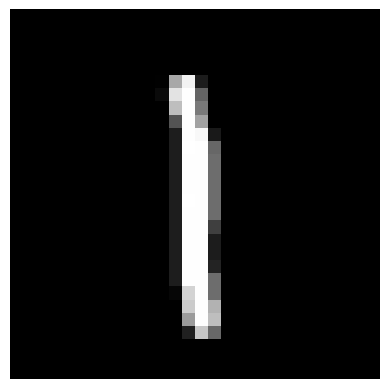

In [3]:
import matplotlib.pyplot as plt
idx = 14
print(y_train[idx])
plt.imshow(x_train[idx], cmap='gray')
plt.axis('off')
plt.show()

In [13]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [25]:
import numpy as np
# Normalize the data and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



# Reshape images to (batch_size, sequence_length, features)
x_train = np.c_[x_train.reshape(-1, 28*28), np.ones((len(x_train), 1))]  # Reshape to (60000, 784) and append ones column
x_test = np.c_[x_test.reshape(-1, 28*28), np.ones((len(x_test), 1))]  # Reshape to (10000, 784) and append ones column

#create x_val and y_val from x_train and y_train
x_val = x_train[0:10000]
y_val = y_train[0:10000]
x_train = x_train[10000:60000]
y_train = y_train[10000:60000]




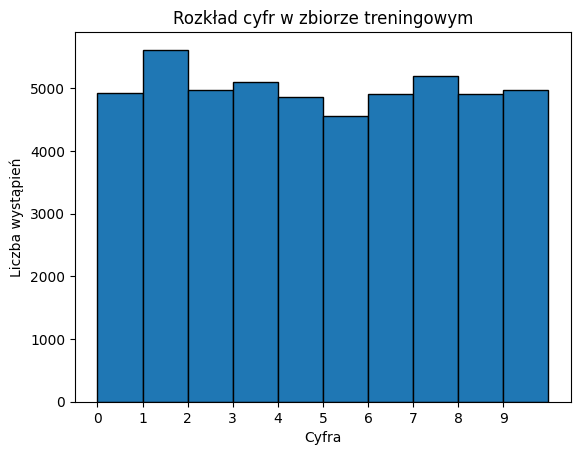

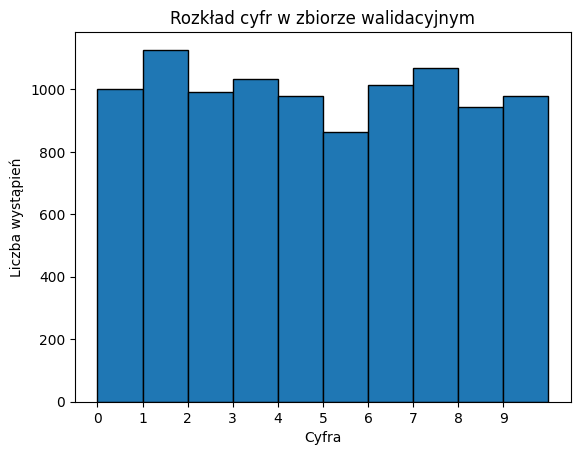

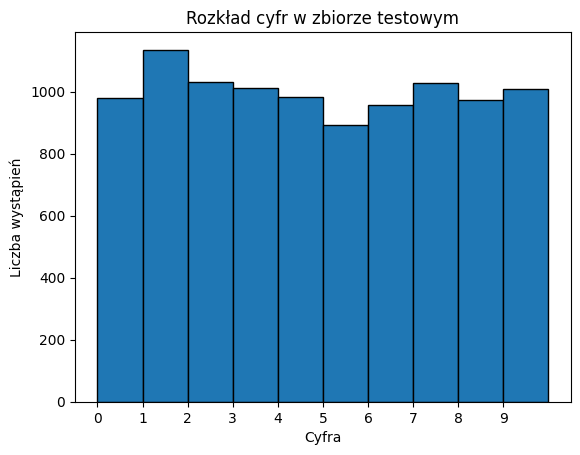

In [34]:
#wykres rozkladu cyfr dla train i val i test
plt.figure(1)
plt.hist(y_train, bins=range(11), edgecolor='black')
plt.title('Rozkład cyfr w zbiorze treningowym')
plt.xlabel('Cyfra')
plt.ylabel('Liczba wystąpień')
plt.xticks(range(10))
plt.show()

#wykres rozkladu cyfr dla train i val i test
plt.figure(2)
plt.hist(y_val, bins=range(11), edgecolor='black')
plt.title('Rozkład cyfr w zbiorze walidacyjnym')
plt.xlabel('Cyfra')
plt.ylabel('Liczba wystąpień')
plt.xticks(range(10))
plt.show()

#wykres rozkladu cyfr dla train i val i test
plt.figure(3)
plt.hist(y_test, bins=range(11), edgecolor='black')
plt.title('Rozkład cyfr w zbiorze testowym')
plt.xlabel('Cyfra')
plt.ylabel('Liczba wystąpień')
plt.xticks(range(10))
plt.show()





In [ ]:

W = np.random.randn(10, 28*28+1)            # (10 x 785)

lr = 0.001
for t in range(10):
    # Structured perceptron for updating weights.
    num_correct_train = 0
    for x, y in zip(x_train, y_train):
        y_pred = np.argmax(np.dot(W, x))
        if y_pred != y:
            W[y] += x * lr
            W[y_pred] -= x * lr
        else:
            num_correct_train += 1
            
    num_correct_test = 0
    for x, y in zip(x_val, y_val):
        y_pred = np.argmax(np.dot(W, x))
        if y_pred == y:
            num_correct_test += 1

    
    
    print('#{}: train_accuracy={:.4f}, val_accuracy={:.4f}'.format(
        t,
        float(num_correct_train) / len(y_train),
        float(num_correct_test) / len(y_val)
        
    ))
# Evaluate and store the accuracy on the test set.
num_correct_test = 0
for x, y in zip(x_test, y_test):
    y_pred = np.argmax(np.dot(W, x))
    if y_pred == y:
        num_correct_test += 1
        float(num_correct_test) / len(y_test)
print('#{}: test_accuracy={:.4f}'.format(t, float(num_correct_test) / len(y_test)))

#0: train_accuracy=0.5501, val_accuracy=0.7274
#1: train_accuracy=0.7575, val_accuracy=0.7974
#2: train_accuracy=0.8017, val_accuracy=0.8251
#3: train_accuracy=0.8216, val_accuracy=0.8397
#4: train_accuracy=0.8345, val_accuracy=0.8480
#5: train_accuracy=0.8429, val_accuracy=0.8544
#6: train_accuracy=0.8484, val_accuracy=0.8582
#7: train_accuracy=0.8541, val_accuracy=0.8616
#8: train_accuracy=0.8580, val_accuracy=0.8635
#9: train_accuracy=0.8609, val_accuracy=0.8661
#9: test_accuracy=0.8651


6 5


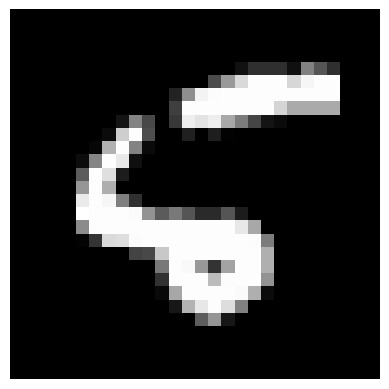

4 6


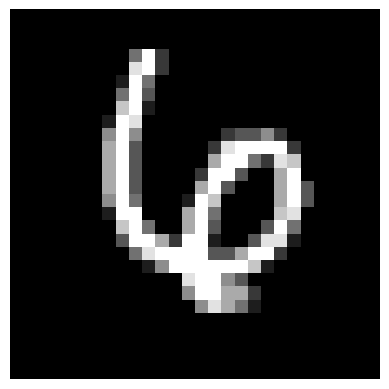

6 4


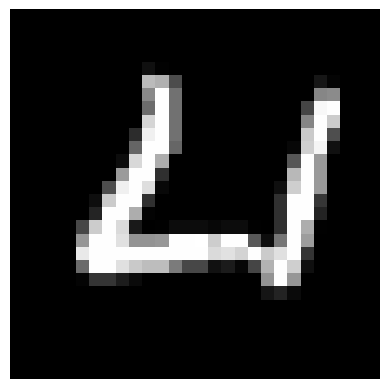

5 2


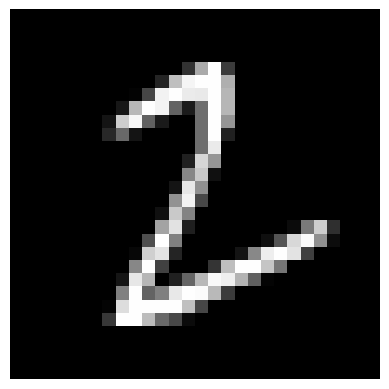

0 5


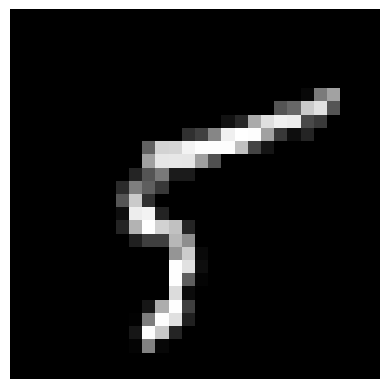

2 3


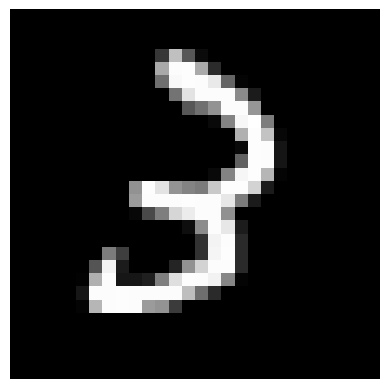

9 4


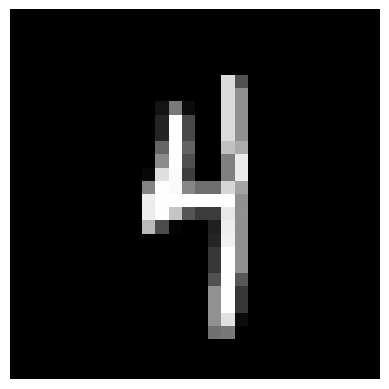

2 6


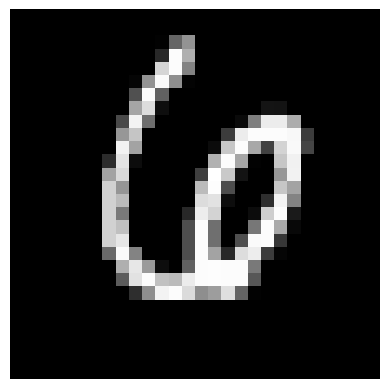

5 3


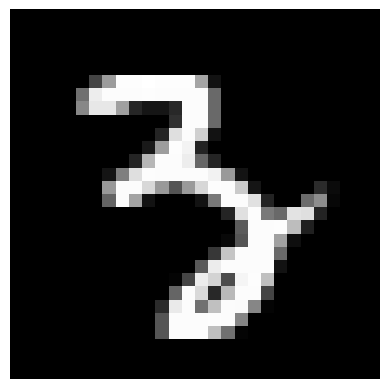

8 7


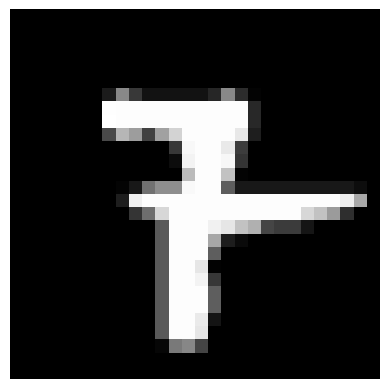

4 9


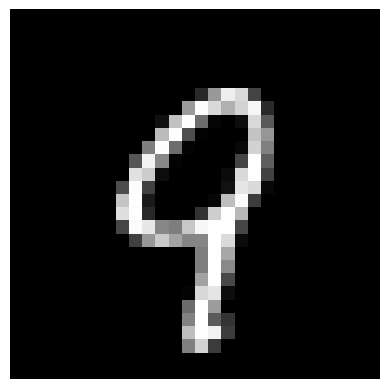

9 4


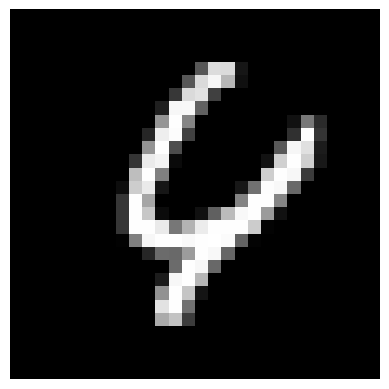

4 7


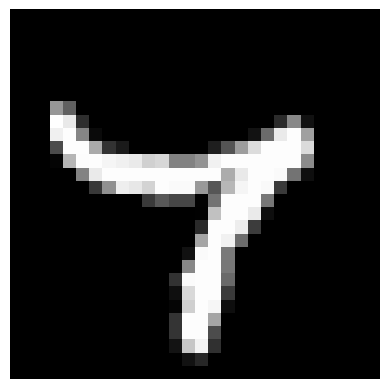

9 2


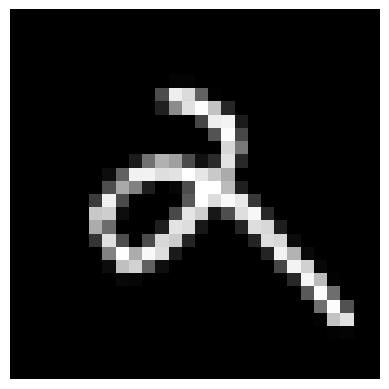

2 3


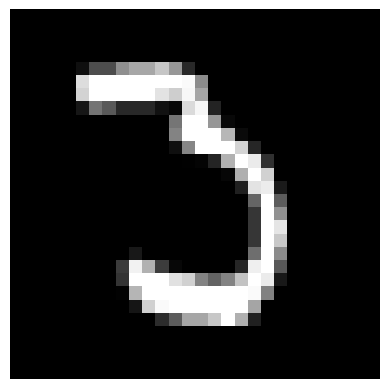

5 2


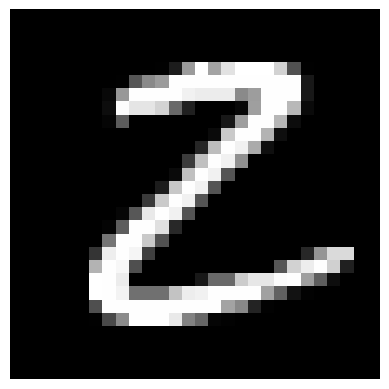

4 9


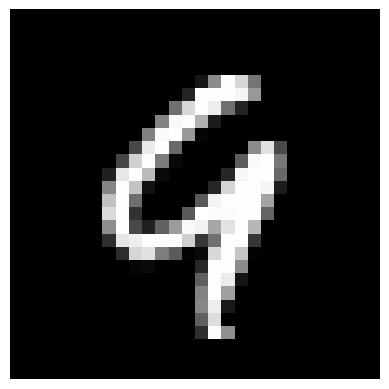

3 9


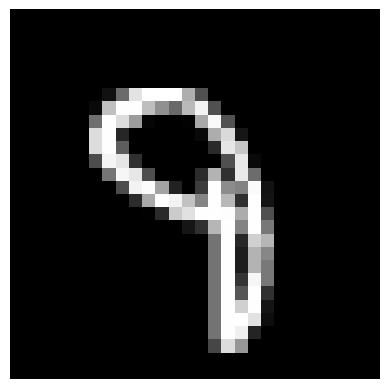

9 5


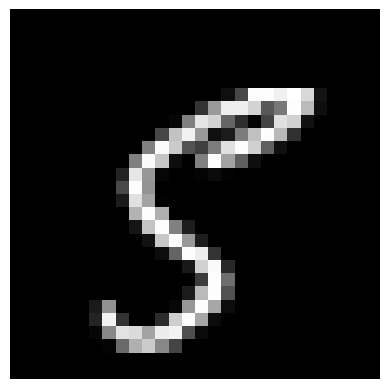

5 6


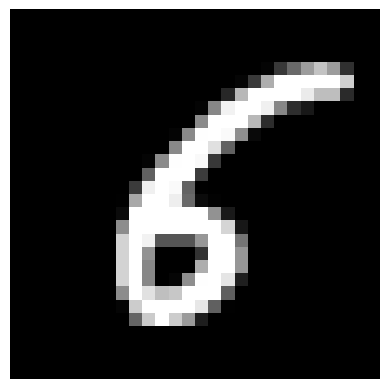

7 5


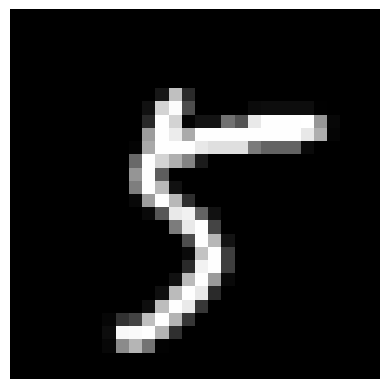

3 2


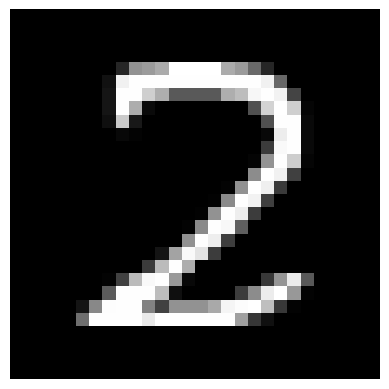

9 4


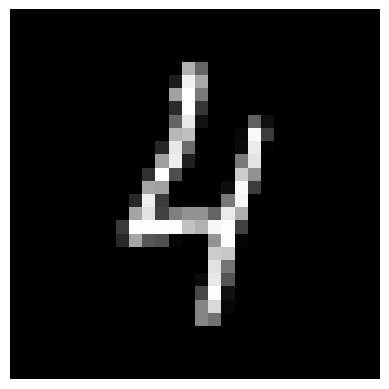

7 8


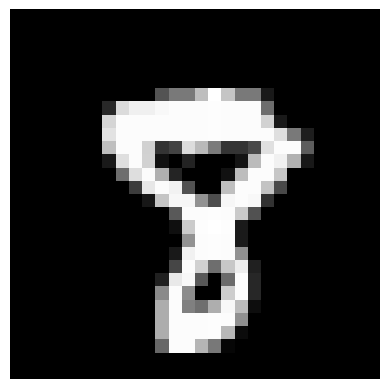

8 9


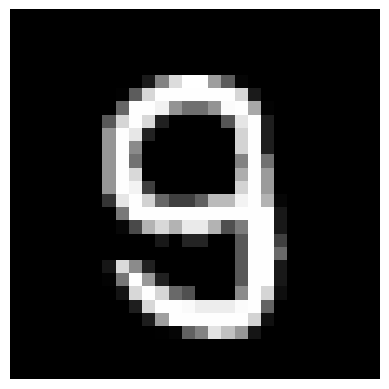

9 8


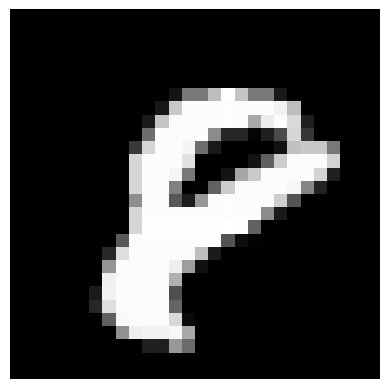

8 7


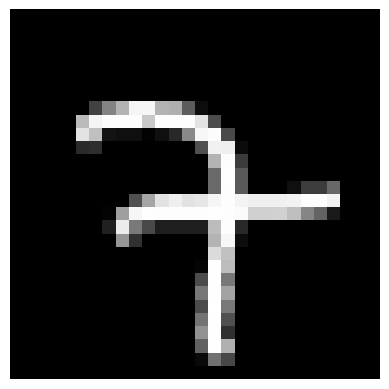

5 3


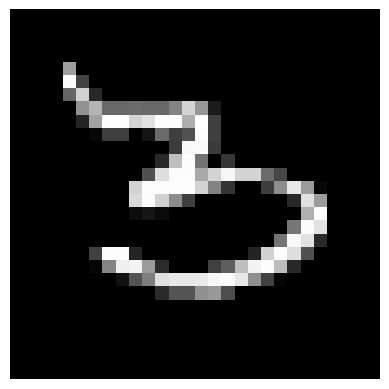

9 4


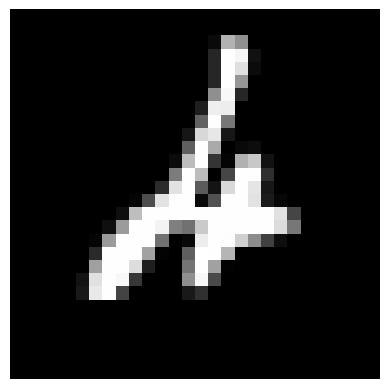

0 6


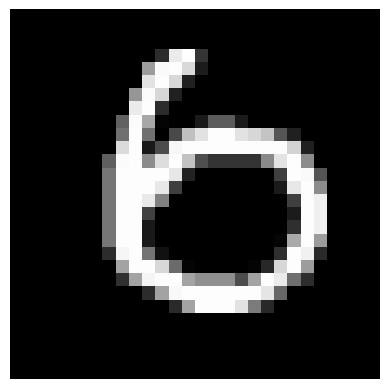

5 9


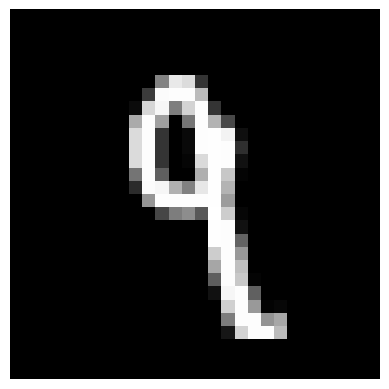

5 8


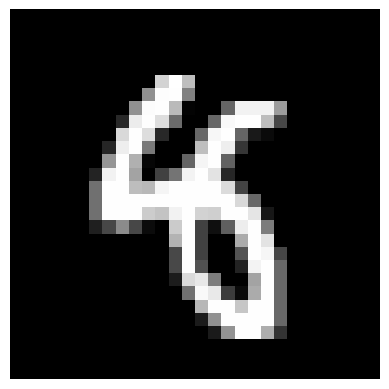

9 4


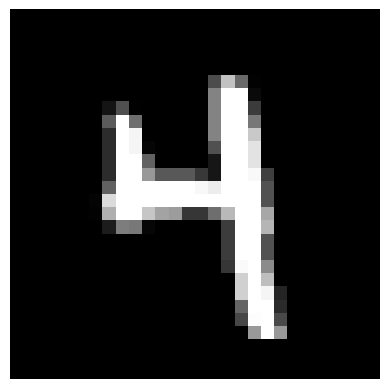

3 4


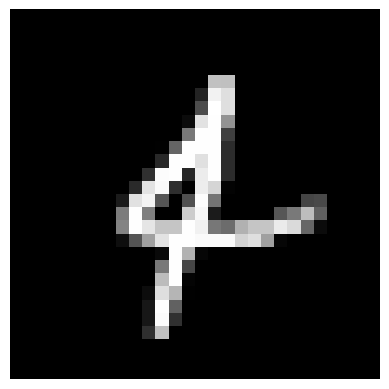

7 4


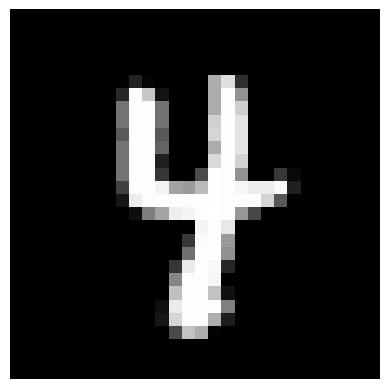

9 7


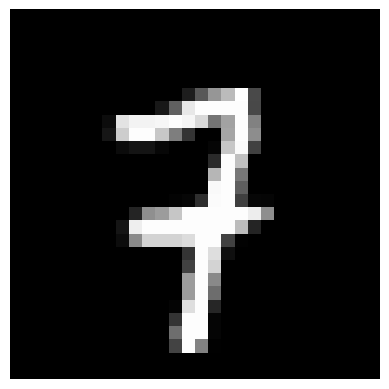

5 3


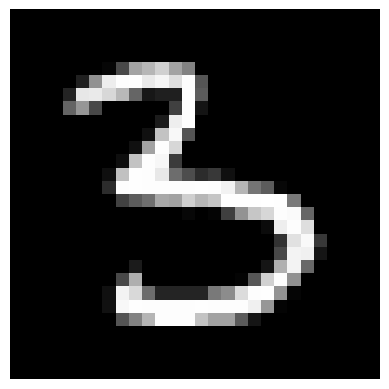

3 2


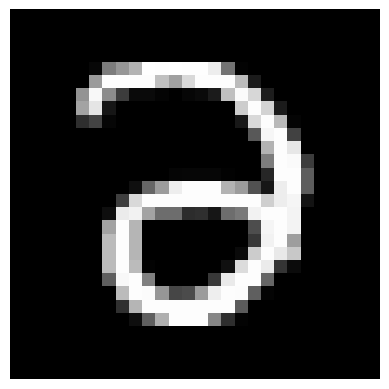

7 9


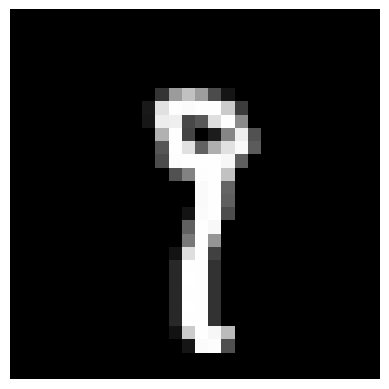

8 2


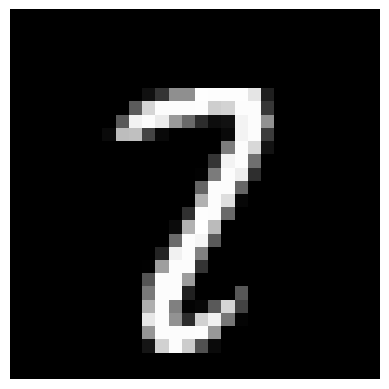

9 0


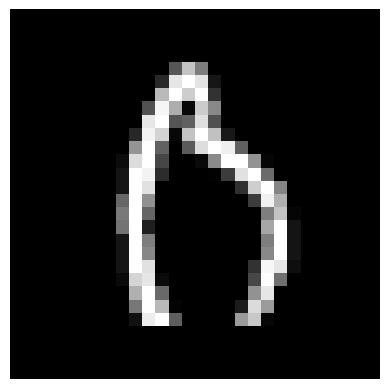

9 4


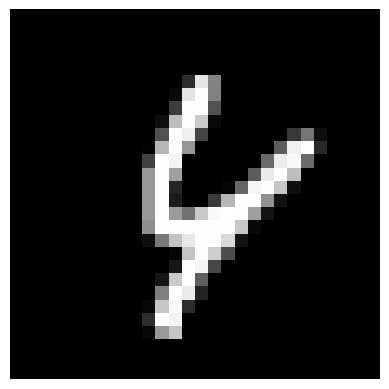

5 8


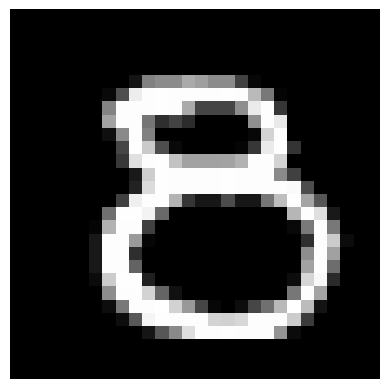

3 5


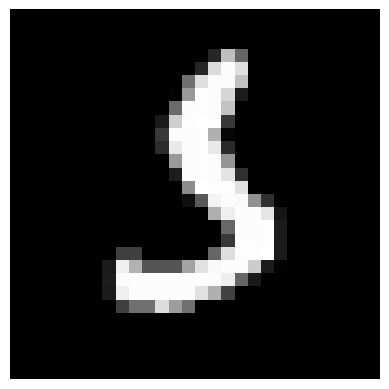

0 5


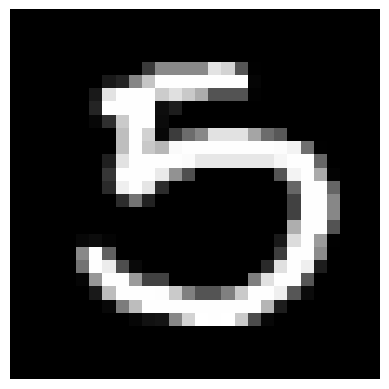

9 7


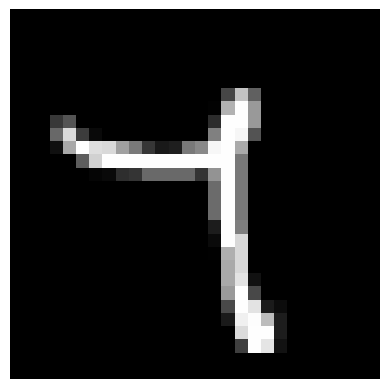

4 9


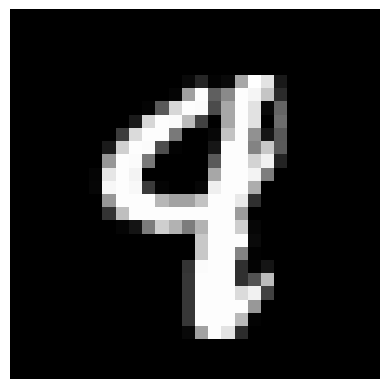

7 2


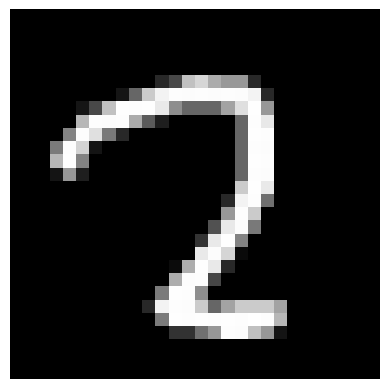

3 2


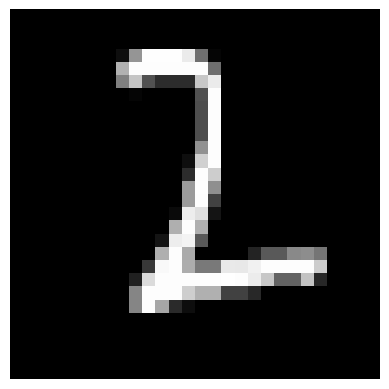

9 4


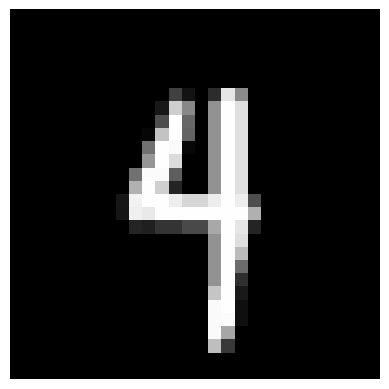

7 3


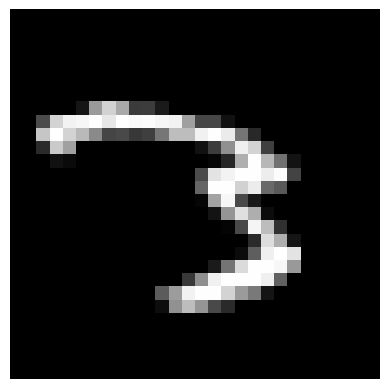

0 6


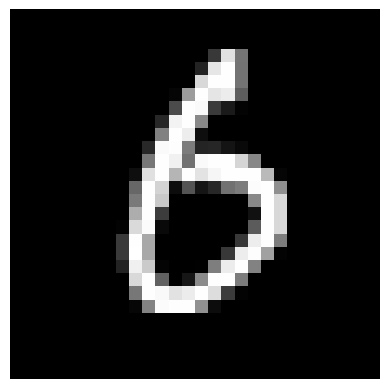

7 9


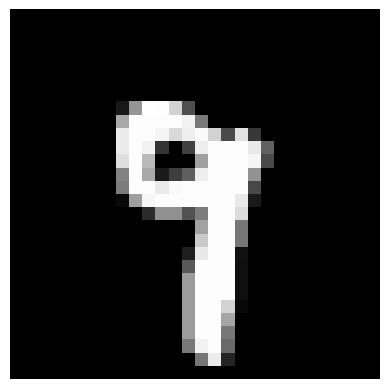

9 8


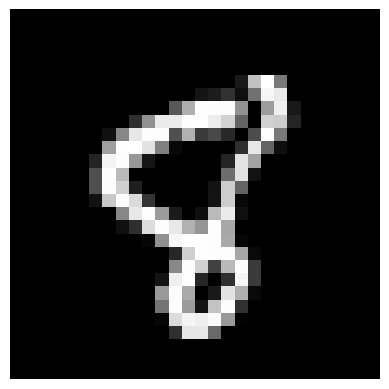

7 9


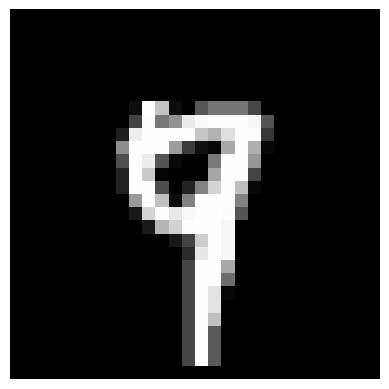

5 8


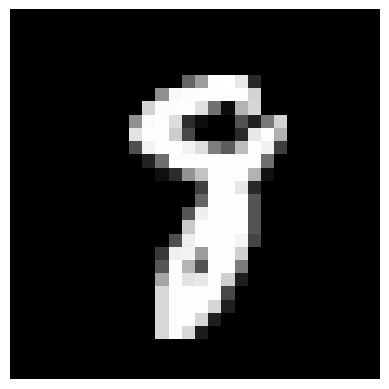

5 0


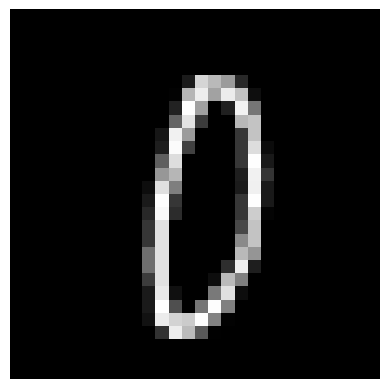

8 2


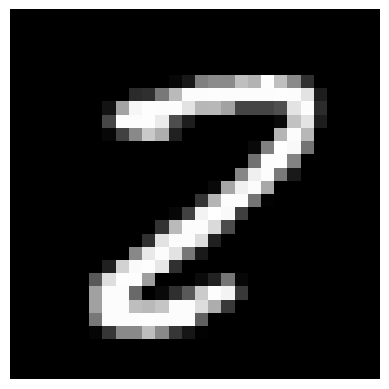

0 6


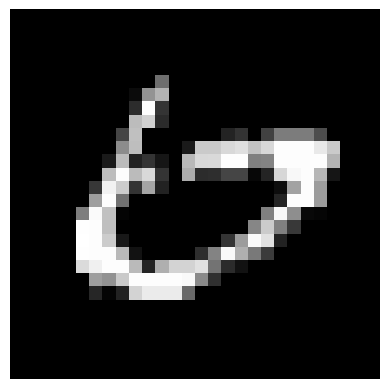

9 4


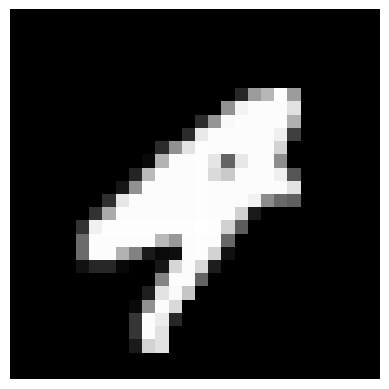

5 9


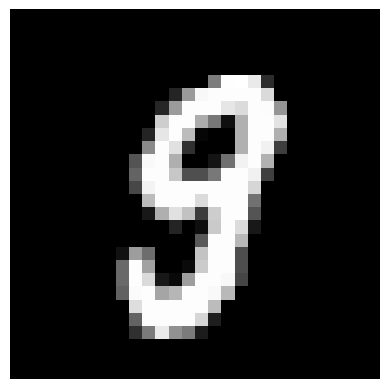

5 3


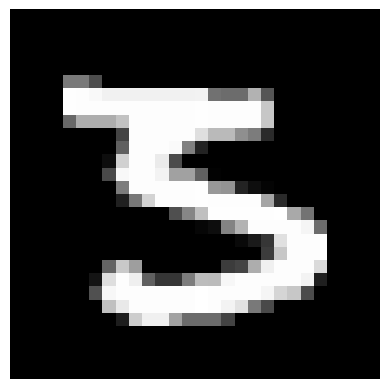

4 9


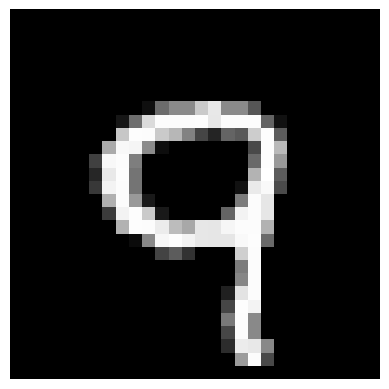

7 5


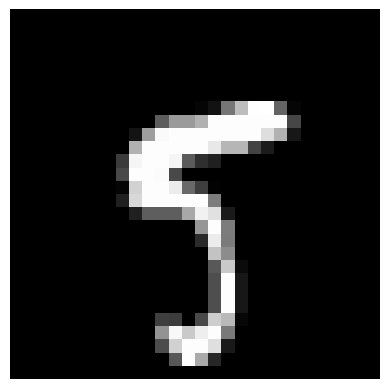

9 8


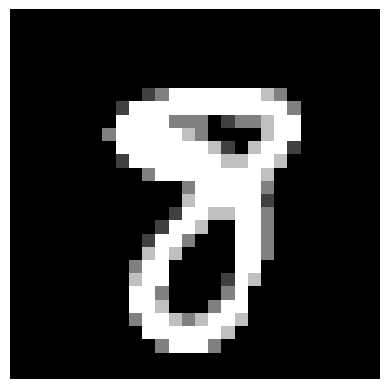

2 7


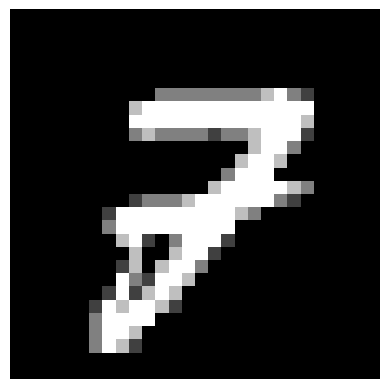

8 5


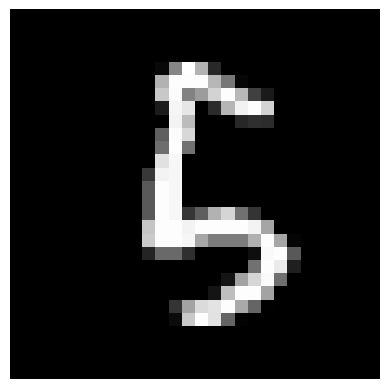

3 9


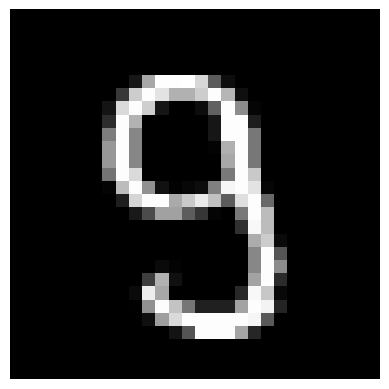

7 9


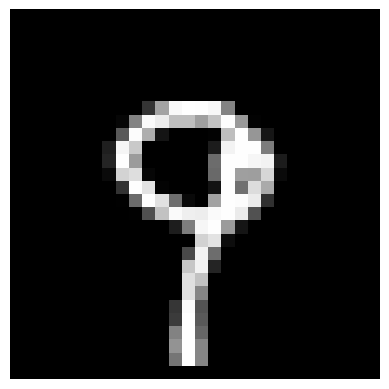

8 4


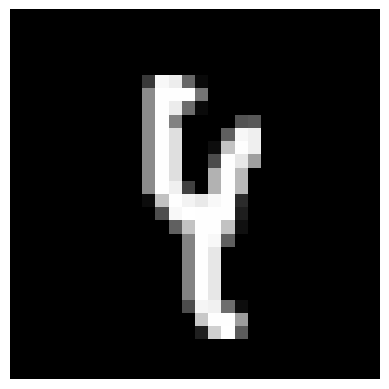

3 5


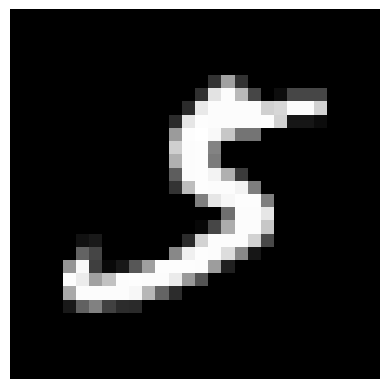

5 3


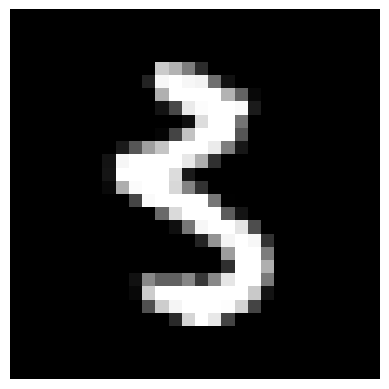

3 5


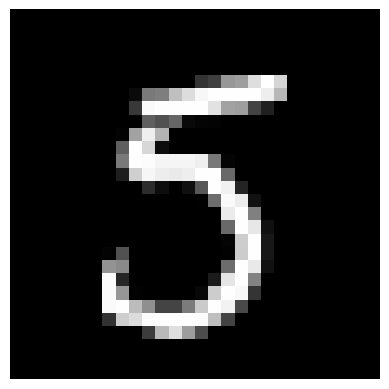

7 4


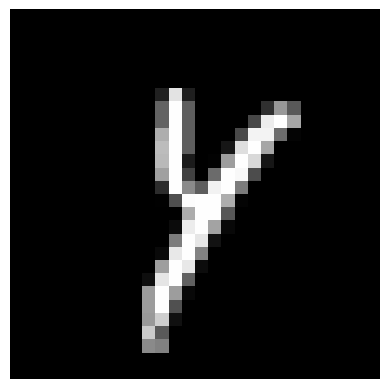

4 9


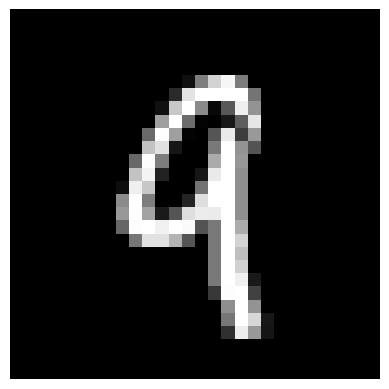

6 3


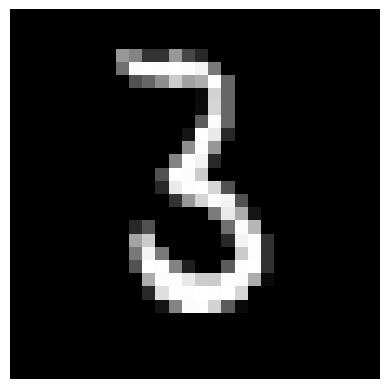

5 8


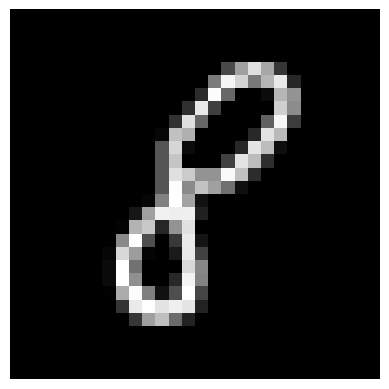

2 8


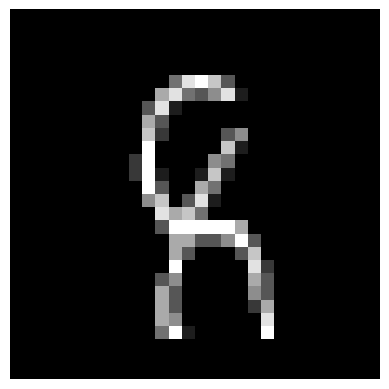

2 8


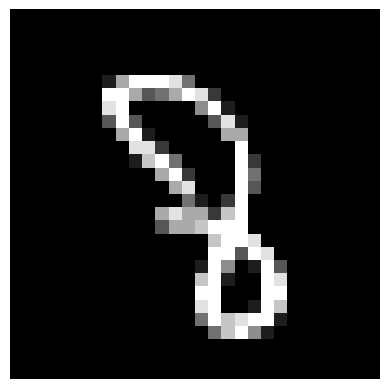

9 7


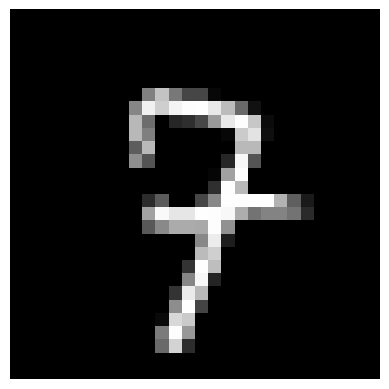

9 7


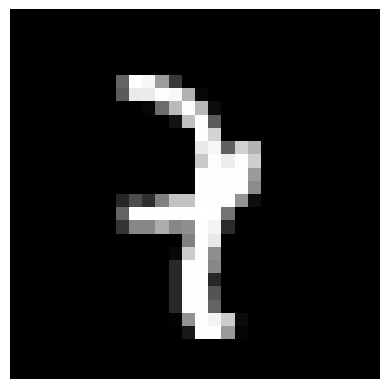

5 0


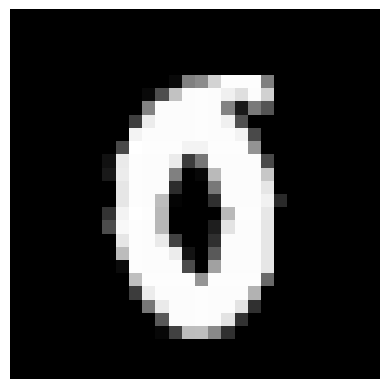

4 9


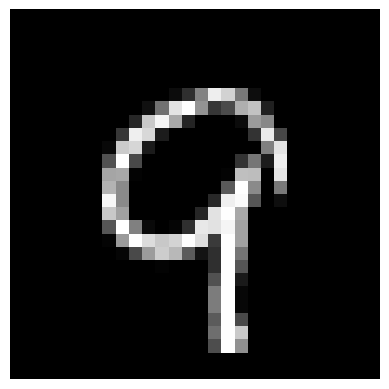

9 4


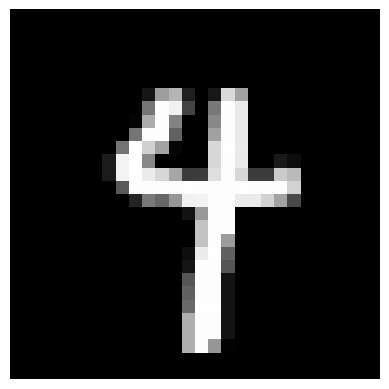

5 3


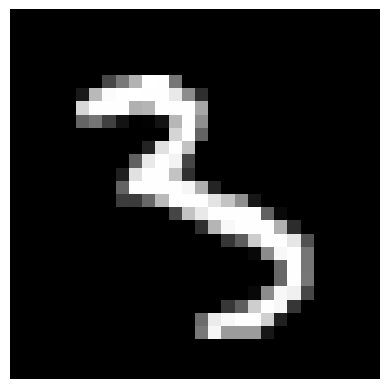

9 4


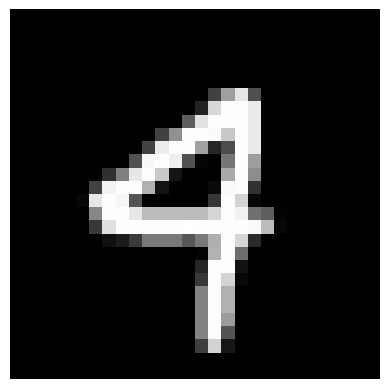

2 3


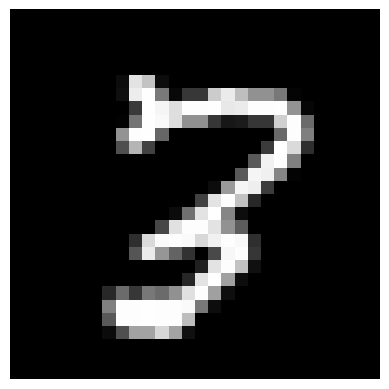

3 8


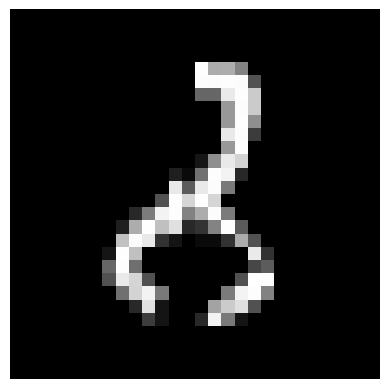

3 8


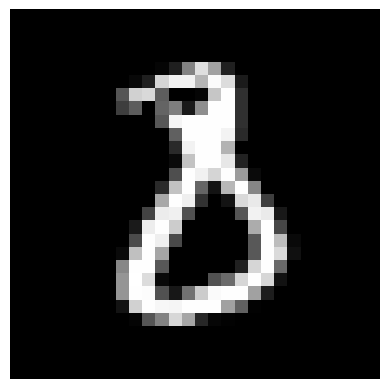

9 8


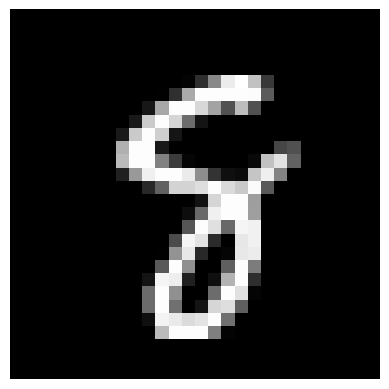

8 5


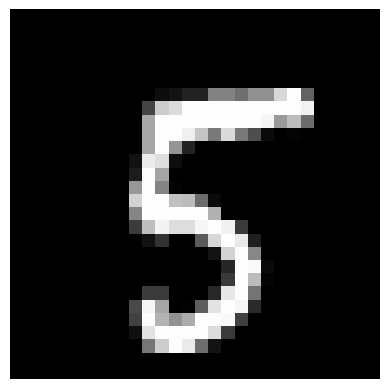

9 4


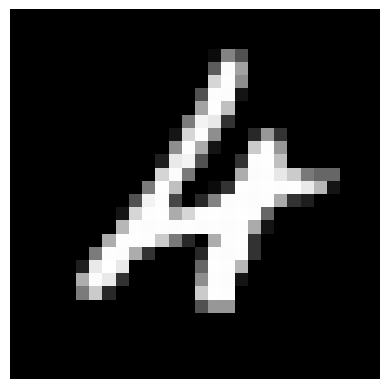

8 2


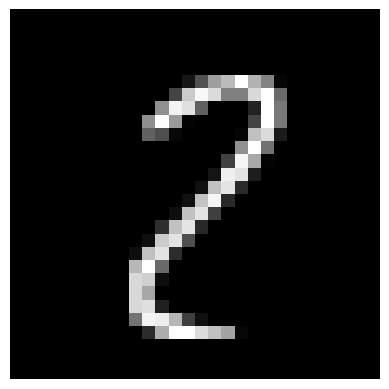

8 1


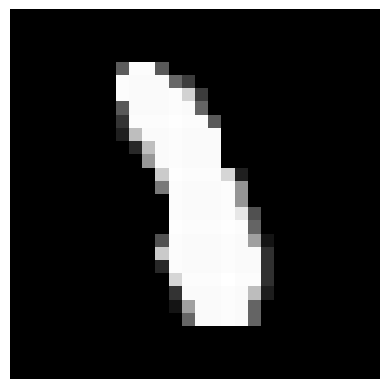

4 9


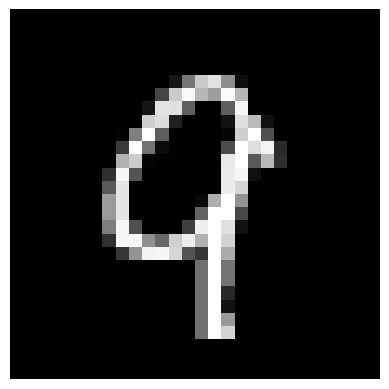

9 3


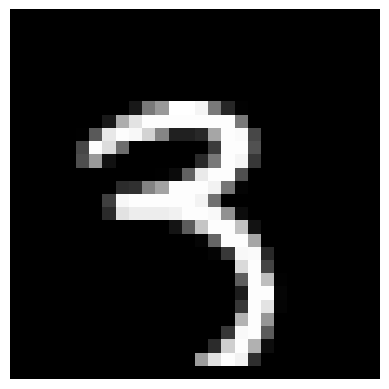

0 2


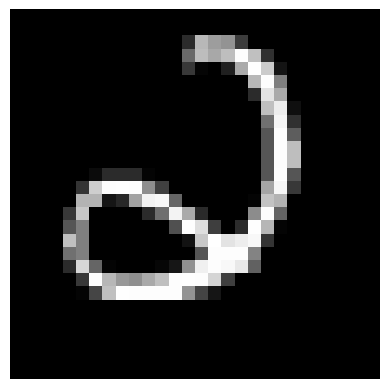

5 0


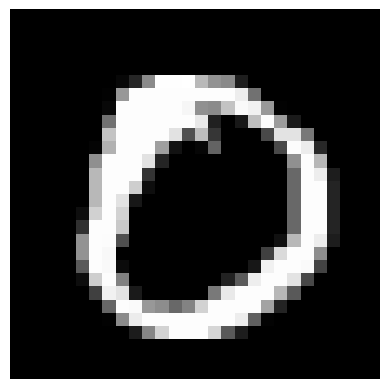

4 7


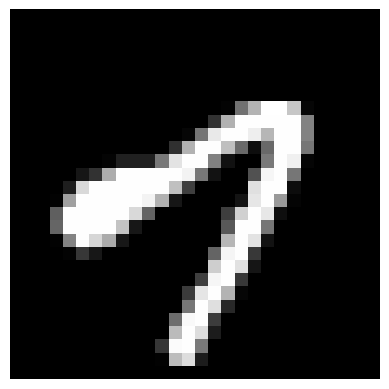

7 2


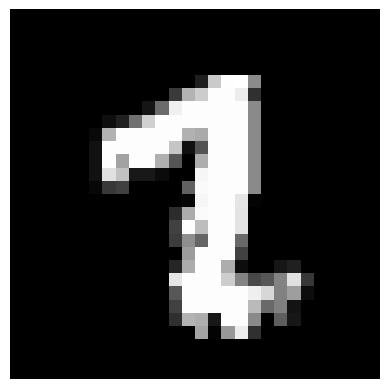

3 0


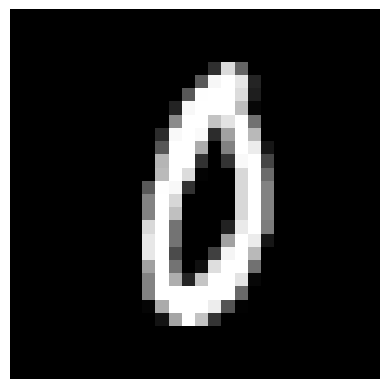

6 5


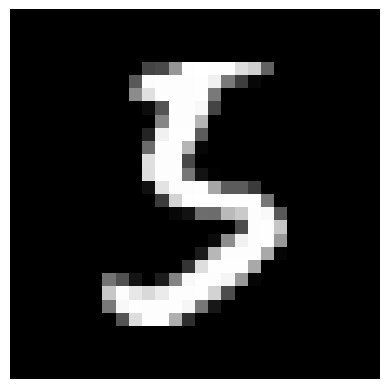

3 7


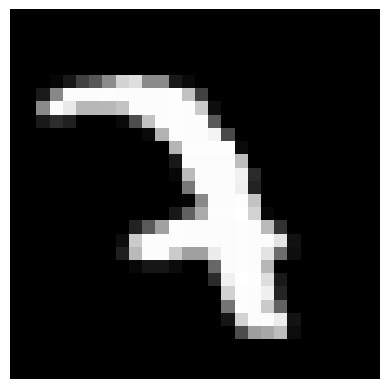

4 8


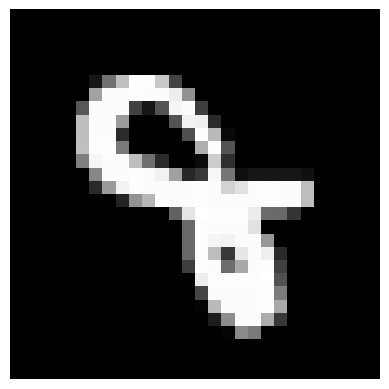

9 4


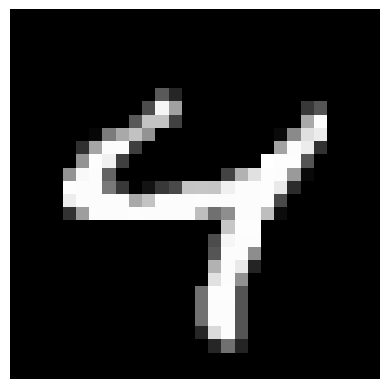

9 4


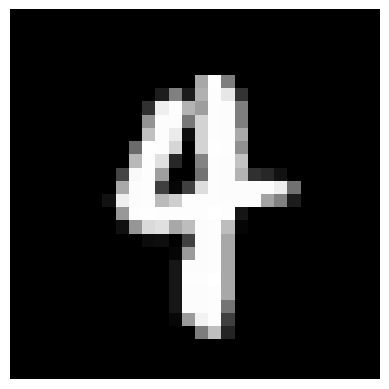

6 0


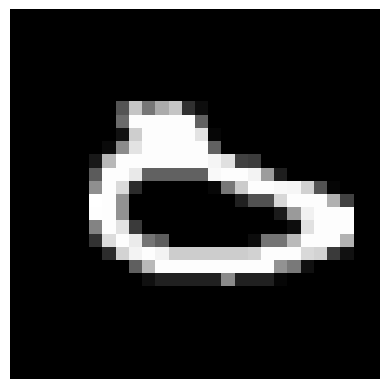

2 5


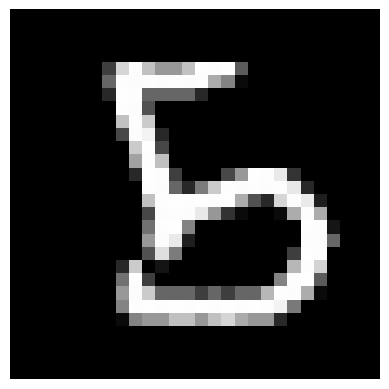

8 2


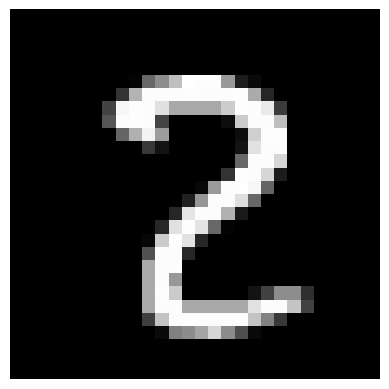

5 3


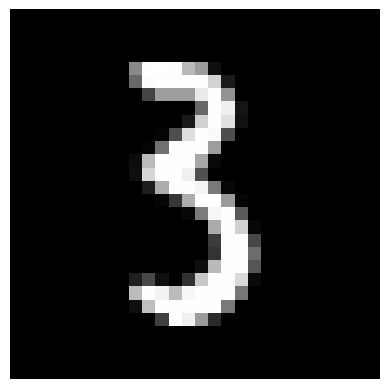

3 2


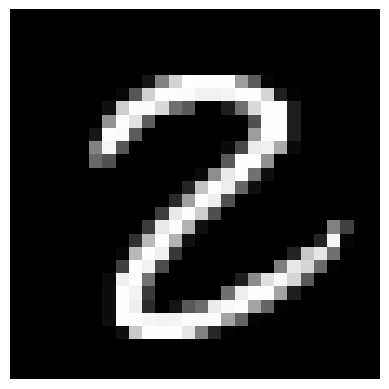

9 4


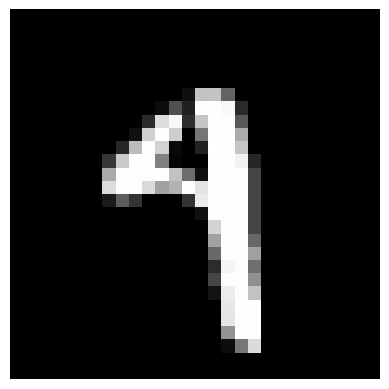

8 2


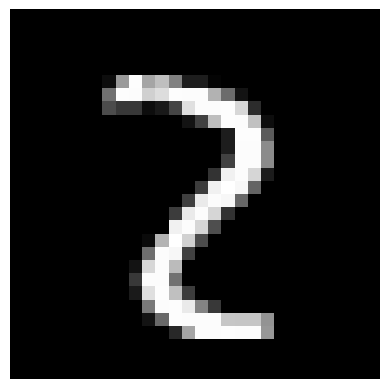

5 8


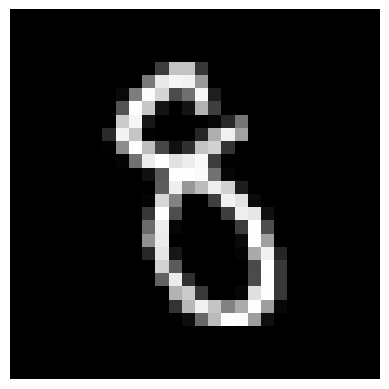

8 4


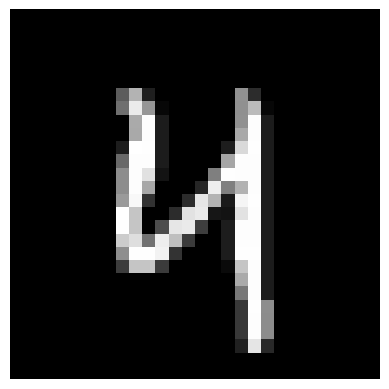

8 5


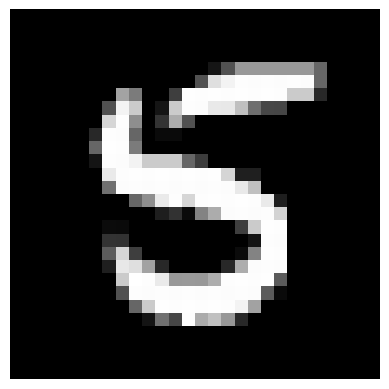

6 2


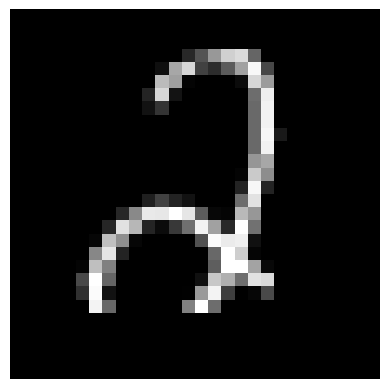

3 8


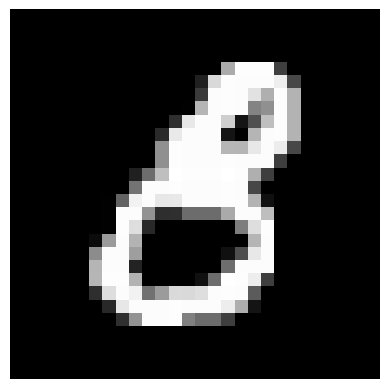

4 7


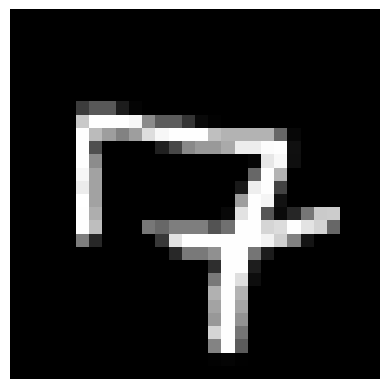

7 8


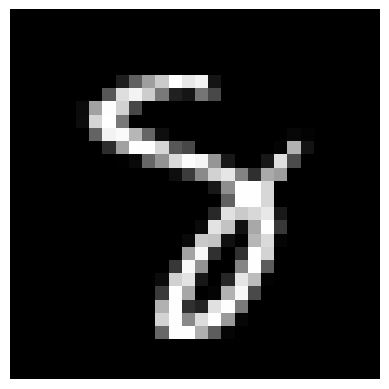

9 7


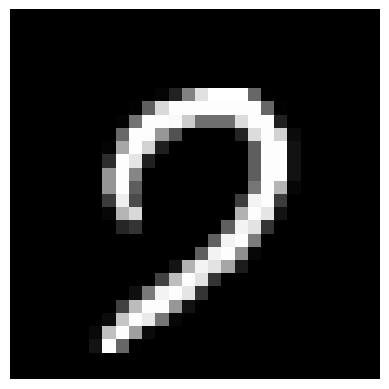

4 9


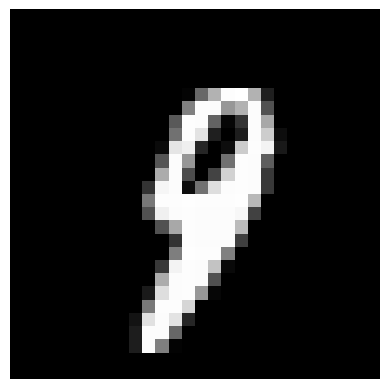

4 8


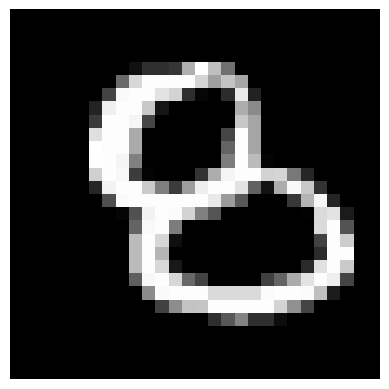

3 8


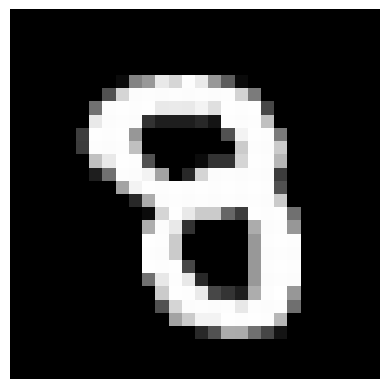

9 4


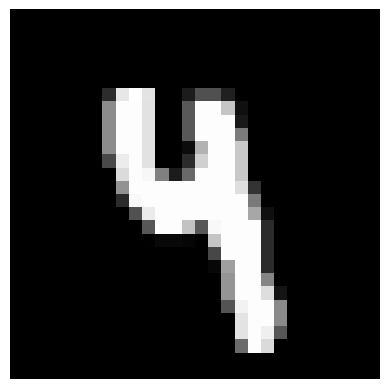

7 9


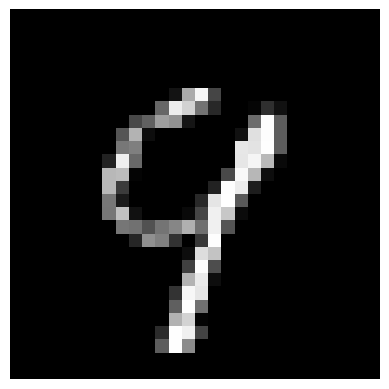

5 3


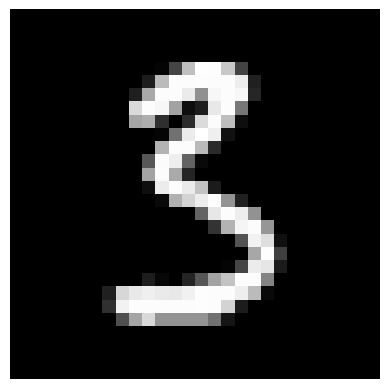

8 7


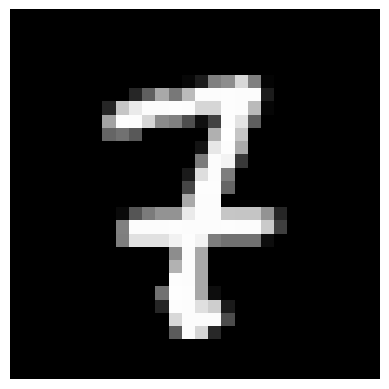

3 1


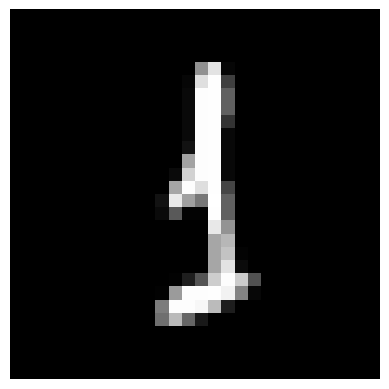

7 2


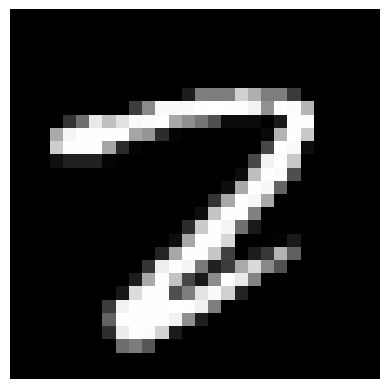

8 2


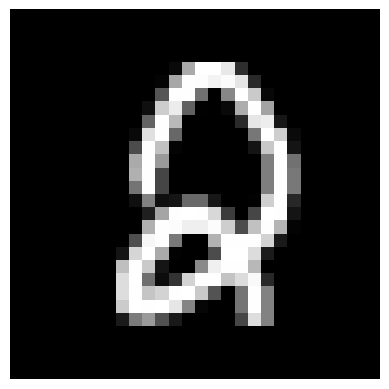

4 9


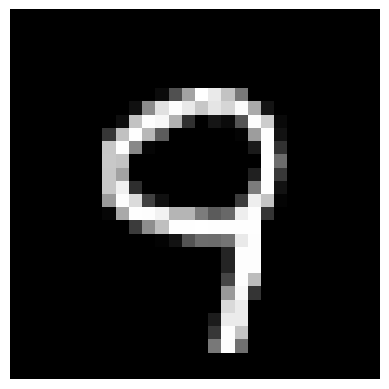

2 7


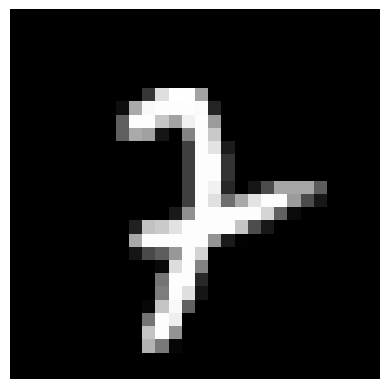

5 3


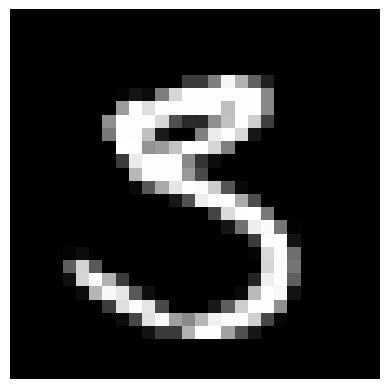

0 2


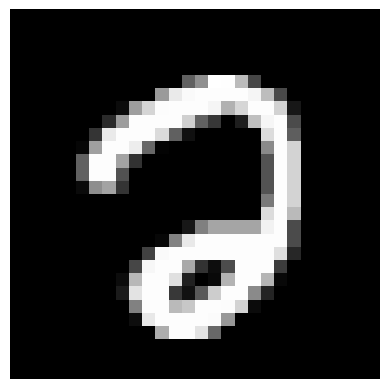

5 3


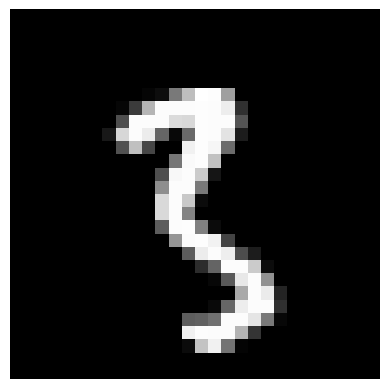

9 8


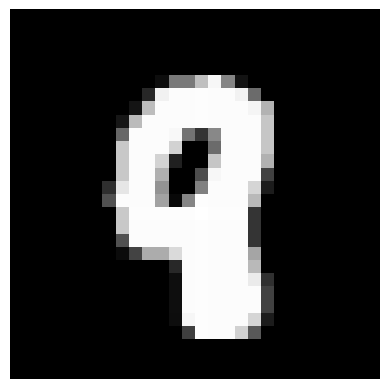

2 7


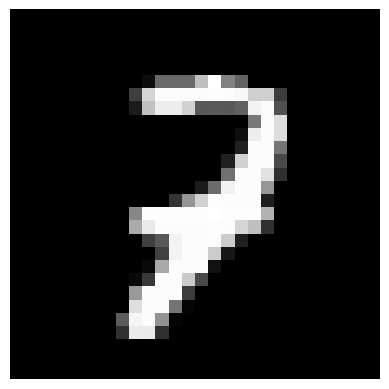

5 1


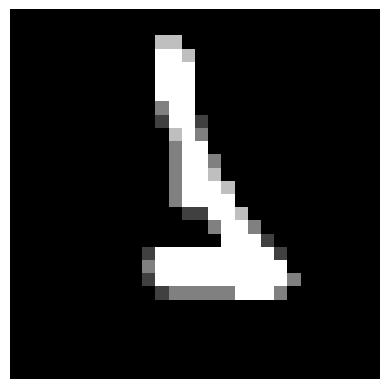

5 3


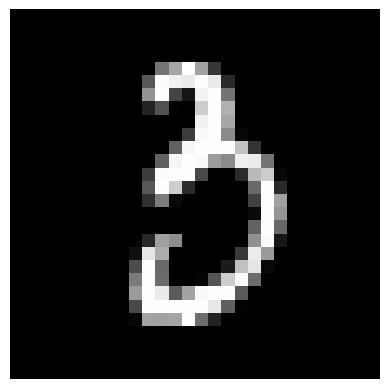

1 4


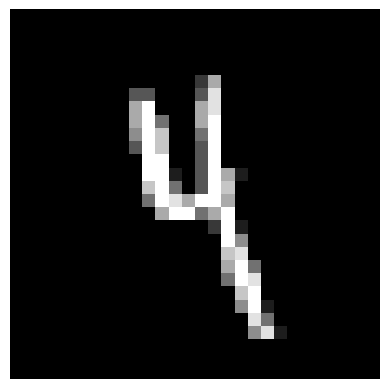

7 9


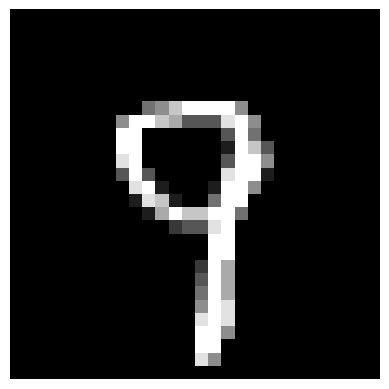

5 4


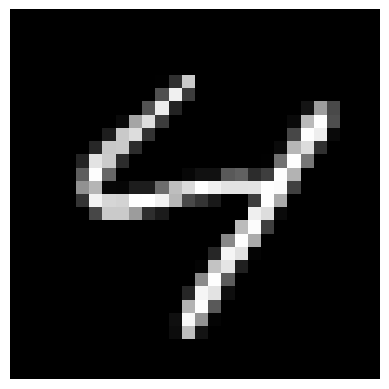

3 2


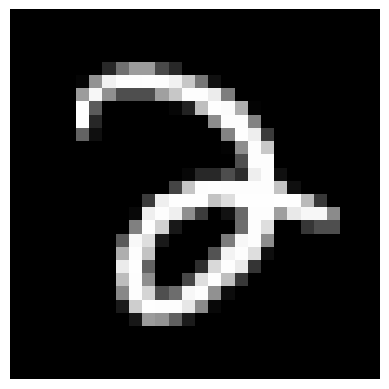

2 3


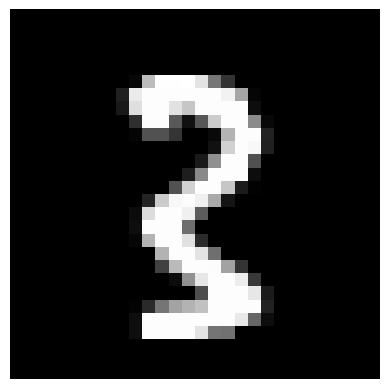

3 2


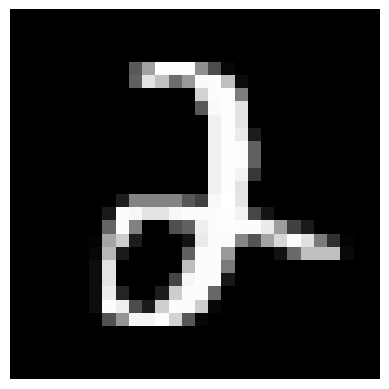

9 8


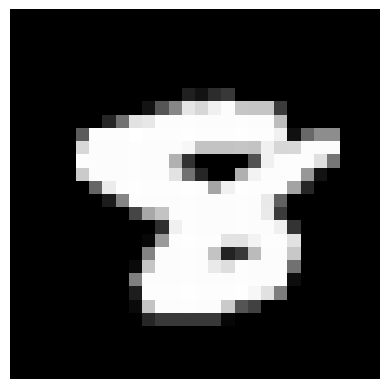

9 7


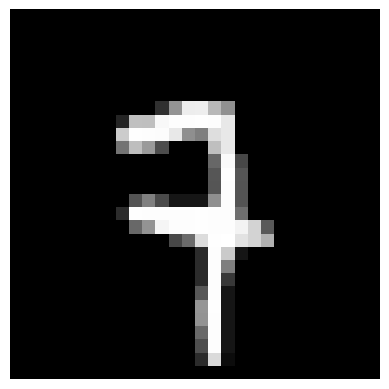

5 6


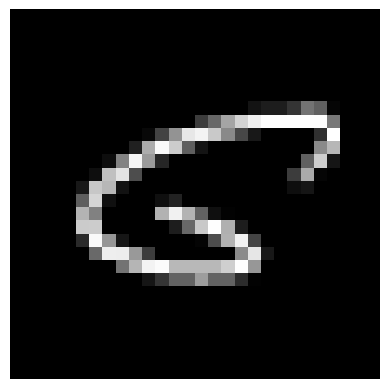

7 4


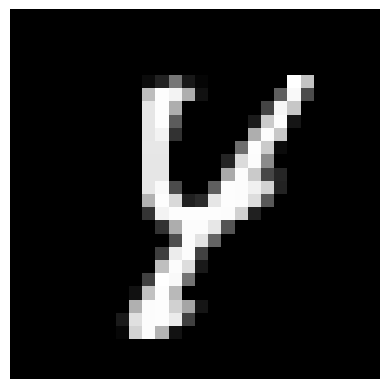

8 5


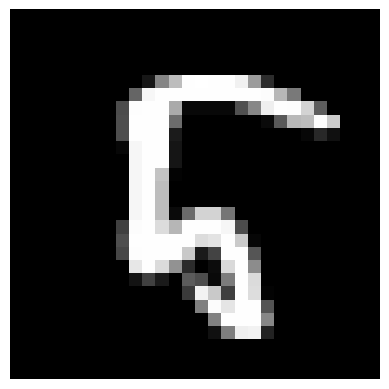

3 8


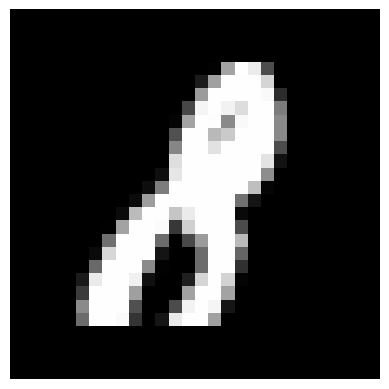

9 7


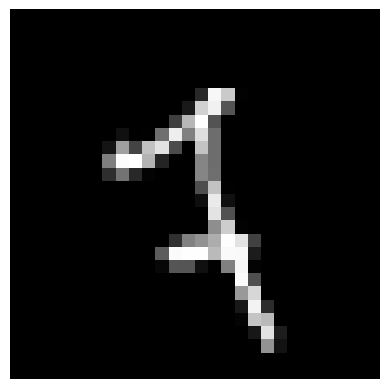

4 6


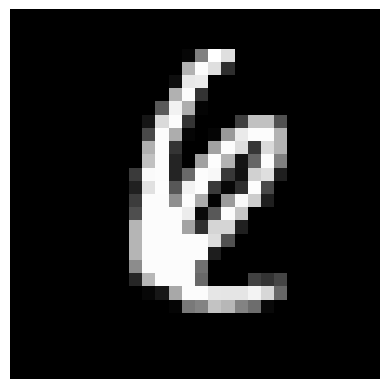

5 2


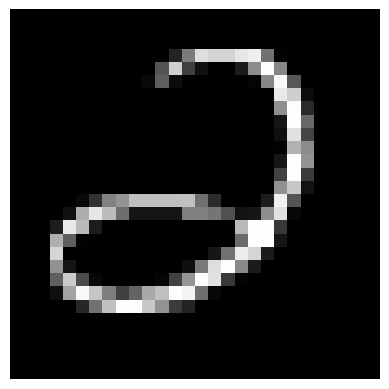

9 4


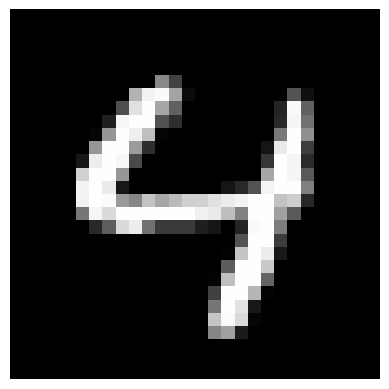

9 8


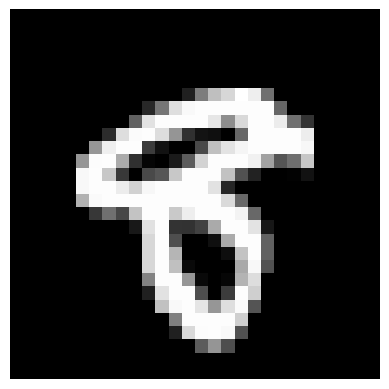

9 7


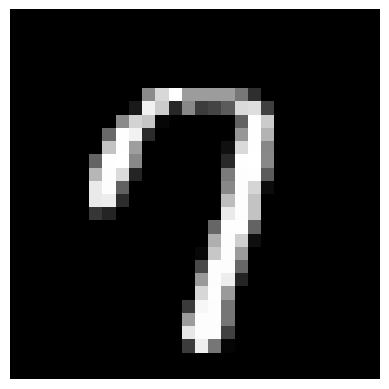

4 8


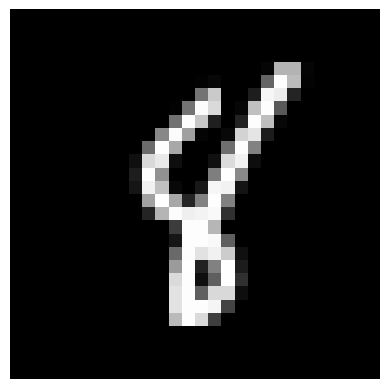

5 3


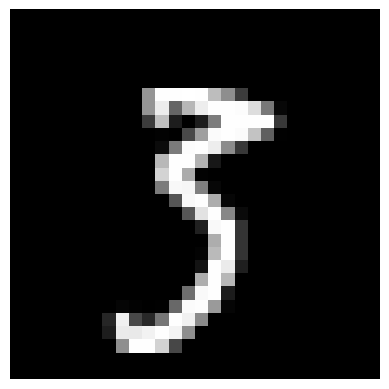

8 5


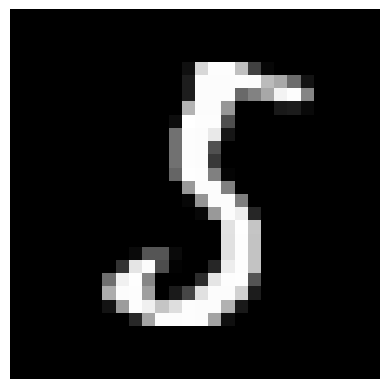

2 3


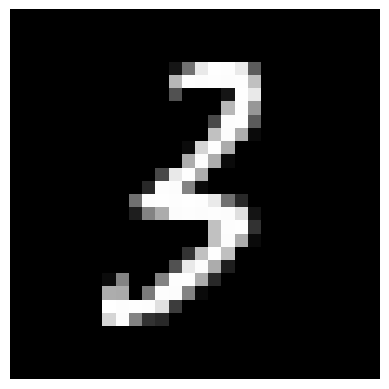

0 7


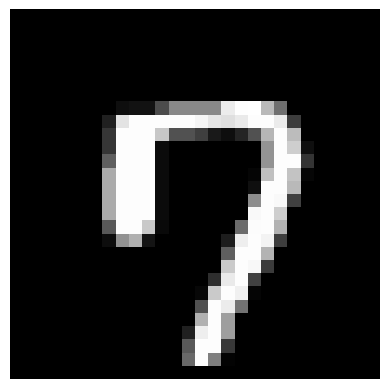

2 8


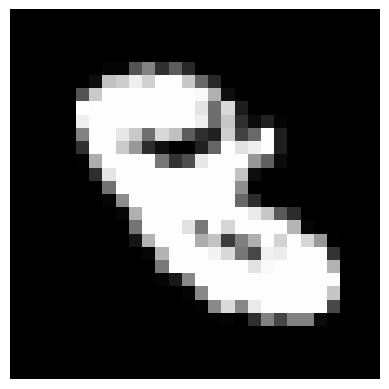

3 9


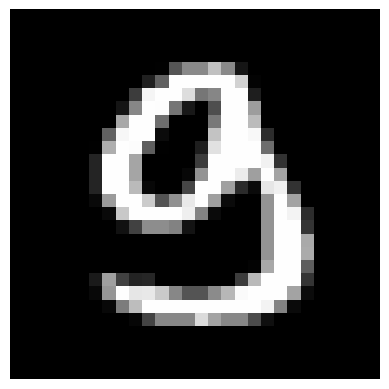

2 3


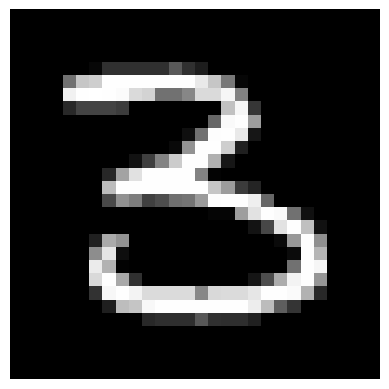

6 4


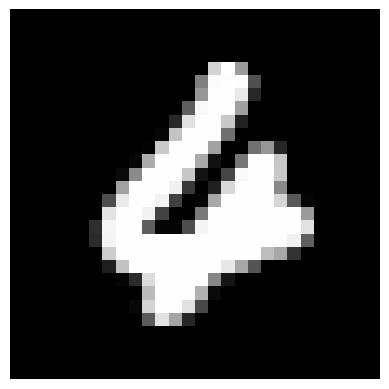

8 3


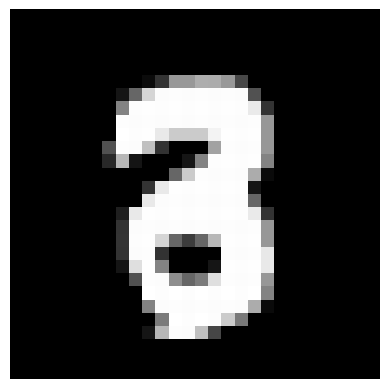

2 7


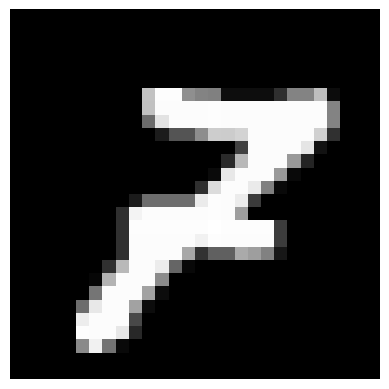

9 3


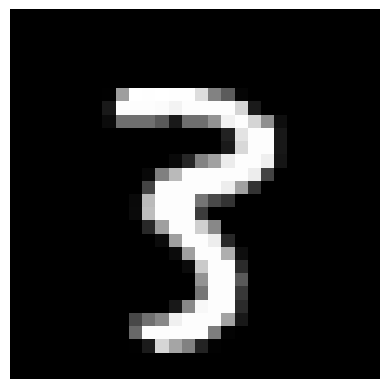

2 3


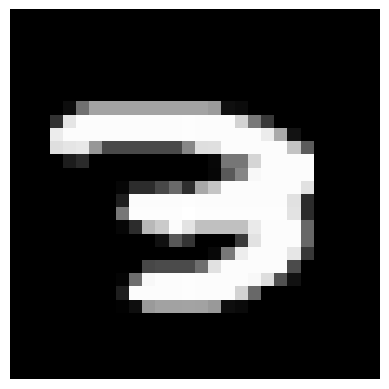

4 5


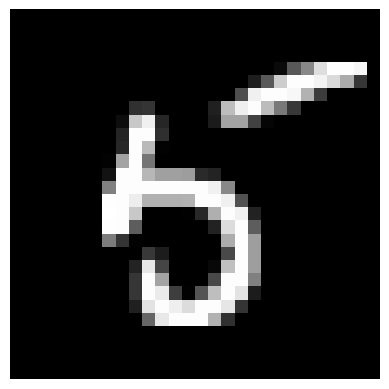

9 7


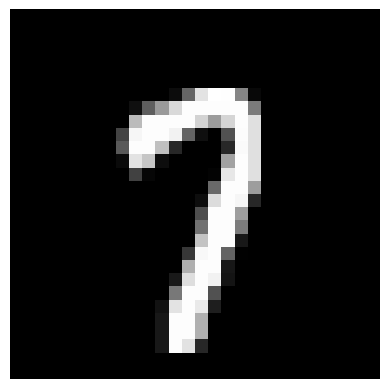

8 7


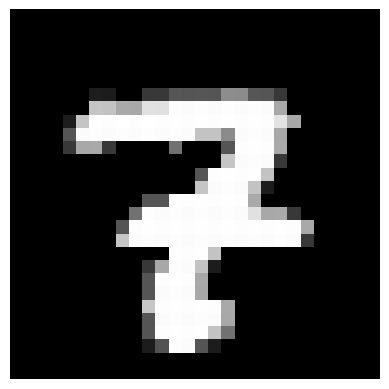

9 4


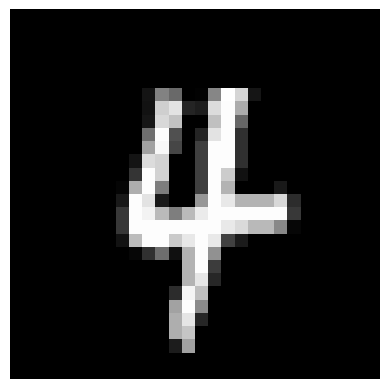

8 4


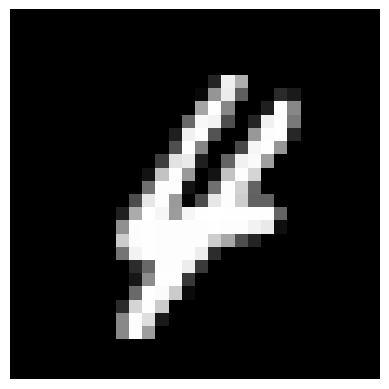

5 3


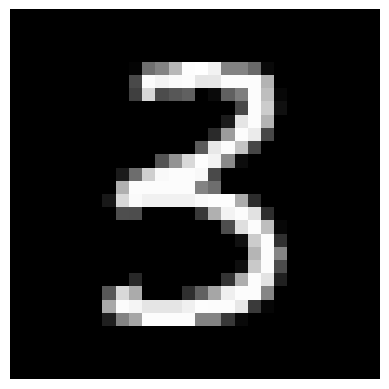

9 7


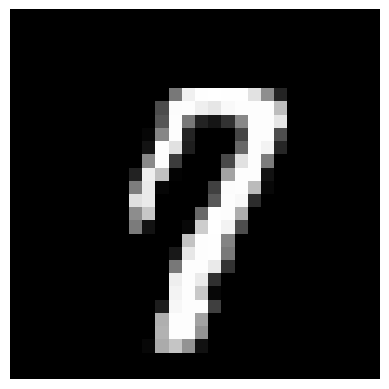

1 6


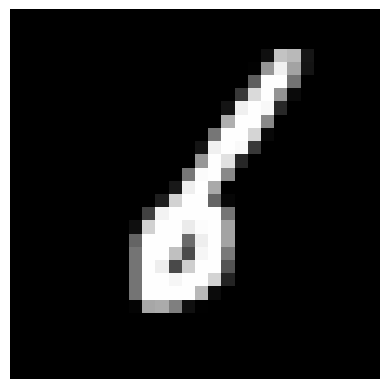

8 6


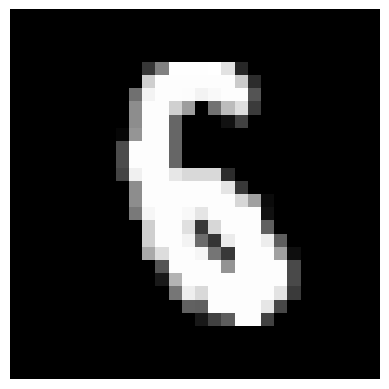

7 0


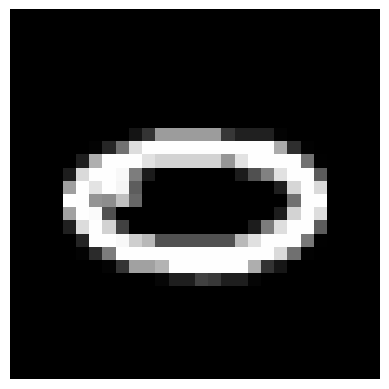

4 9


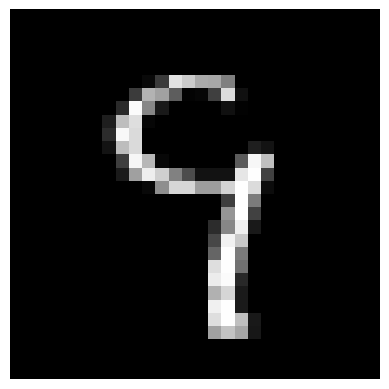

9 7


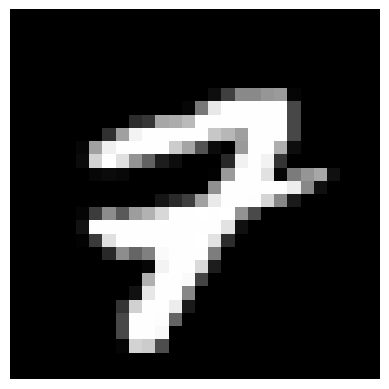

4 8


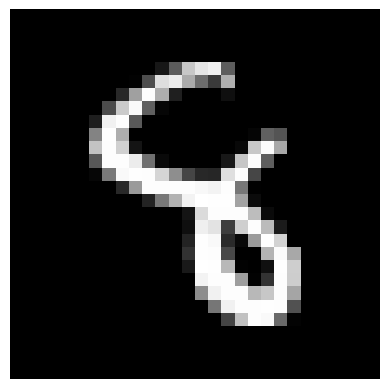

5 8


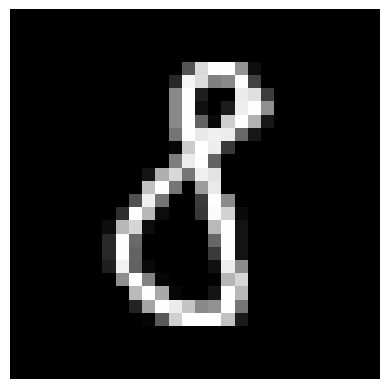

5 8


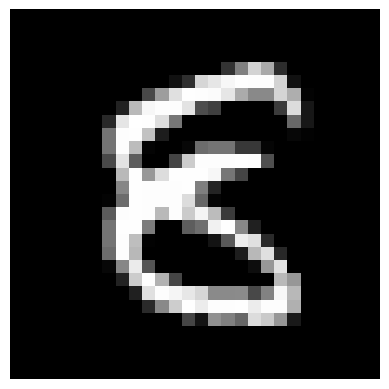

9 3


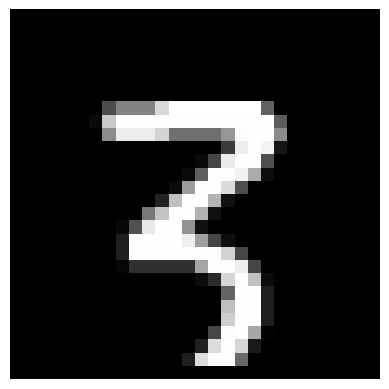

2 7


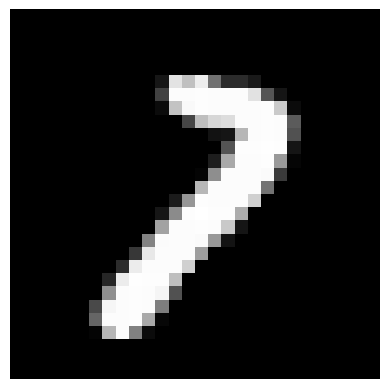

3 8


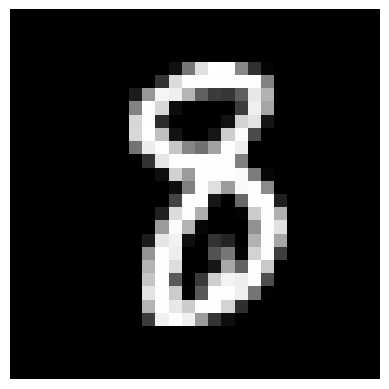

6 2


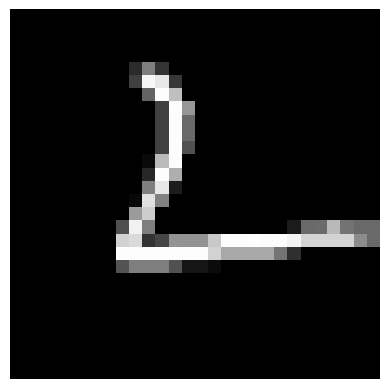

2 7


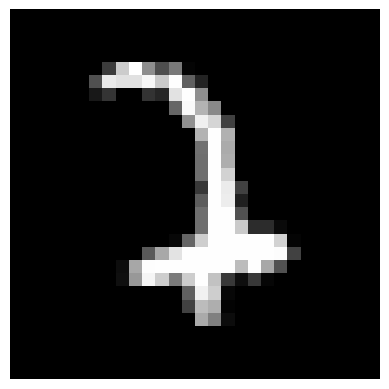

3 8


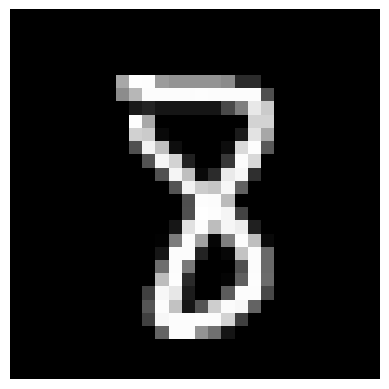

4 9


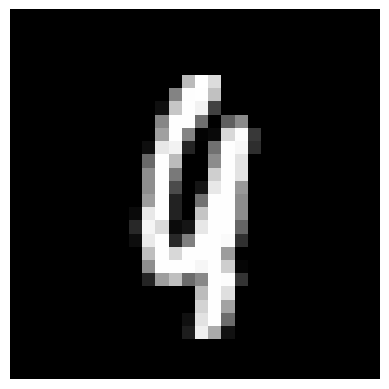

5 8


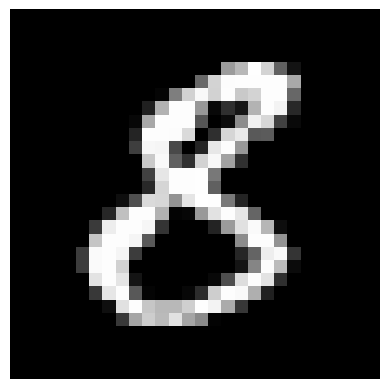

9 4


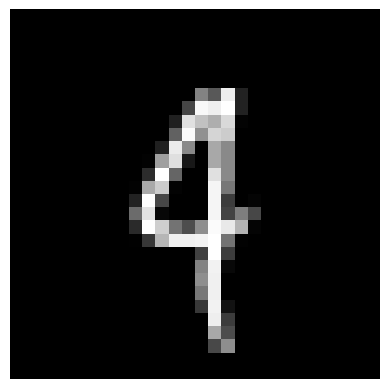

3 0


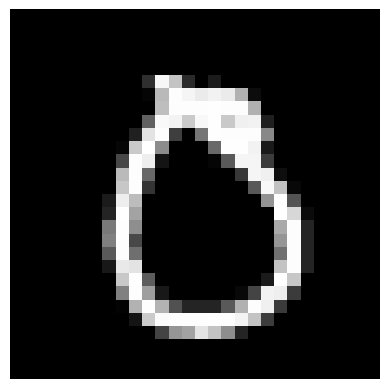

0 9


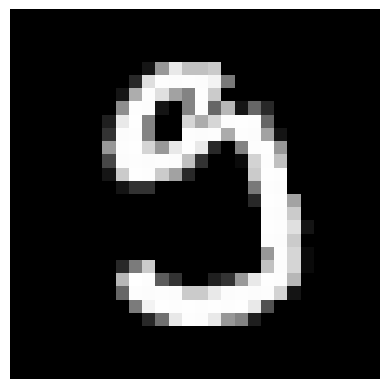

5 8


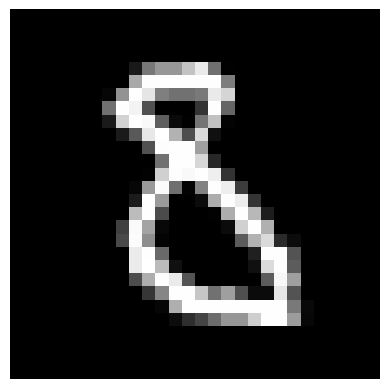

6 2


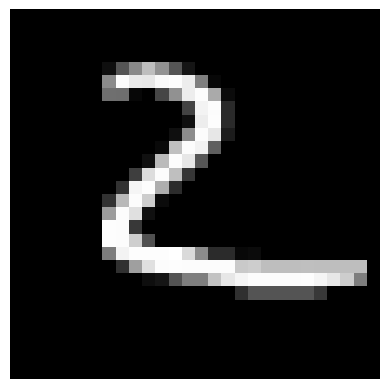

5 2


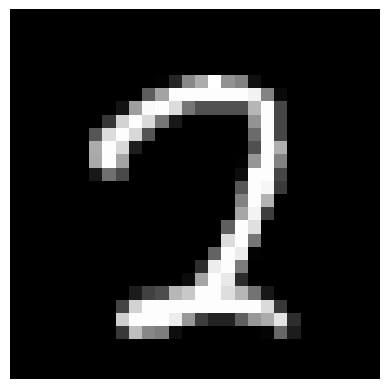

1 7


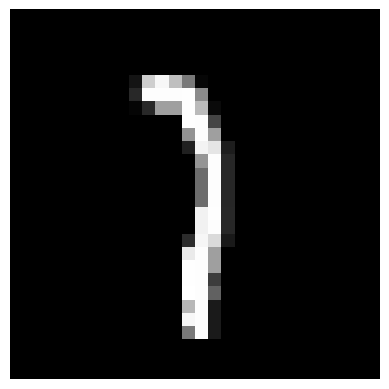

9 8


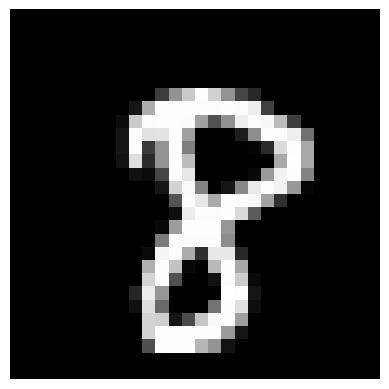

6 2


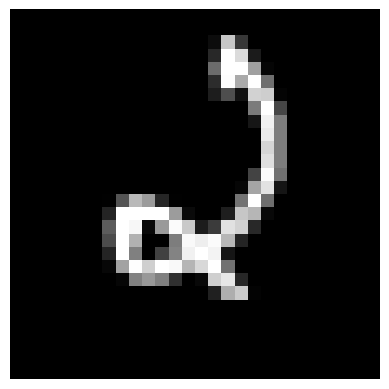

4 5


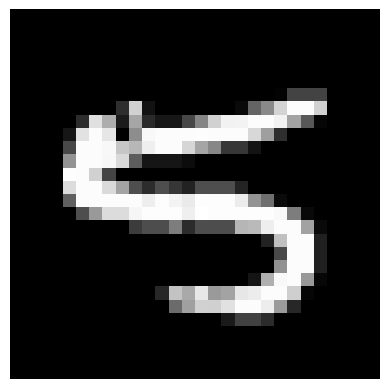

9 4


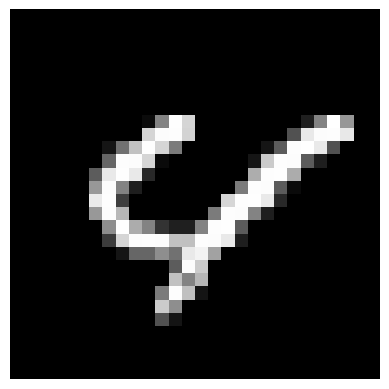

8 9


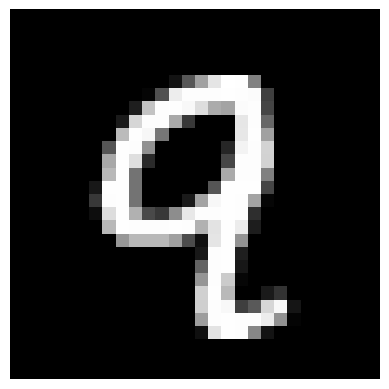

2 7


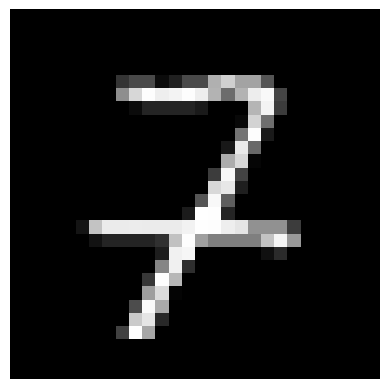

5 3


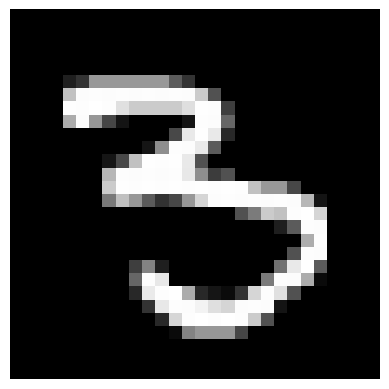

7 5


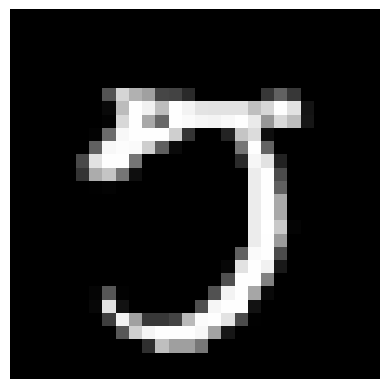

7 3


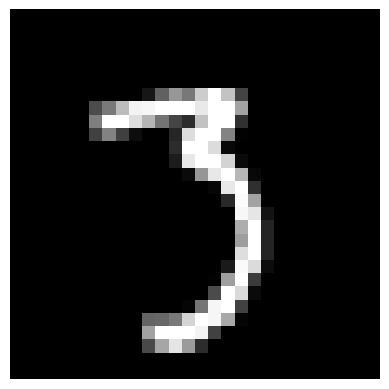

5 3


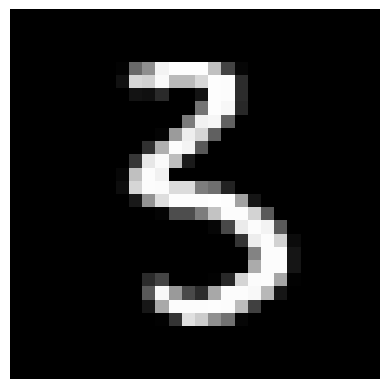

8 3


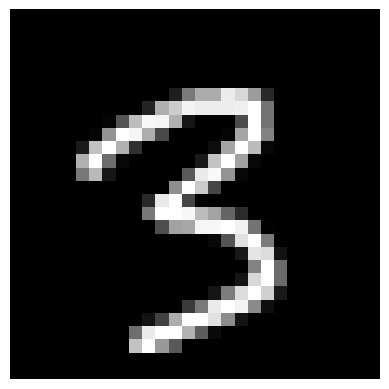

3 8


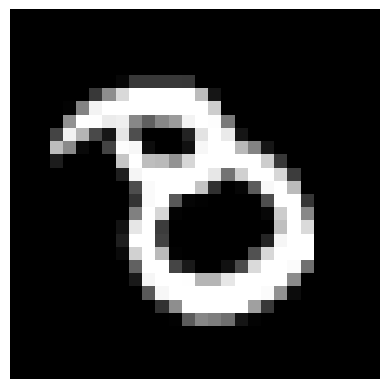

8 7


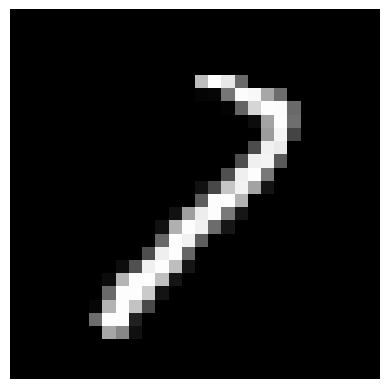

4 9


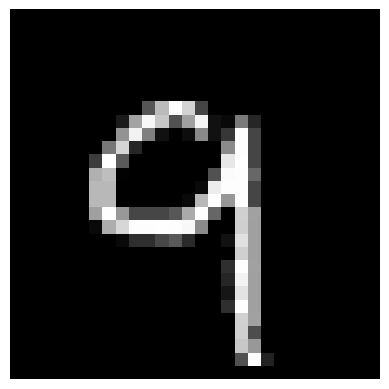

9 7


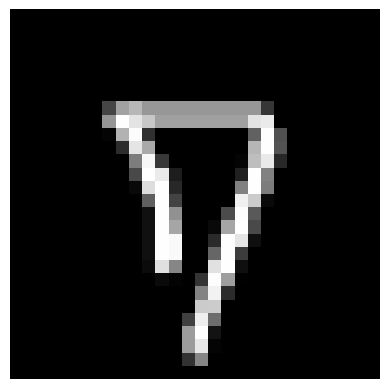

3 5


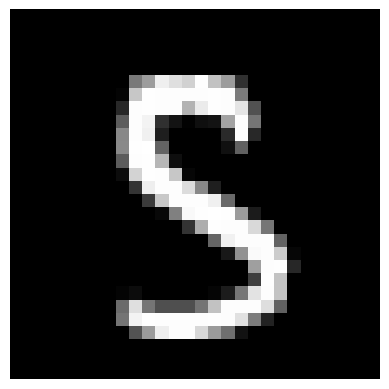

6 2


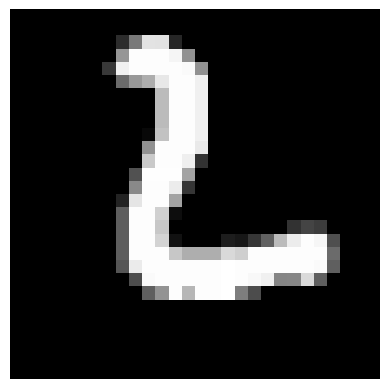

3 5


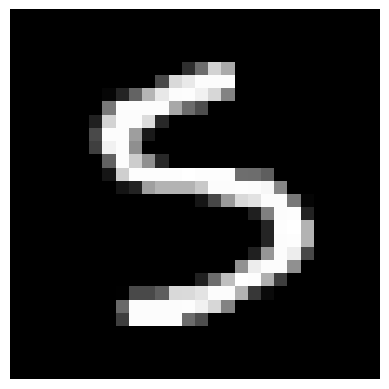

8 5


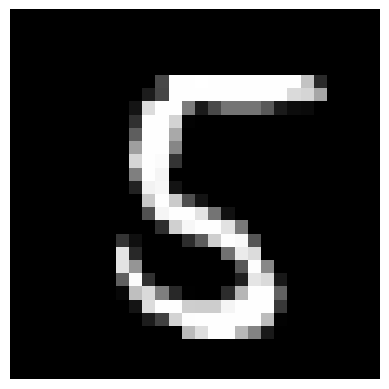

7 4


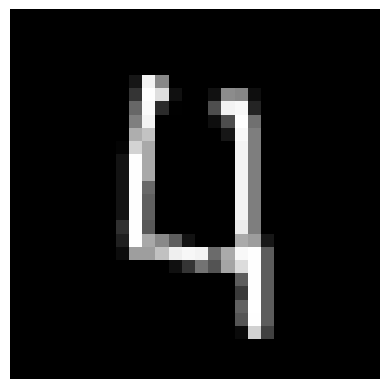

2 8


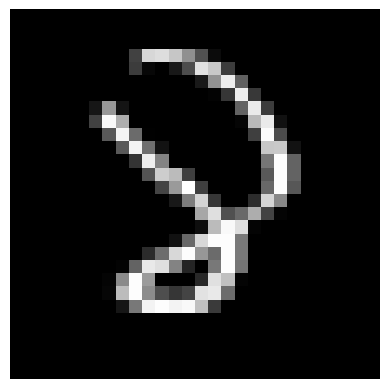

3 2


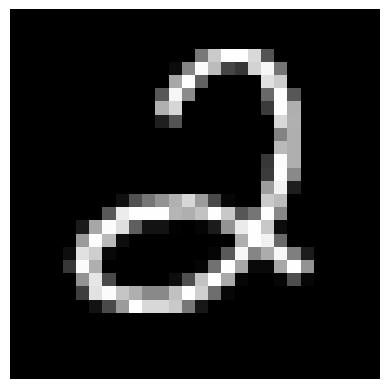

8 5


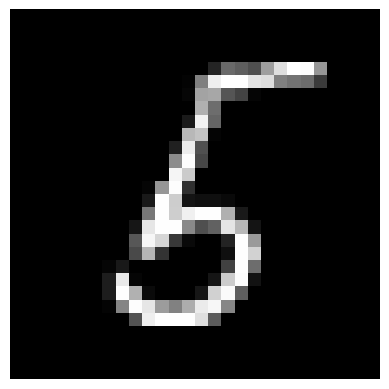

3 4


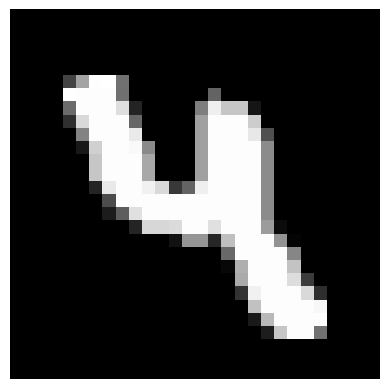

3 8


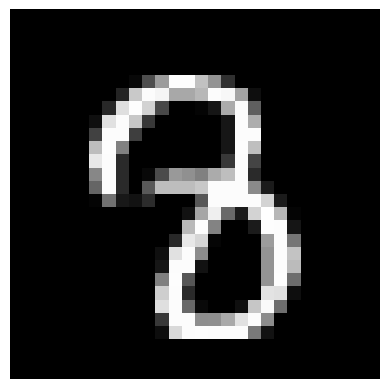

7 2


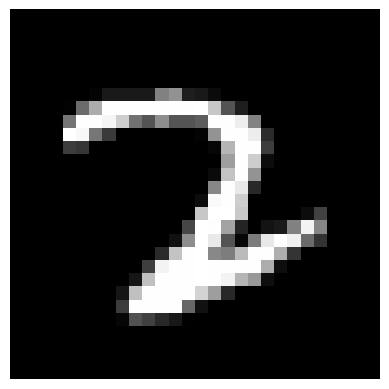

8 1


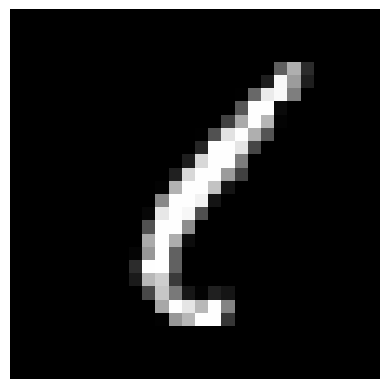

7 2


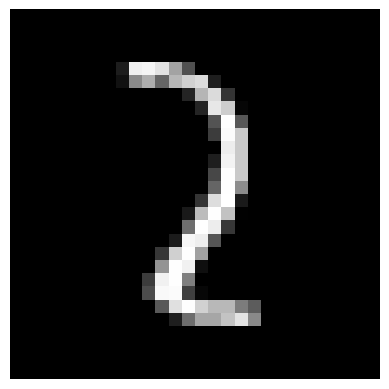

6 2


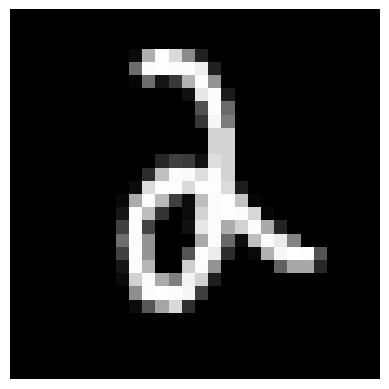

9 0


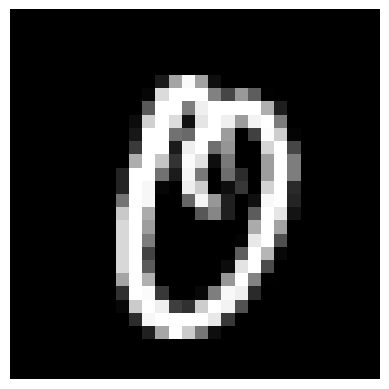

1 2


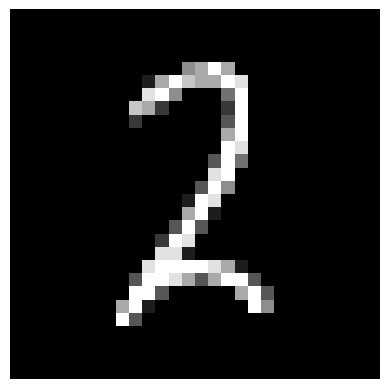

7 9


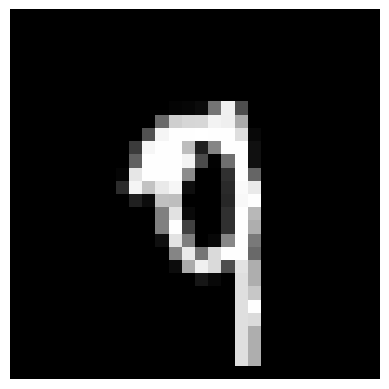

5 8


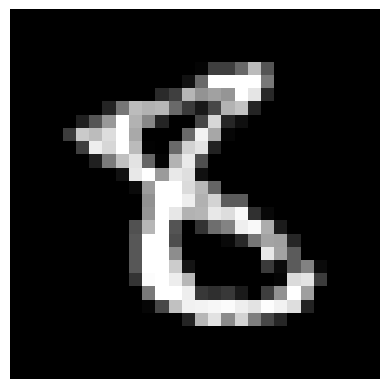

4 5


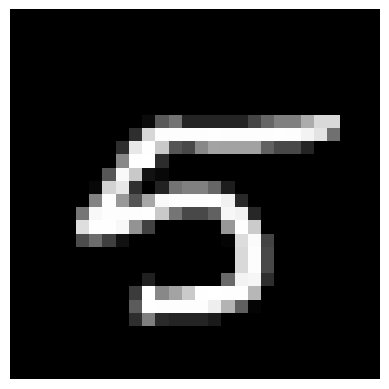

9 4


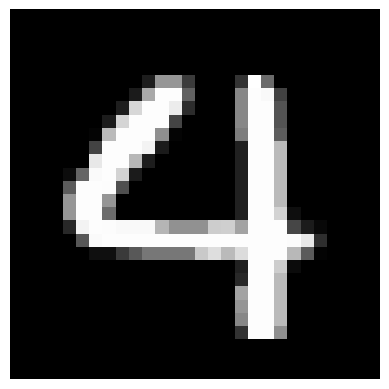

4 9


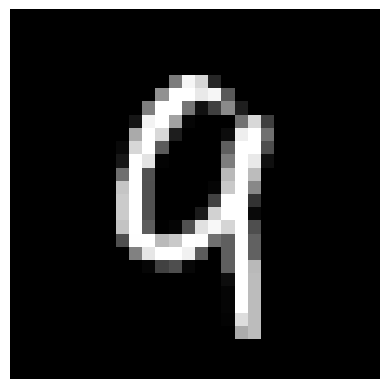

3 8


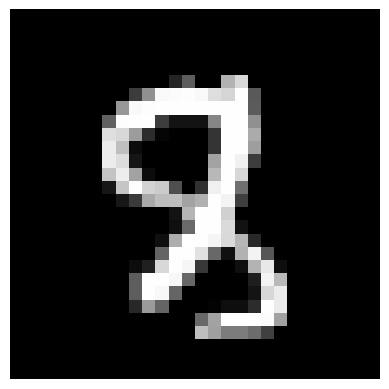

0 6


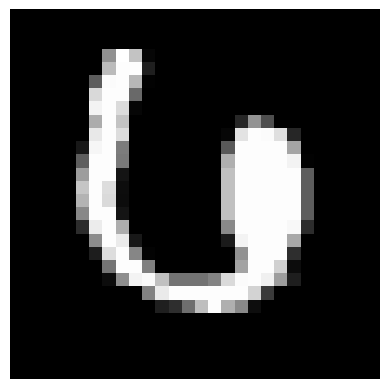

0 2


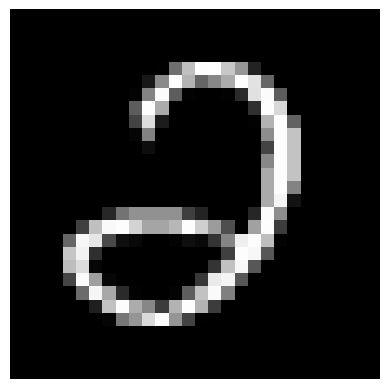

3 4


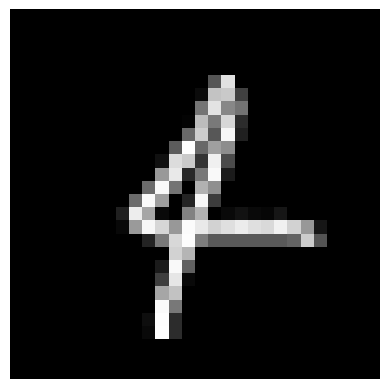

5 3


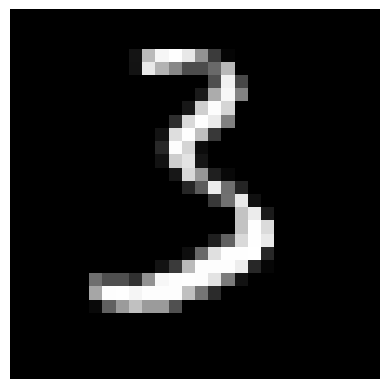

2 8


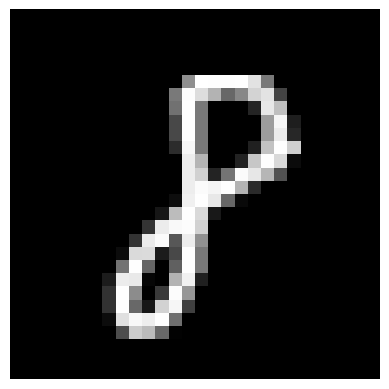

0 7


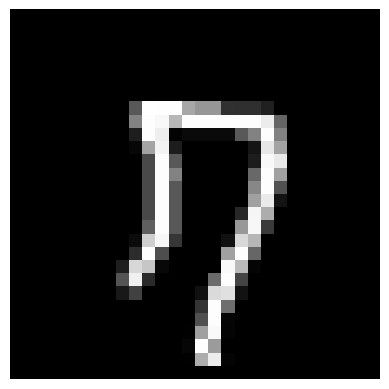

2 3


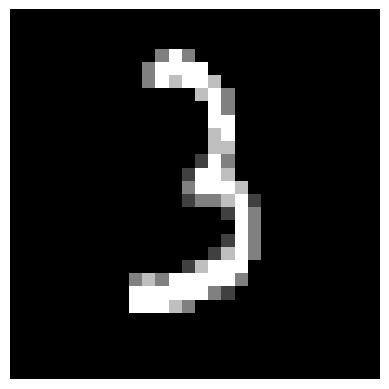

3 8


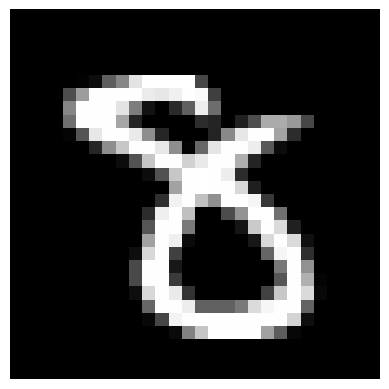

1 7


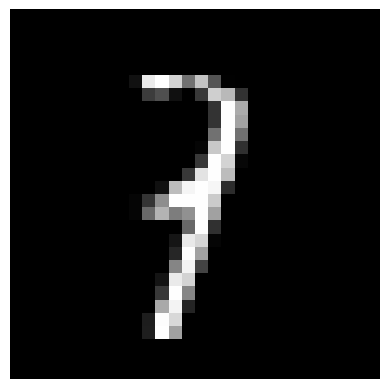

8 2


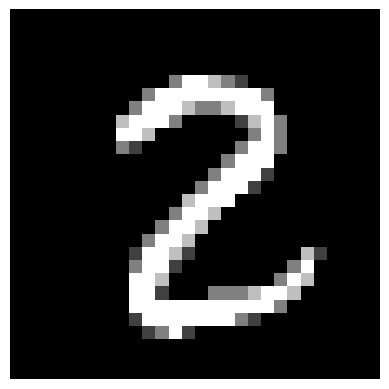

9 7


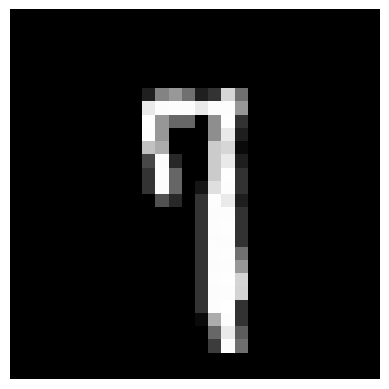

6 1


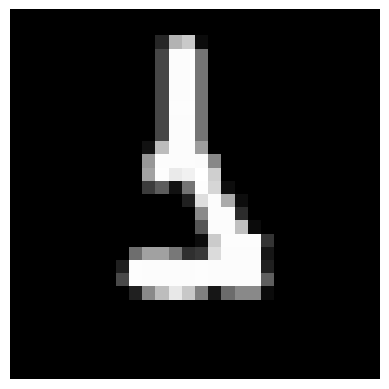

7 8


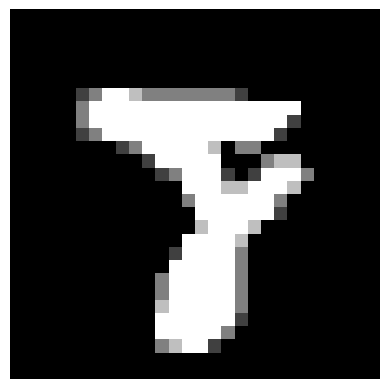

5 3


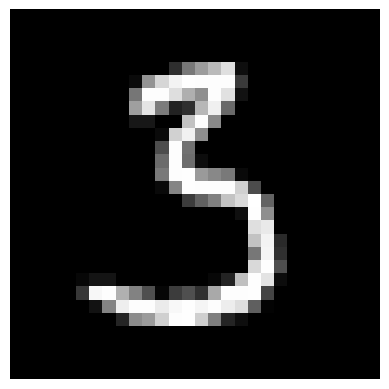

2 6


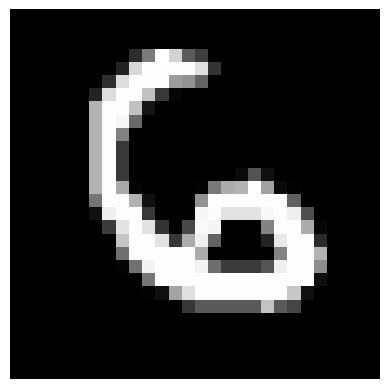

6 4


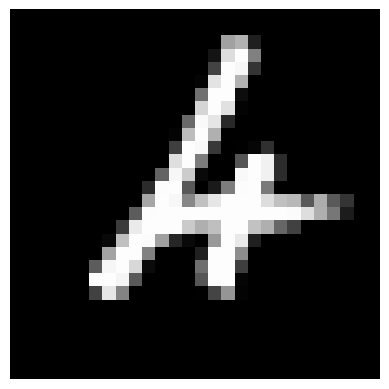

8 9


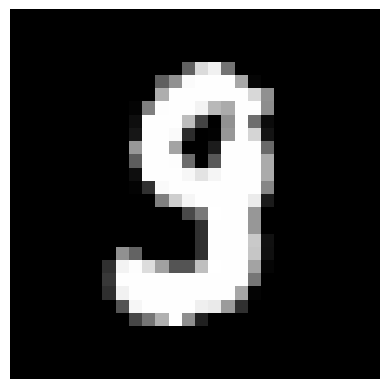

7 9


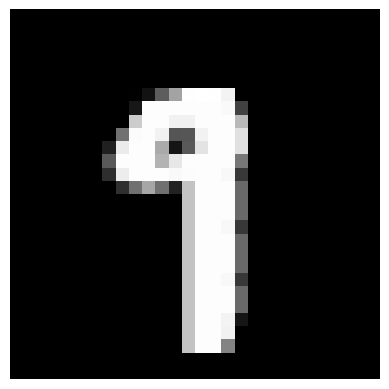

7 9


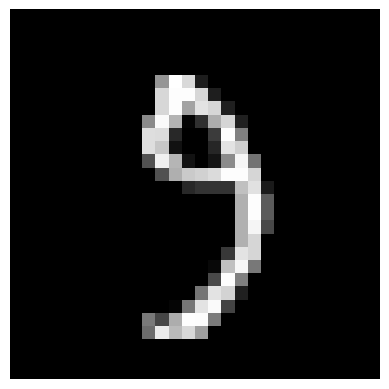

7 6


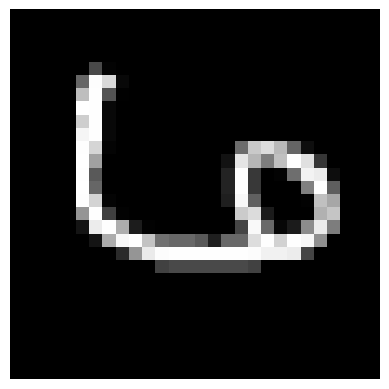

9 4


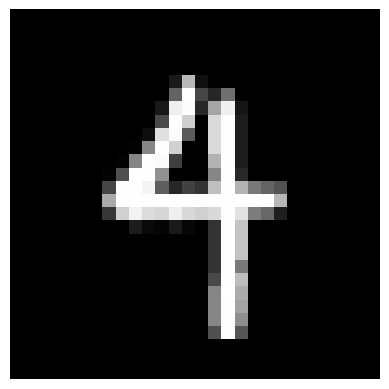

9 4


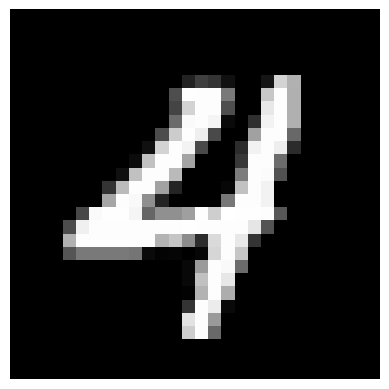

9 7


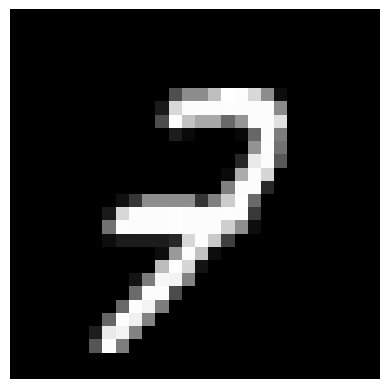

3 8


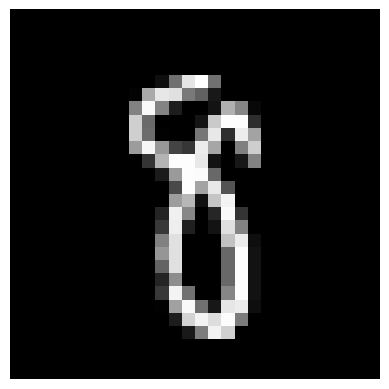

4 9


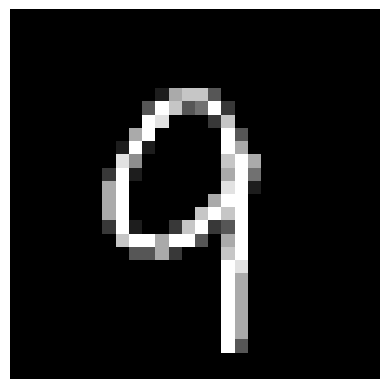

2 3


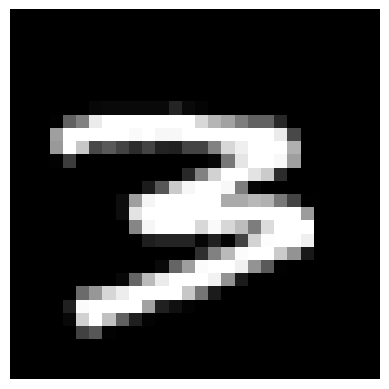

5 3


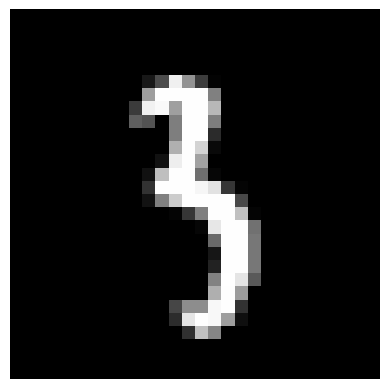

6 2


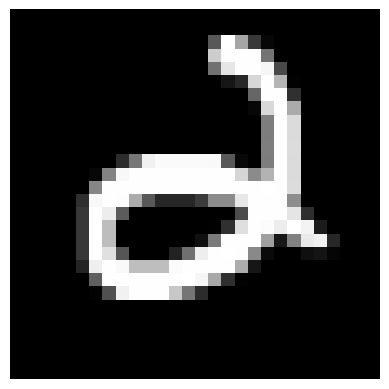

2 3


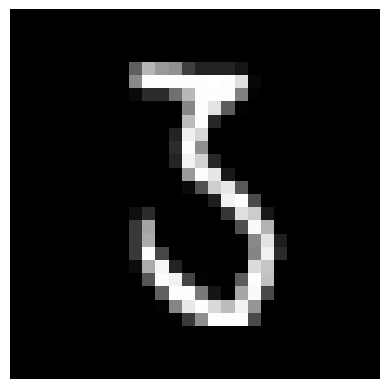

7 4


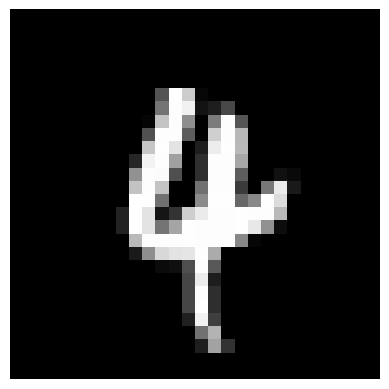

6 0


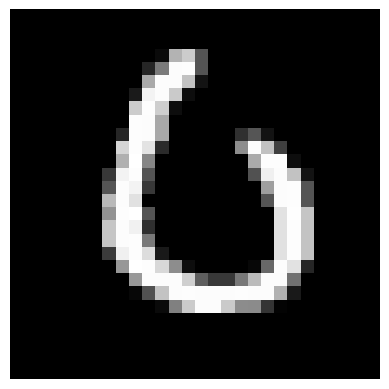

7 4


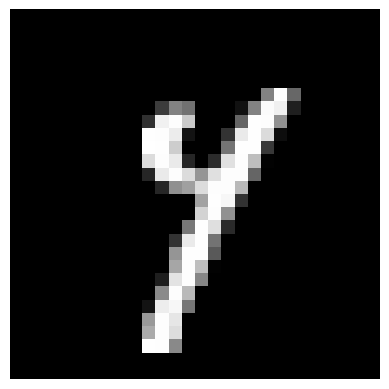

4 9


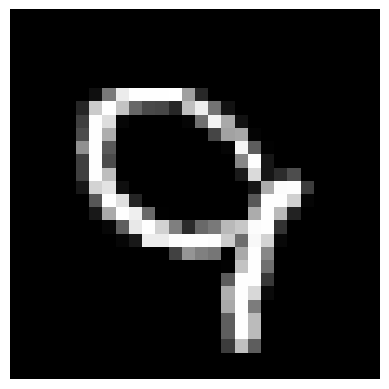

8 5


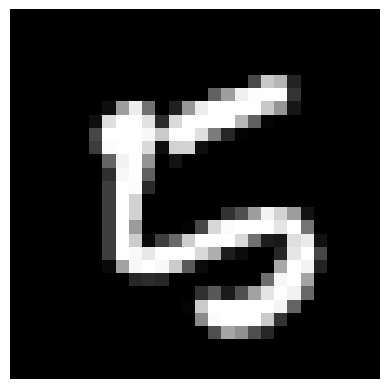

7 9


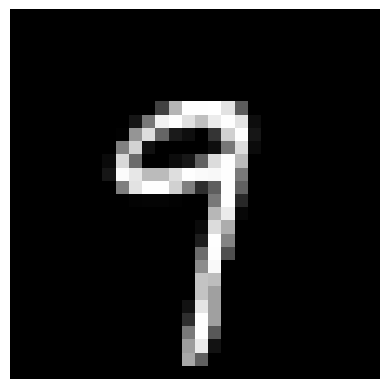

9 7


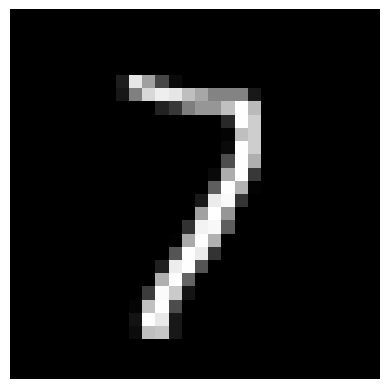

3 8


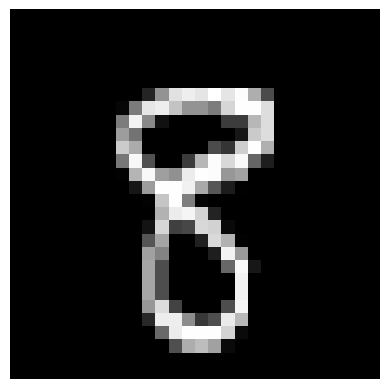

5 7


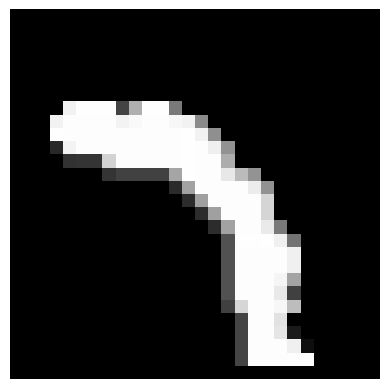

0 2


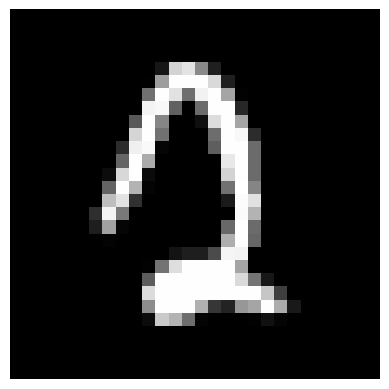

7 3


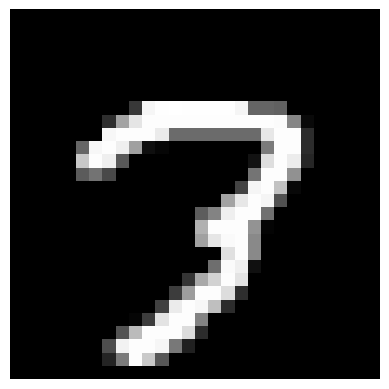

8 5


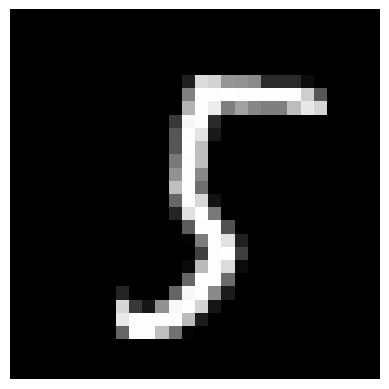

5 8


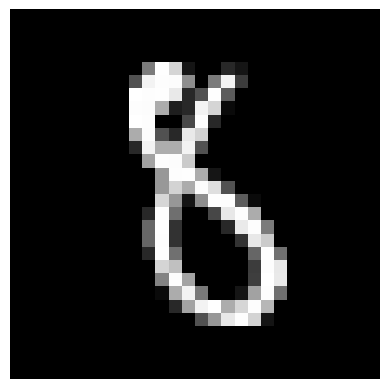

7 2


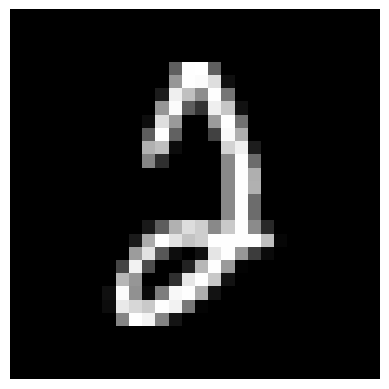

2 8


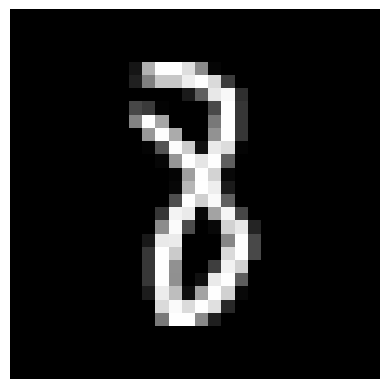

7 9


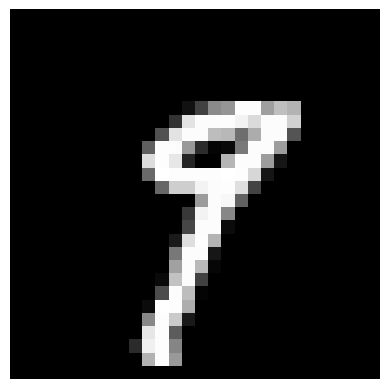

5 2


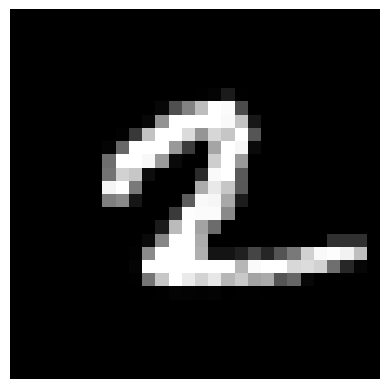

5 9


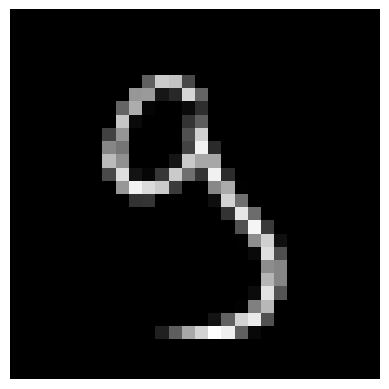

3 2


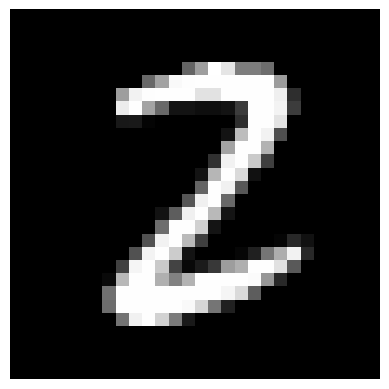

8 7


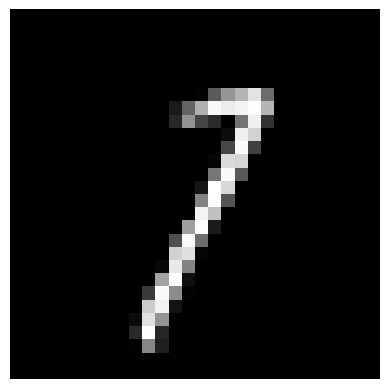

0 8


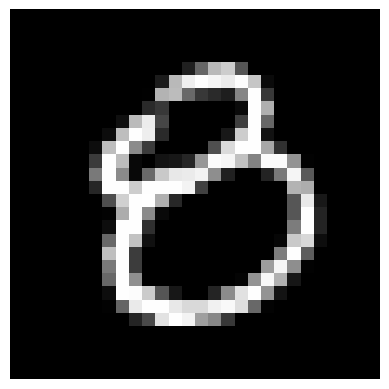

4 2


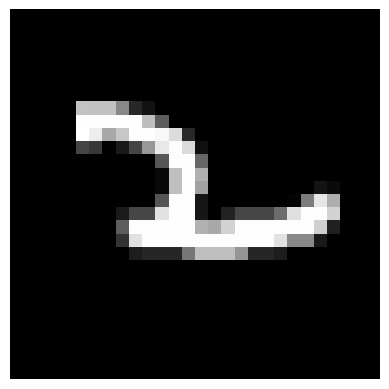

7 3


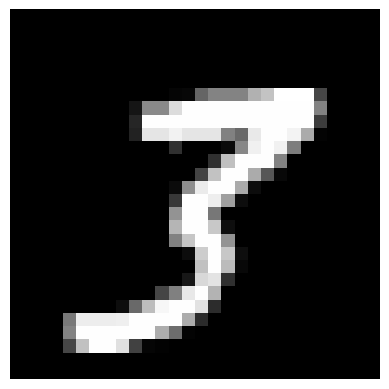

5 8


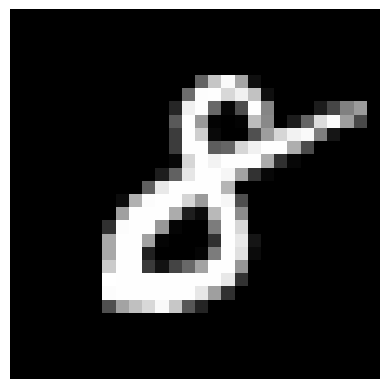

3 4


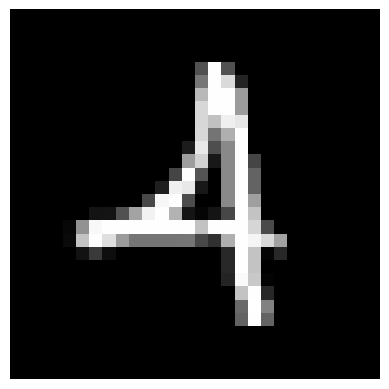

1 7


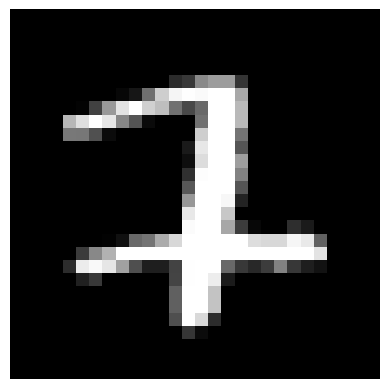

6 8


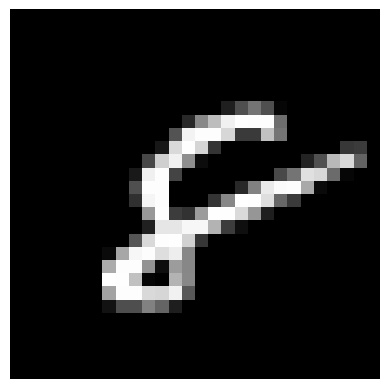

6 7


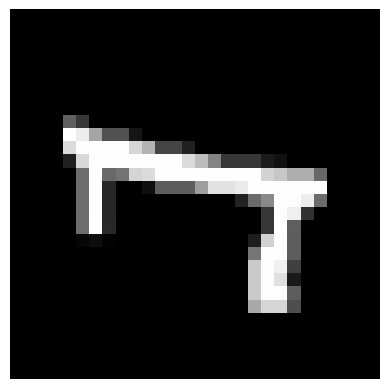

8 1


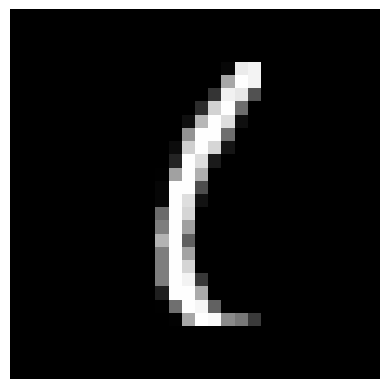

5 8


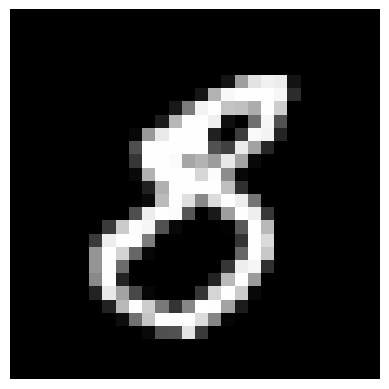

2 8


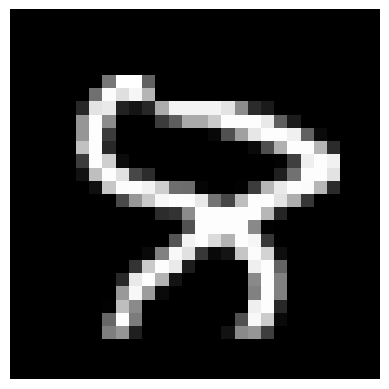

9 2


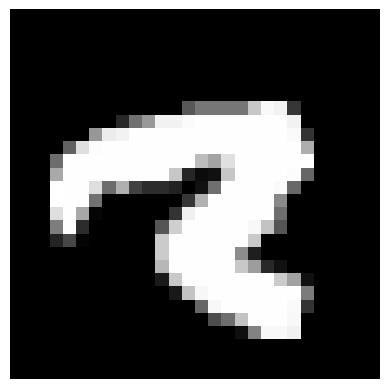

6 0


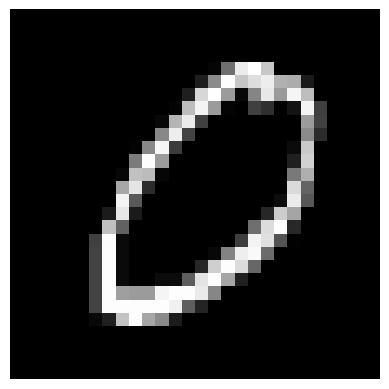

4 6


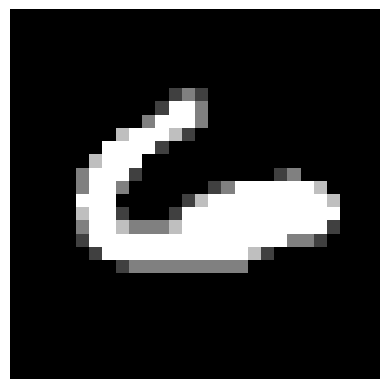

7 9


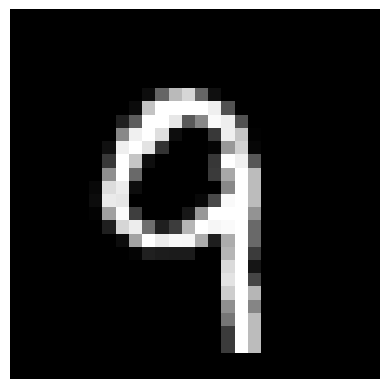

5 8


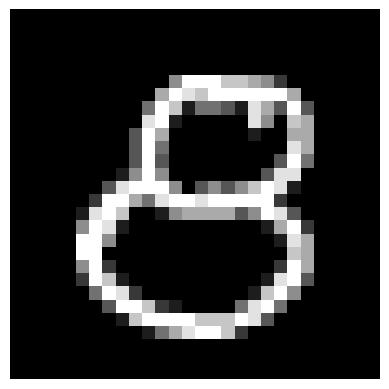

3 2


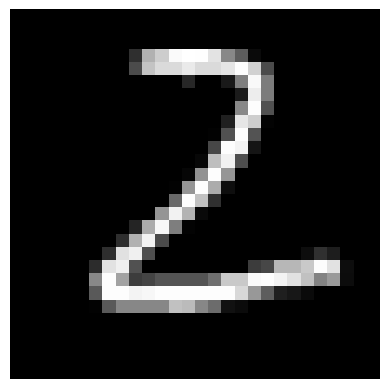

5 3


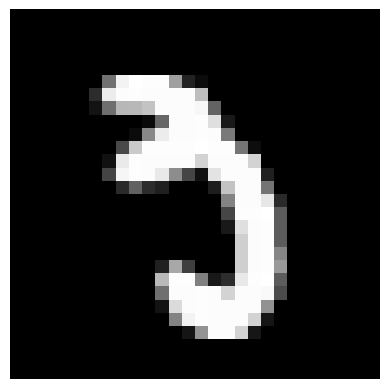

8 2


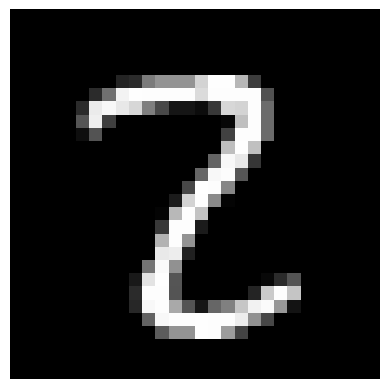

3 5


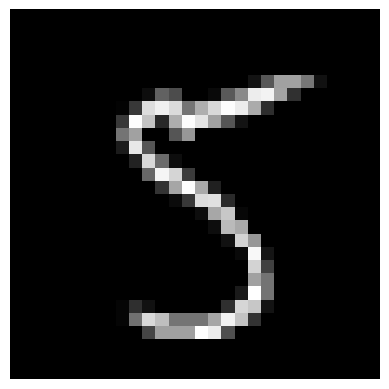

7 8


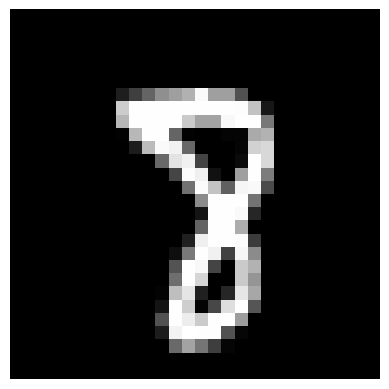

4 9


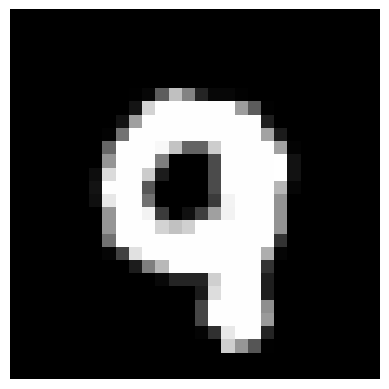

5 8


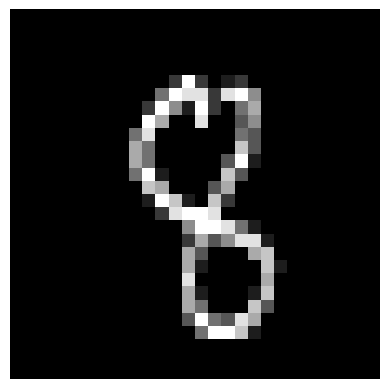

4 6


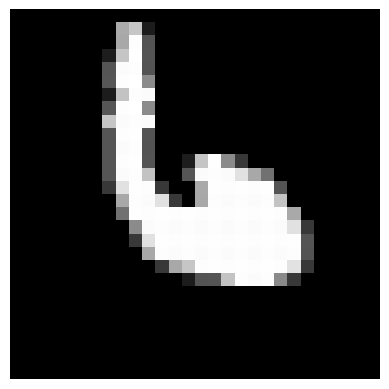

4 1


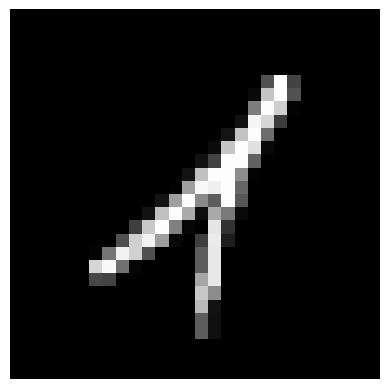

9 7


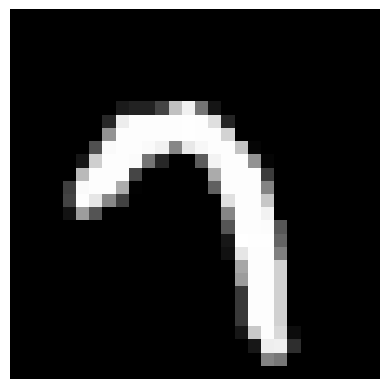

3 5


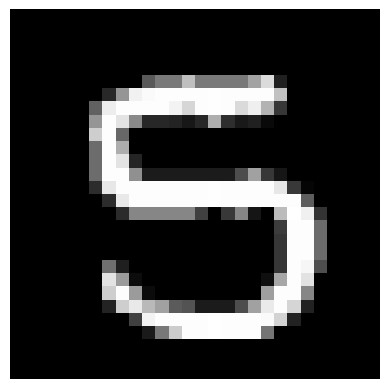

5 8


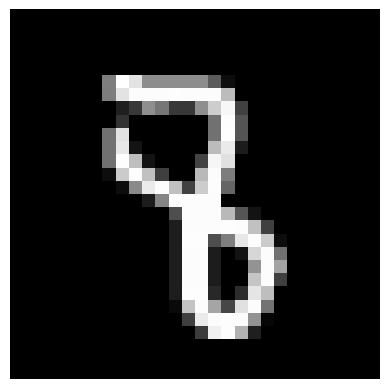

4 9


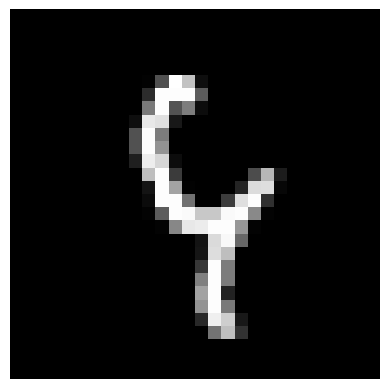

3 5


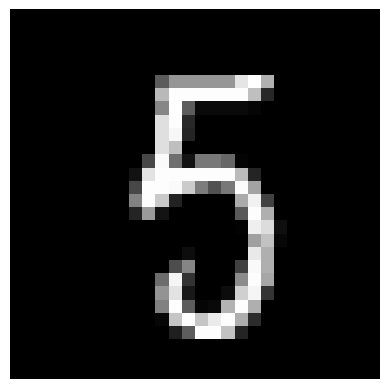

4 7


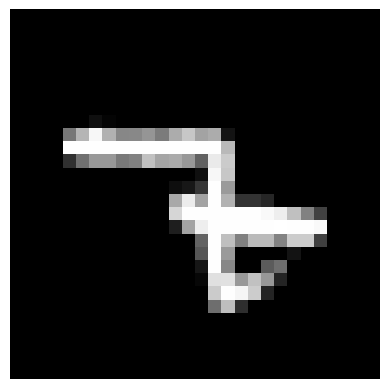

8 5


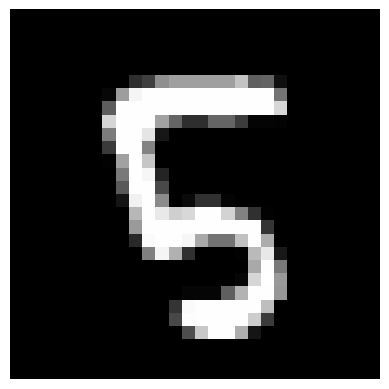

5 3


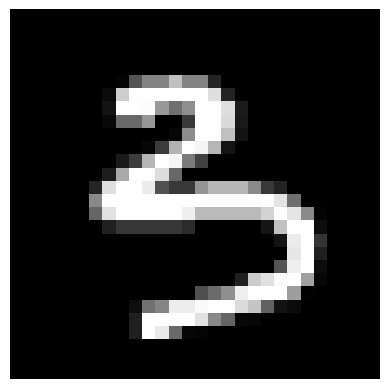

4 2


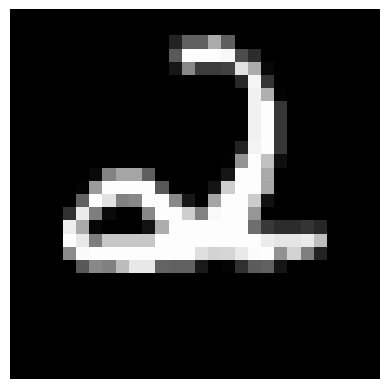

6 4


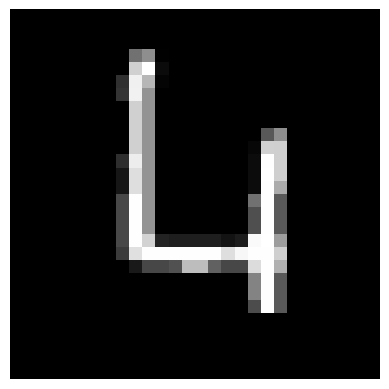

0 5


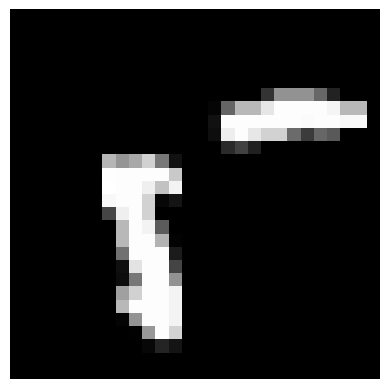

4 7


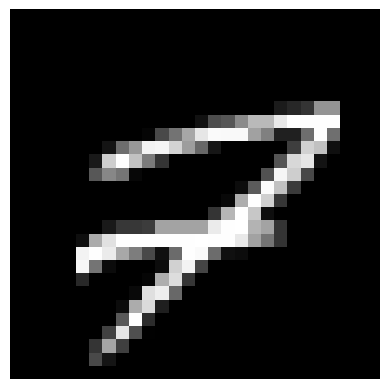

6 8


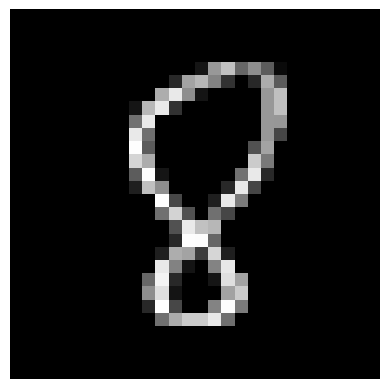

5 9


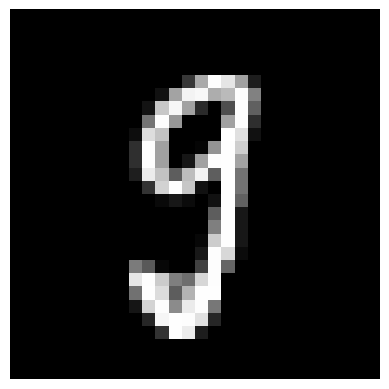

9 4


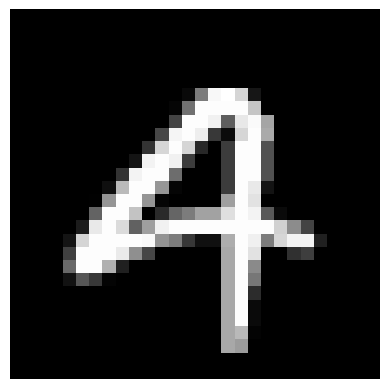

9 4


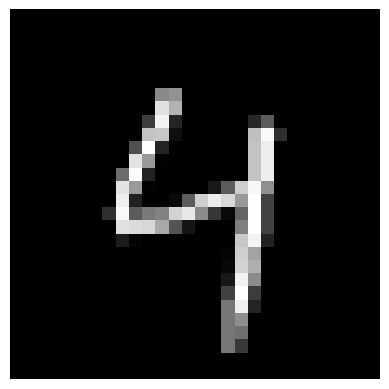

8 6


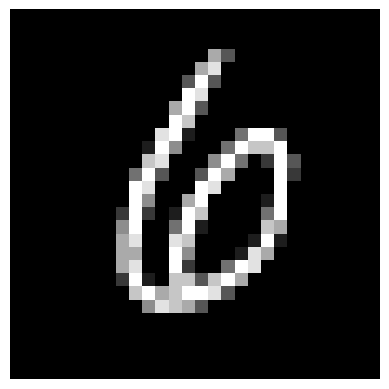

3 5


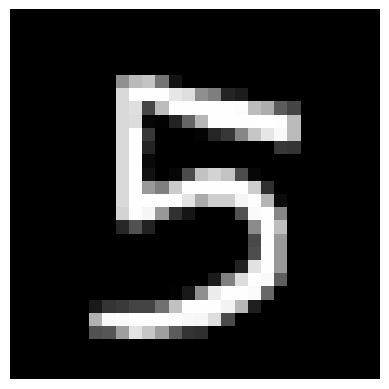

5 8


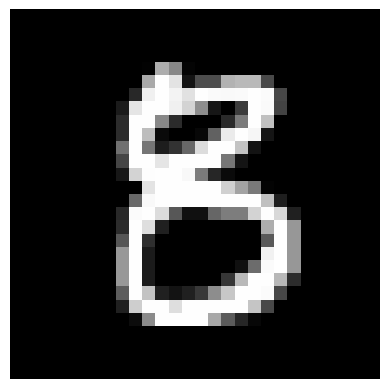

8 6


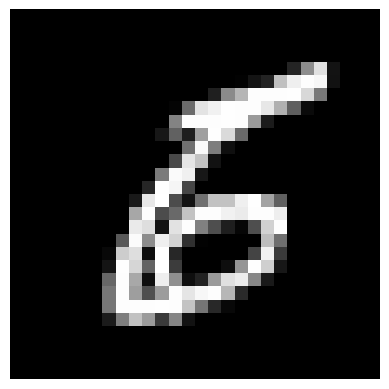

6 2


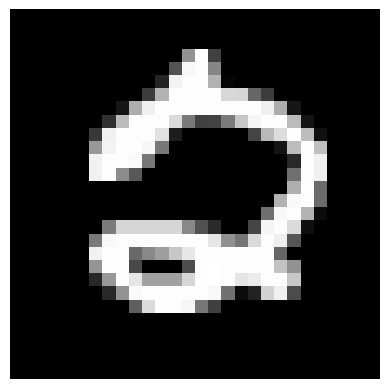

9 4


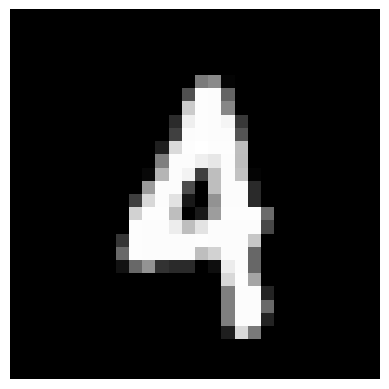

9 8


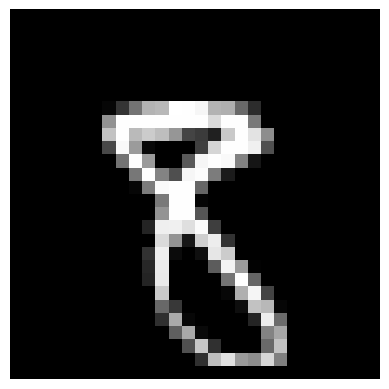

7 3


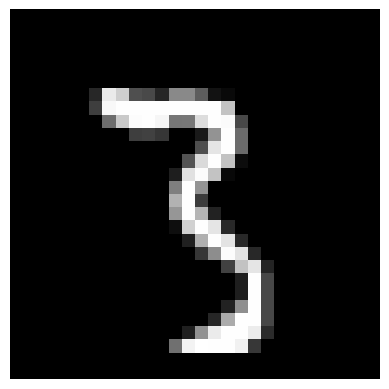

2 7


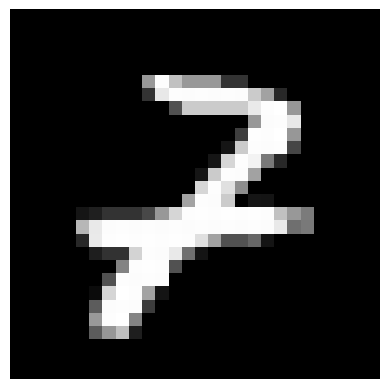

8 7


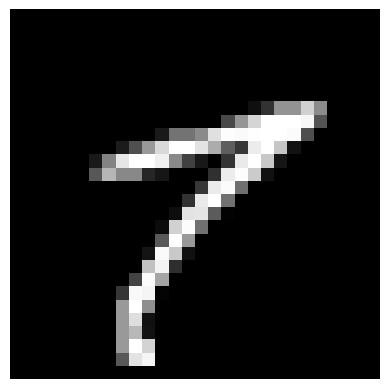

3 5


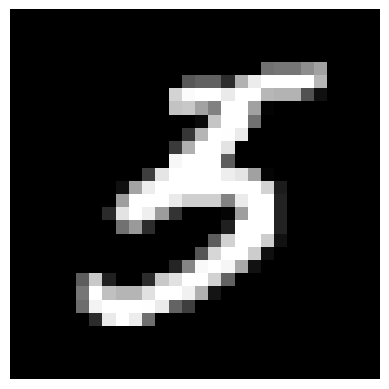

8 4


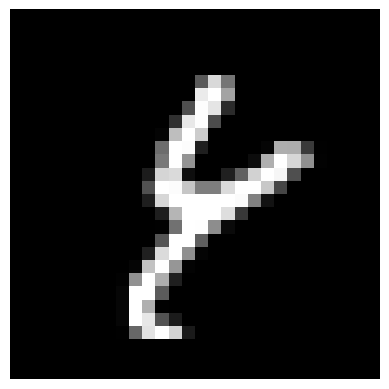

7 2


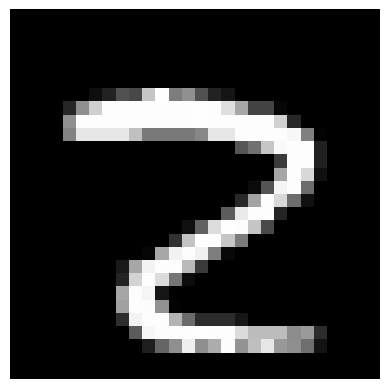

9 4


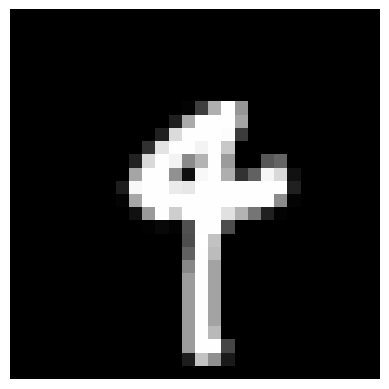

4 9


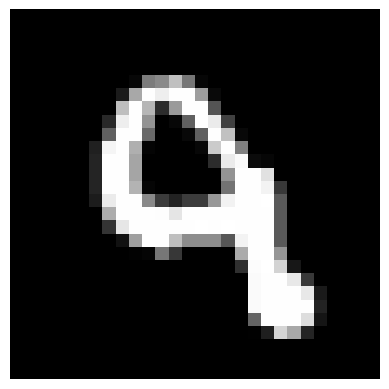

8 4


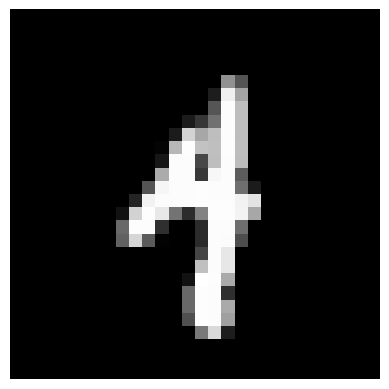

1 8


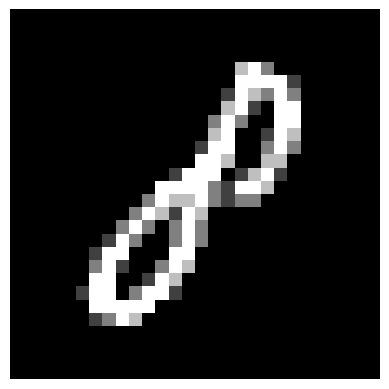

0 2


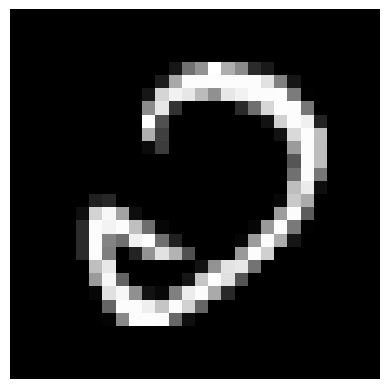

4 8


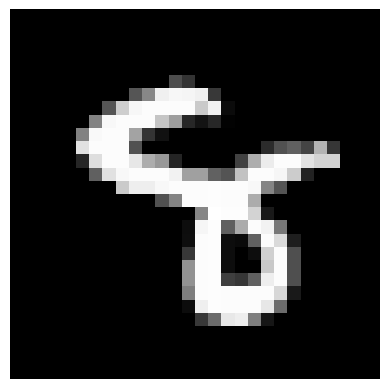

0 8


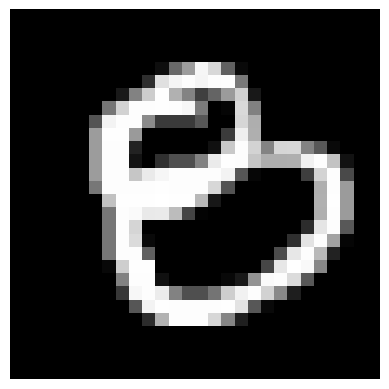

9 3


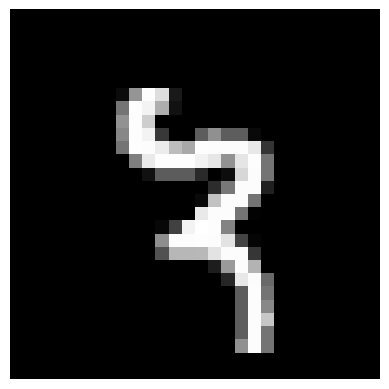

0 7


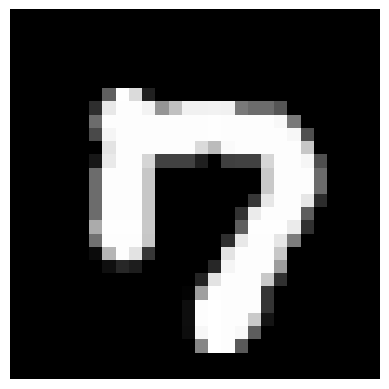

0 6


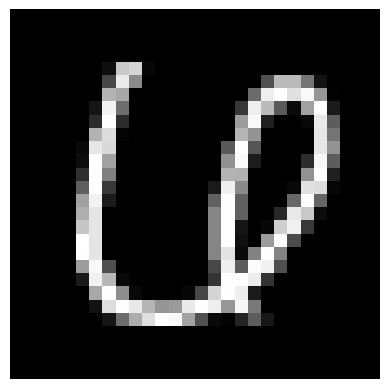

9 5


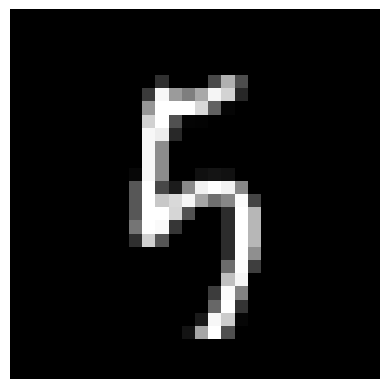

7 9


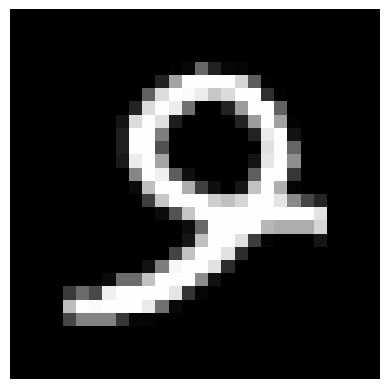

9 4


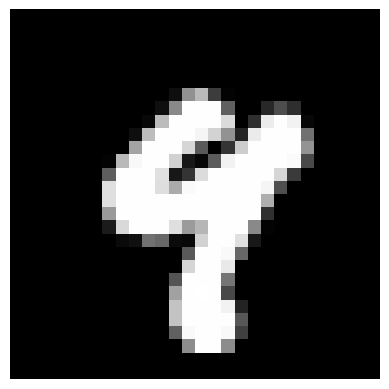

2 6


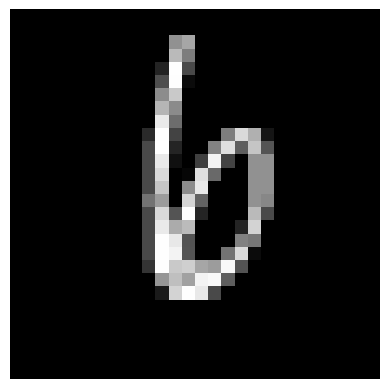

5 6


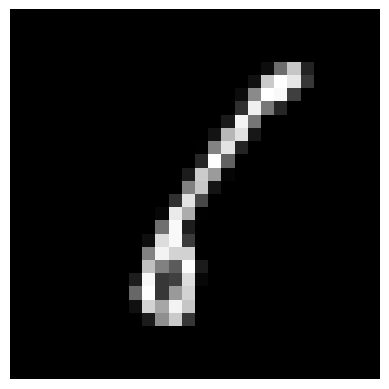

4 6


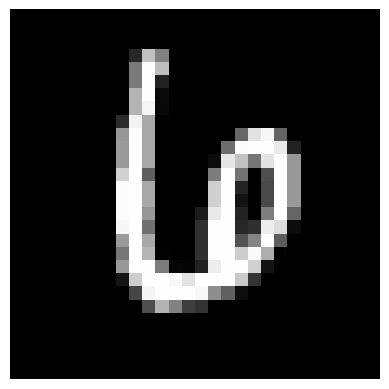

2 4


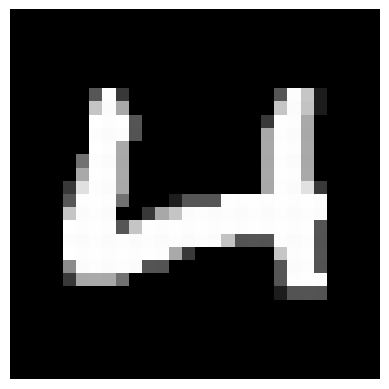

9 4


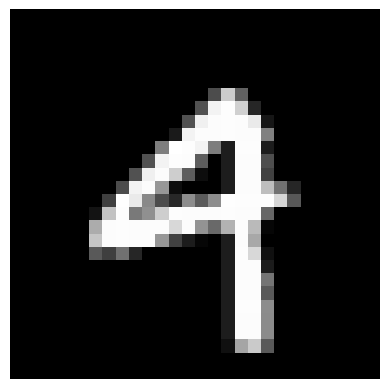

3 8


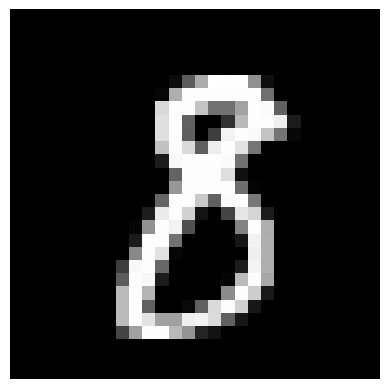

6 0


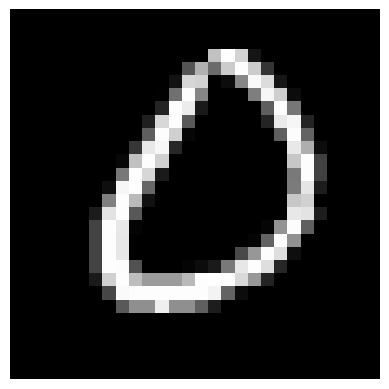

9 4


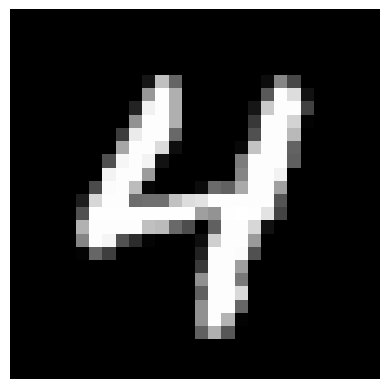

2 1


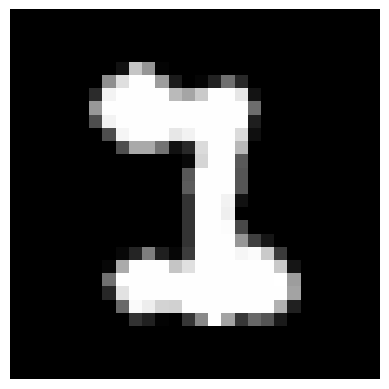

6 4


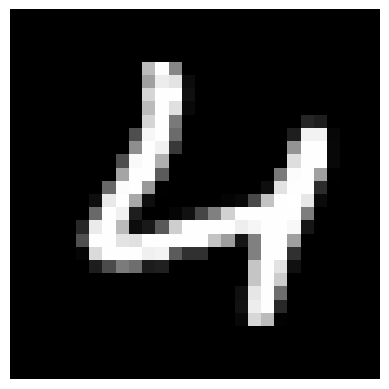

5 0


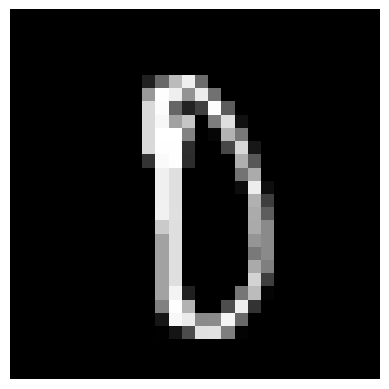

5 2


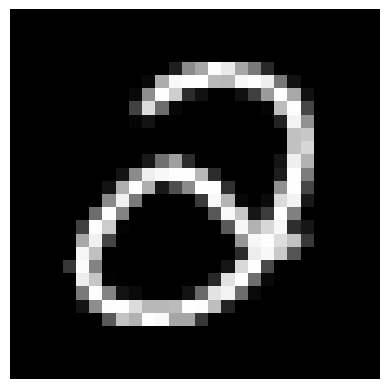

1 9


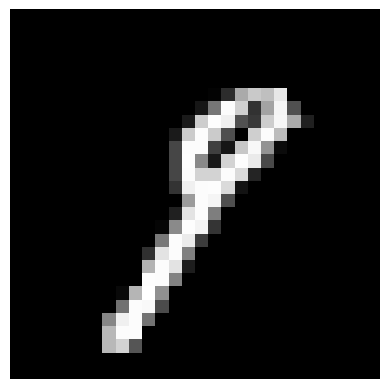

3 2


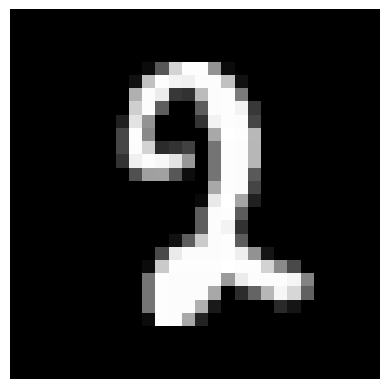

3 4


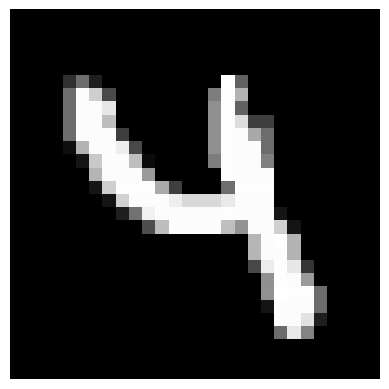

3 8


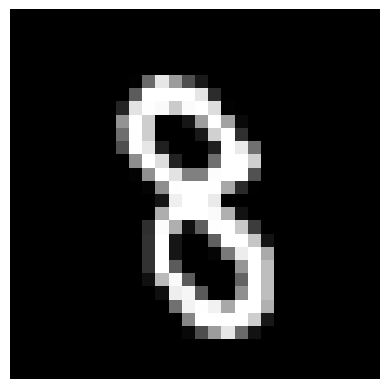

3 8


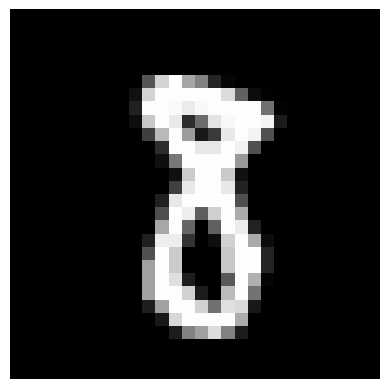

5 6


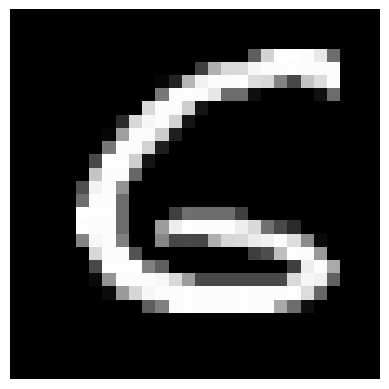

9 4


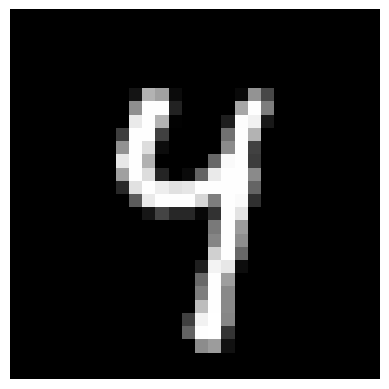

8 5


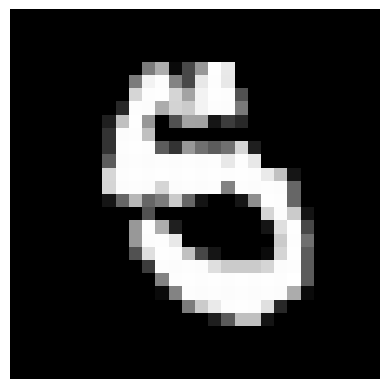

4 9


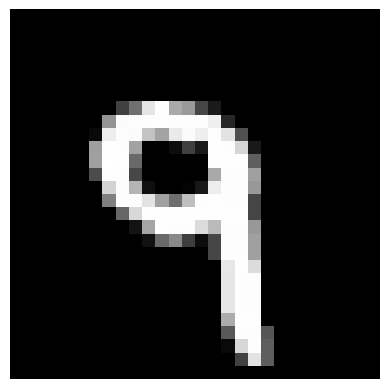

5 1


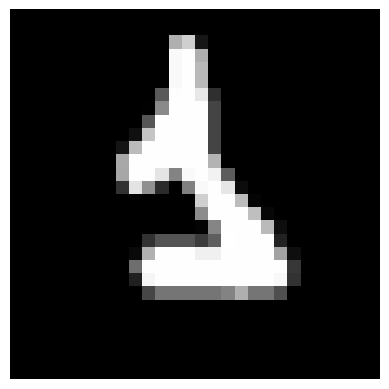

0 7


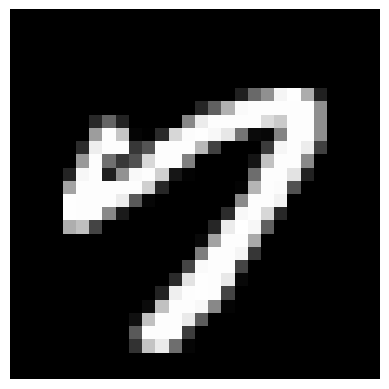

1 2


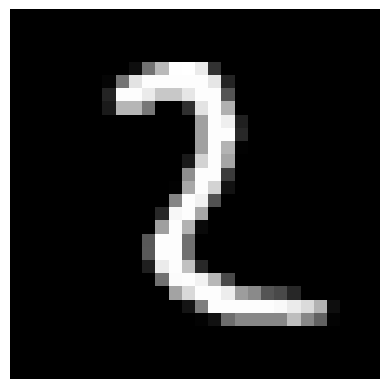

0 8


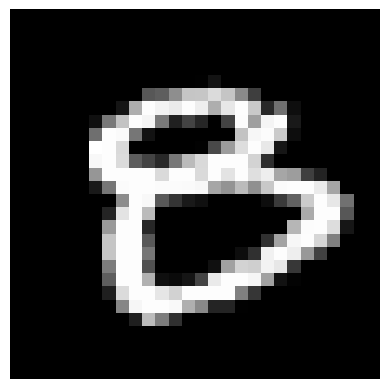

8 1


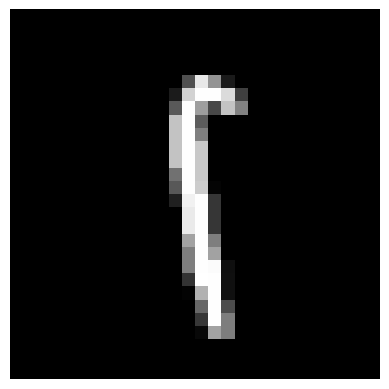

3 5


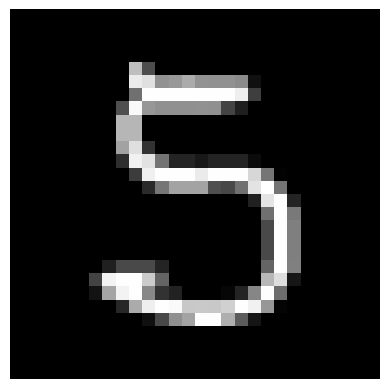

6 9


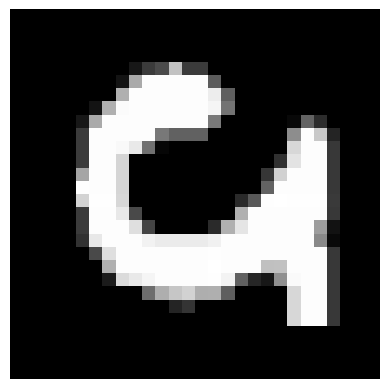

3 2


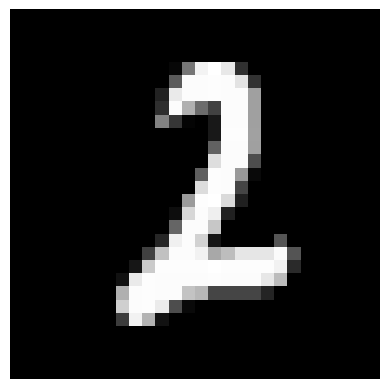

3 8


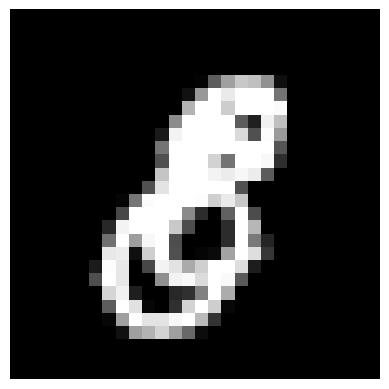

8 2


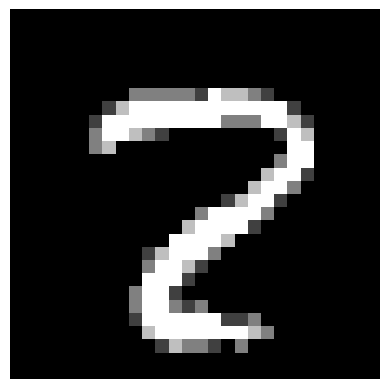

5 8


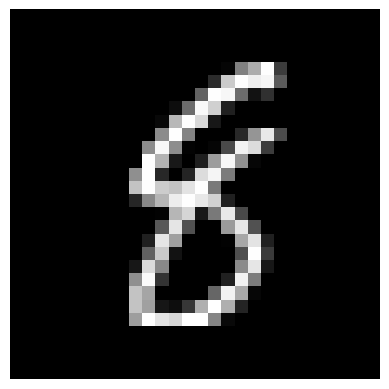

5 3


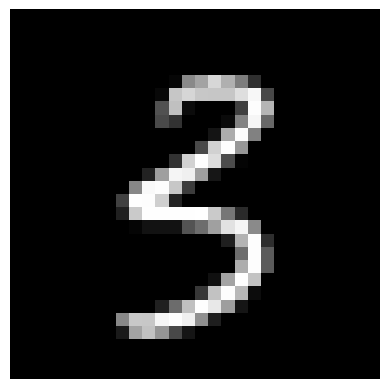

4 9


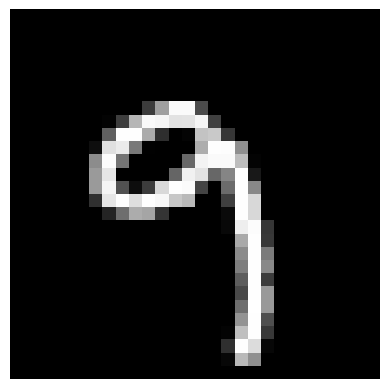

5 9


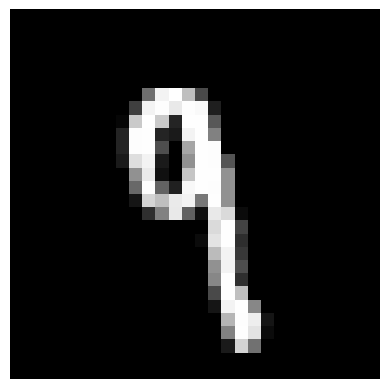

3 5


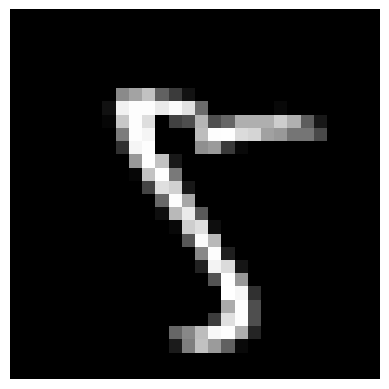

1 3


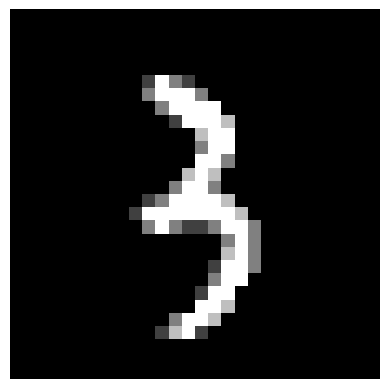

0 3


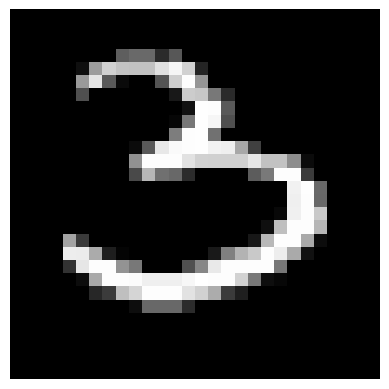

3 1


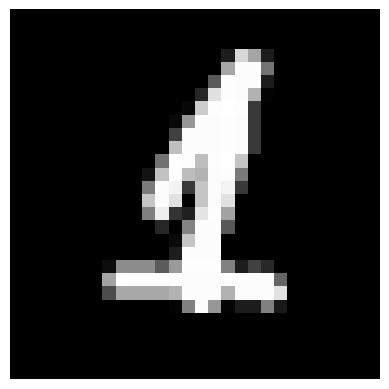

9 5


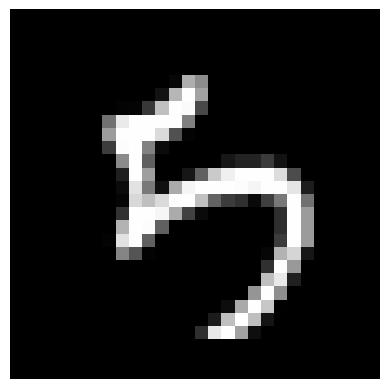

2 0


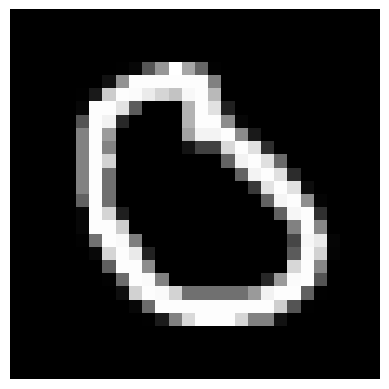

0 9


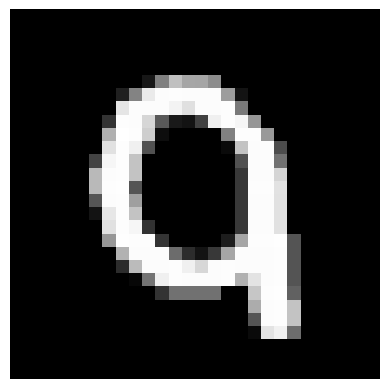

7 8


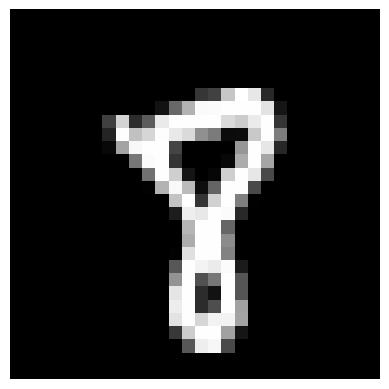

7 4


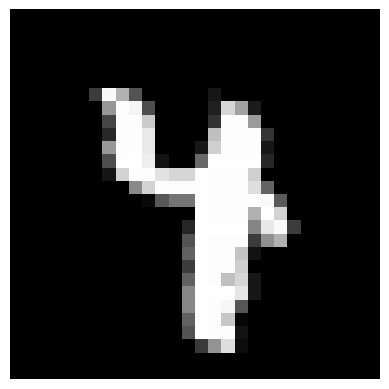

3 9


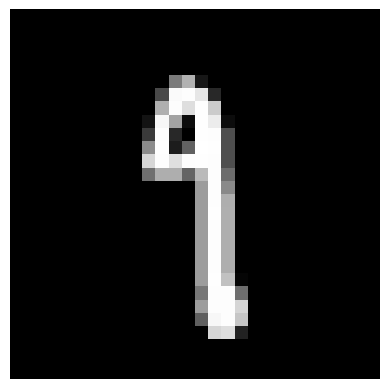

5 8


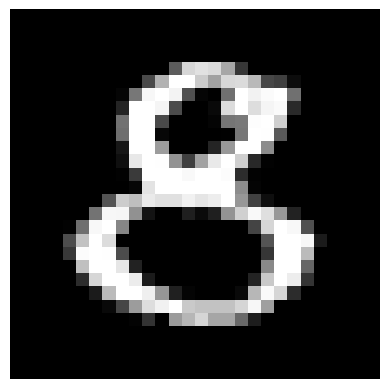

9 4


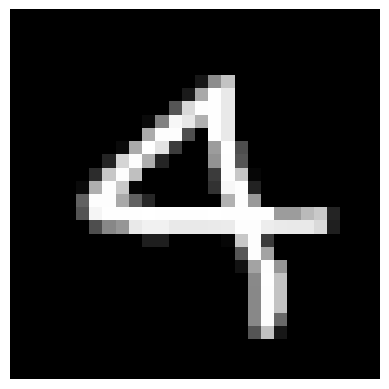

3 8


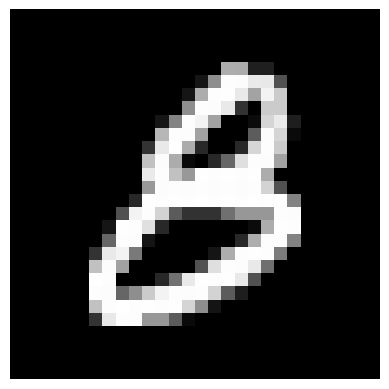

8 2


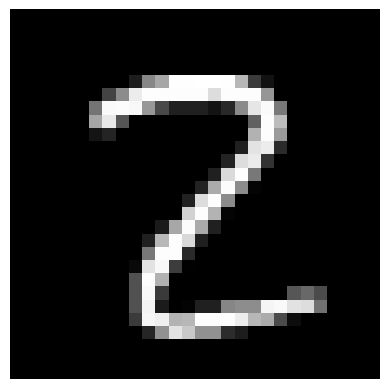

1 9


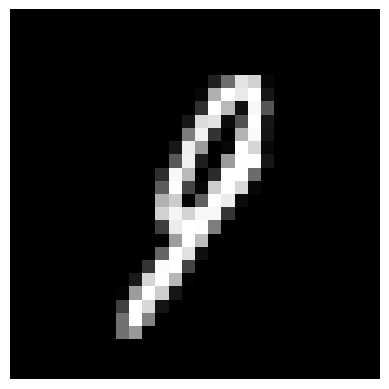

9 3


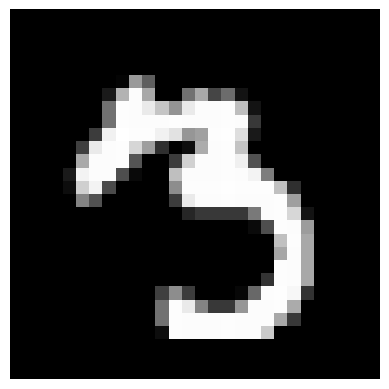

7 6


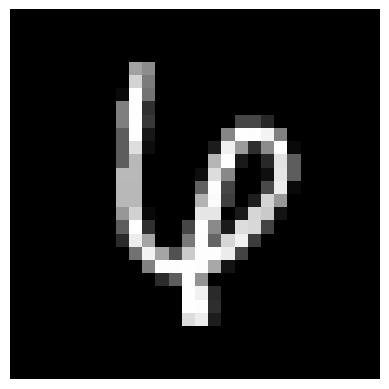

8 3


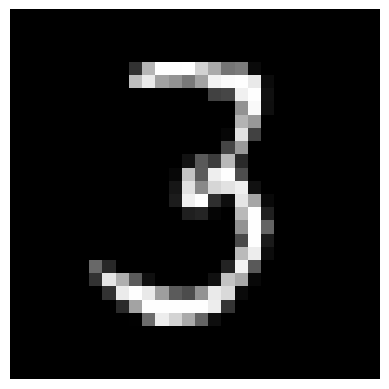

7 9


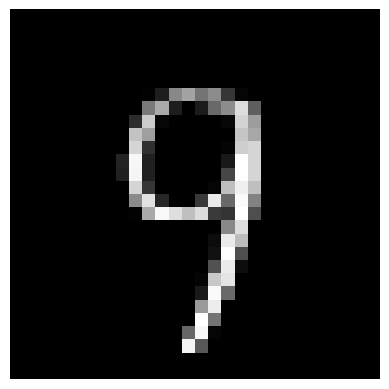

1 2


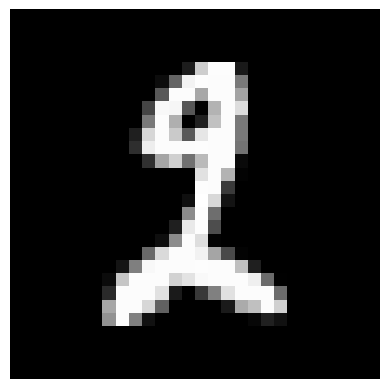

5 0


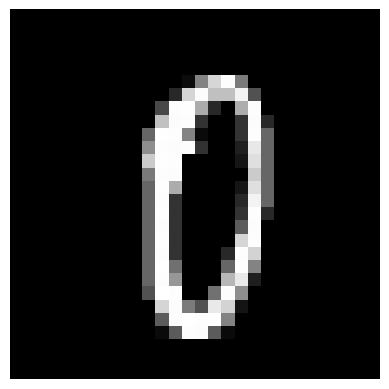

8 1


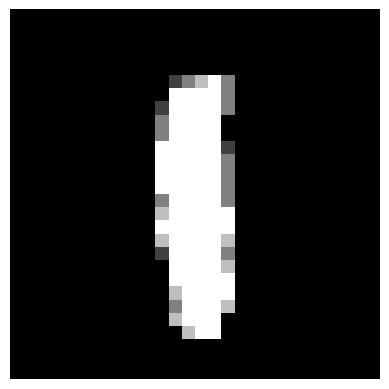

8 2


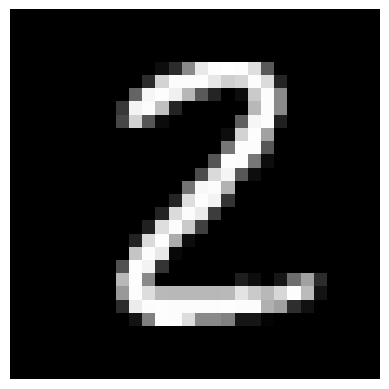

4 9


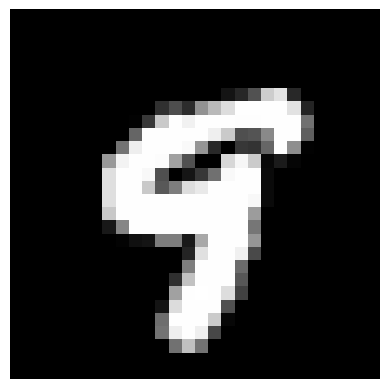

1 2


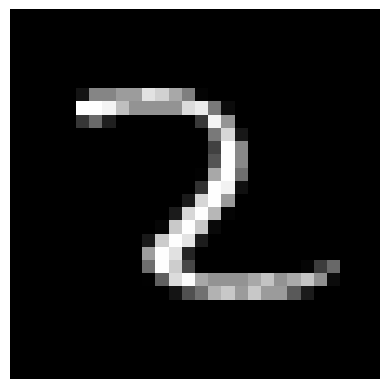

2 7


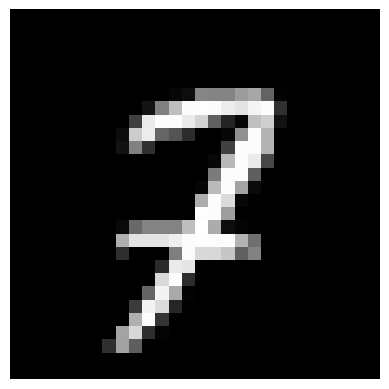

2 1


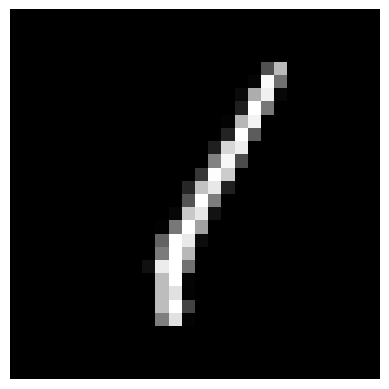

2 3


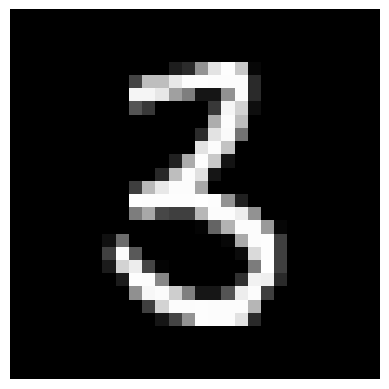

6 5


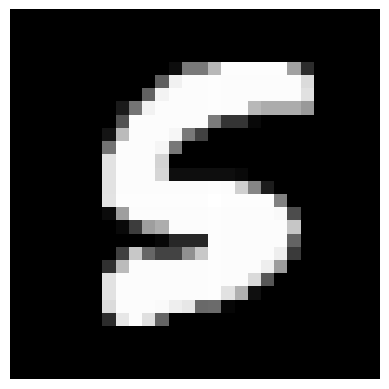

8 9


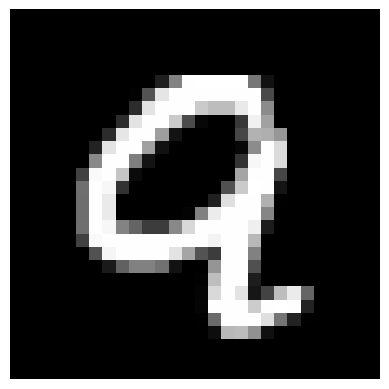

3 8


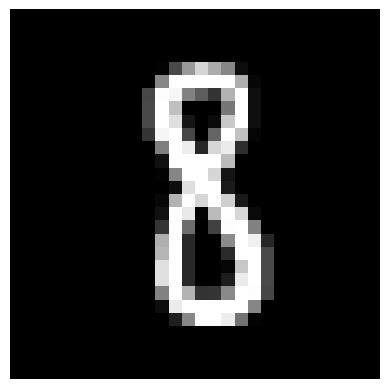

0 7


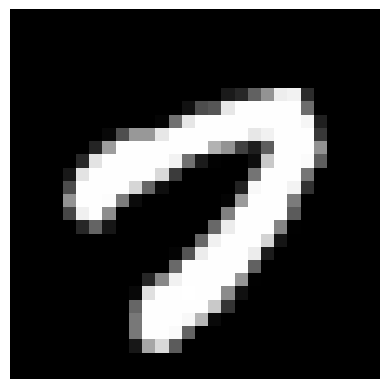

8 3


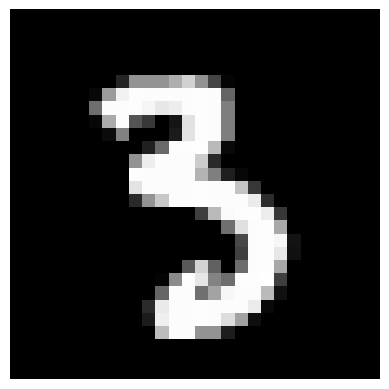

3 5


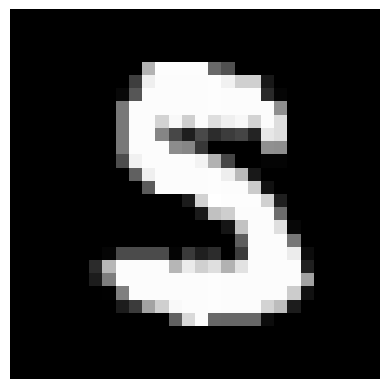

1 6


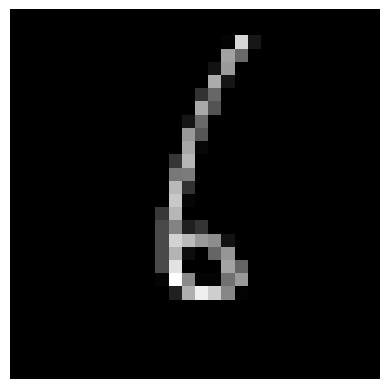

5 3


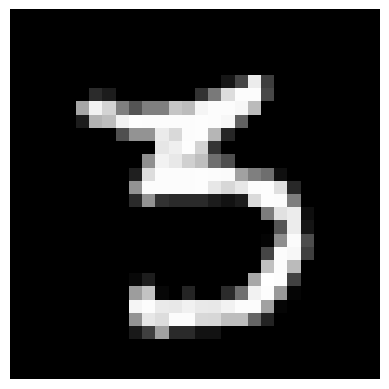

9 4


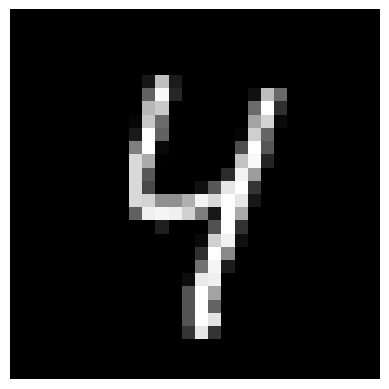

7 8


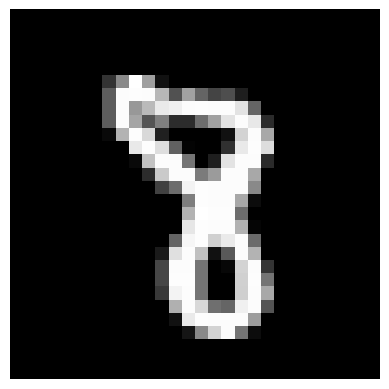

2 5


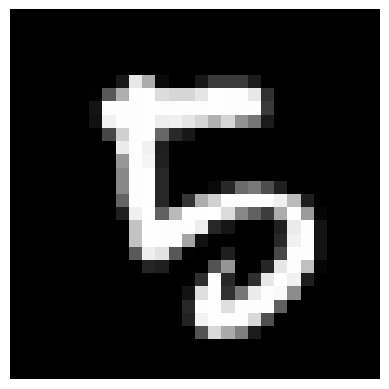

2 3


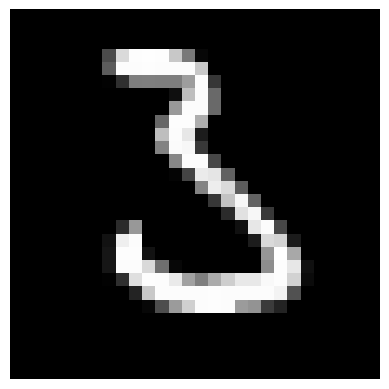

8 5


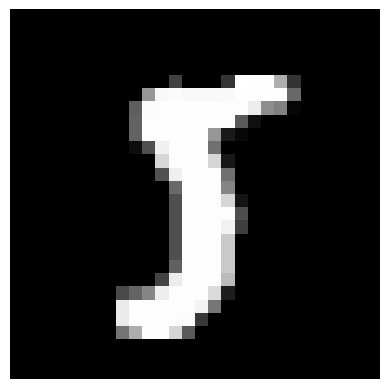

7 5


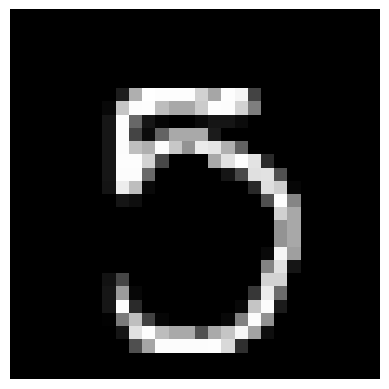

7 9


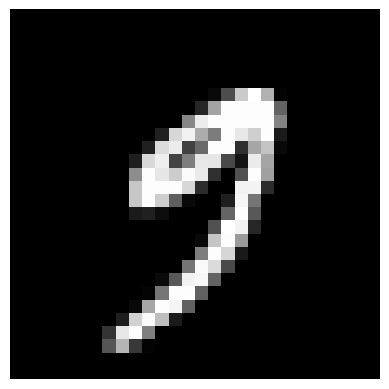

3 5


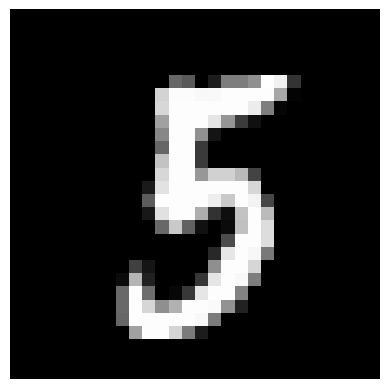

8 9


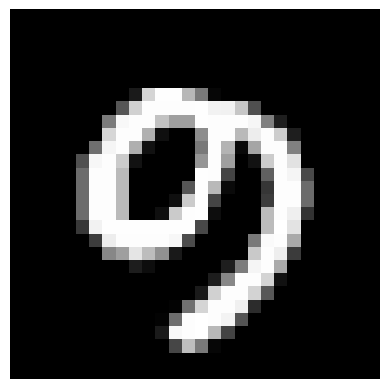

5 3


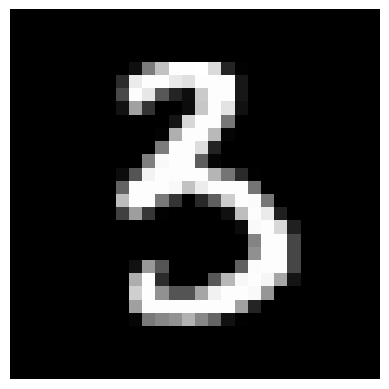

2 8


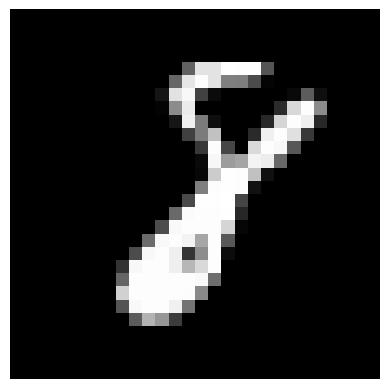

8 7


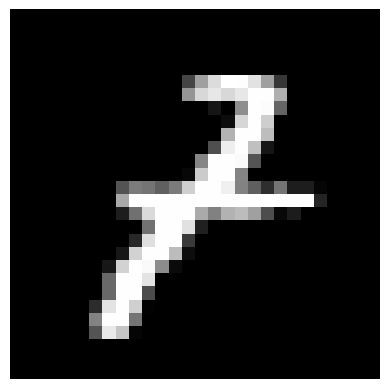

8 2


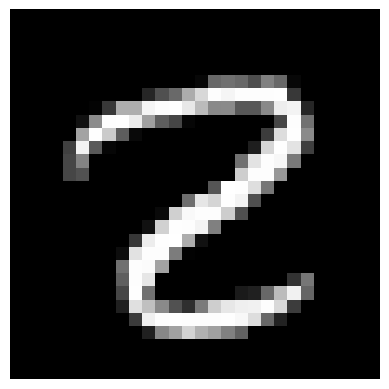

2 7


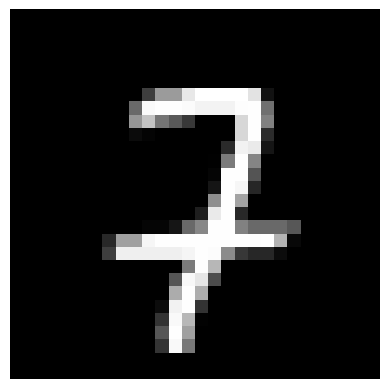

9 4


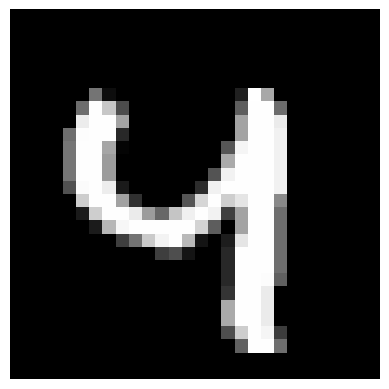

6 0


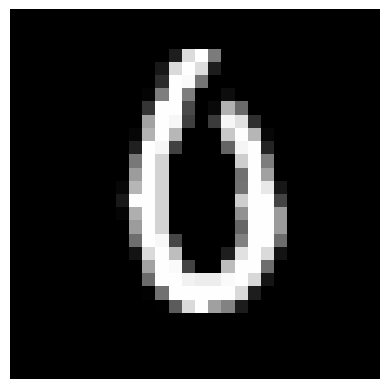

5 3


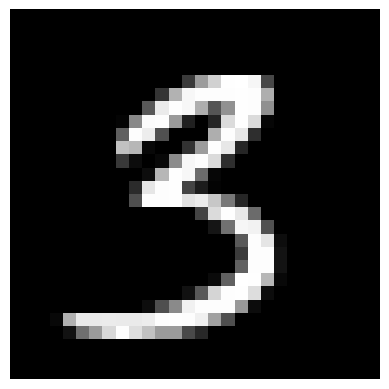

5 8


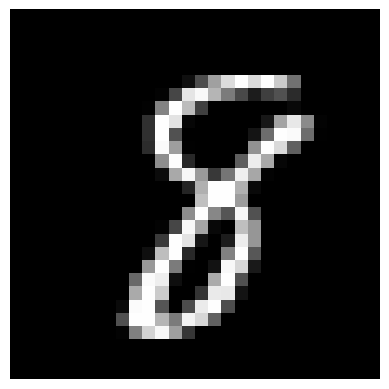

9 4


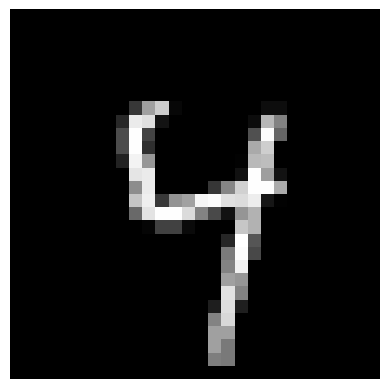

0 9


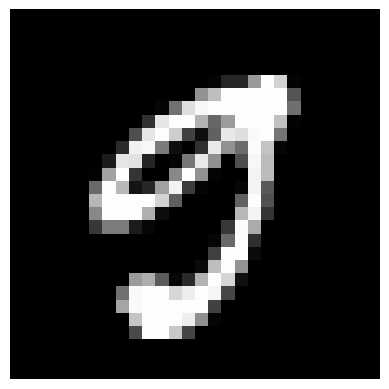

5 8


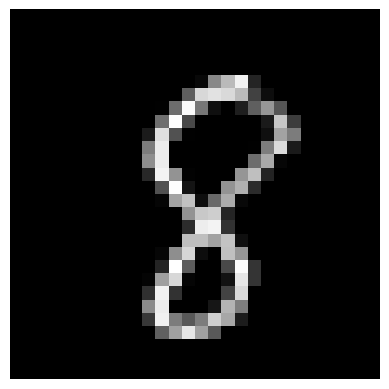

1 6


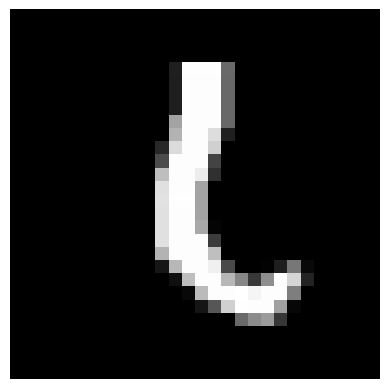

8 5


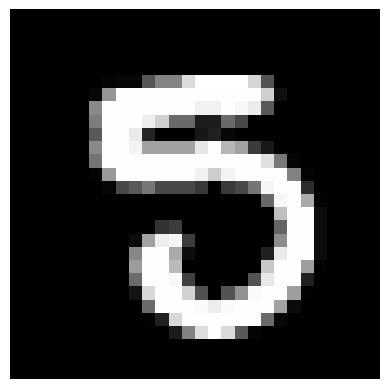

9 7


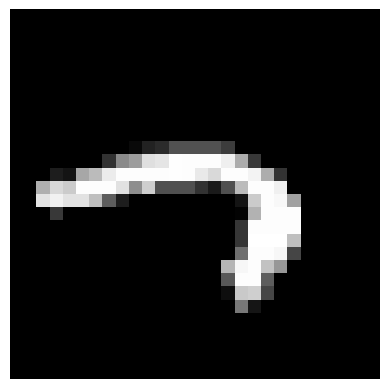

7 9


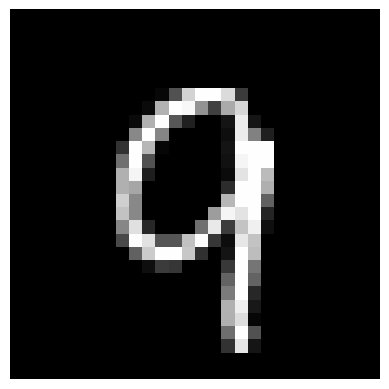

8 1


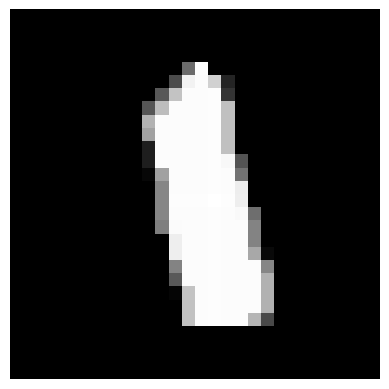

4 9


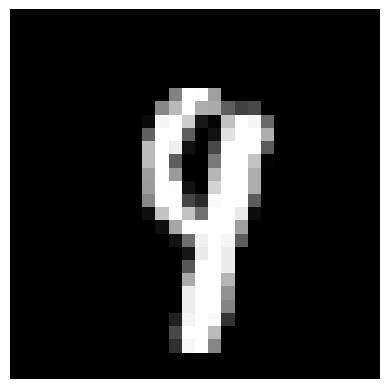

4 7


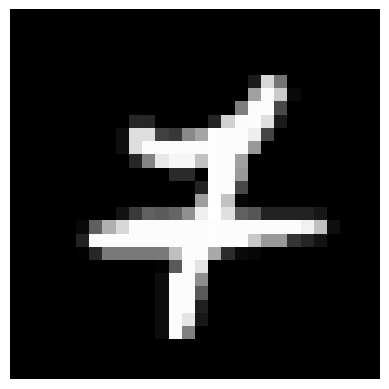

4 8


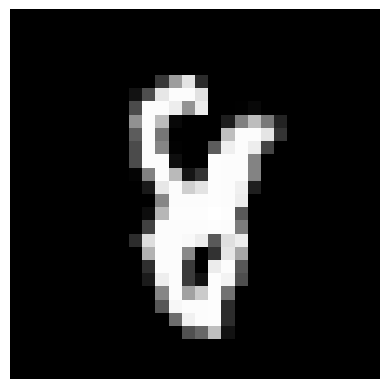

8 5


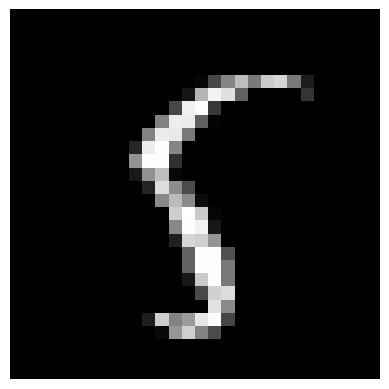

5 6


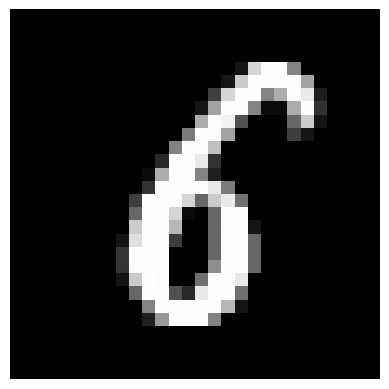

8 9


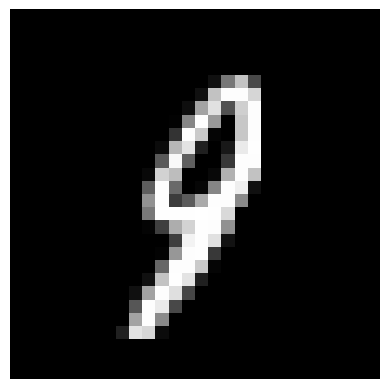

6 3


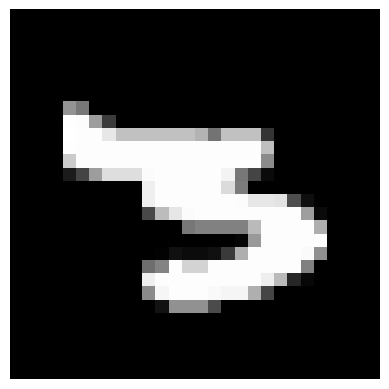

3 4


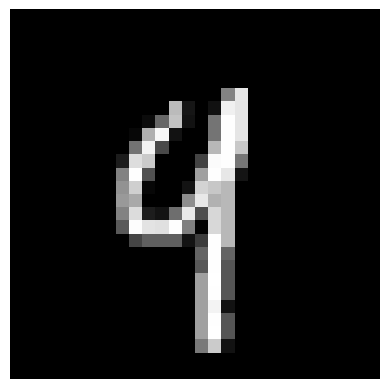

6 0


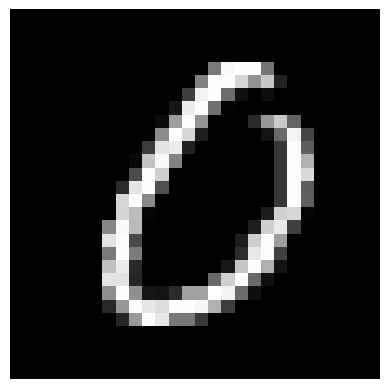

3 2


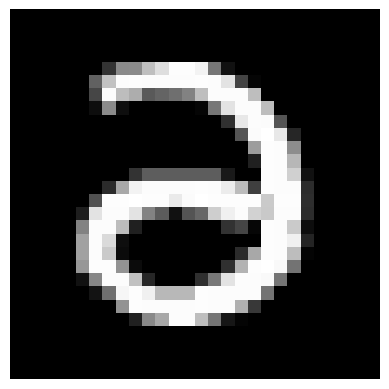

1 8


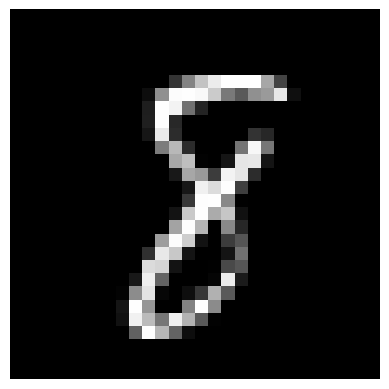

9 8


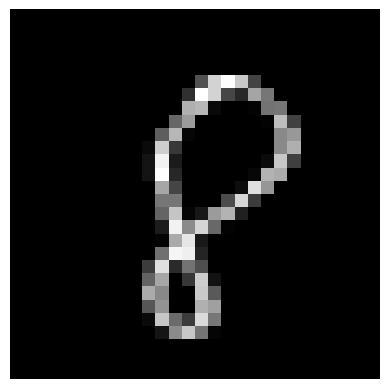

5 0


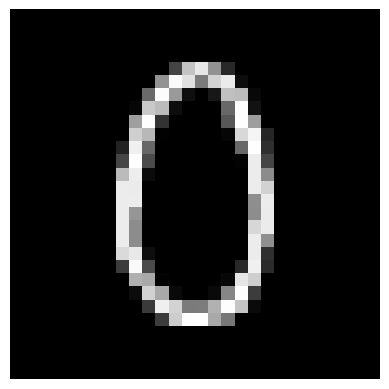

2 6


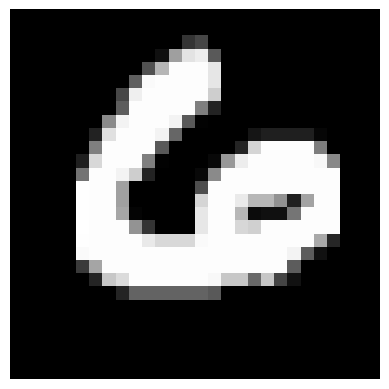

0 2


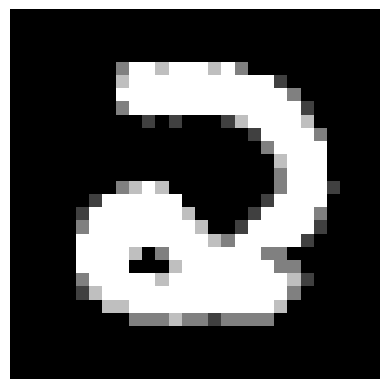

9 7


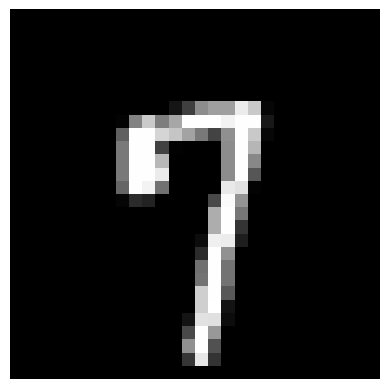

0 5


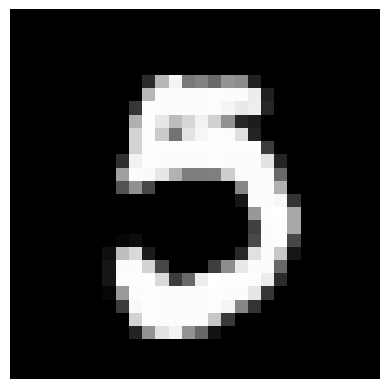

8 9


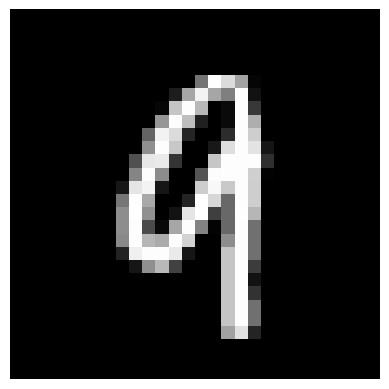

9 4


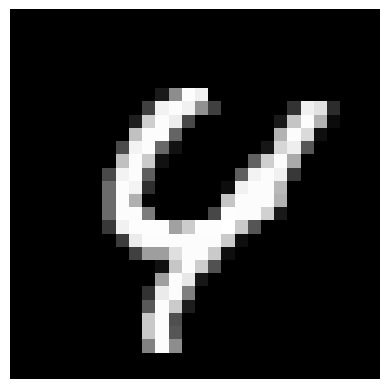

3 5


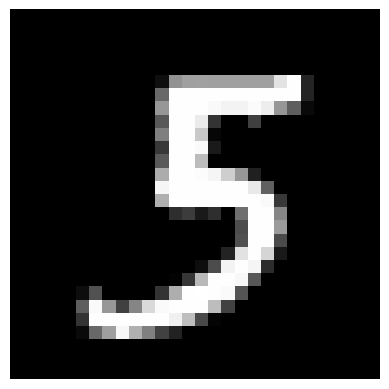

5 8


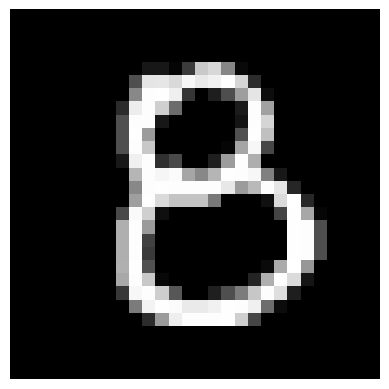

3 4


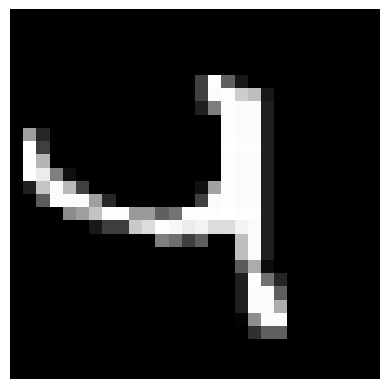

3 5


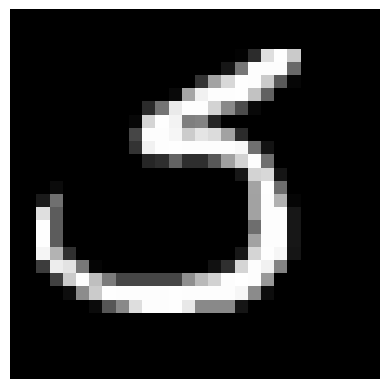

9 7


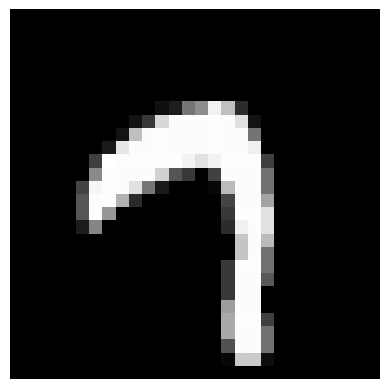

1 8


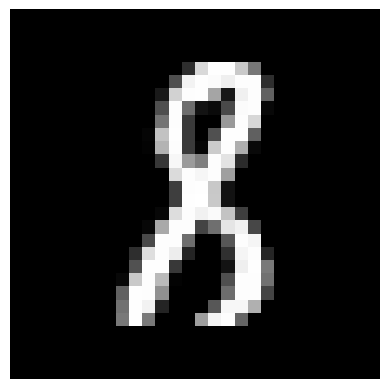

8 3


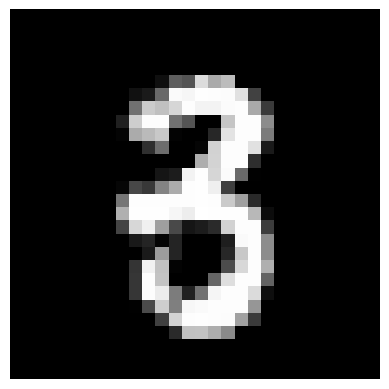

7 9


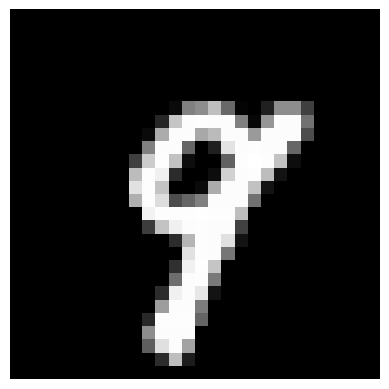

1 2


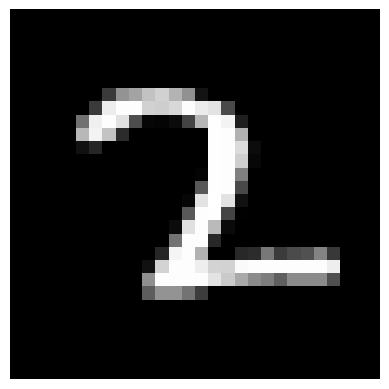

8 9


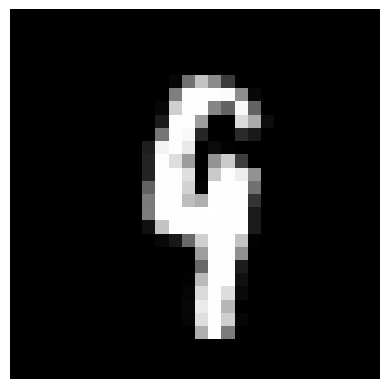

4 6


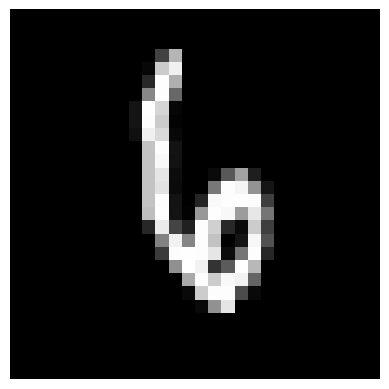

9 4


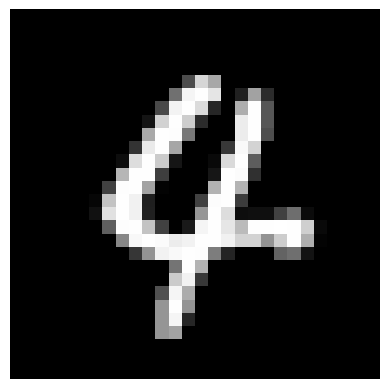

0 8


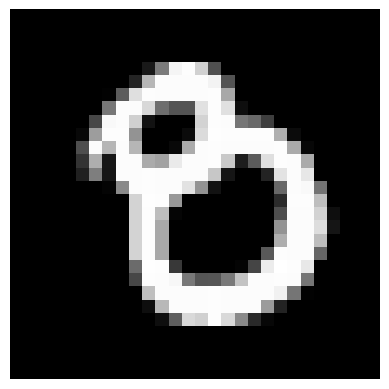

6 4


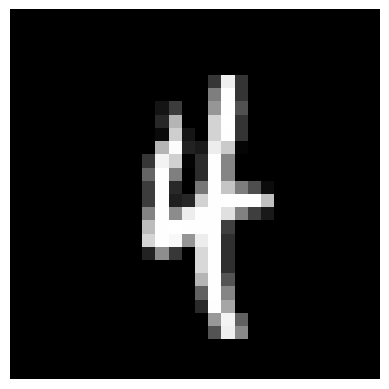

5 3


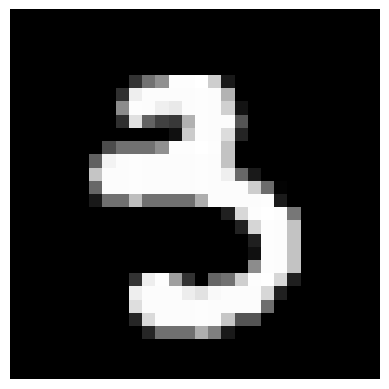

9 4


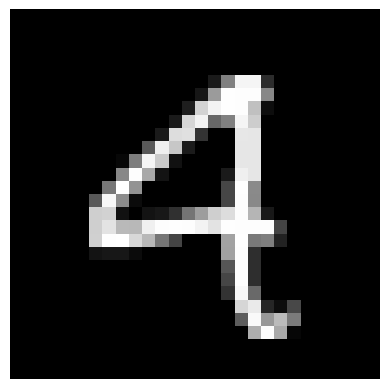

3 6


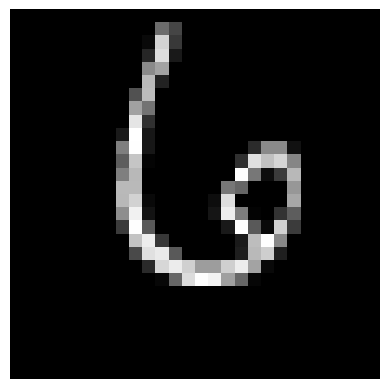

0 3


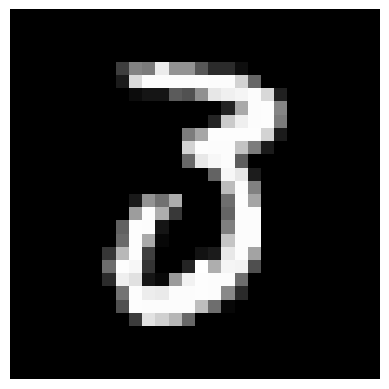

0 5


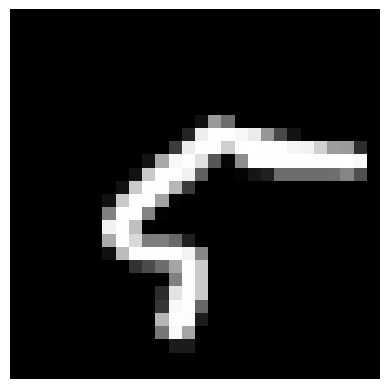

2 3


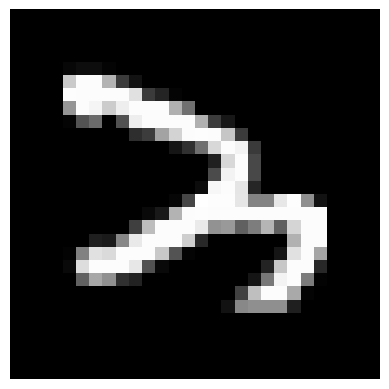

7 3


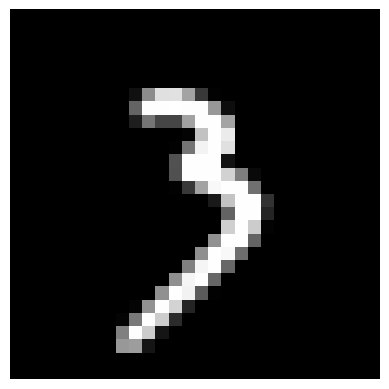

5 3


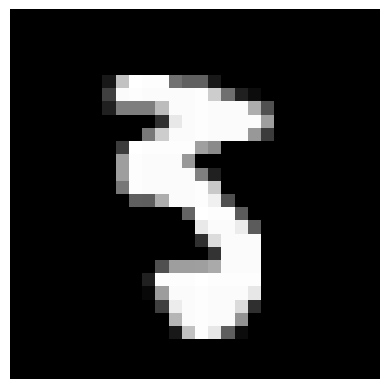

5 0


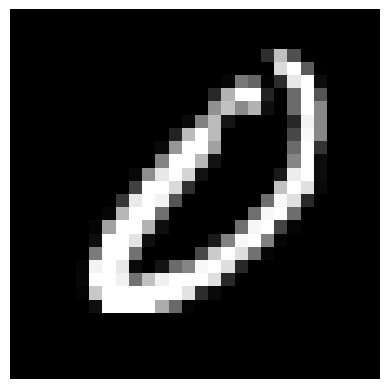

8 9


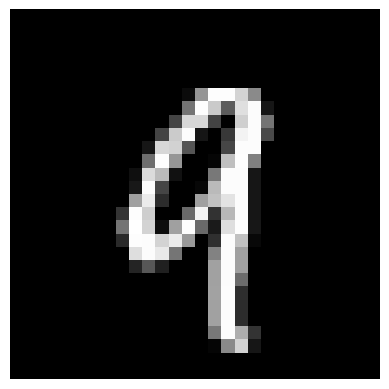

9 5


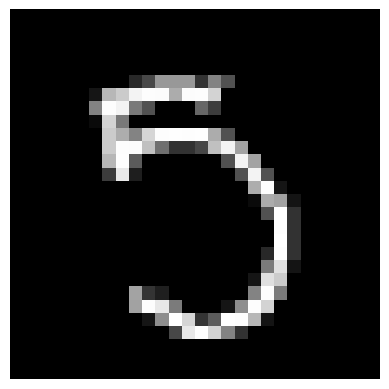

7 8


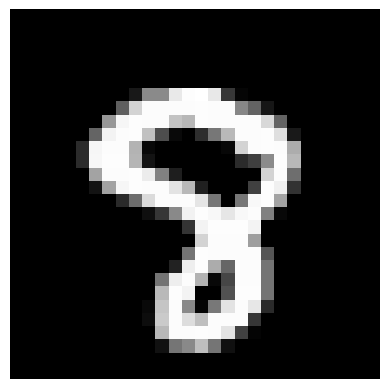

9 7


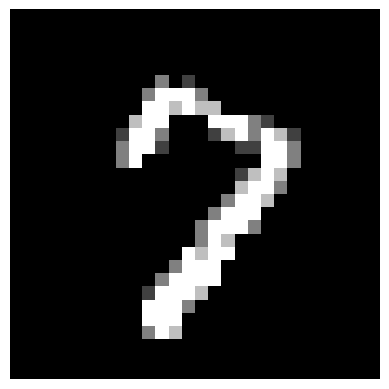

5 6


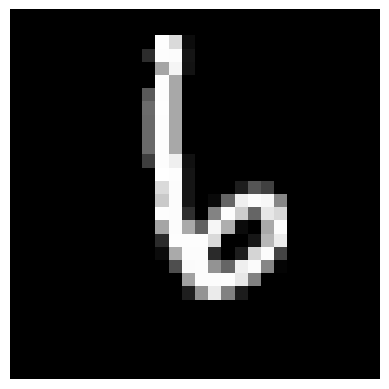

5 6


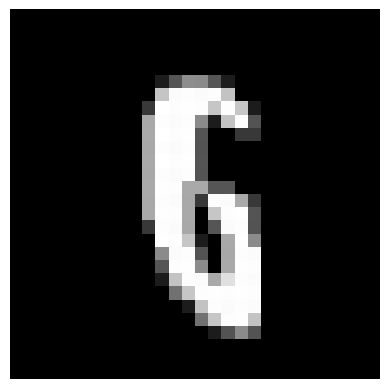

5 9


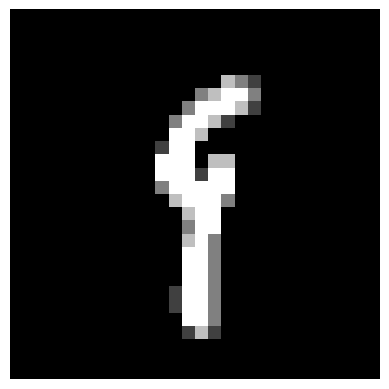

4 6


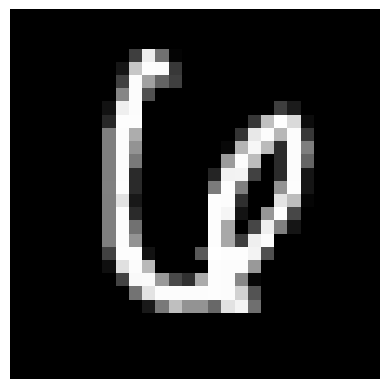

9 7


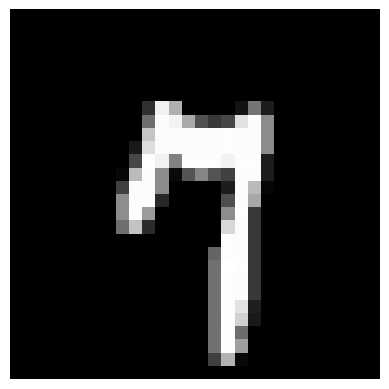

7 9


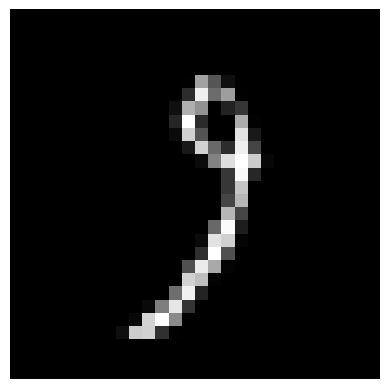

3 8


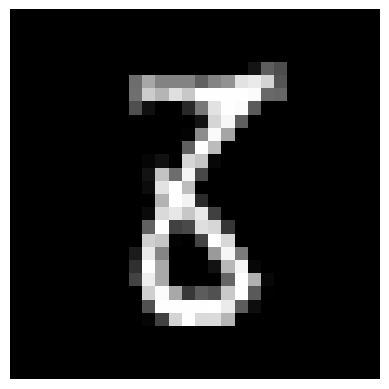

2 4


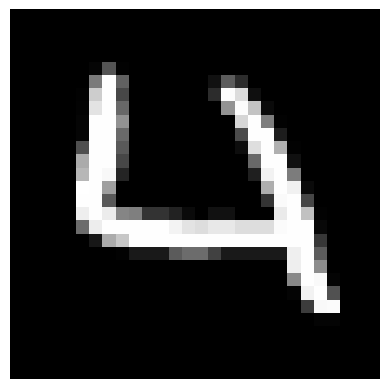

3 1


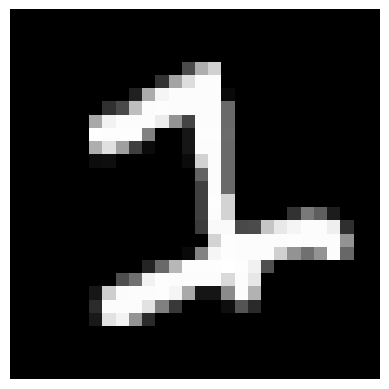

5 0


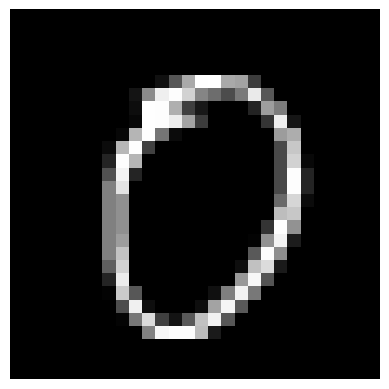

1 3


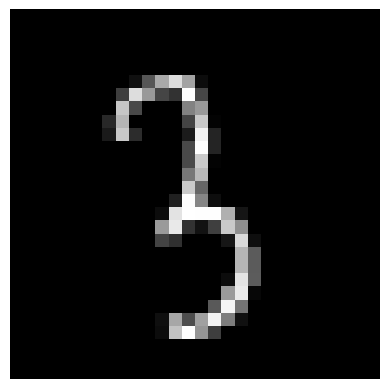

1 2


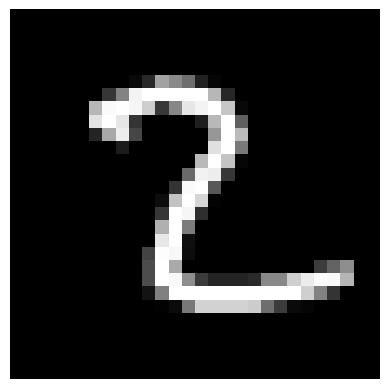

8 5


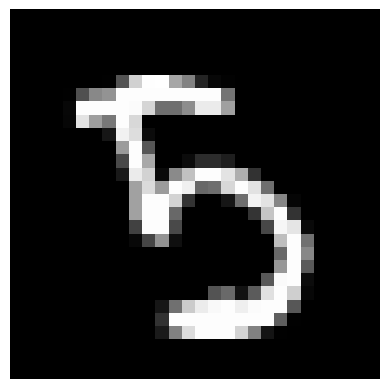

3 5


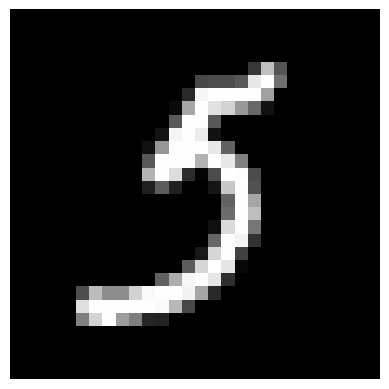

6 2


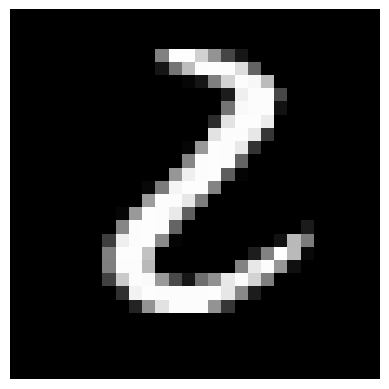

5 3


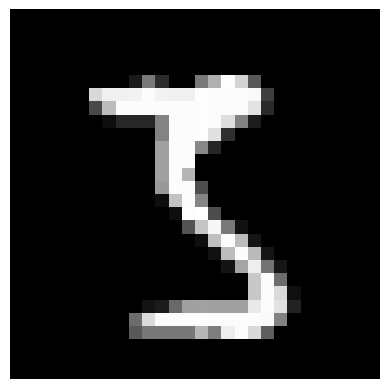

9 7


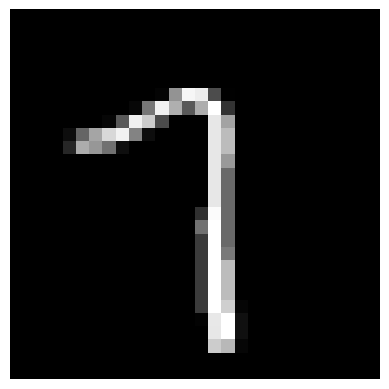

5 3


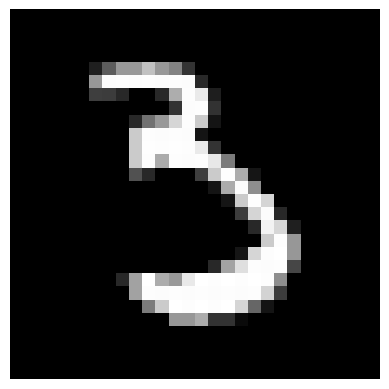

2 4


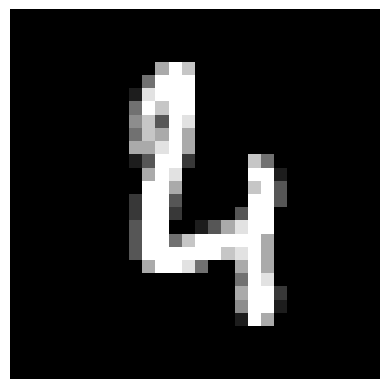

3 5


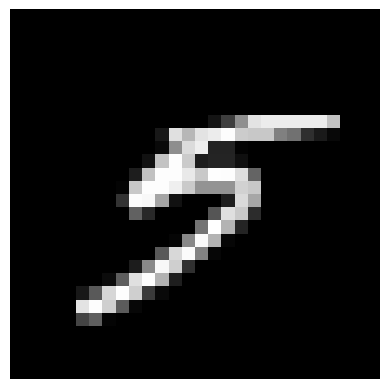

9 5


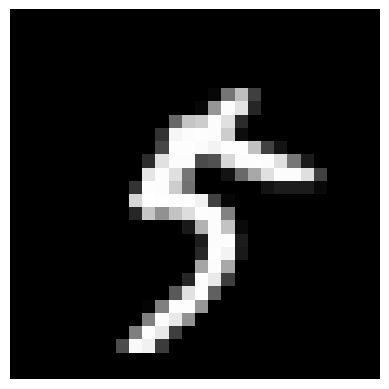

4 7


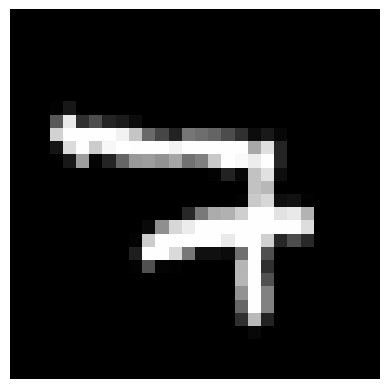

9 4


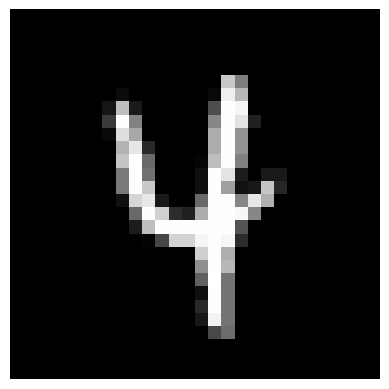

2 1


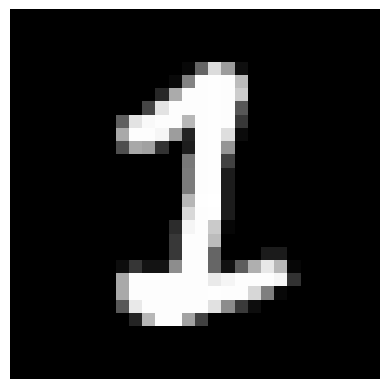

9 4


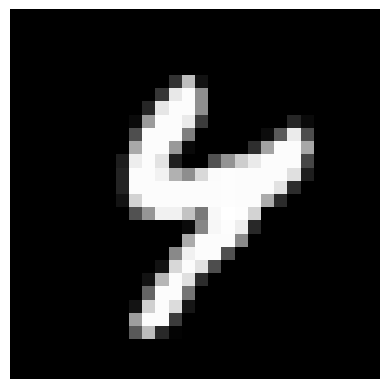

2 7


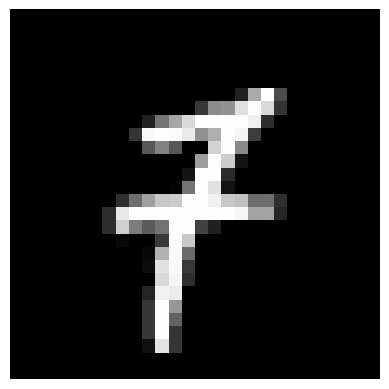

0 3


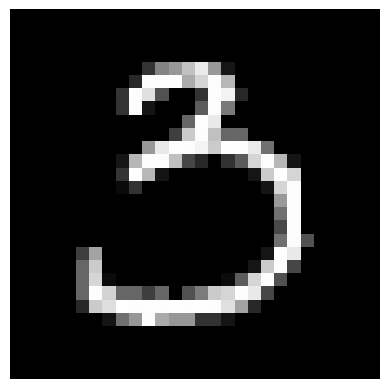

7 5


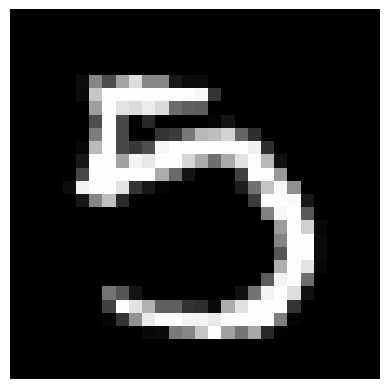

2 8


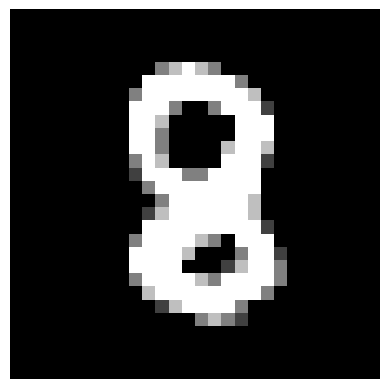

9 7


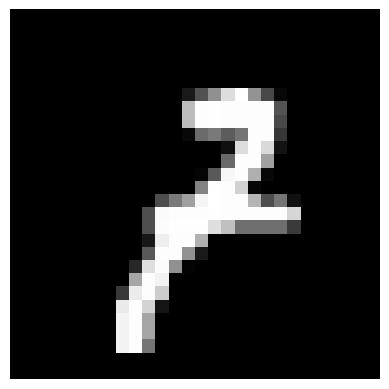

1 3


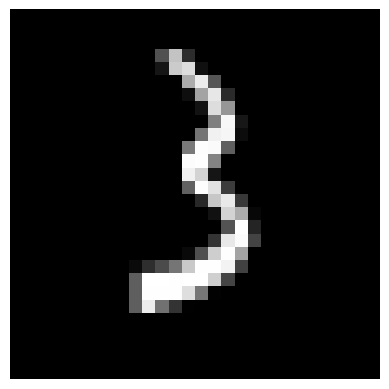

9 4


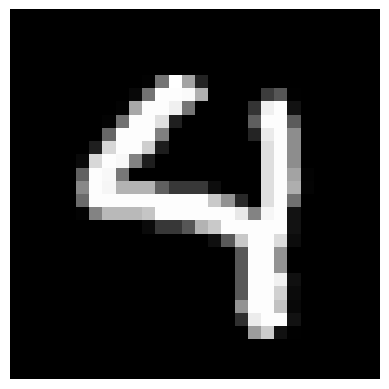

2 8


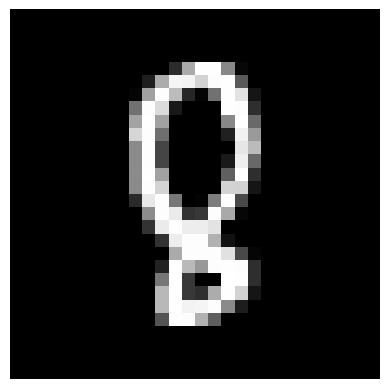

4 7


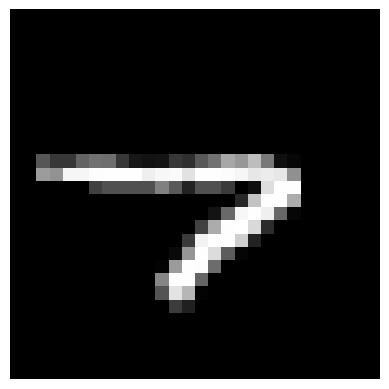

3 7


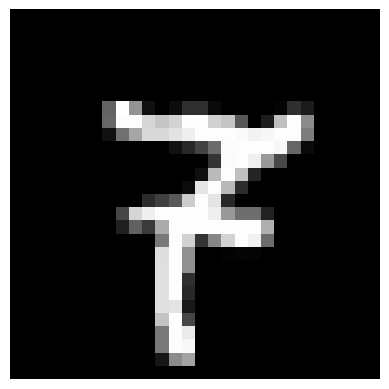

5 8


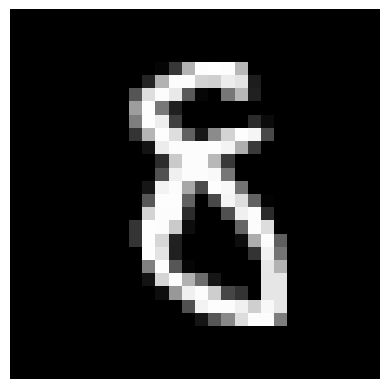

3 8


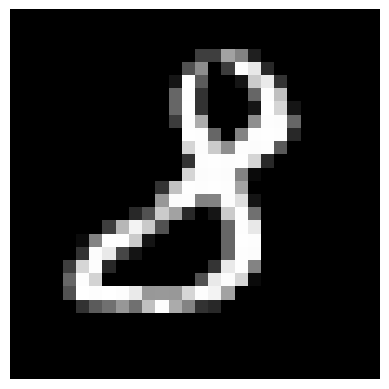

5 8


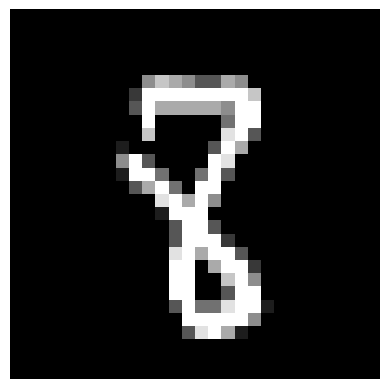

3 9


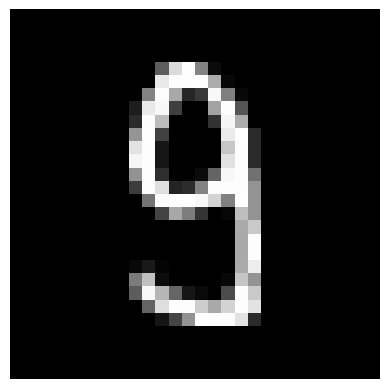

5 3


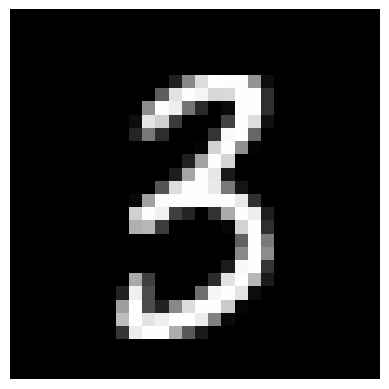

5 6


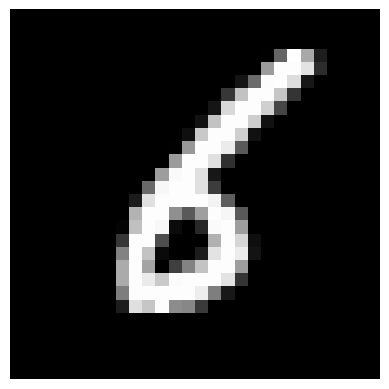

0 6


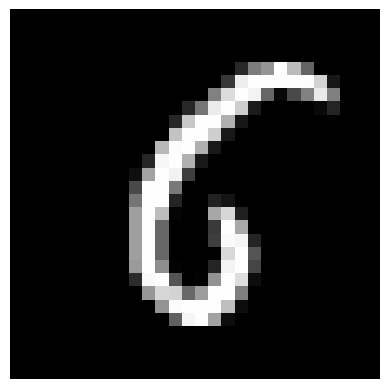

1 7


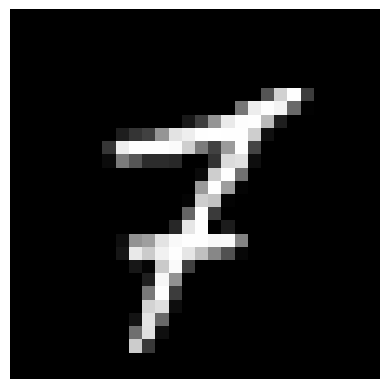

5 6


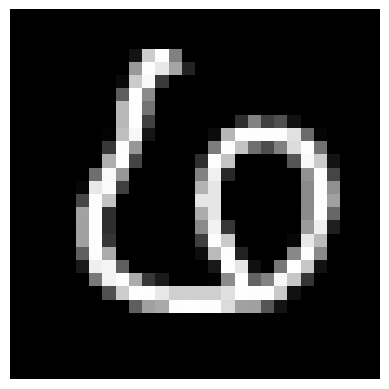

8 2


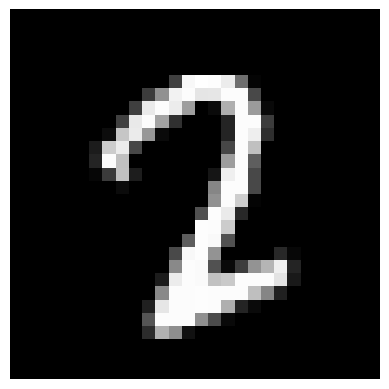

7 8


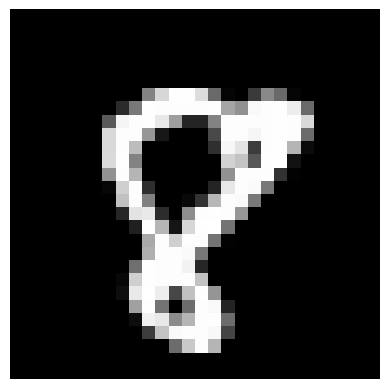

1 3


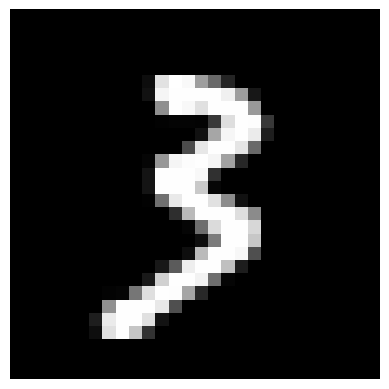

9 4


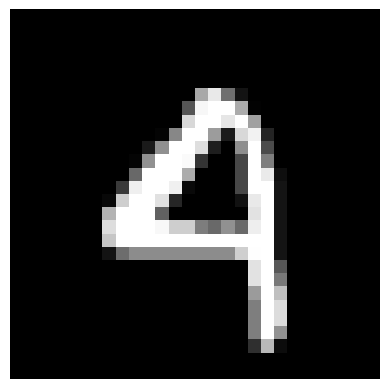

9 8


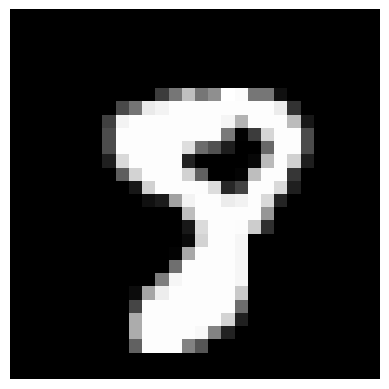

6 0


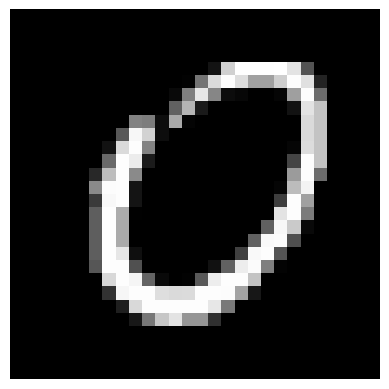

4 6


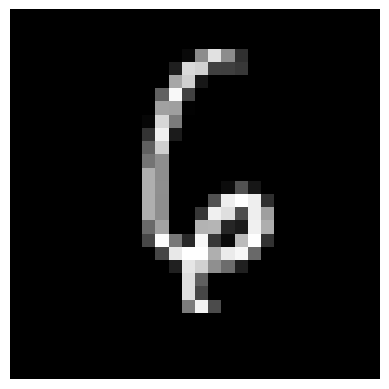

5 0


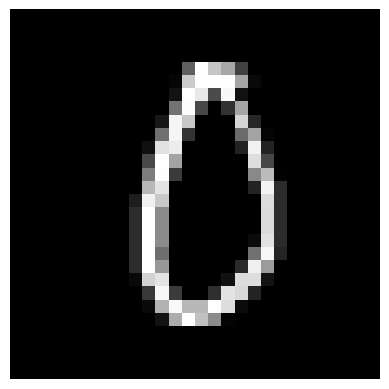

4 7


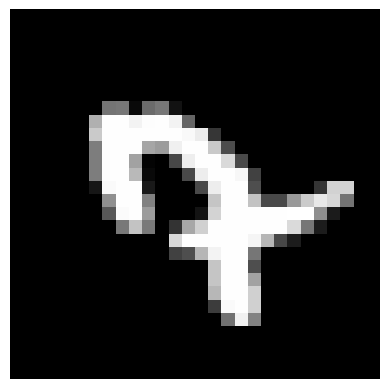

9 8


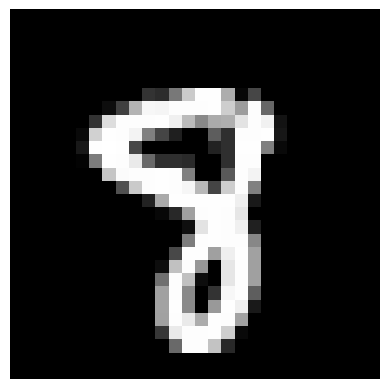

2 7


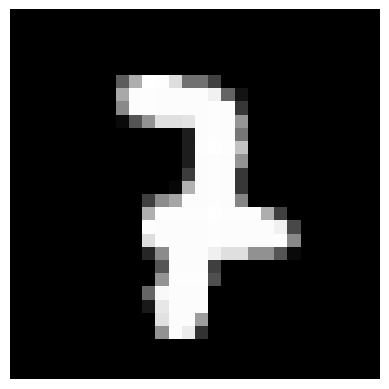

5 2


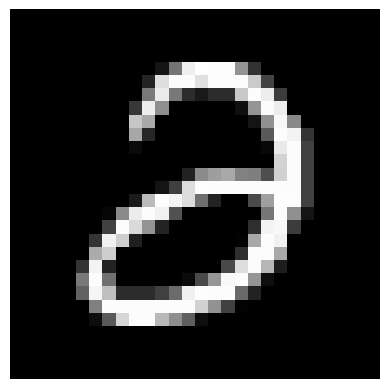

9 7


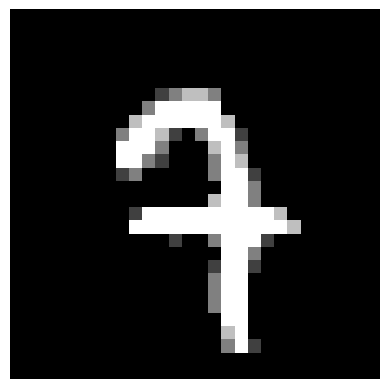

7 5


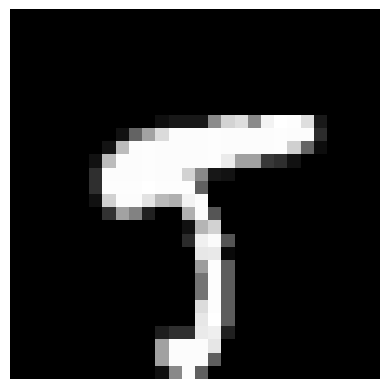

2 0


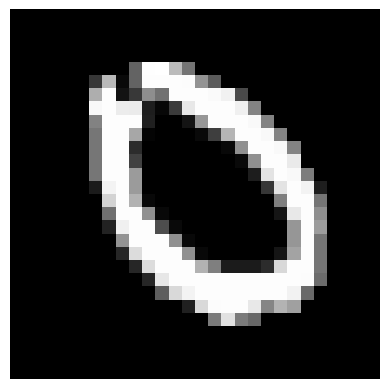

7 9


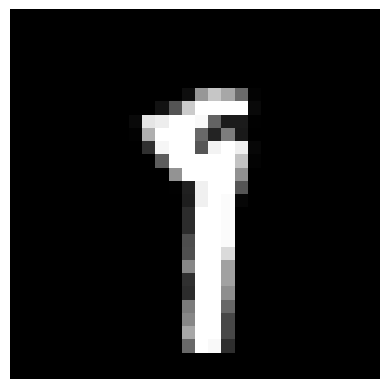

6 4


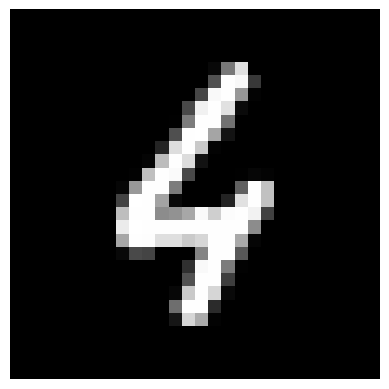

1 3


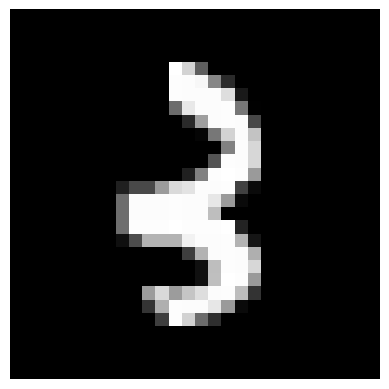

0 2


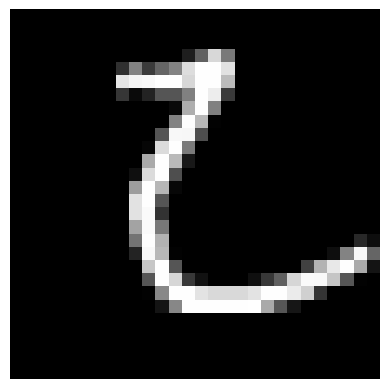

7 9


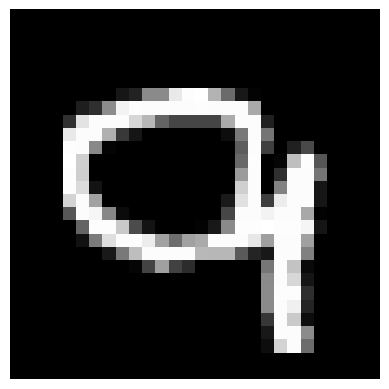

4 9


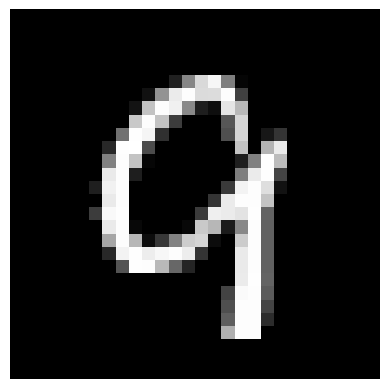

7 9


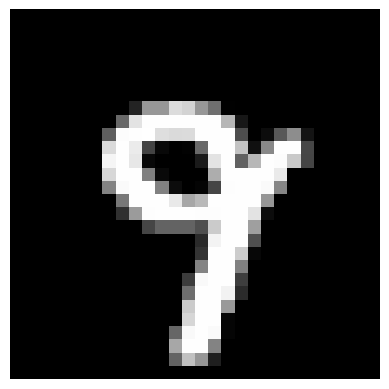

0 5


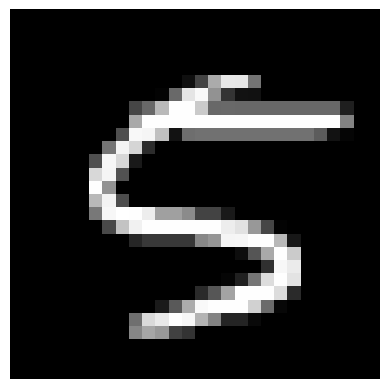

0 6


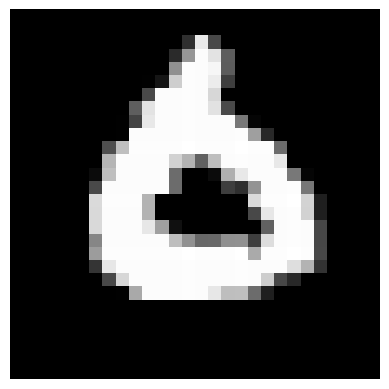

1 2


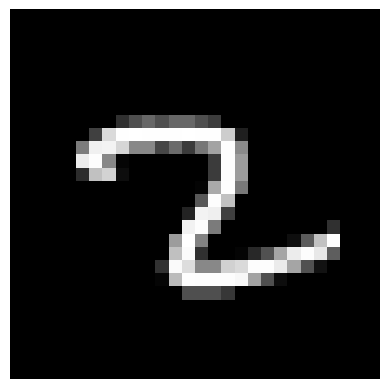

9 4


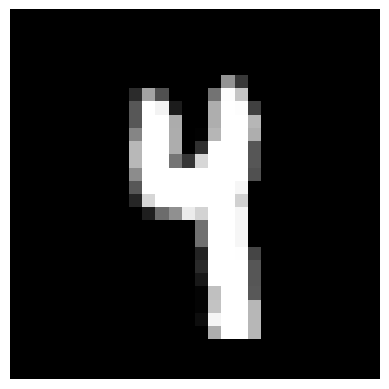

5 3


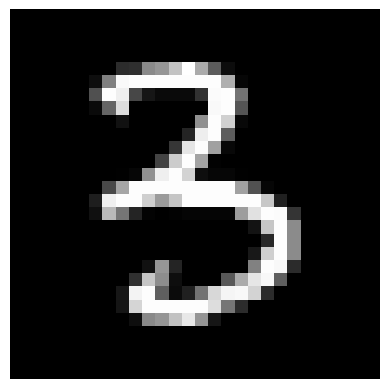

7 6


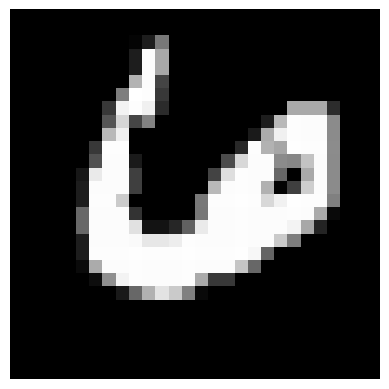

2 5


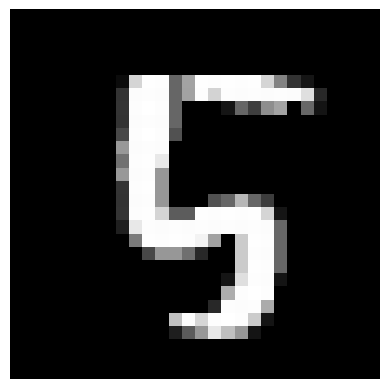

9 3


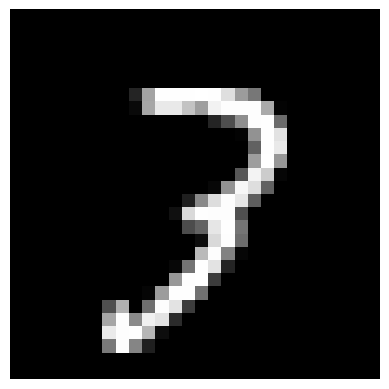

1 3


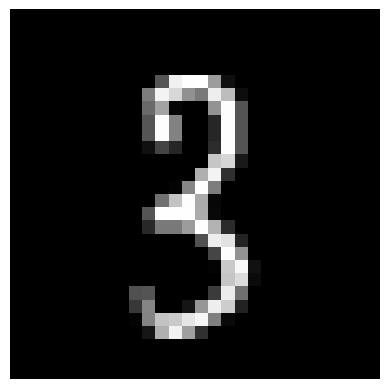

5 0


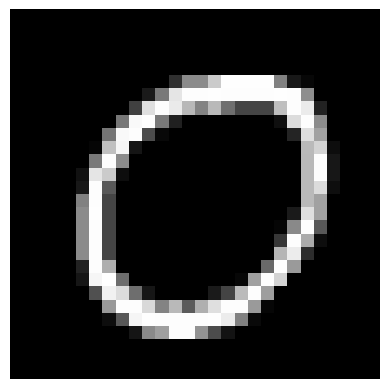

1 4


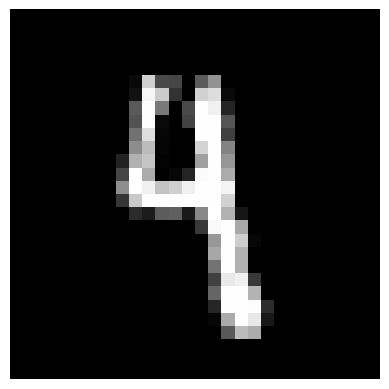

1 9


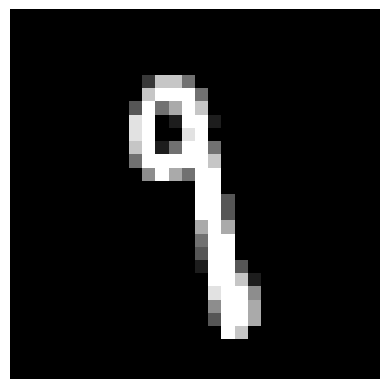

6 5


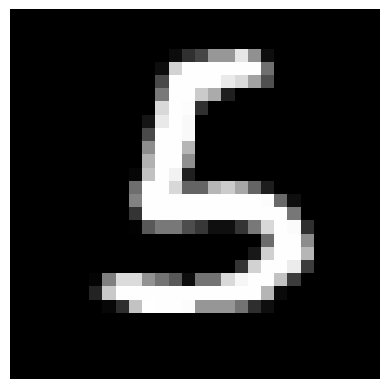

3 2


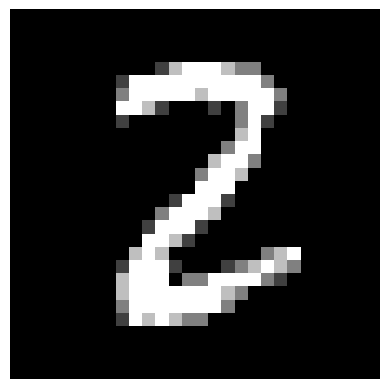

3 8


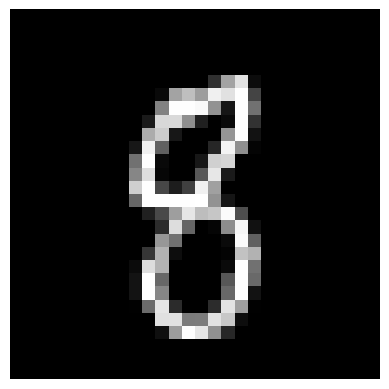

4 6


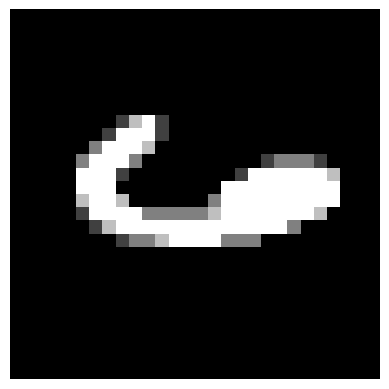

2 7


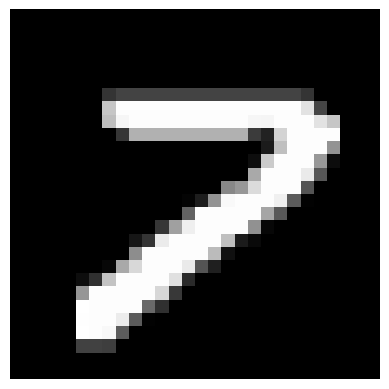

4 9


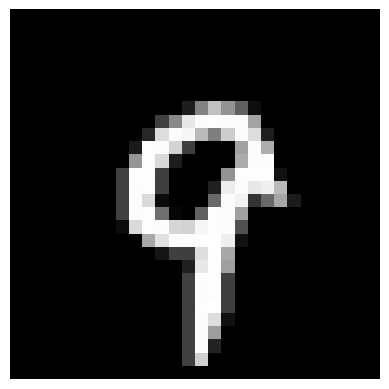

7 4


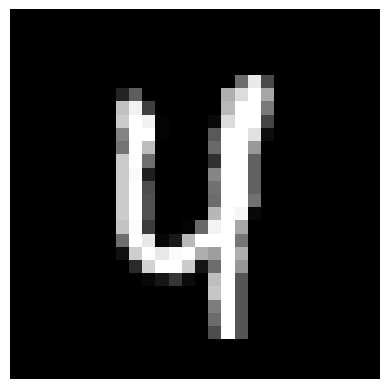

9 4


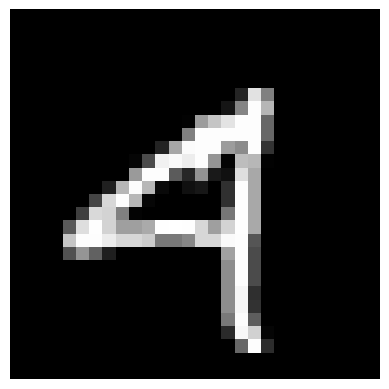

2 3


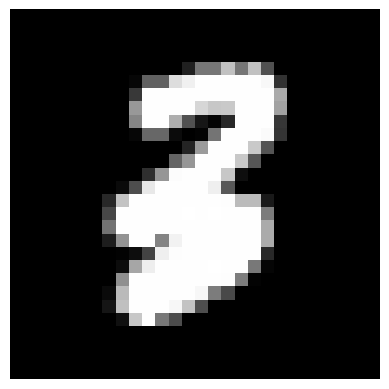

0 5


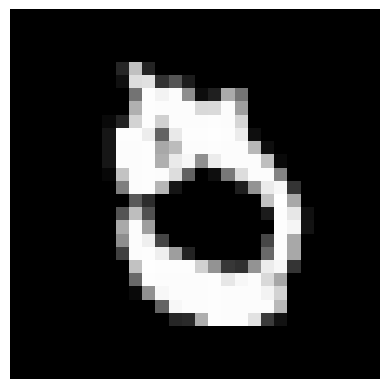

5 8


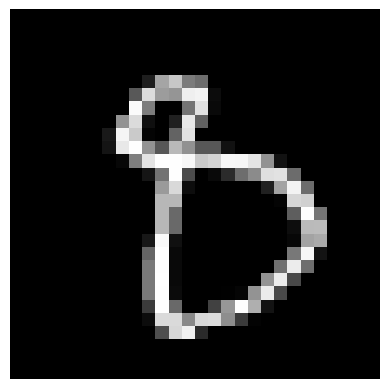

8 5


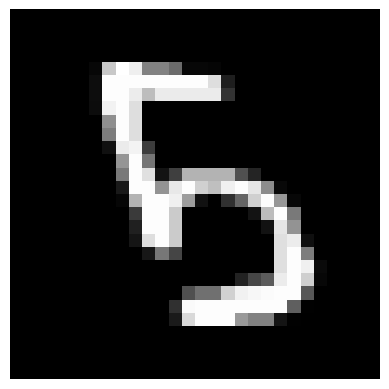

2 7


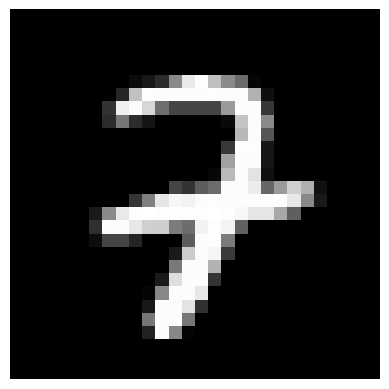

7 0


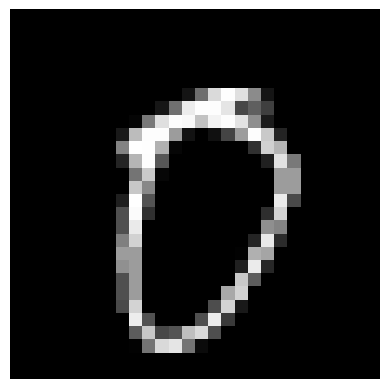

8 7


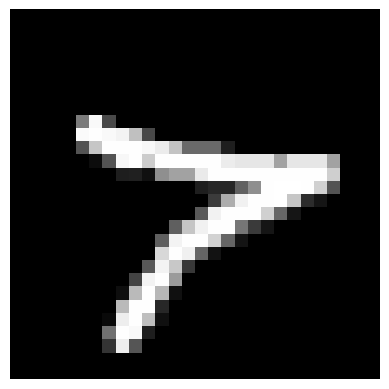

1 7


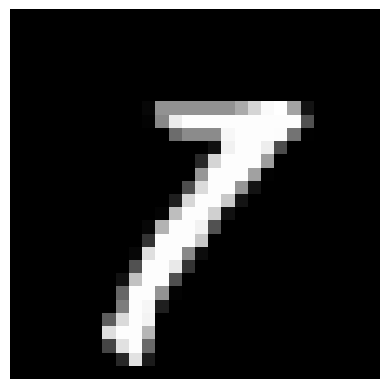

7 8


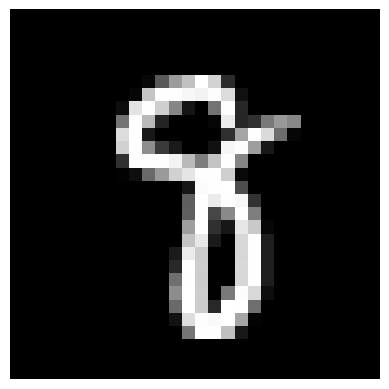

3 9


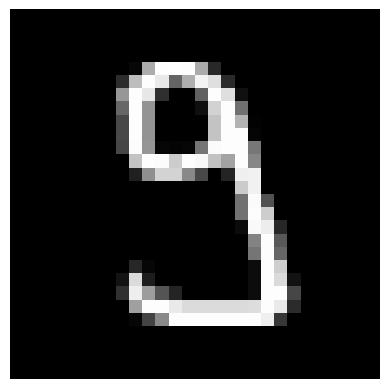

0 7


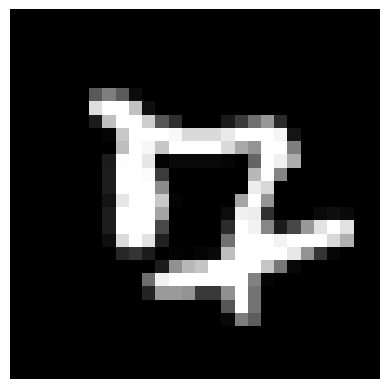

9 4


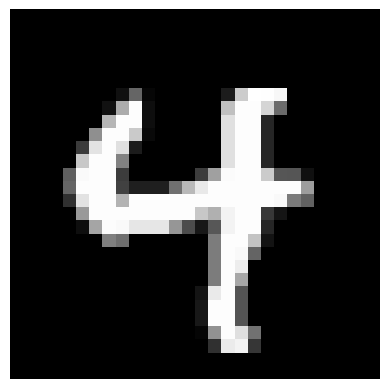

2 8


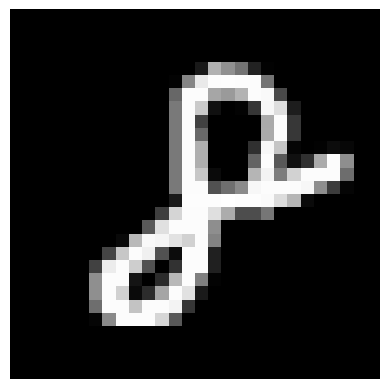

5 8


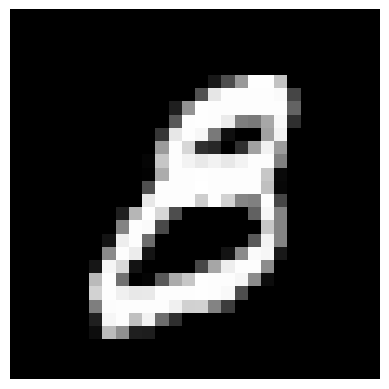

5 0


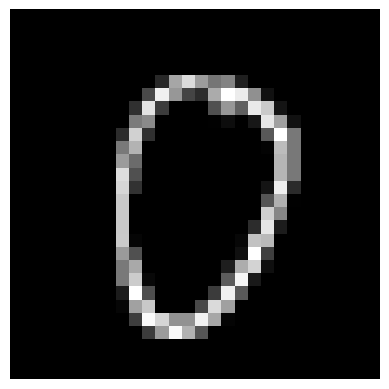

1 8


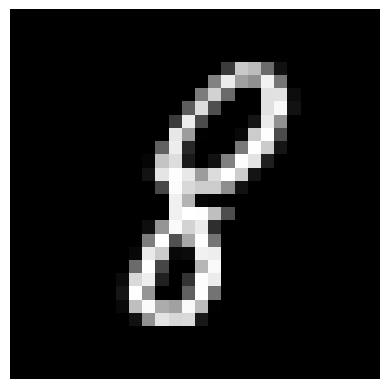

7 5


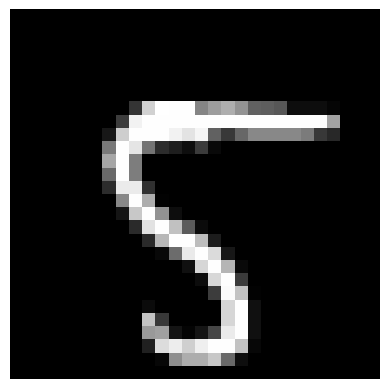

5 8


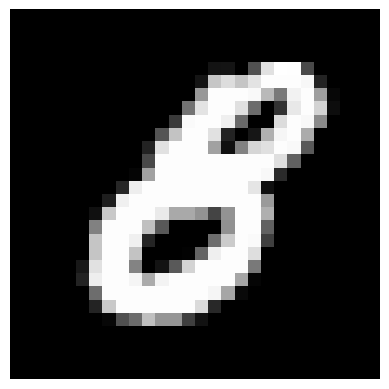

4 9


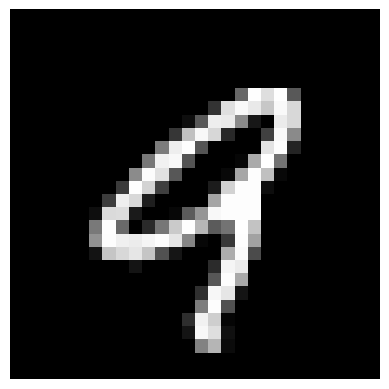

0 6


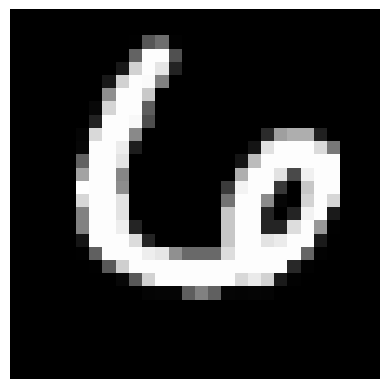

6 4


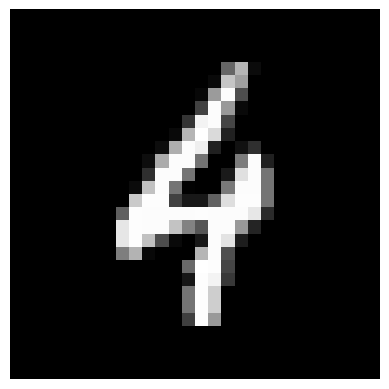

5 8


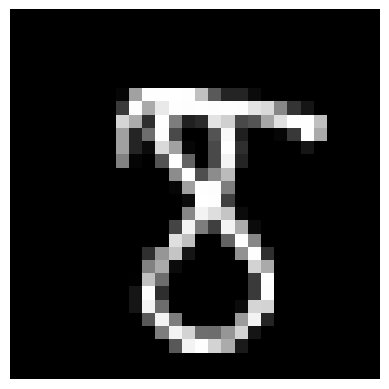

5 2


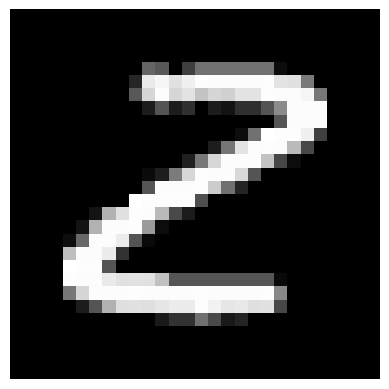

4 6


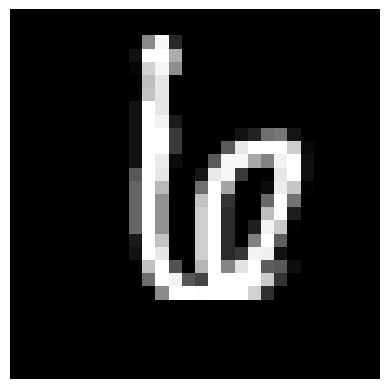

1 6


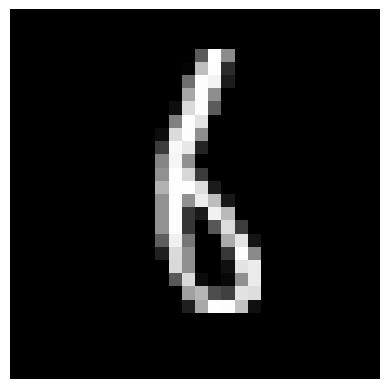

3 5


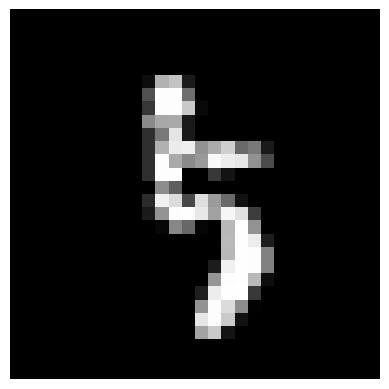

9 8


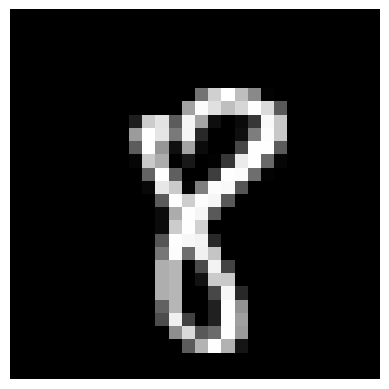

2 7


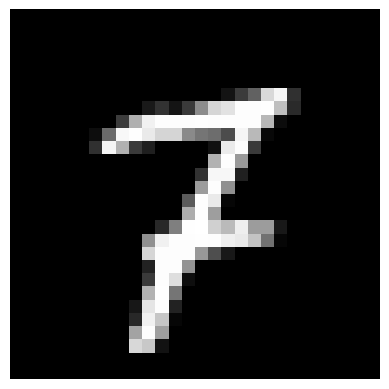

3 9


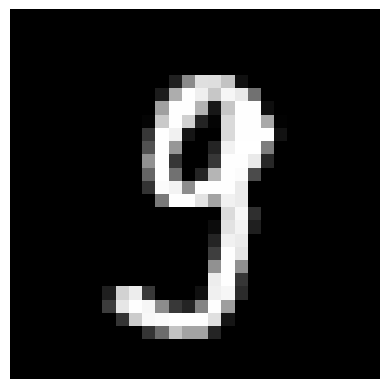

9 4


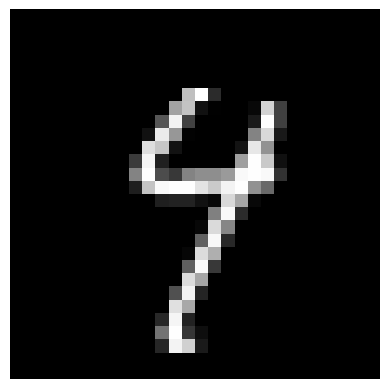

9 4


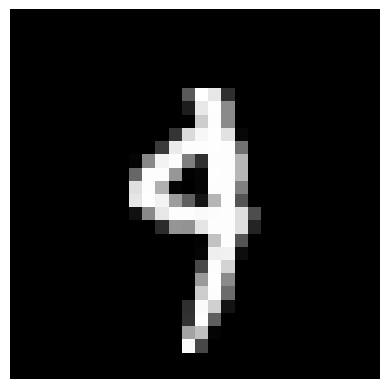

9 7


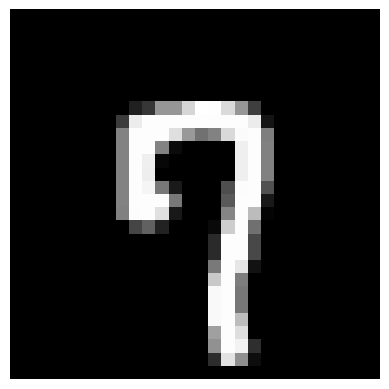

1 8


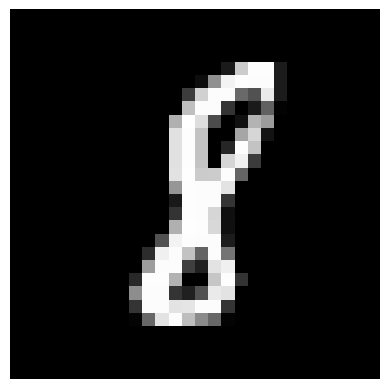

5 6


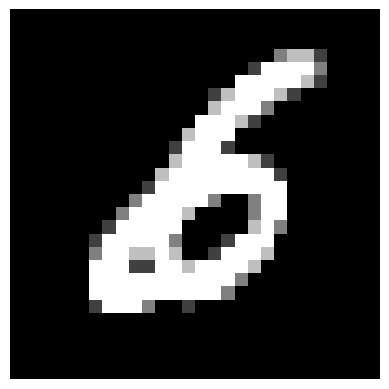

0 6


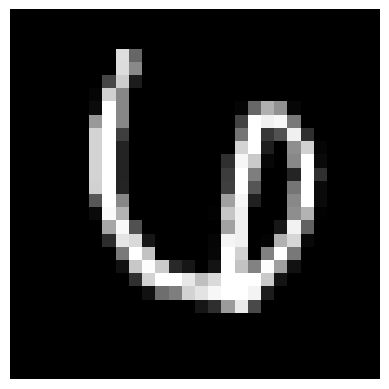

4 5


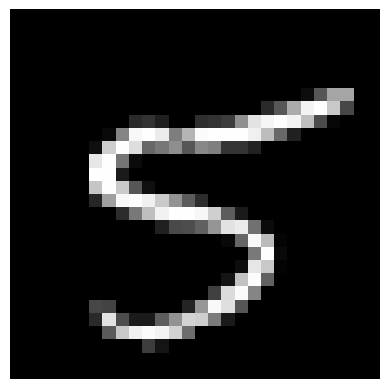

5 7


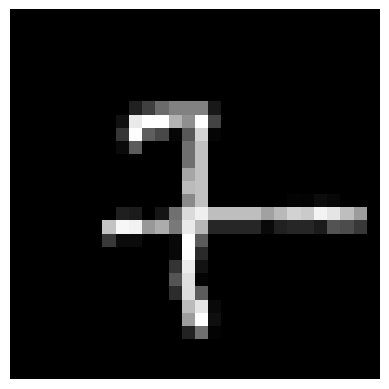

0 4


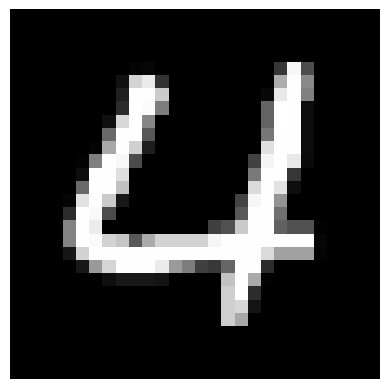

8 9


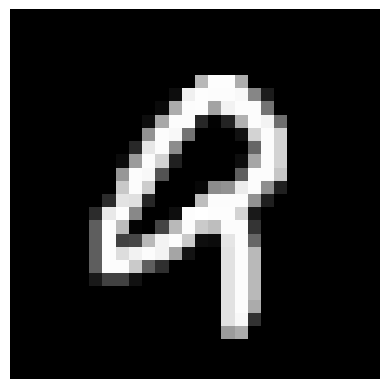

1 8


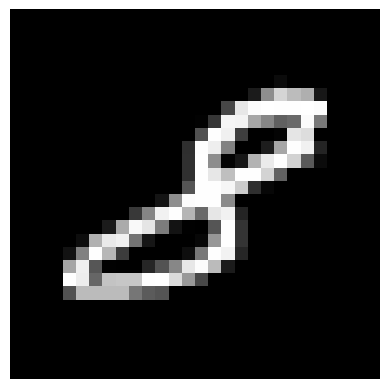

9 4


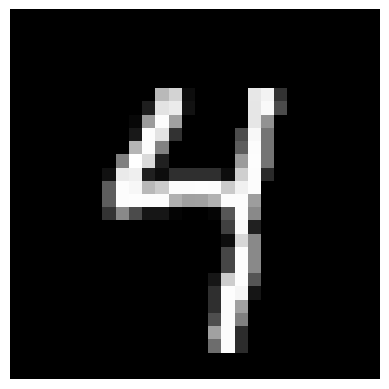

4 5


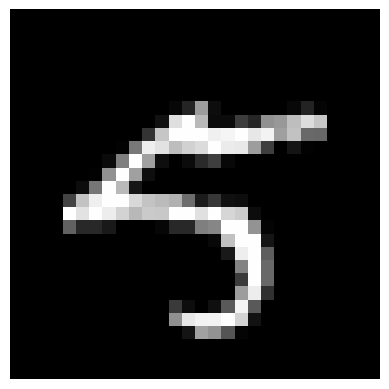

2 7


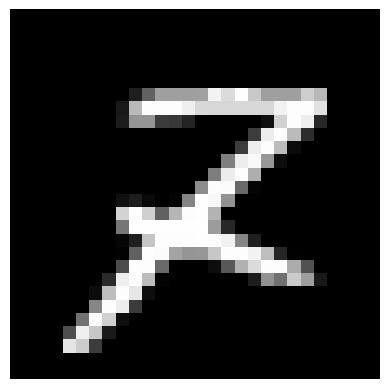

7 3


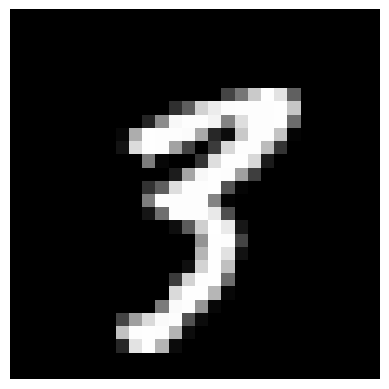

9 8


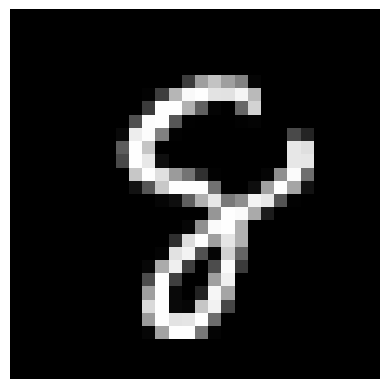

3 2


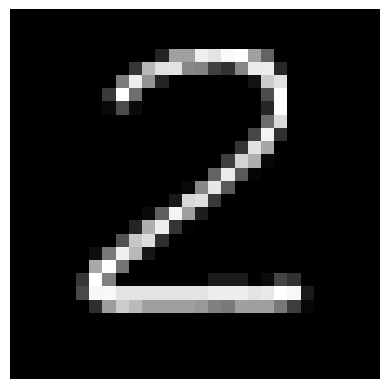

8 5


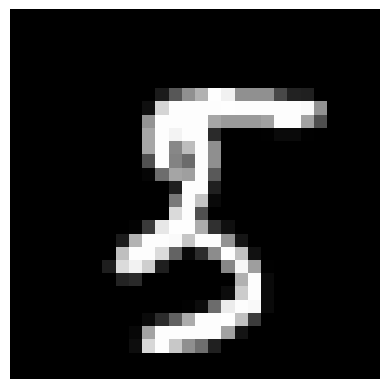

6 5


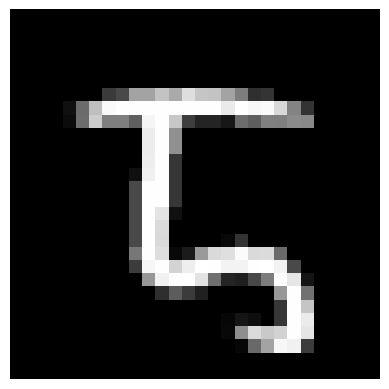

6 4


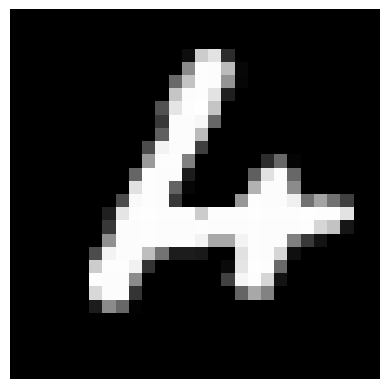

8 2


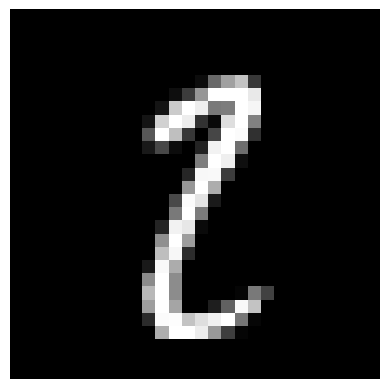

3 7


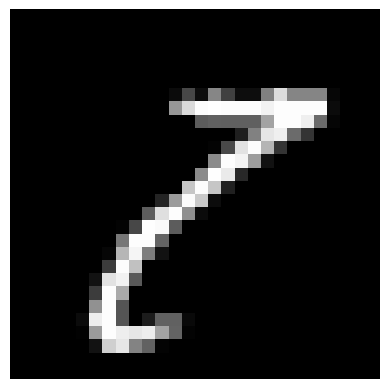

5 2


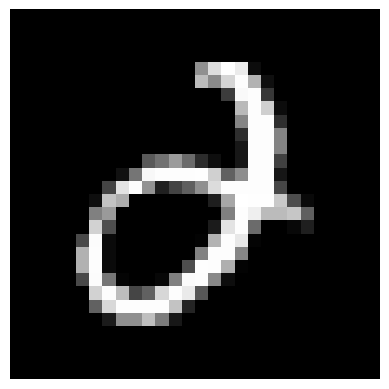

8 2


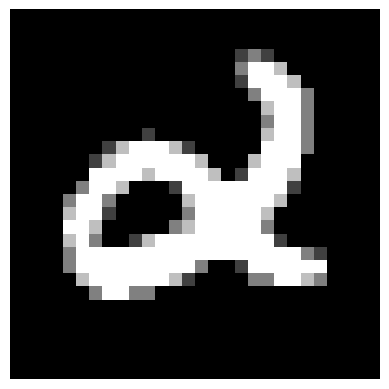

0 9


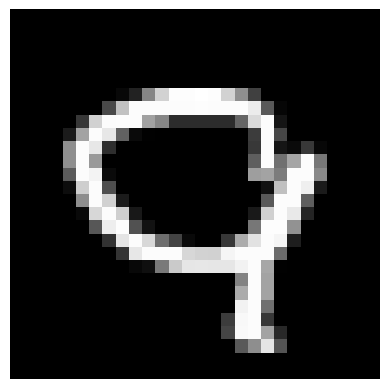

4 9


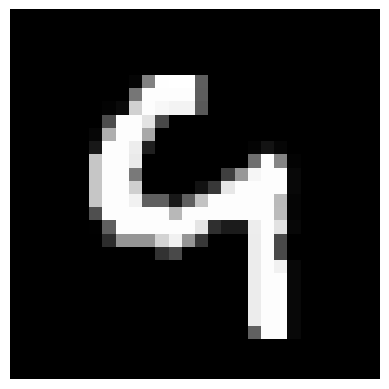

9 7


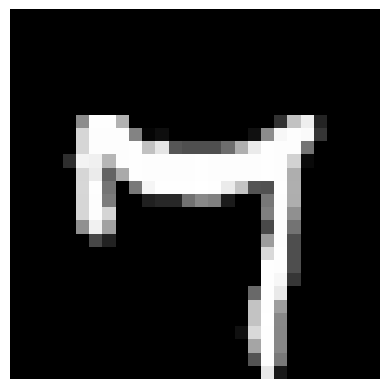

8 7


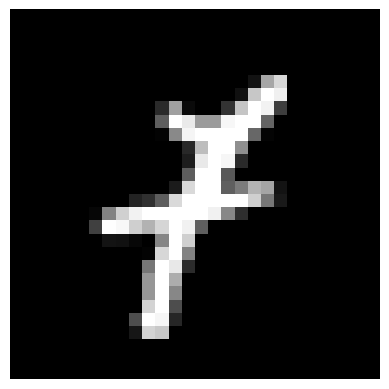

3 6


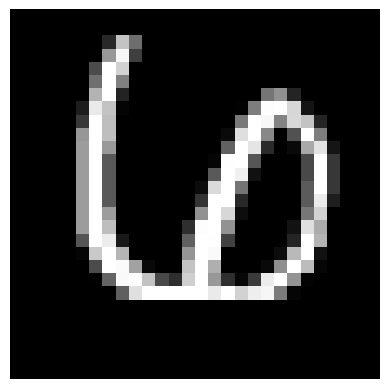

2 7


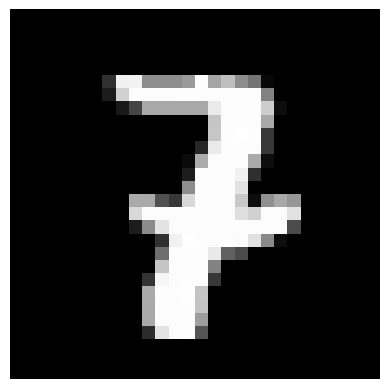

7 9


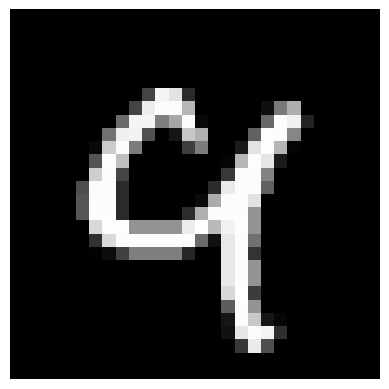

5 6


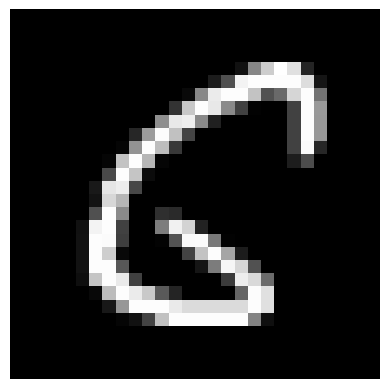

0 5


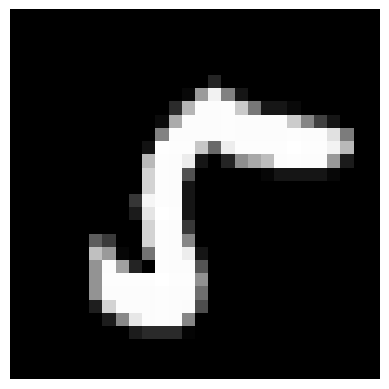

3 2


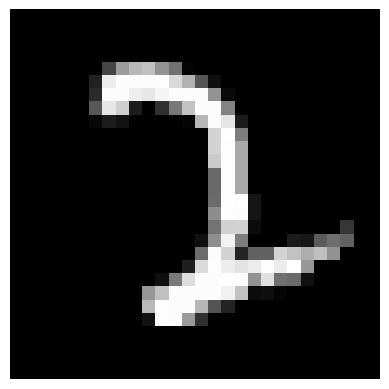

5 0


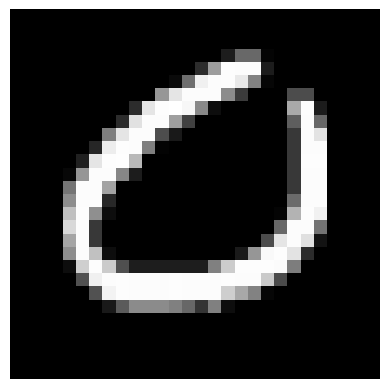

4 9


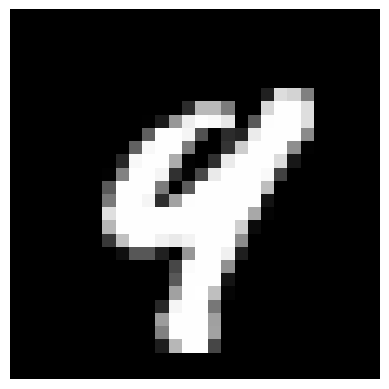

3 8


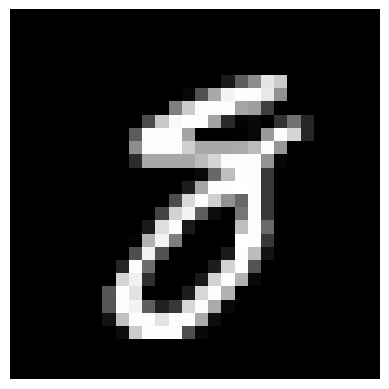

4 9


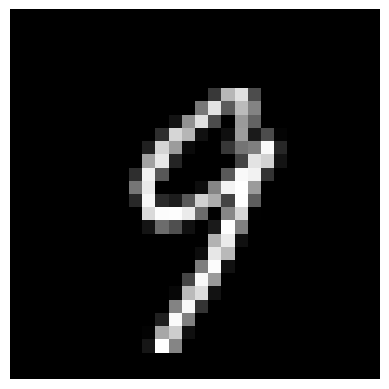

5 2


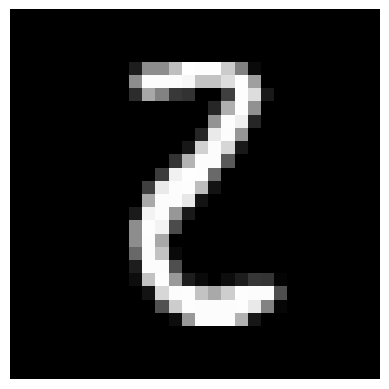

6 5


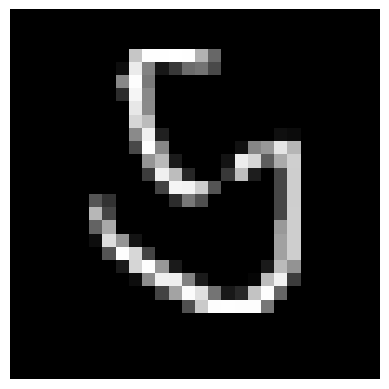

3 5


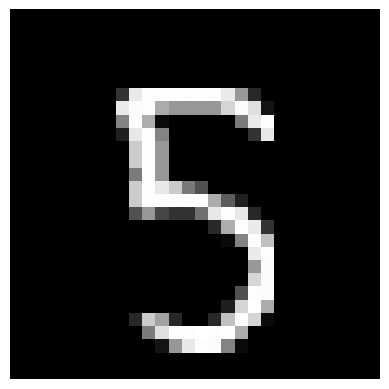

8 6


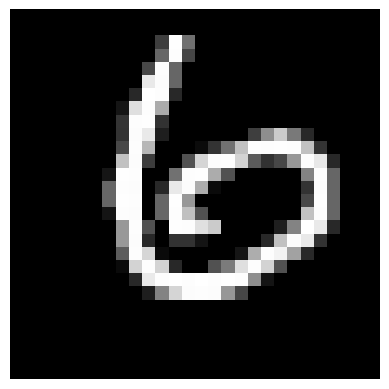

3 5


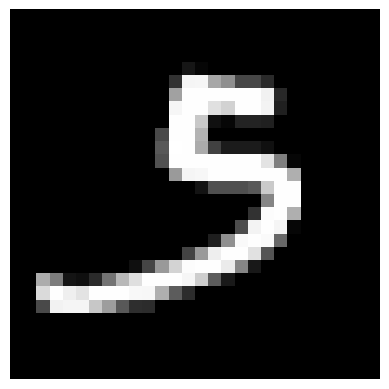

3 1


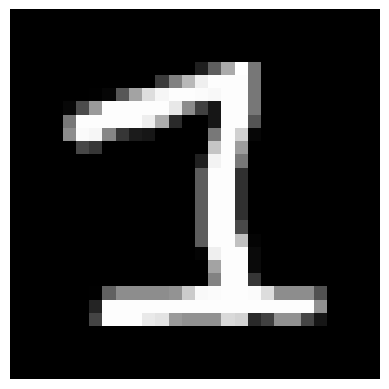

0 5


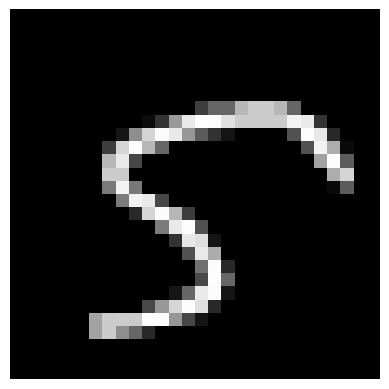

5 9


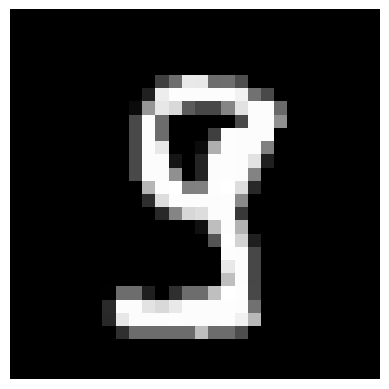

8 5


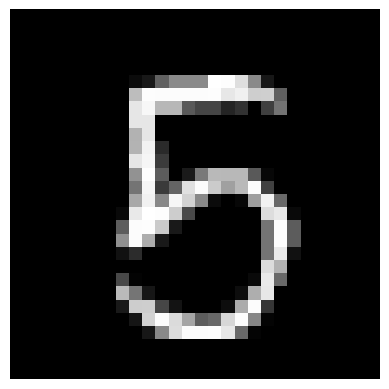

6 4


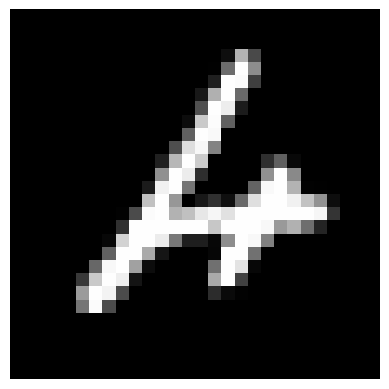

3 2


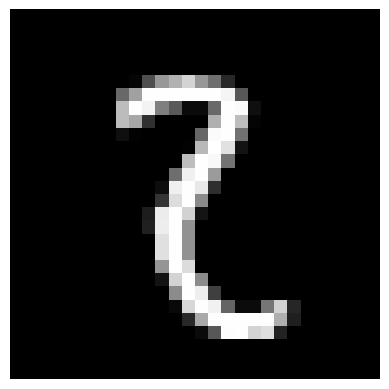

0 8


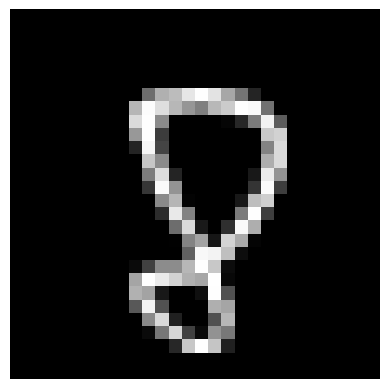

6 5


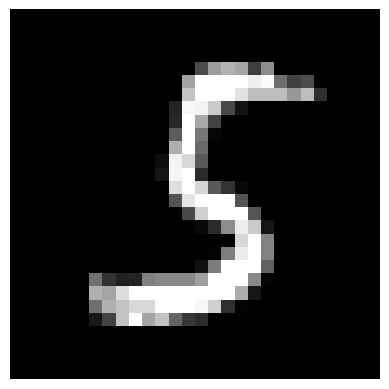

5 8


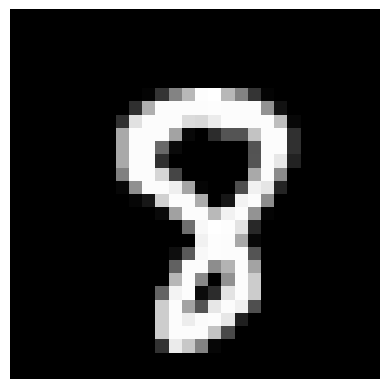

2 3


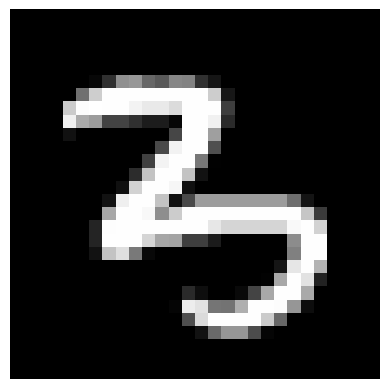

3 2


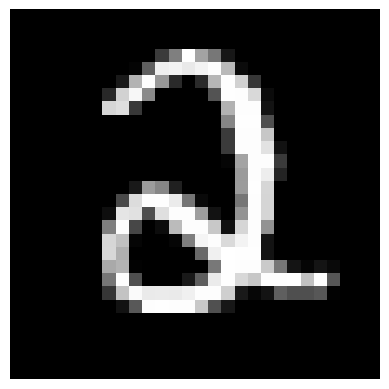

5 3


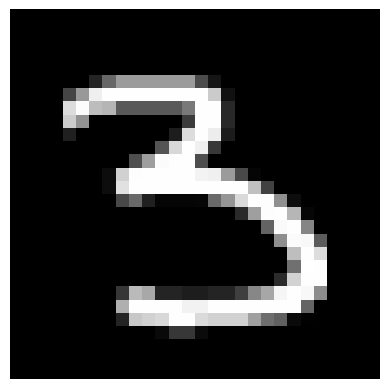

4 9


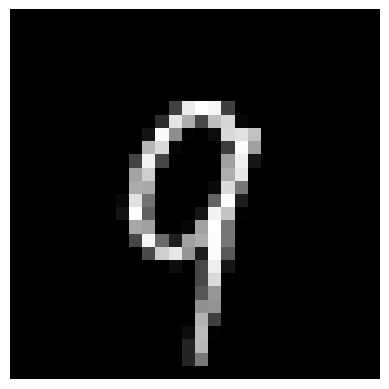

3 5


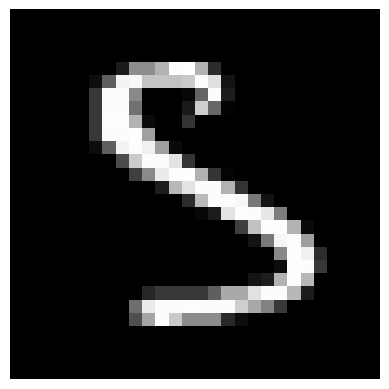

4 9


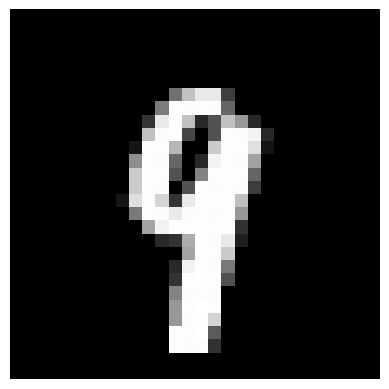

5 7


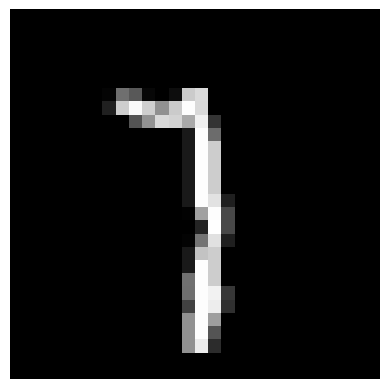

0 8


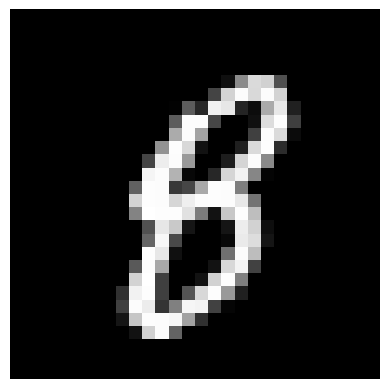

0 5


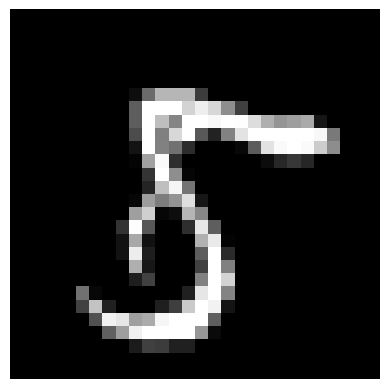

4 9


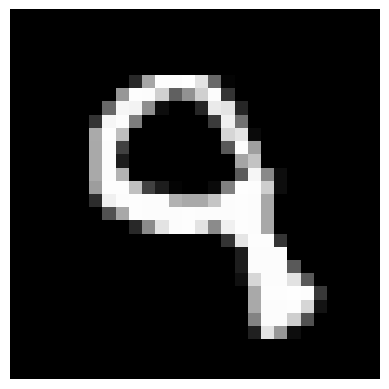

9 4


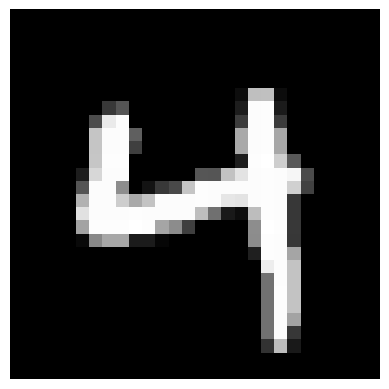

3 1


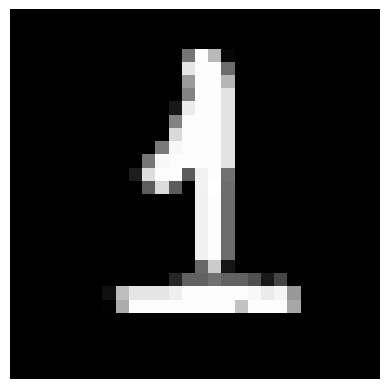

9 4


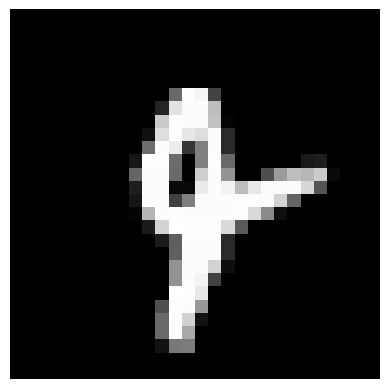

3 8


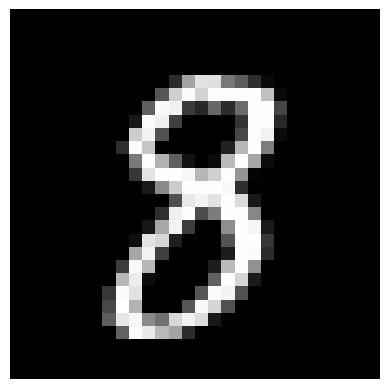

5 6


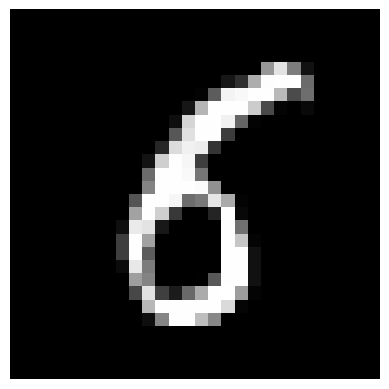

5 0


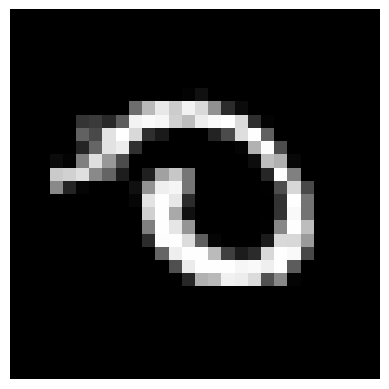

5 8


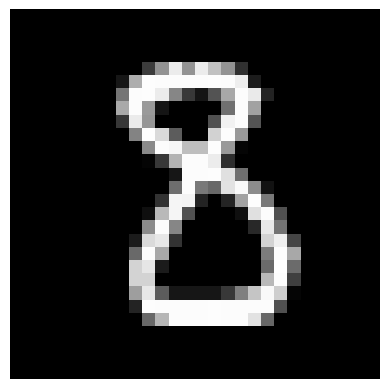

3 5


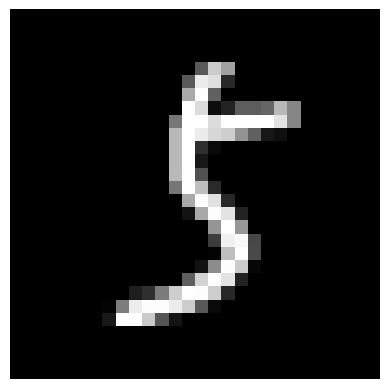

5 8


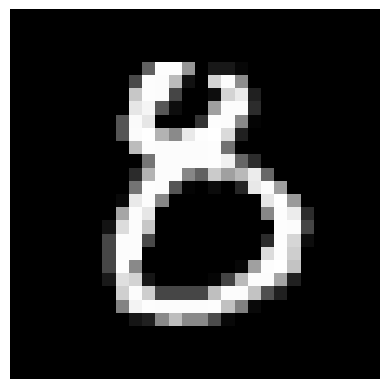

8 5


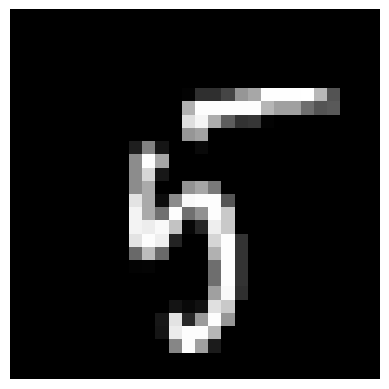

2 9


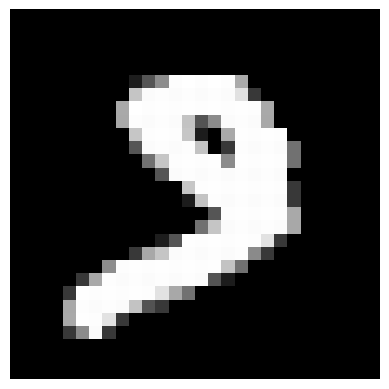

6 8


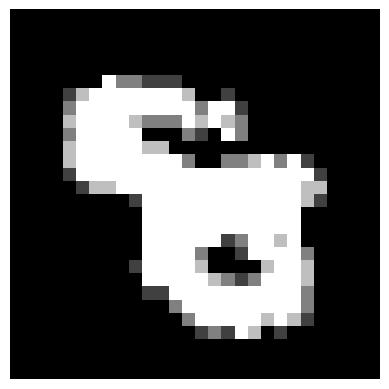

5 0


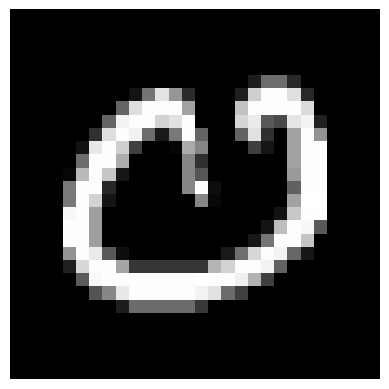

4 9


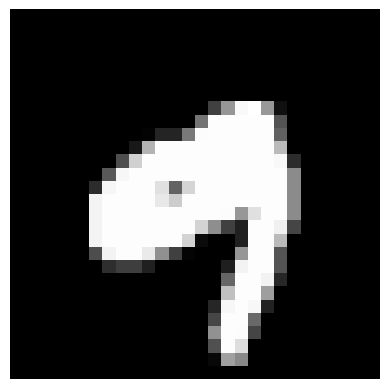

9 7


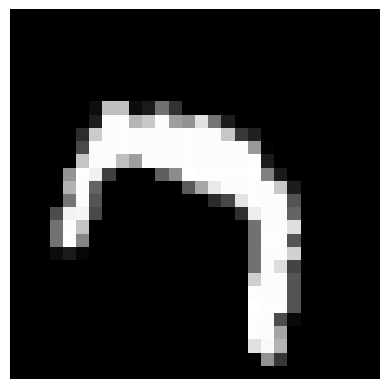

2 9


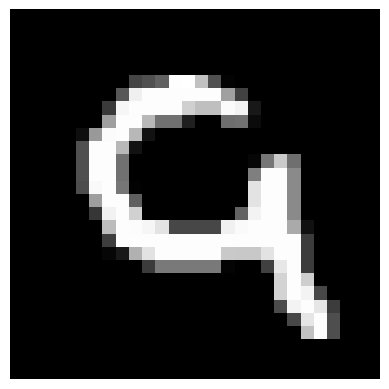

5 8


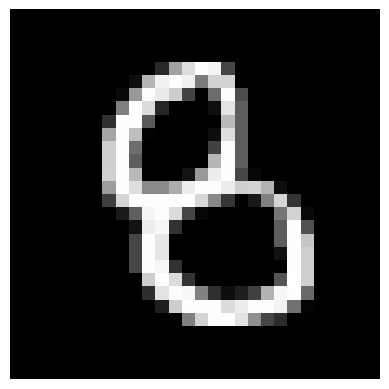

2 8


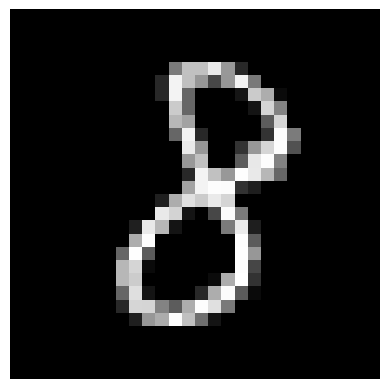

3 5


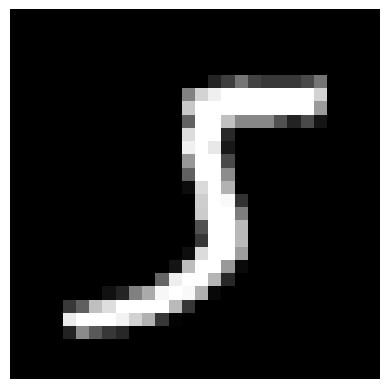

6 2


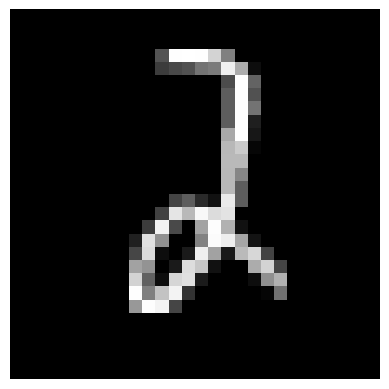

2 8


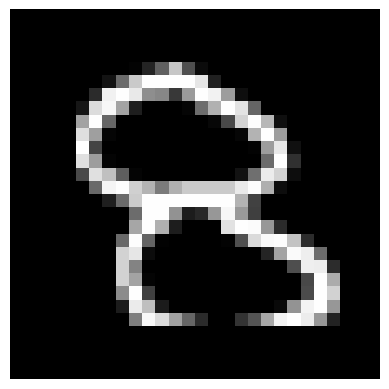

3 8


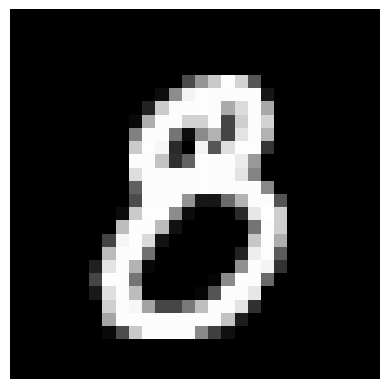

1 5


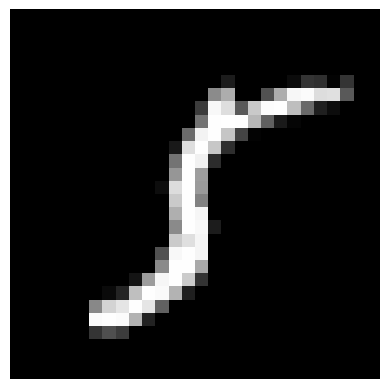

4 9


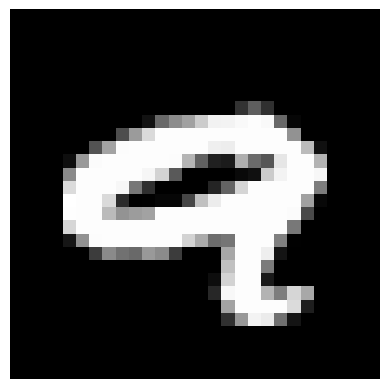

3 8


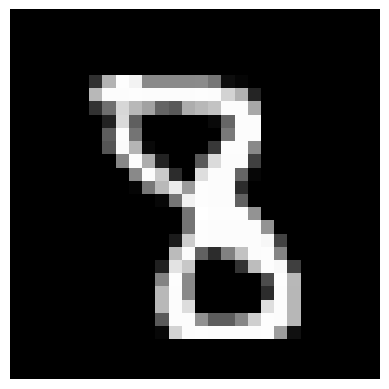

0 9


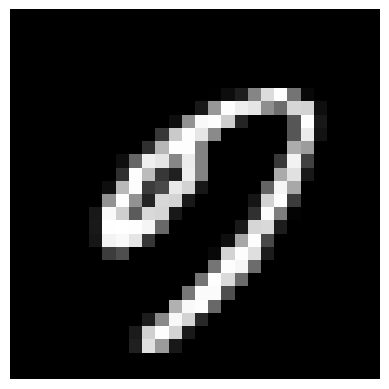

6 2


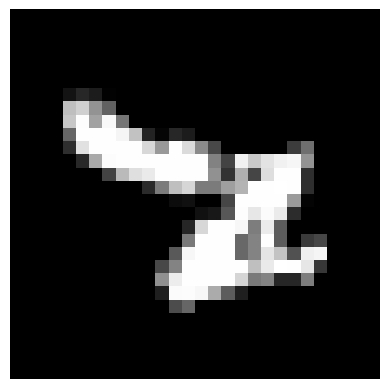

6 2


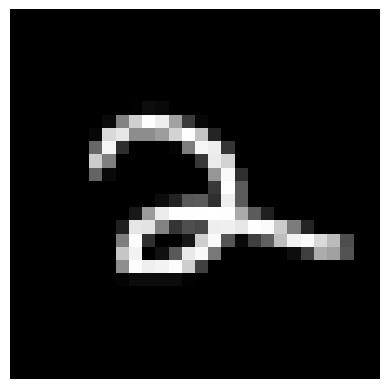

3 5


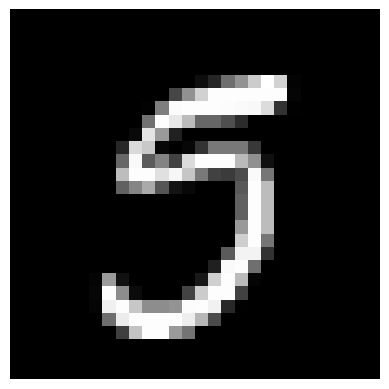

9 7


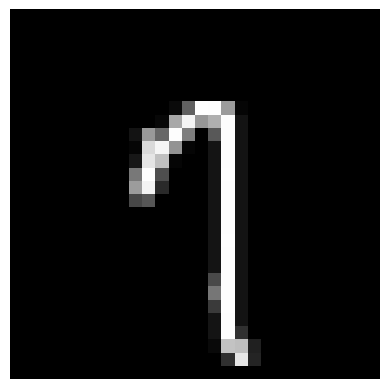

7 1


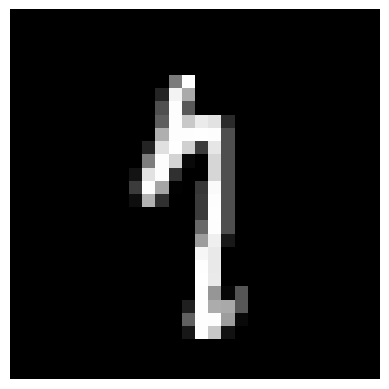

6 2


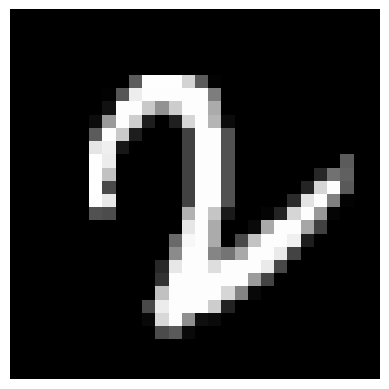

7 9


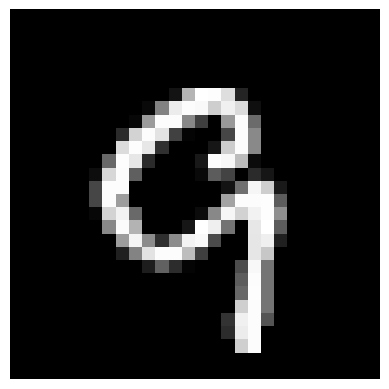

5 6


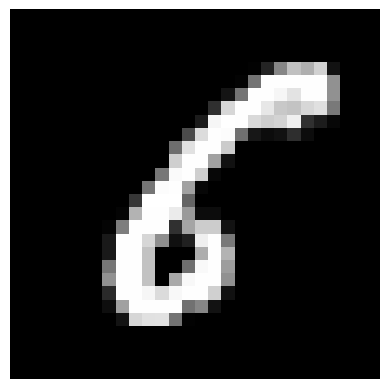

3 1


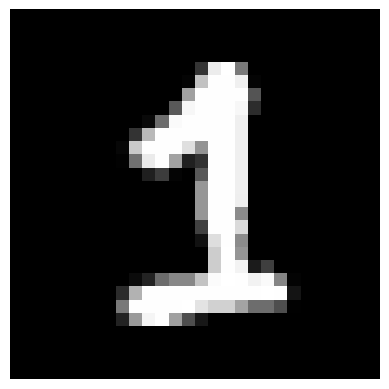

9 7


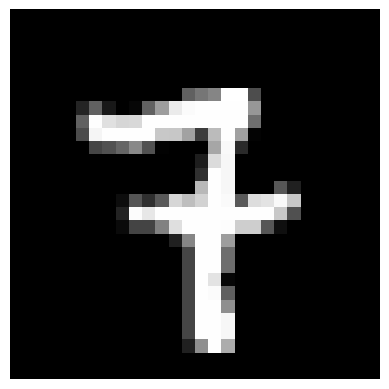

7 9


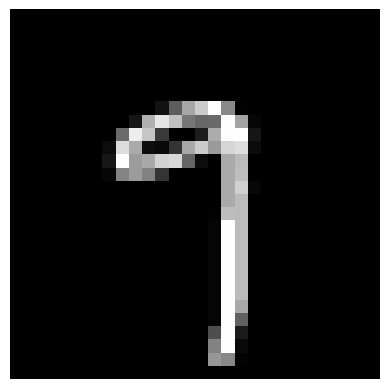

2 7


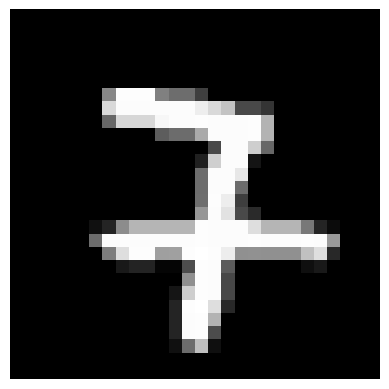

5 8


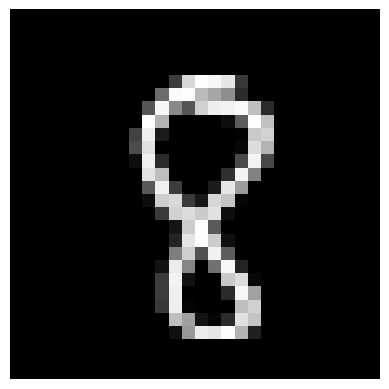

9 7


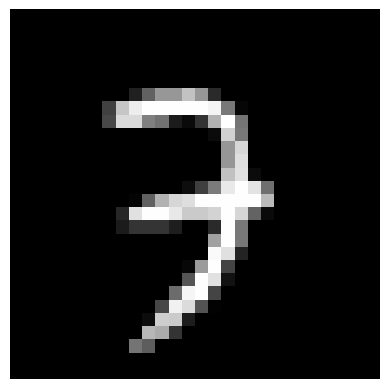

5 6


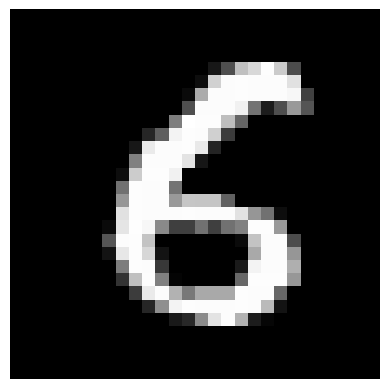

5 3


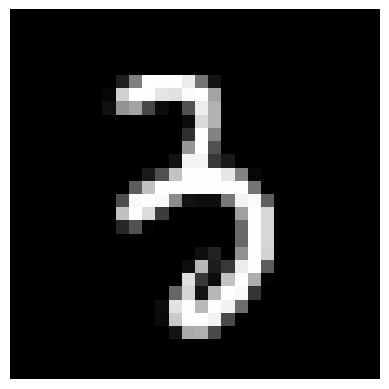

5 2


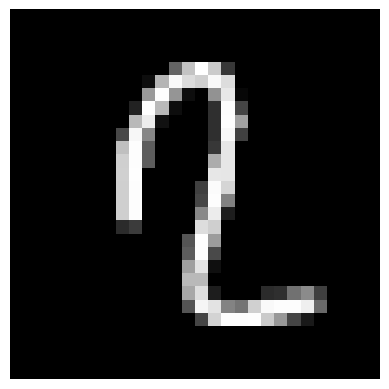

8 5


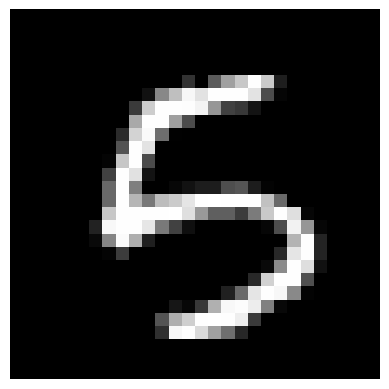

3 5


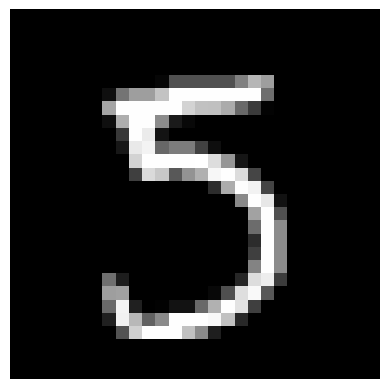

1 4


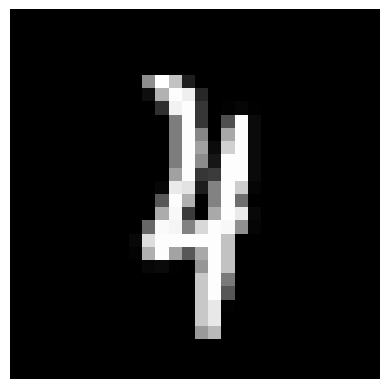

9 4


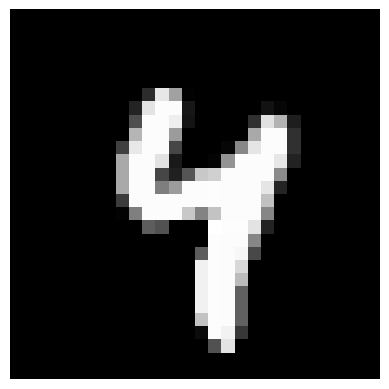

2 4


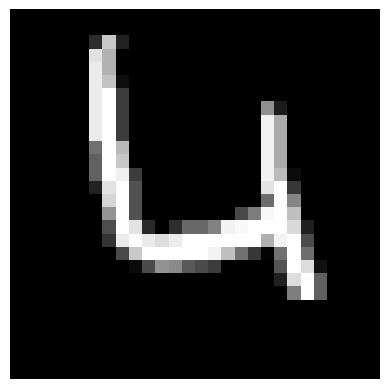

3 5


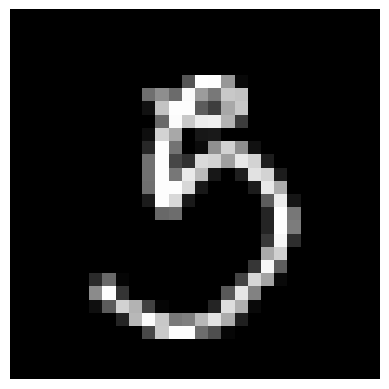

2 0


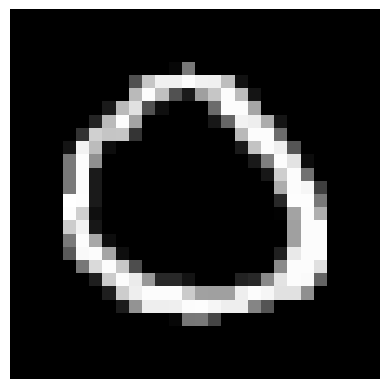

7 2


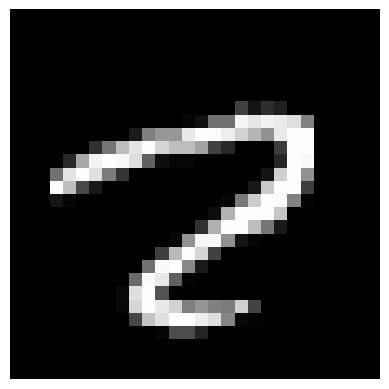

7 4


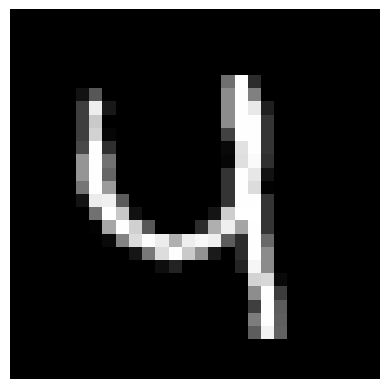

3 7


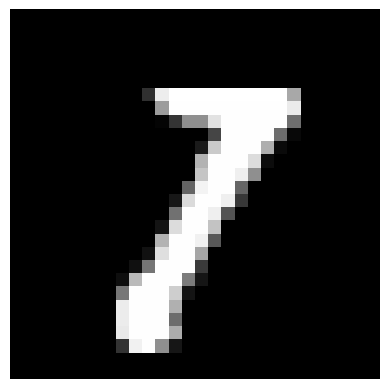

8 5


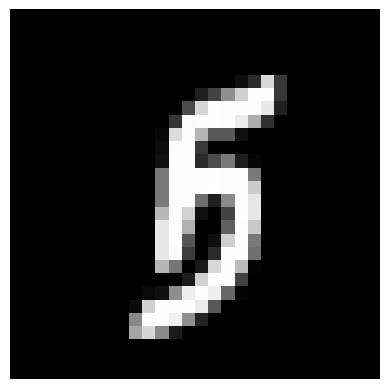

6 9


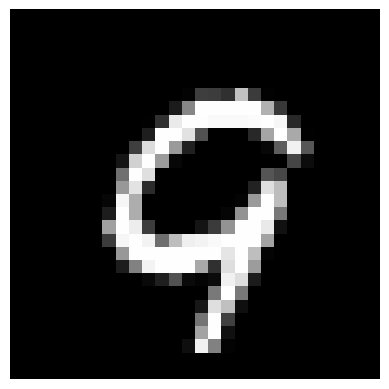

1 5


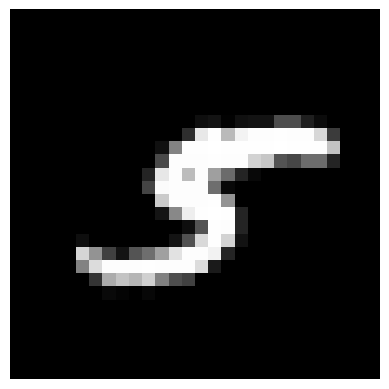

7 3


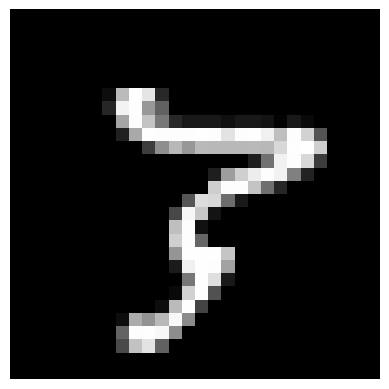

5 3


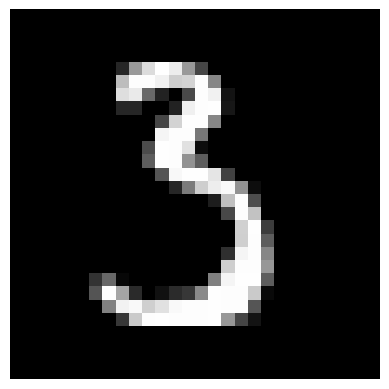

9 3


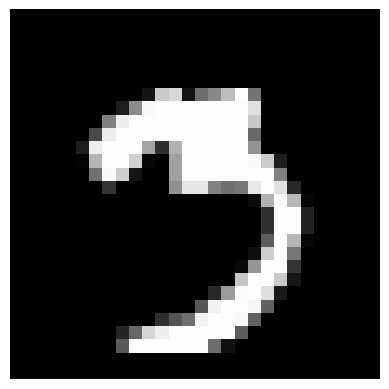

8 5


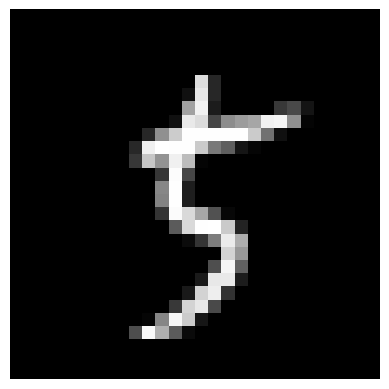

7 9


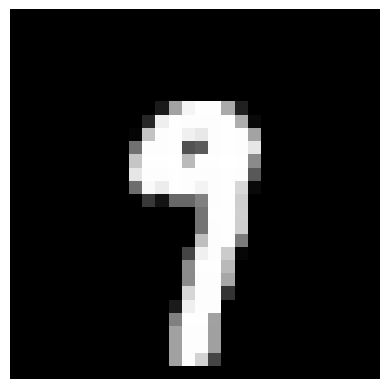

6 2


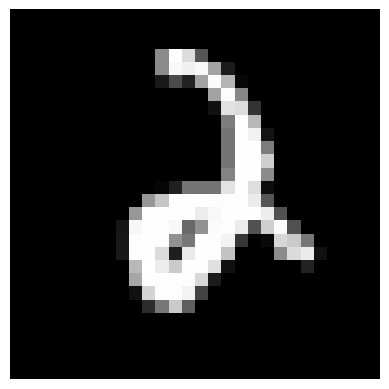

5 3


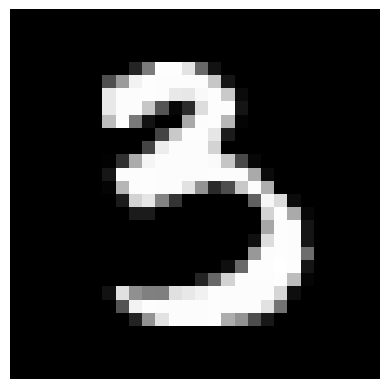

3 2


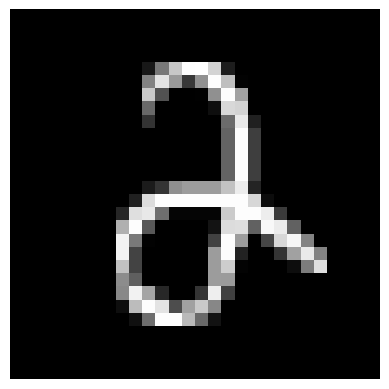

7 9


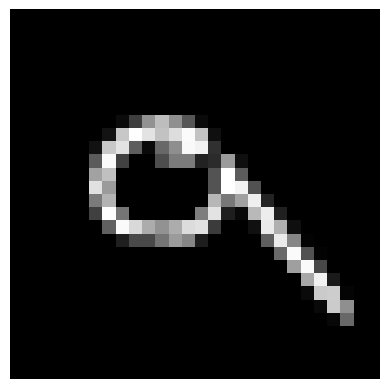

9 5


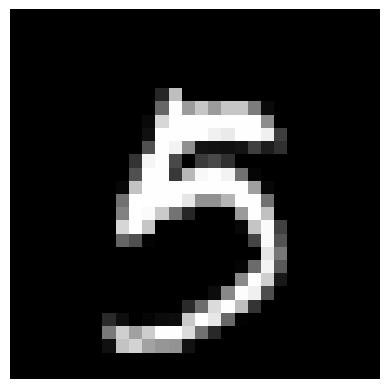

8 5


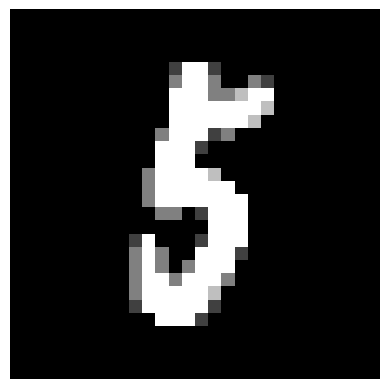

7 5


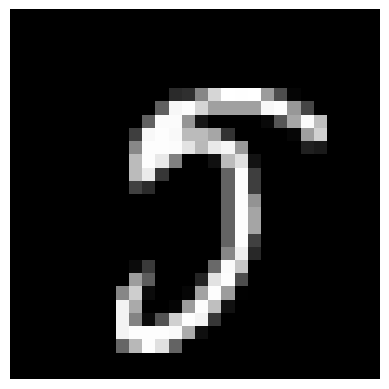

4 9


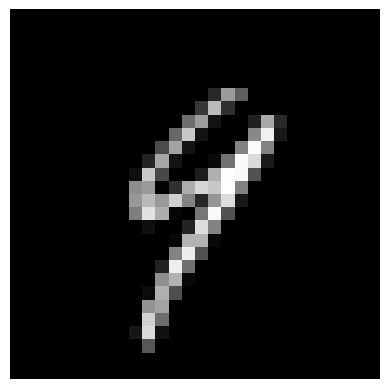

9 4


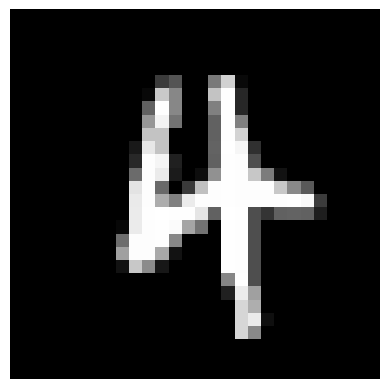

6 5


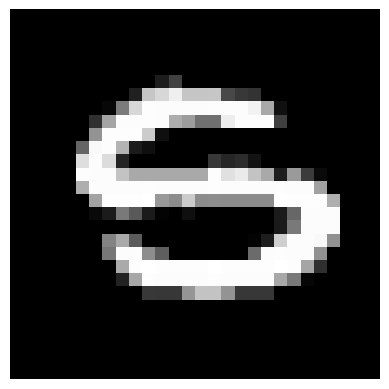

8 5


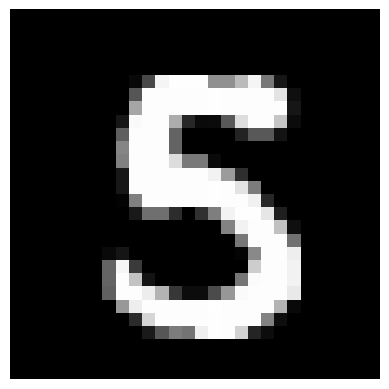

6 2


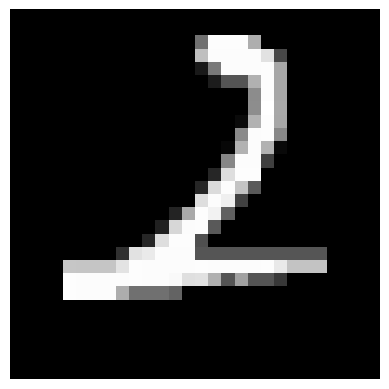

9 7


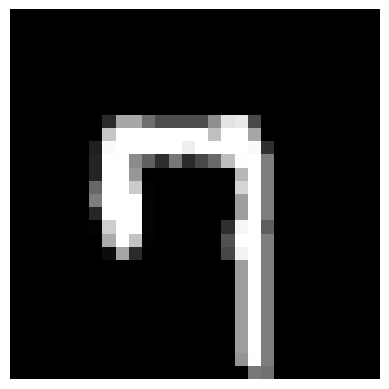

8 4


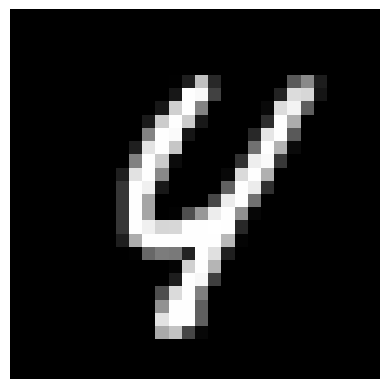

1 7


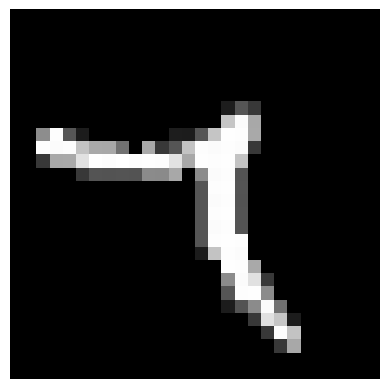

2 0


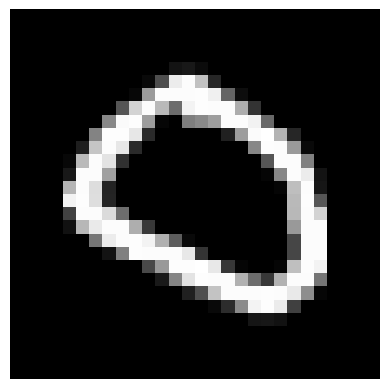

4 9


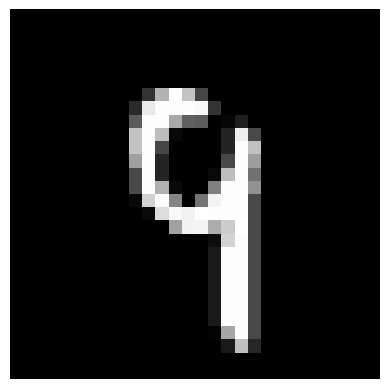

4 9


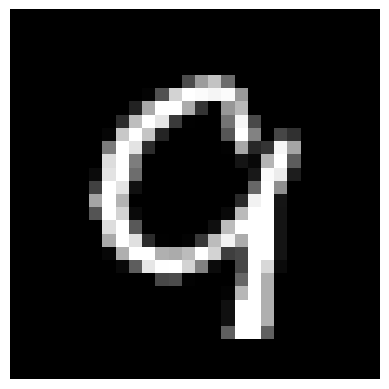

2 7


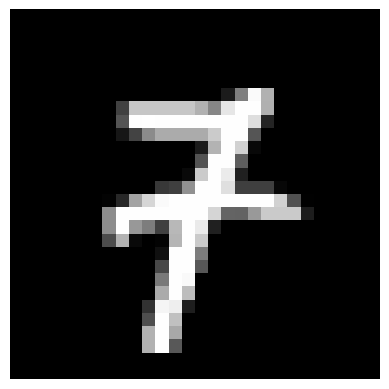

4 9


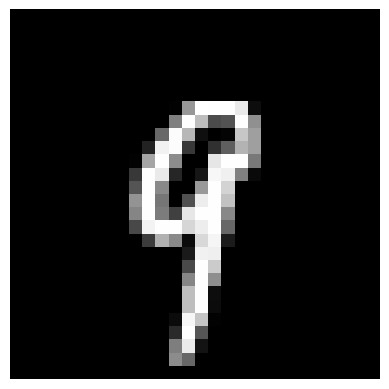

5 0


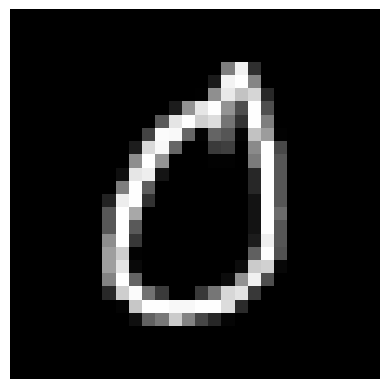

2 7


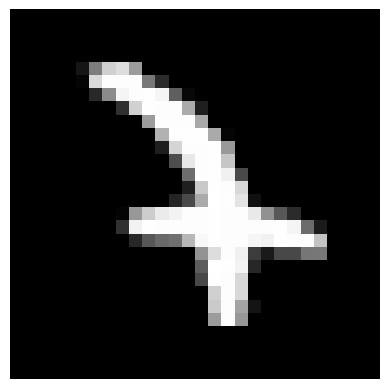

7 3


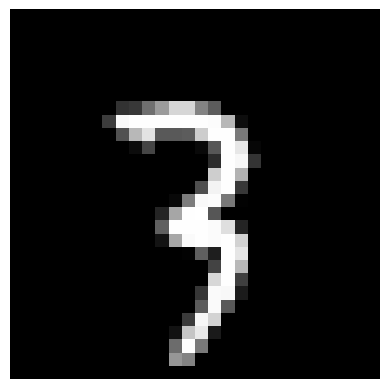

8 2


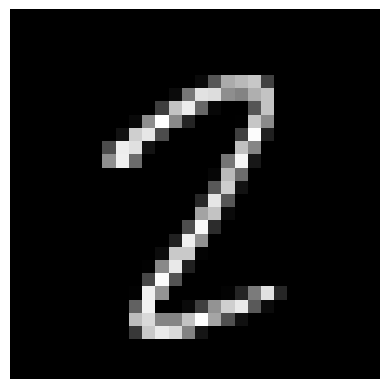

6 0


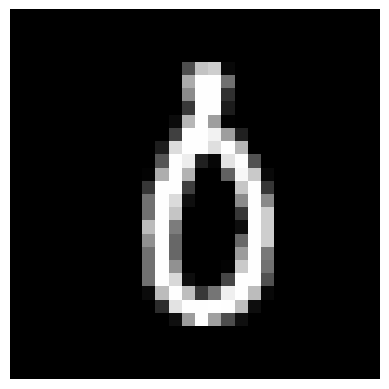

7 9


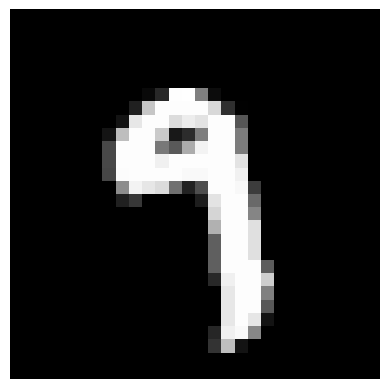

4 8


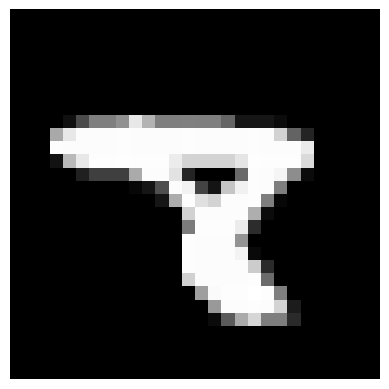

9 7


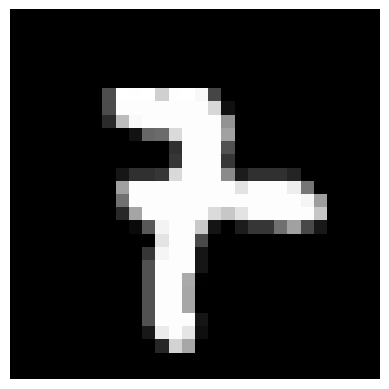

3 9


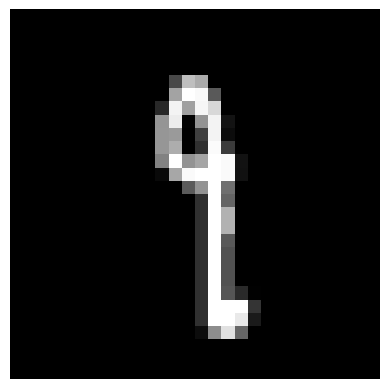

2 1


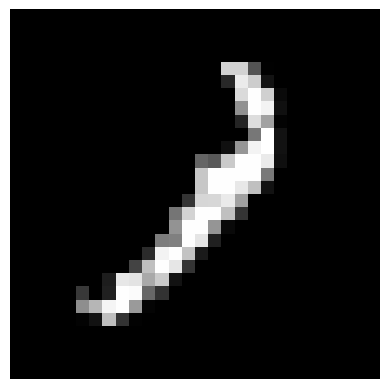

7 9


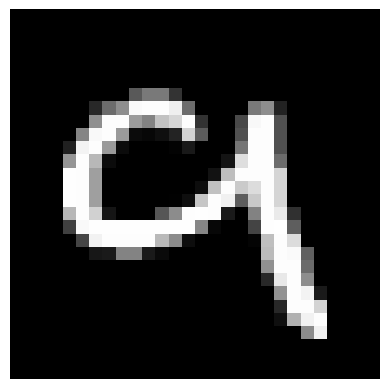

9 2


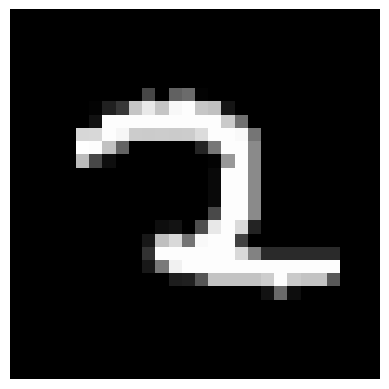

3 8


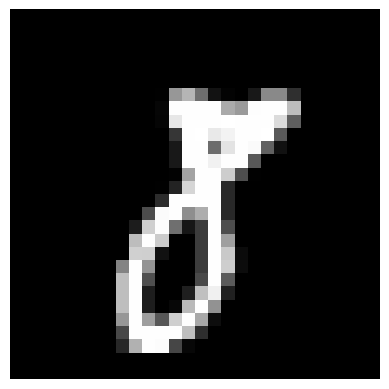

5 6


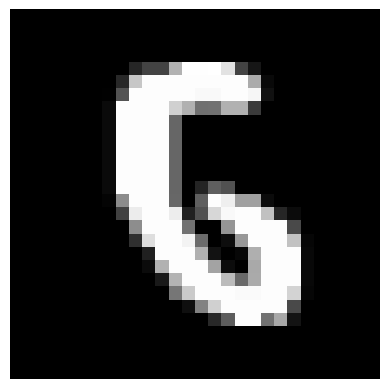

2 7


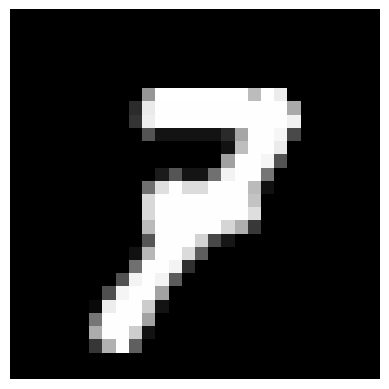

3 8


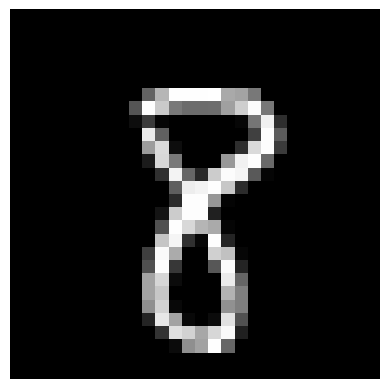

3 2


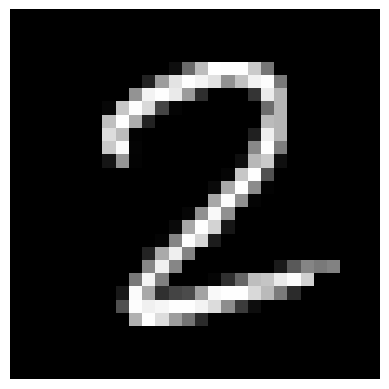

6 4


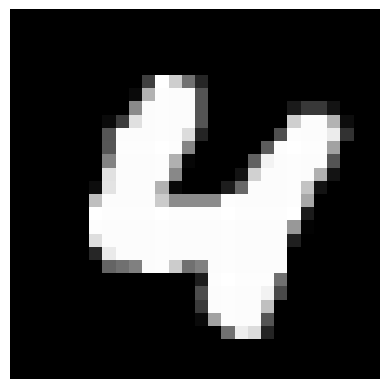

9 4


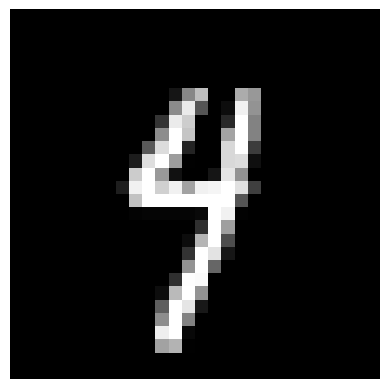

2 7


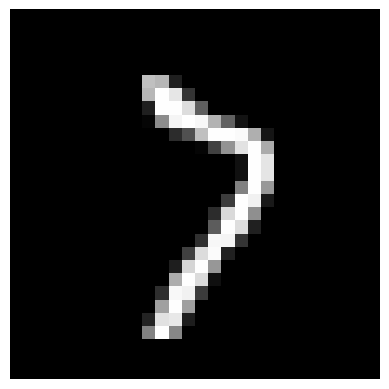

2 6


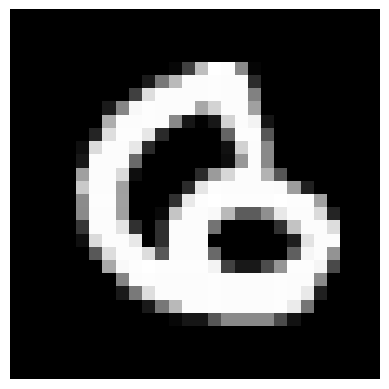

3 2


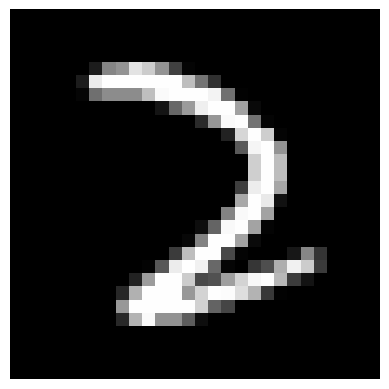

2 4


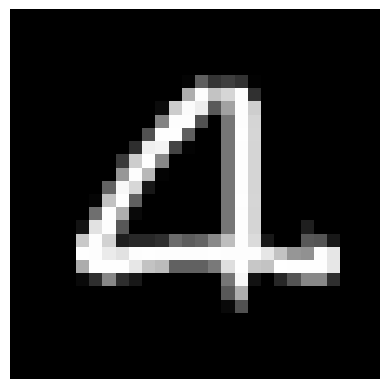

9 7


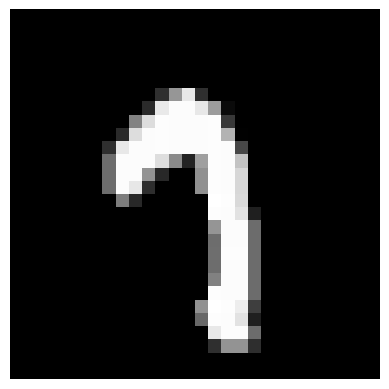

8 5


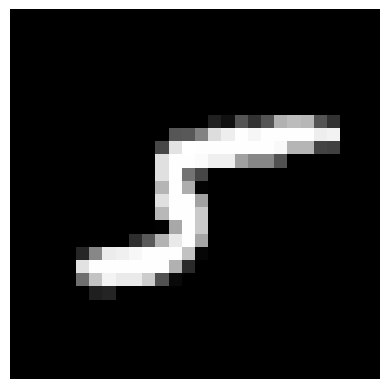

3 7


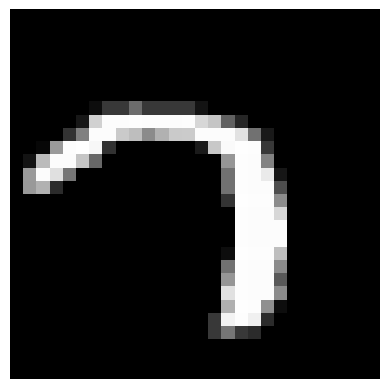

4 8


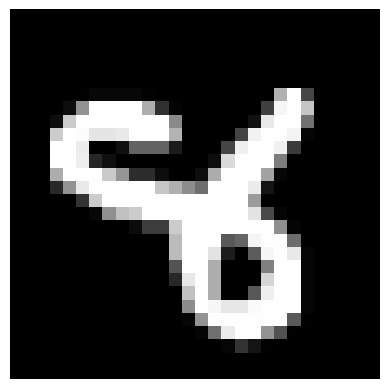

8 3


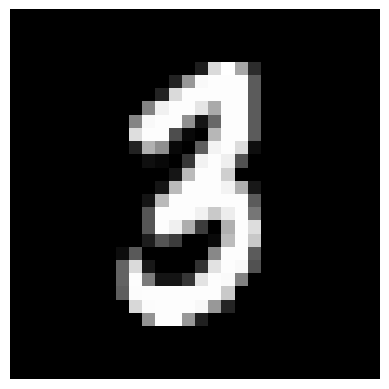

4 2


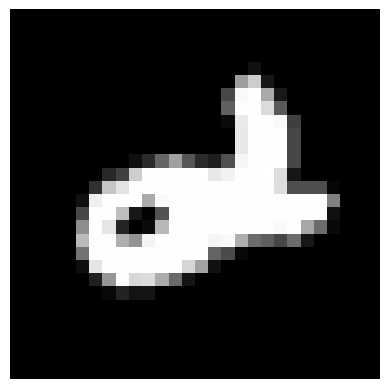

2 6


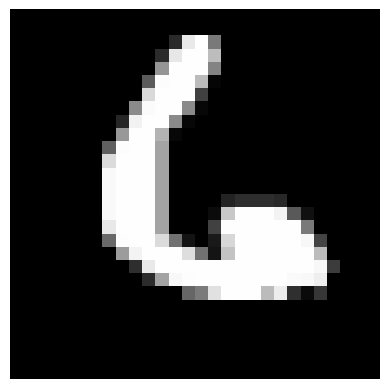

4 9


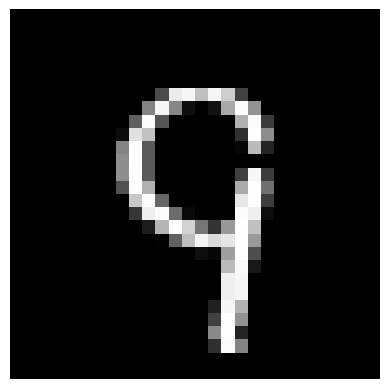

7 8


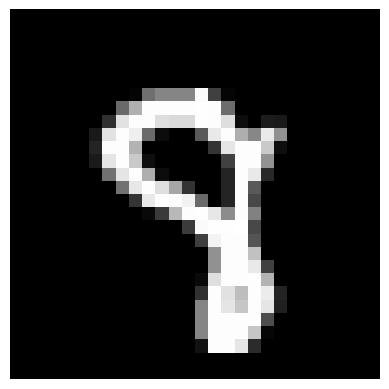

7 2


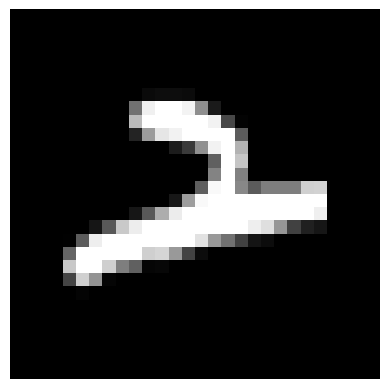

2 3


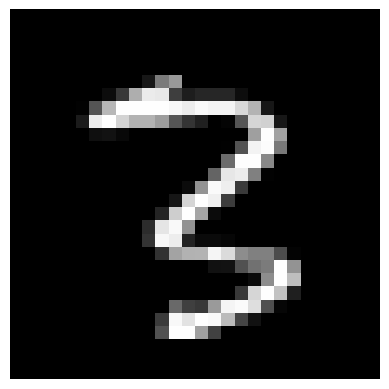

5 3


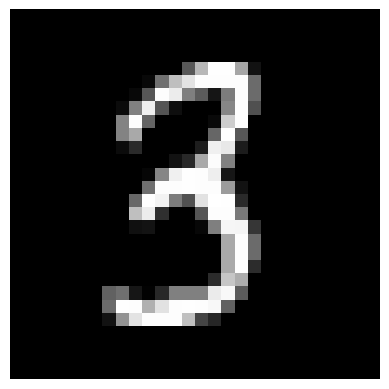

5 9


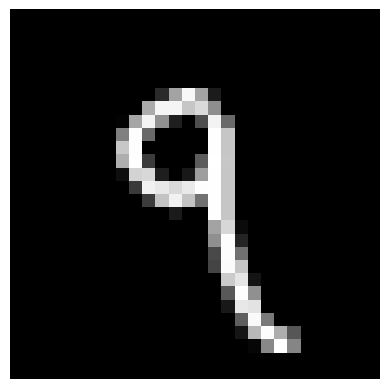

4 9


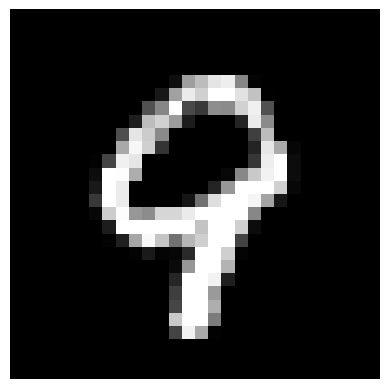

9 7


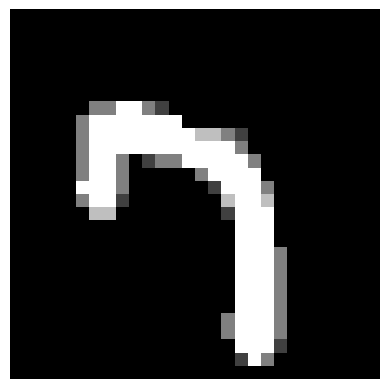

9 5


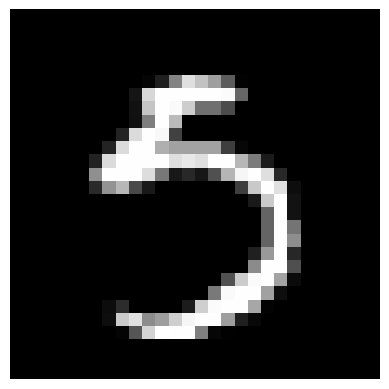

2 6


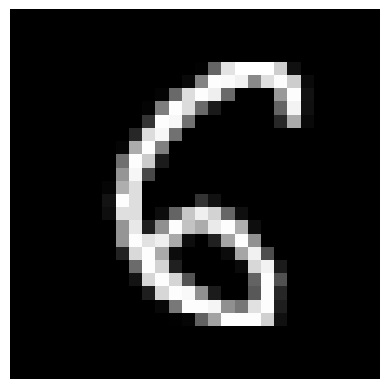

1 5


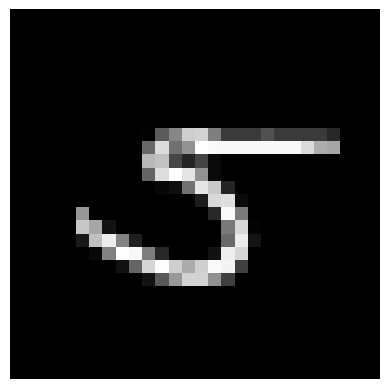

5 8


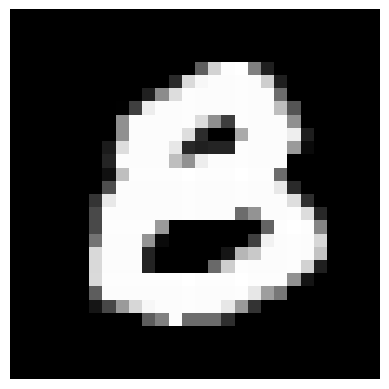

5 8


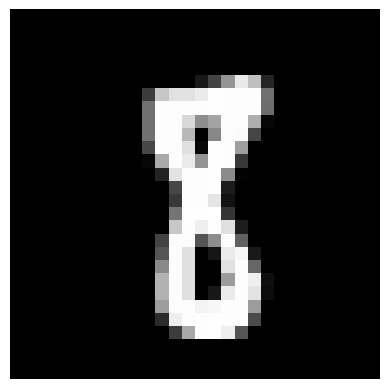

7 8


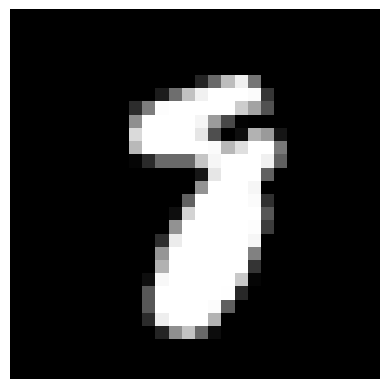

4 9


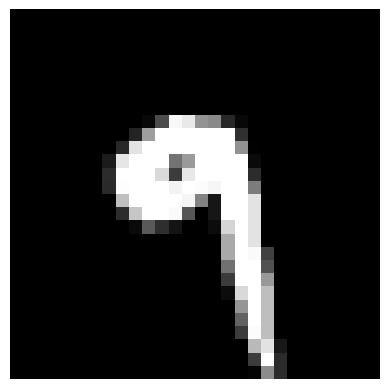

8 4


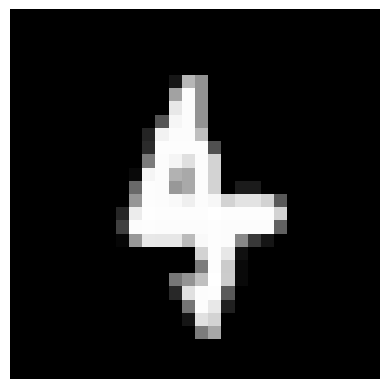

6 0


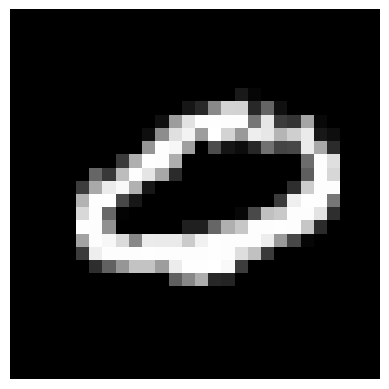

7 3


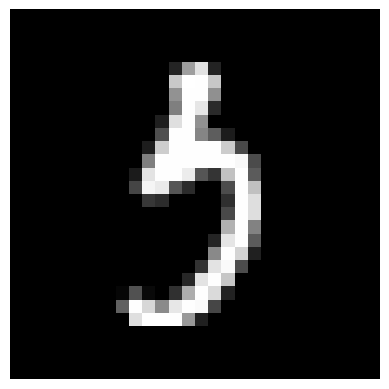

4 7


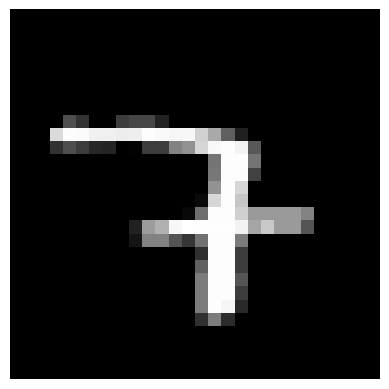

6 8


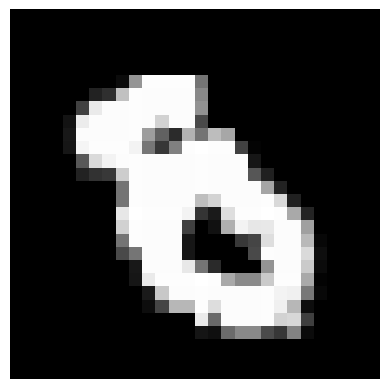

6 4


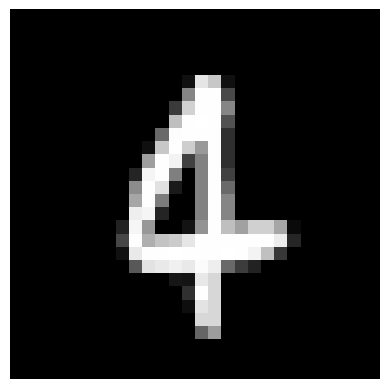

8 3


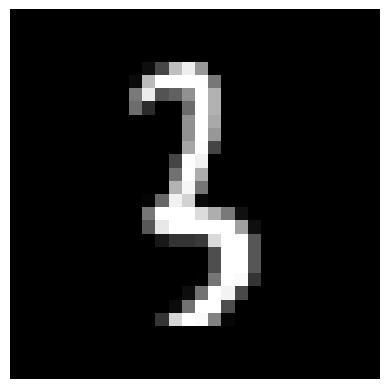

5 9


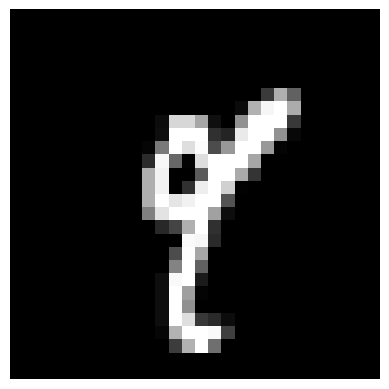

8 3


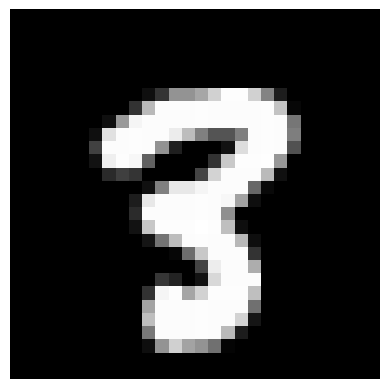

5 8


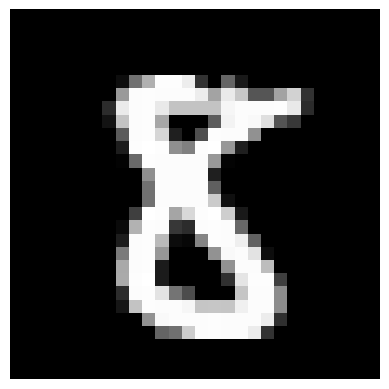

5 6


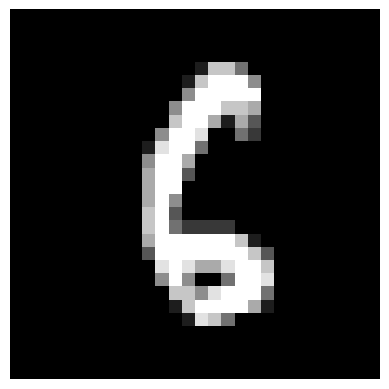

3 8


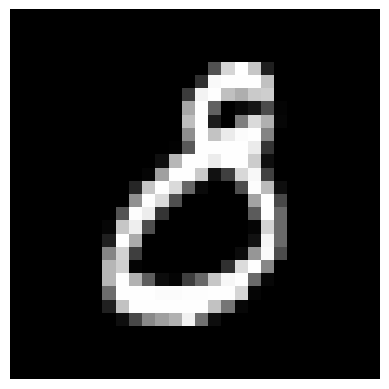

5 3


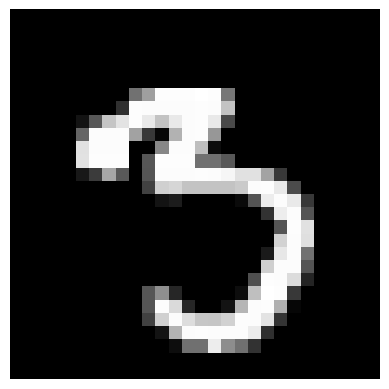

0 6


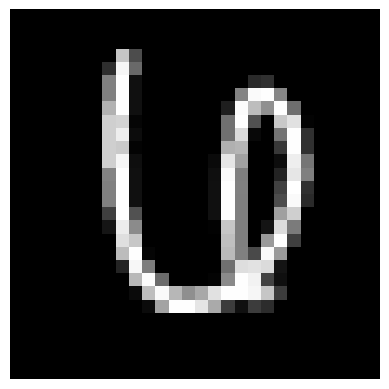

4 9


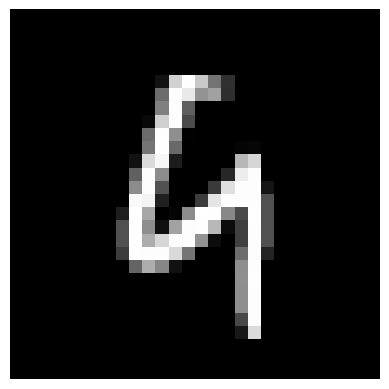

4 8


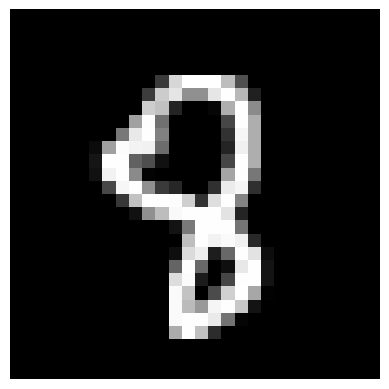

9 4


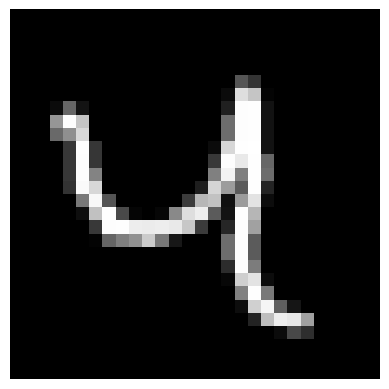

9 4


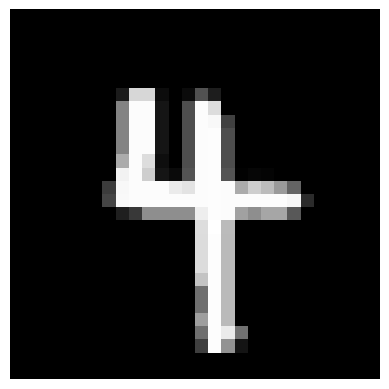

3 8


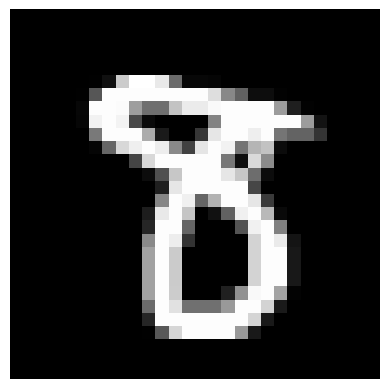

2 7


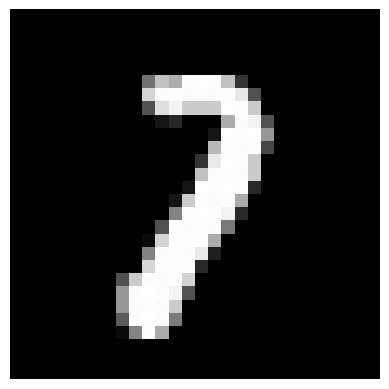

5 6


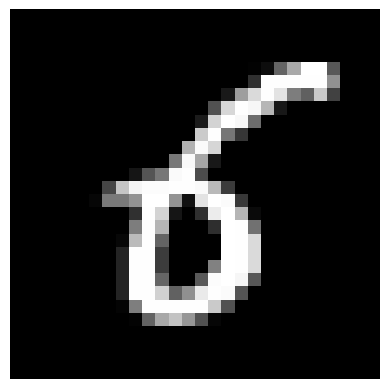

6 8


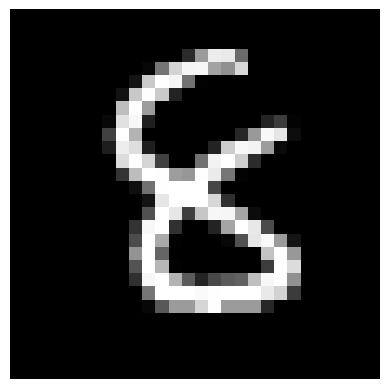

9 4


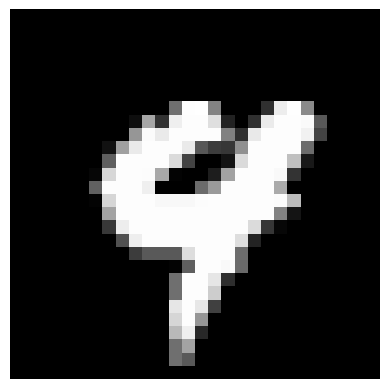

3 7


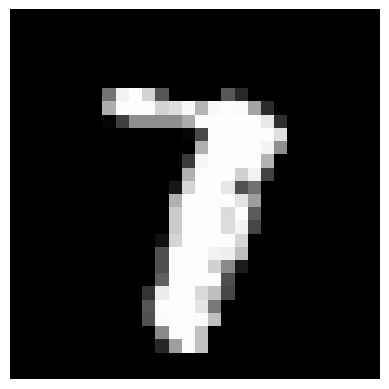

9 8


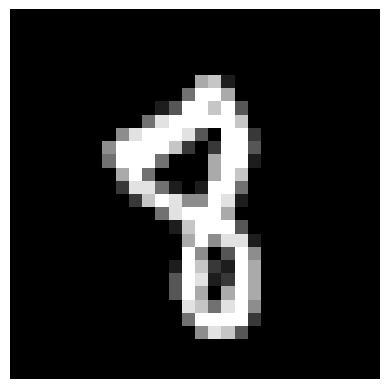

5 9


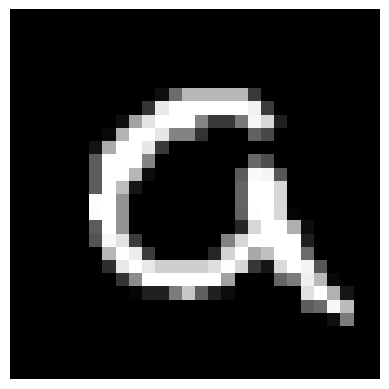

4 2


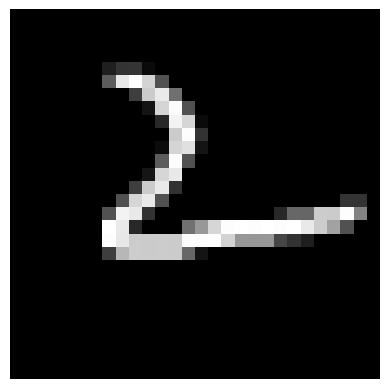

8 1


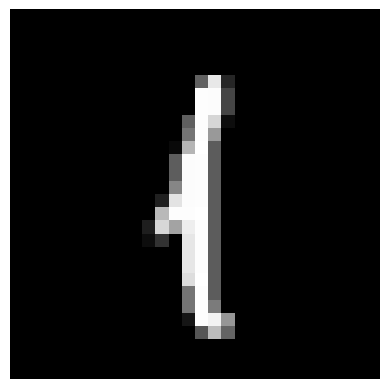

4 8


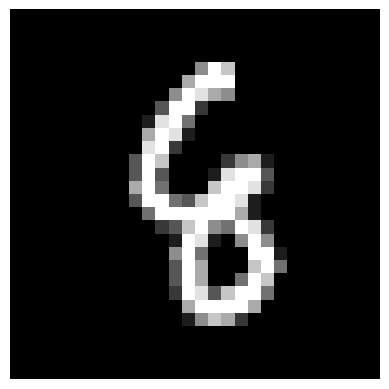

8 0


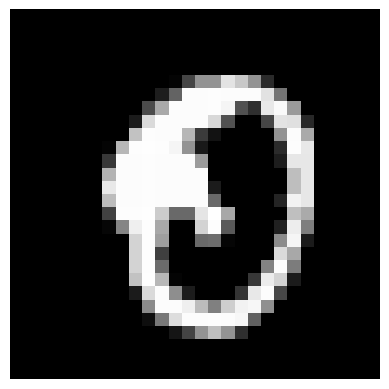

1 7


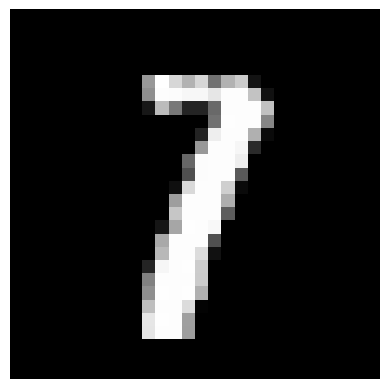

4 5


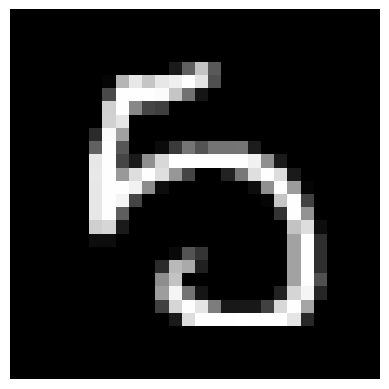

5 8


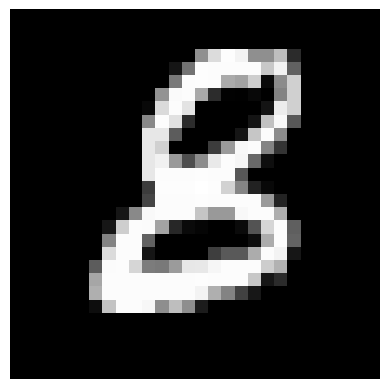

9 5


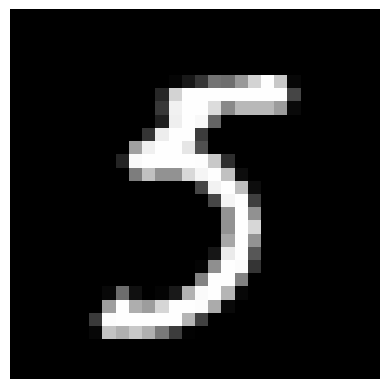

8 5


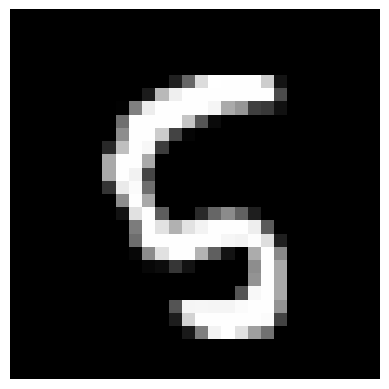

3 2


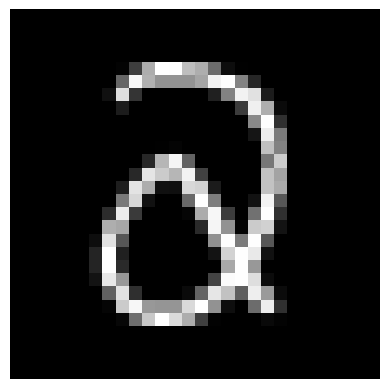

5 6


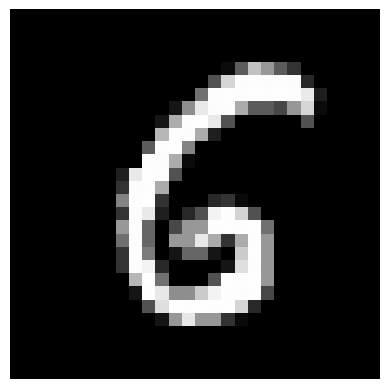

4 8


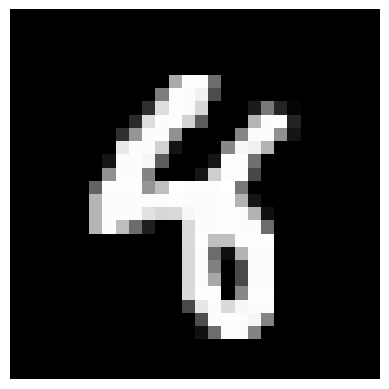

4 9


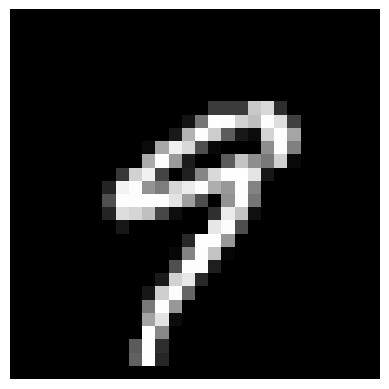

8 7


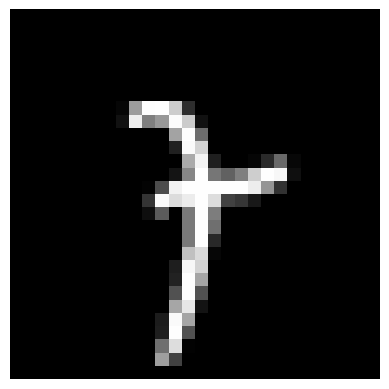

9 4


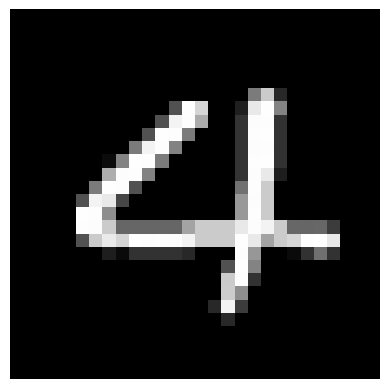

9 8


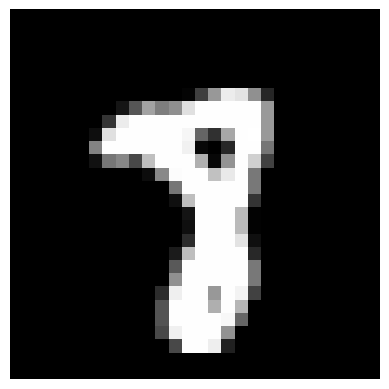

3 5


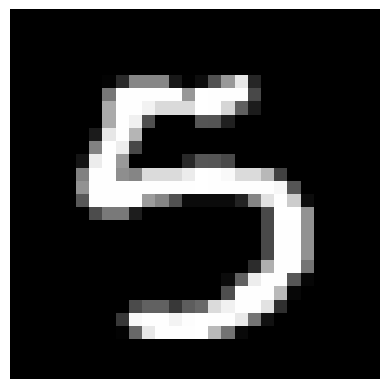

6 4


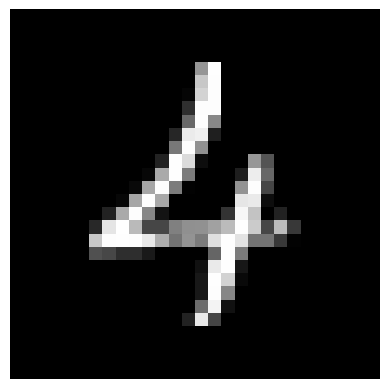

7 9


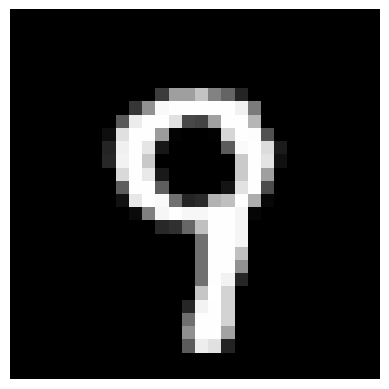

1 3


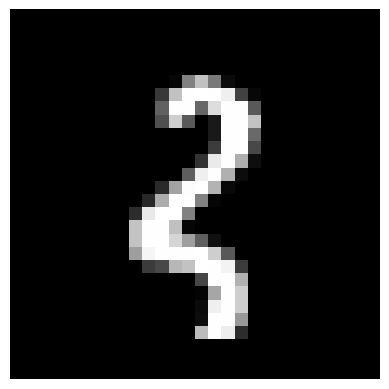

3 2


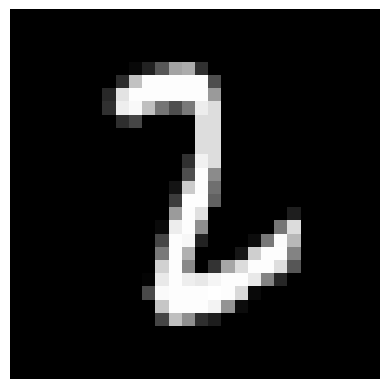

5 2


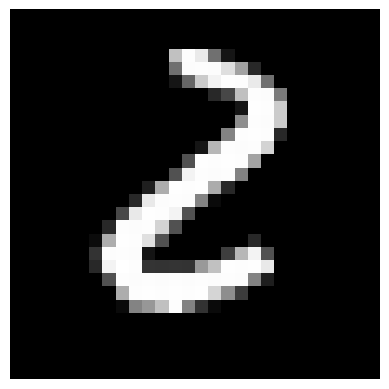

9 4


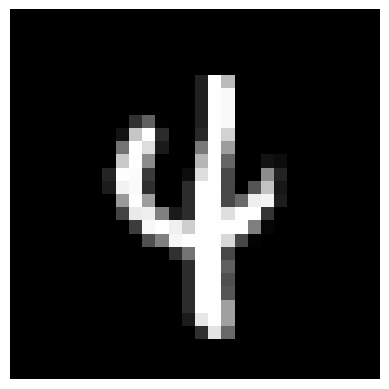

5 0


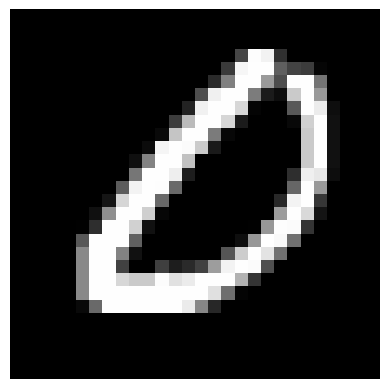

8 9


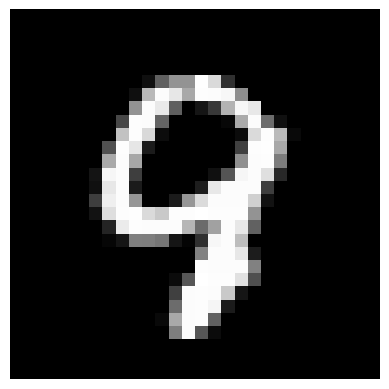

8 5


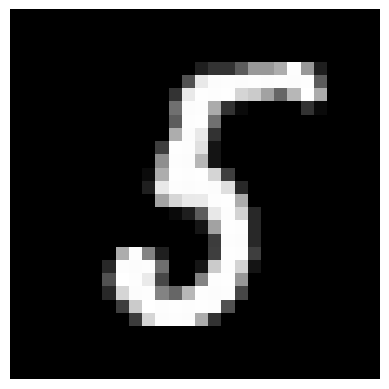

2 3


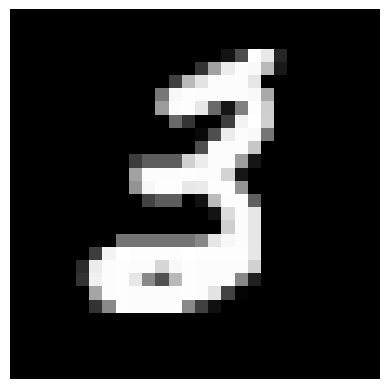

2 3


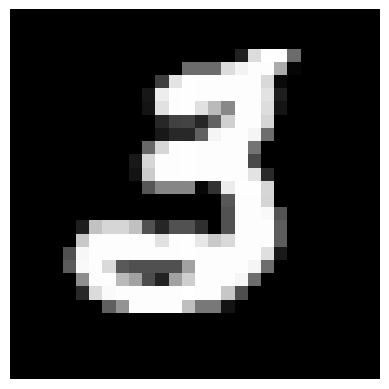

5 3


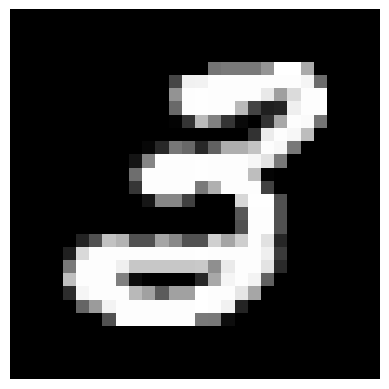

1 8


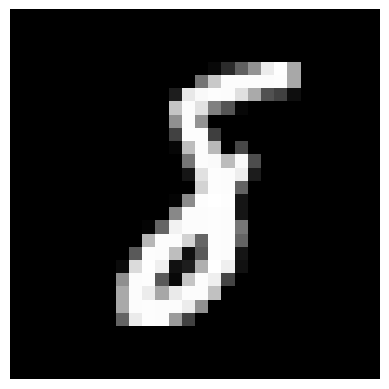

8 3


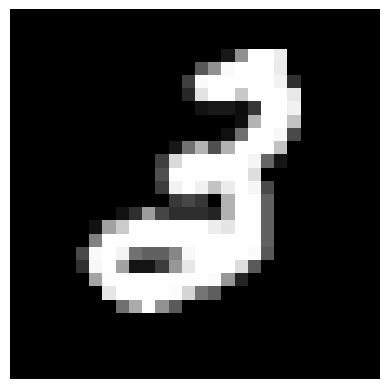

1 4


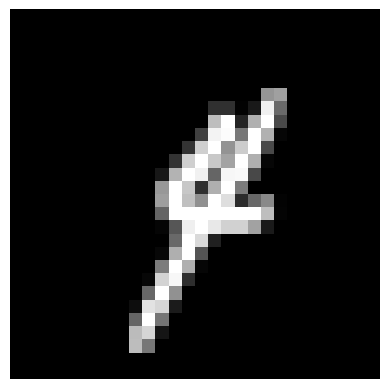

5 3


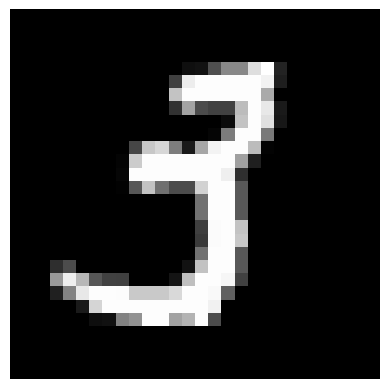

2 3


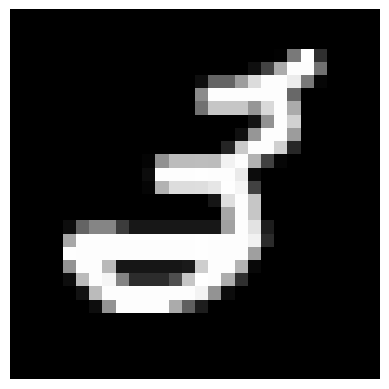

4 9


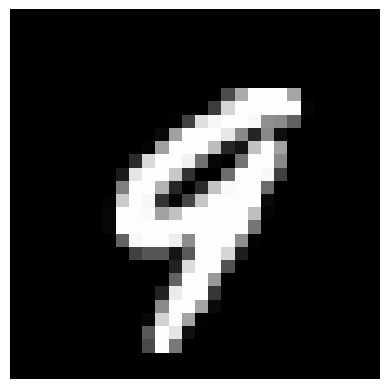

8 2


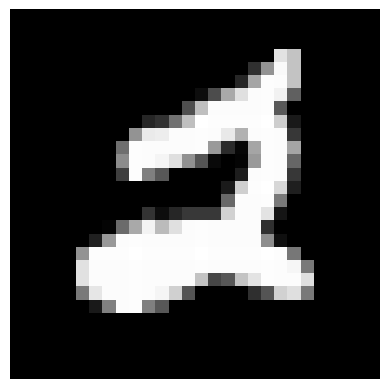

4 9


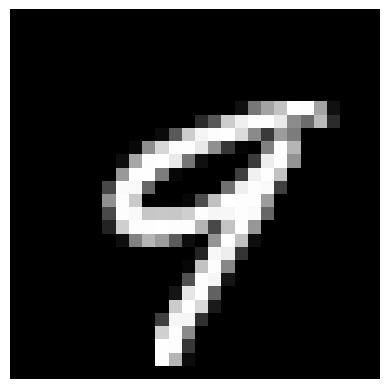

2 3


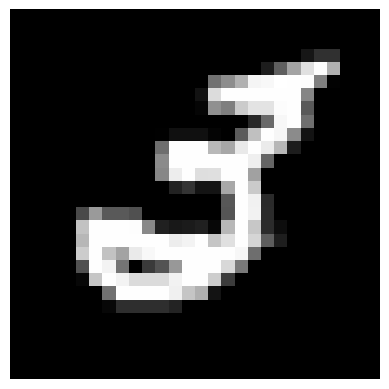

9 4


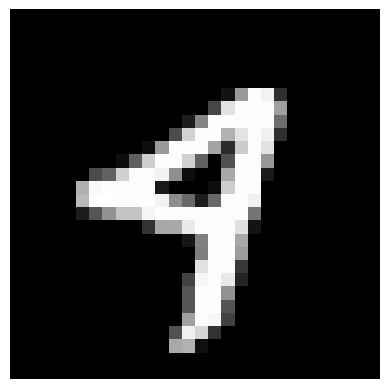

3 2


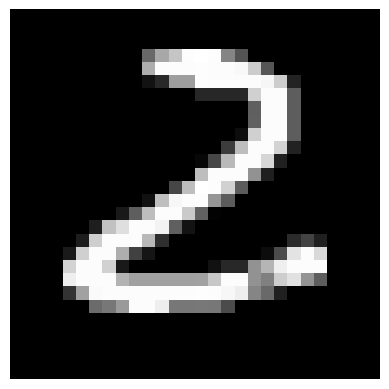

5 8


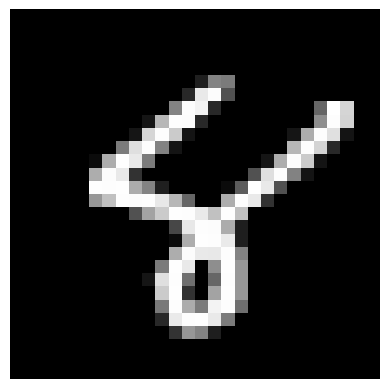

4 8


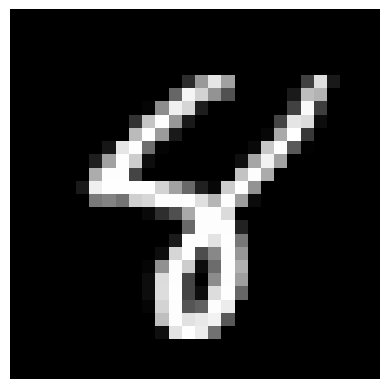

6 4


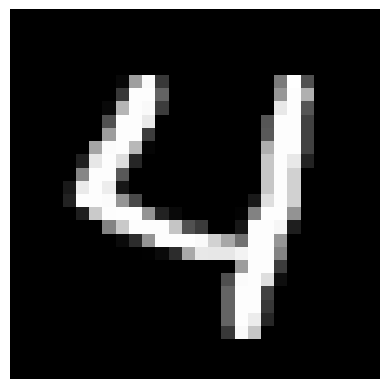

7 9


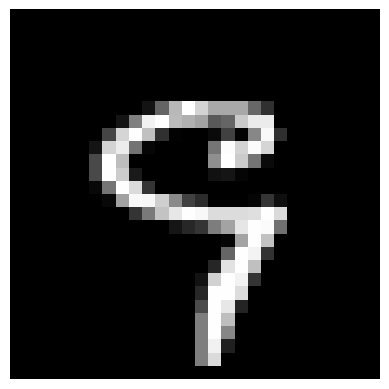

8 2


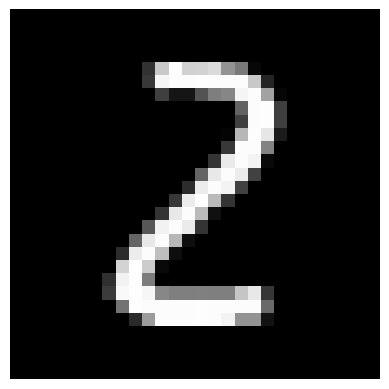

5 6


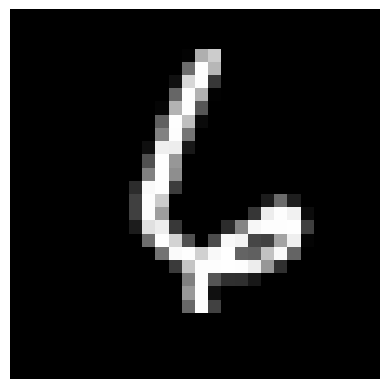

7 9


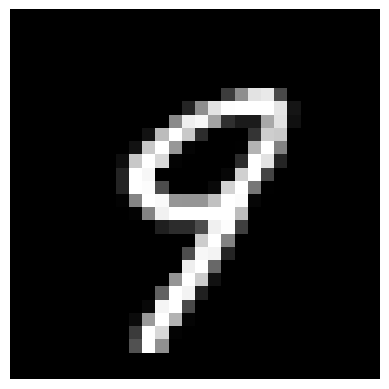

6 0


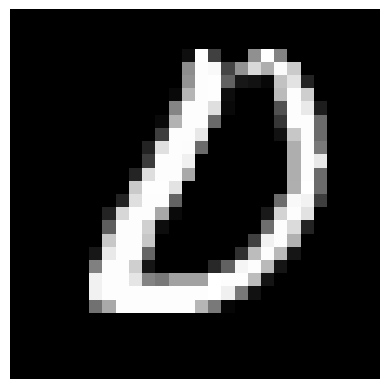

5 9


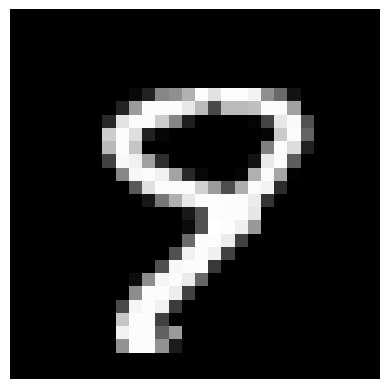

9 8


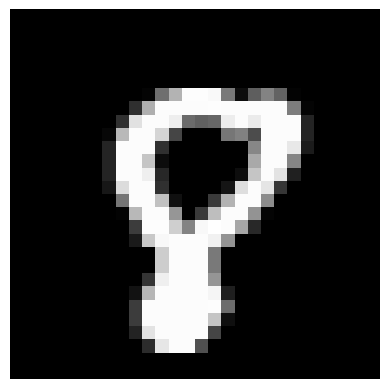

0 8


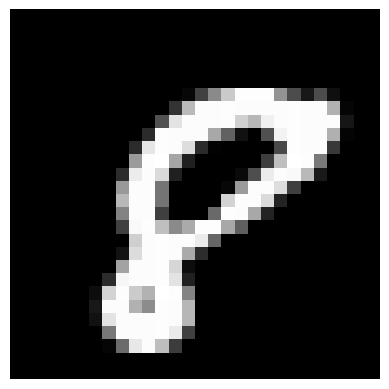

7 9


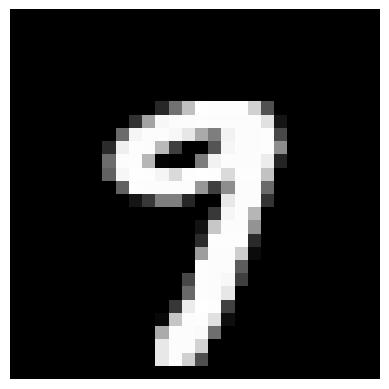

7 9


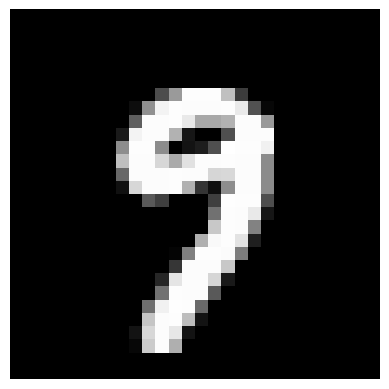

8 1


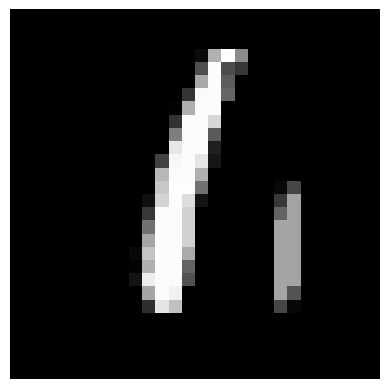

0 3


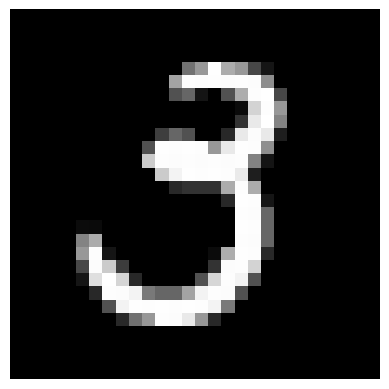

7 8


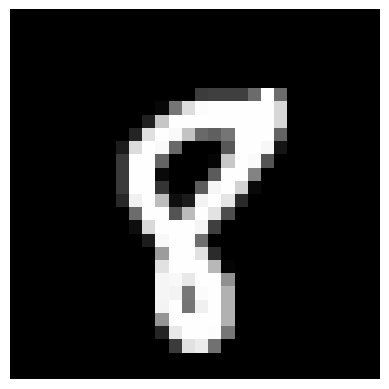

5 6


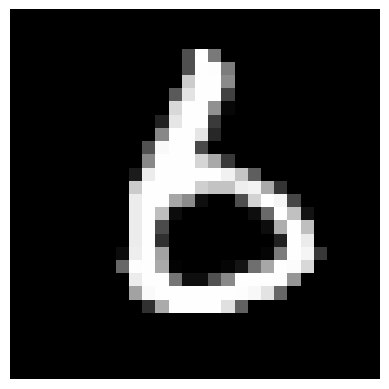

6 4


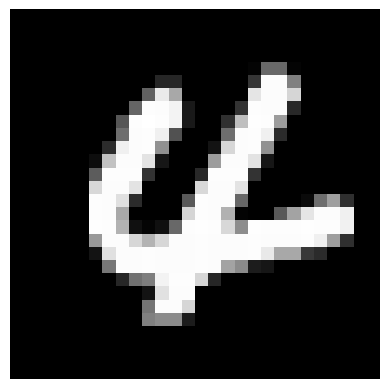

9 8


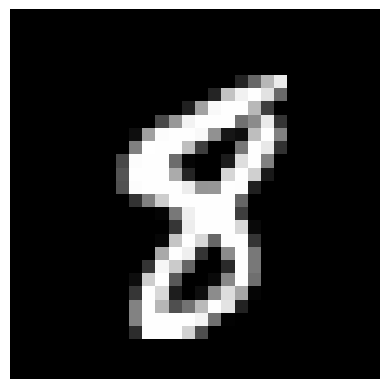

7 9


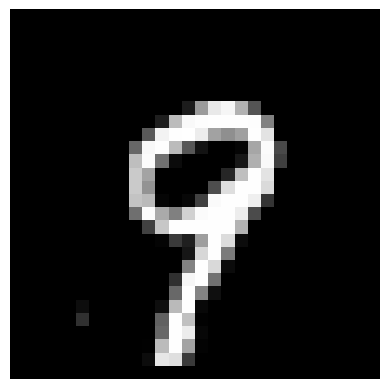

5 8


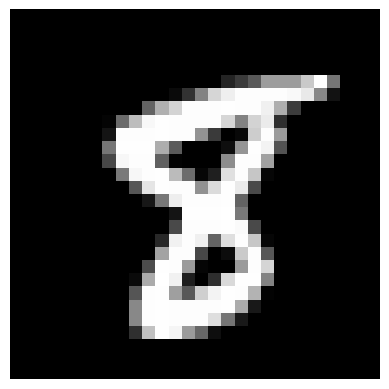

3 8


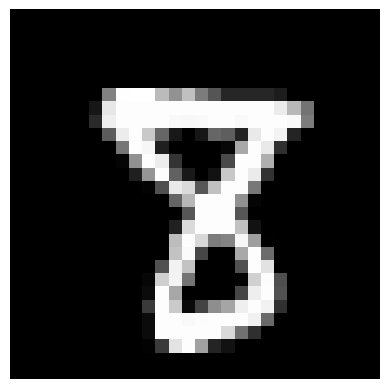

5 3


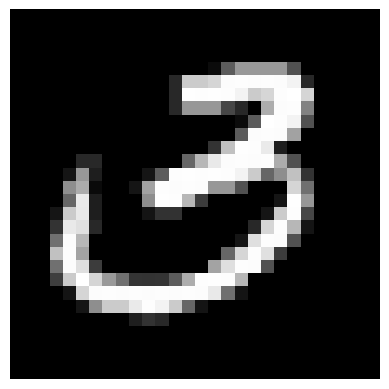

3 8


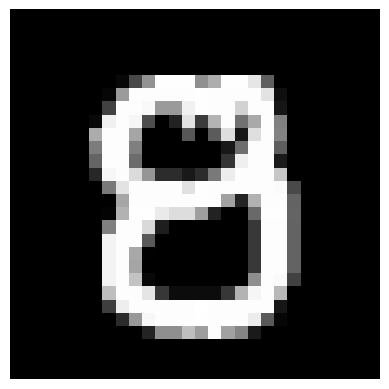

7 9


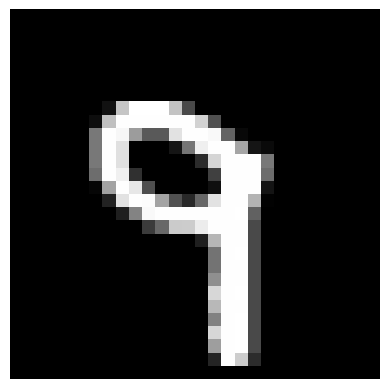

9 7


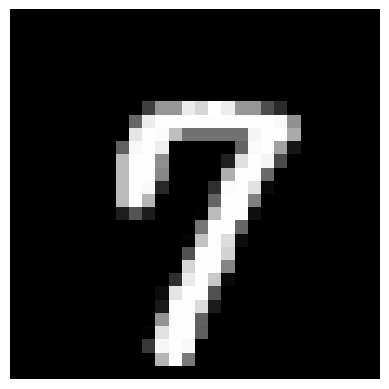

8 2


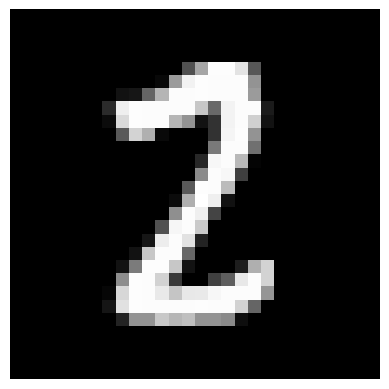

5 8


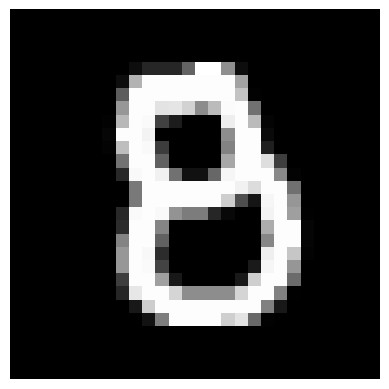

9 4


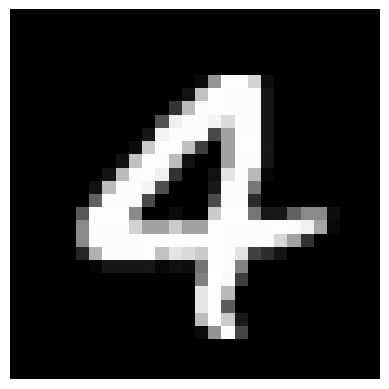

3 8


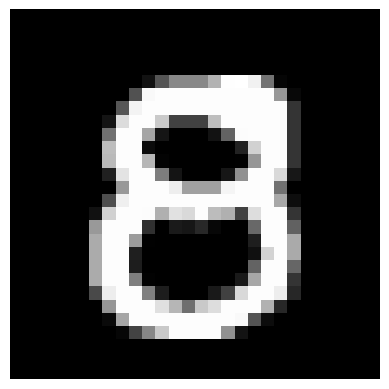

8 5


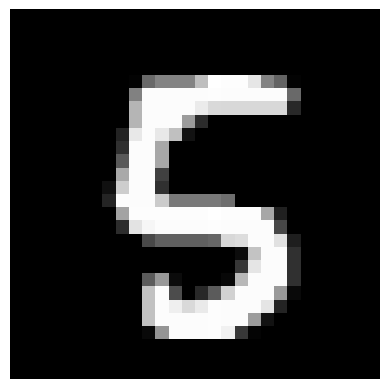

9 4


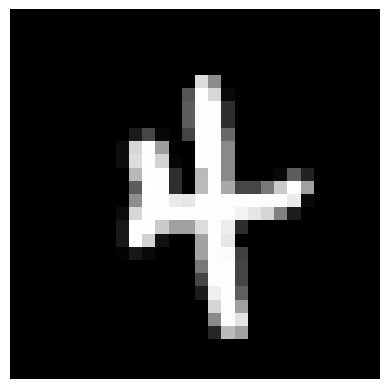

4 8


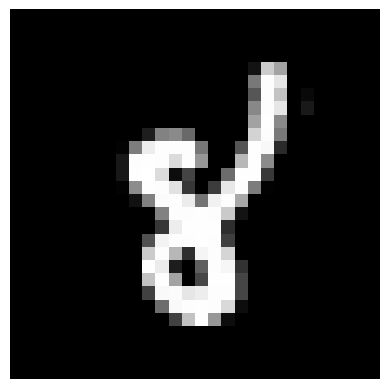

9 4


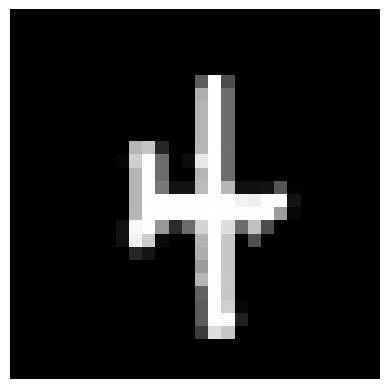

6 5


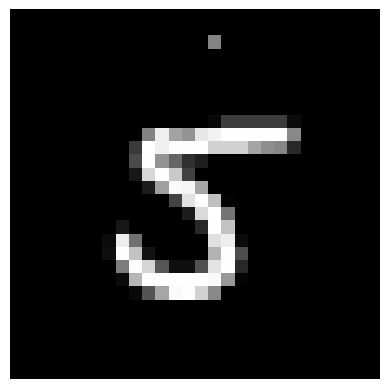

4 8


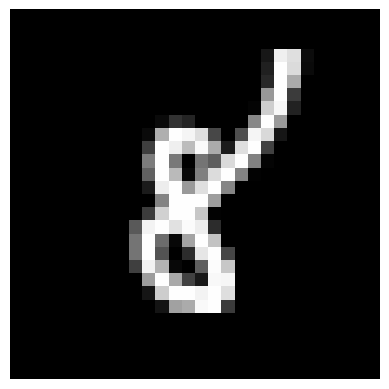

9 4


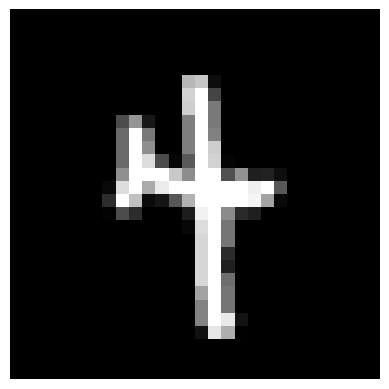

9 7


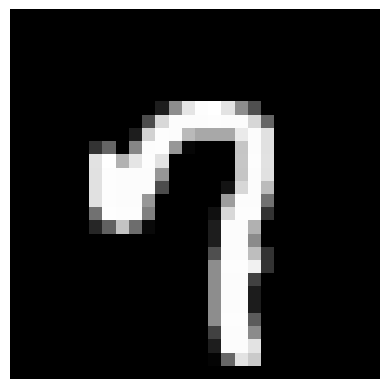

1 4


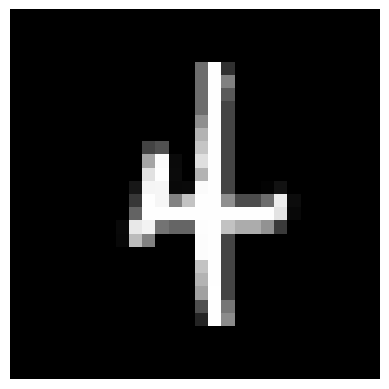

0 2


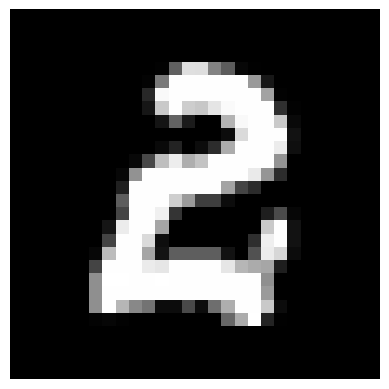

5 3


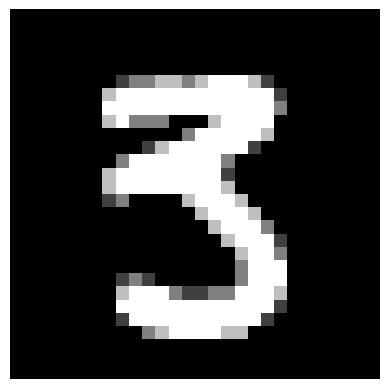

5 1


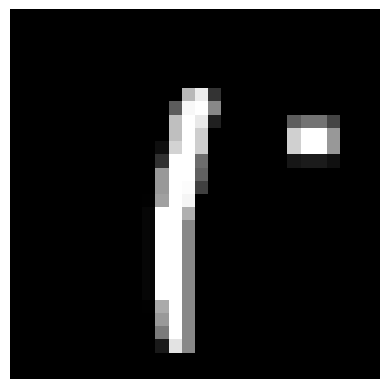

5 8


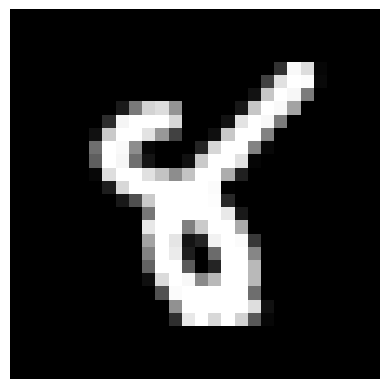

6 0


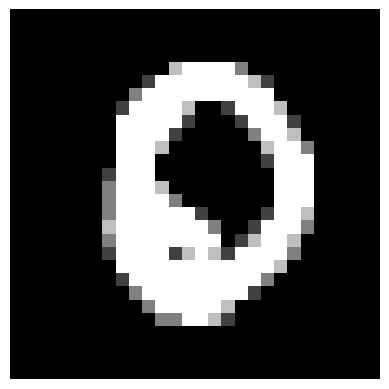

5 8


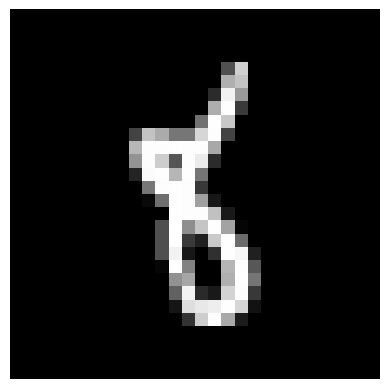

5 8


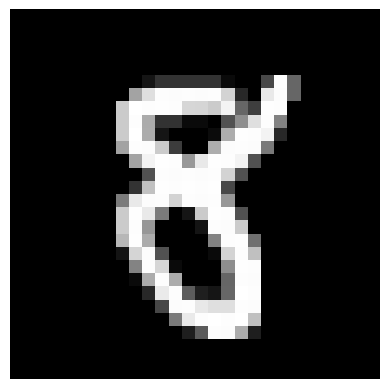

9 7


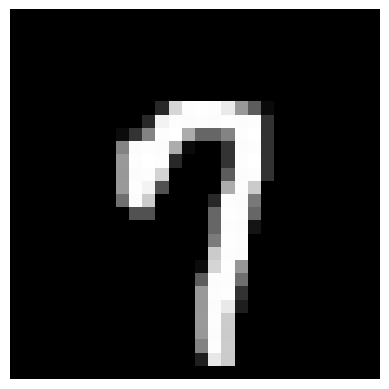

9 7


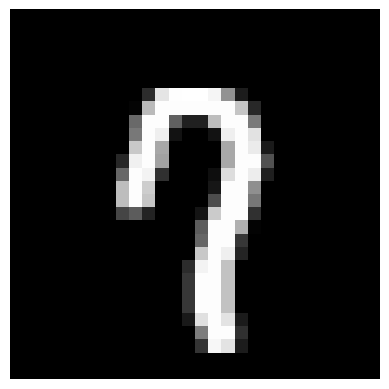

9 3


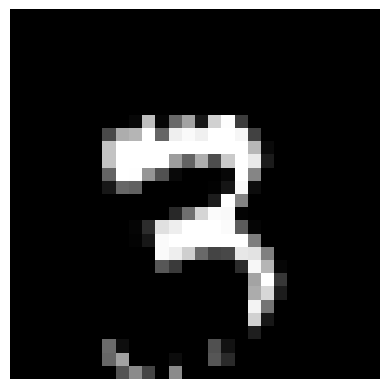

6 8


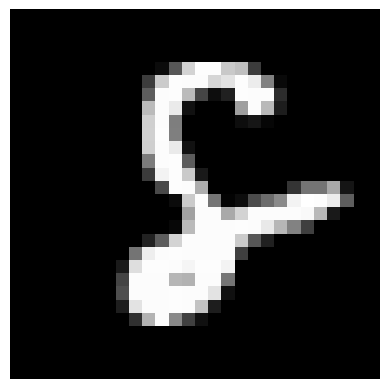

6 8


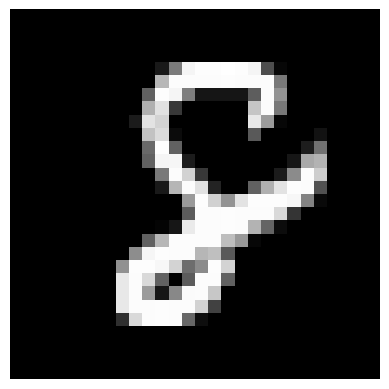

2 6


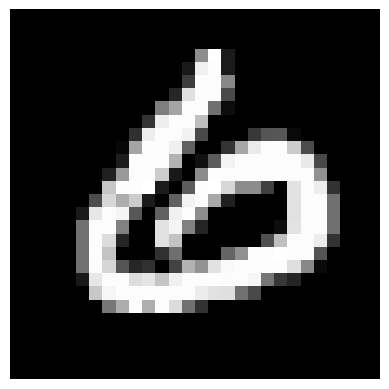

5 3


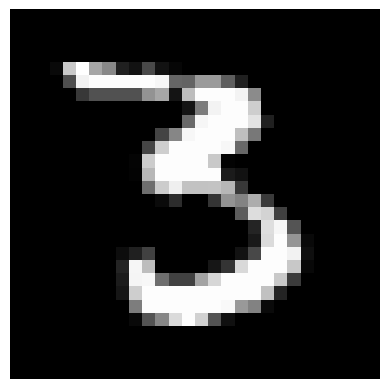

9 3


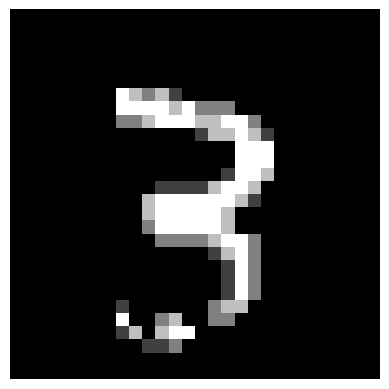

3 5


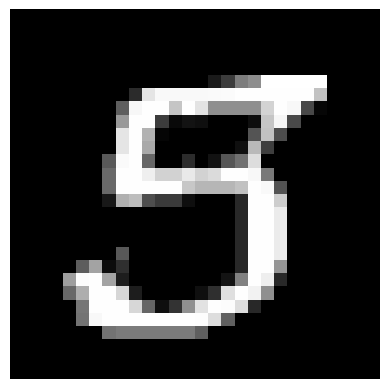

7 4


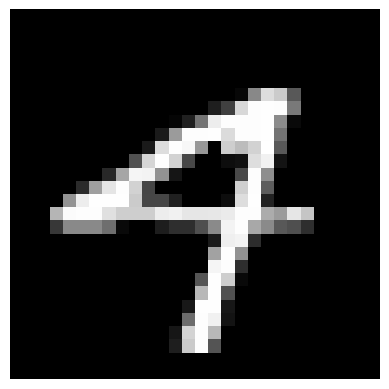

0 5


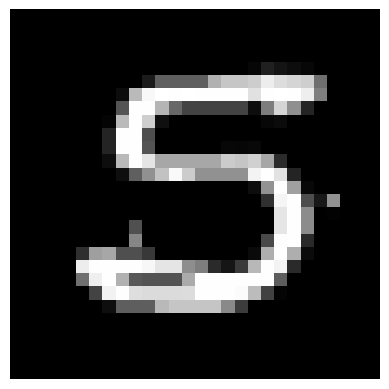

3 5


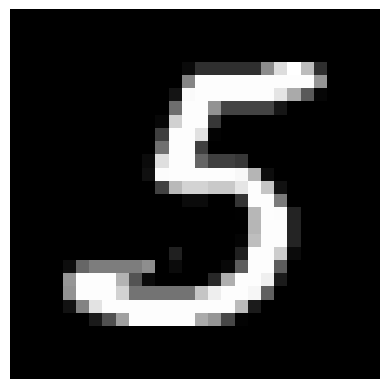

9 7


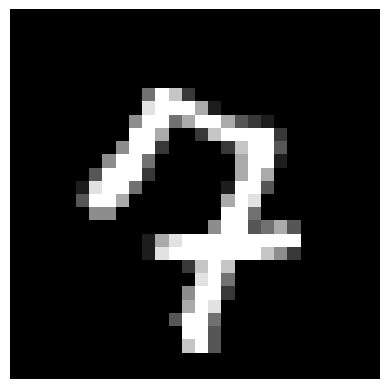

9 7


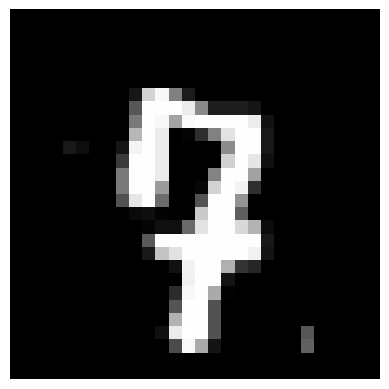

3 5


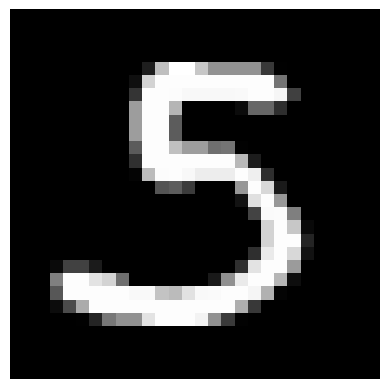

3 5


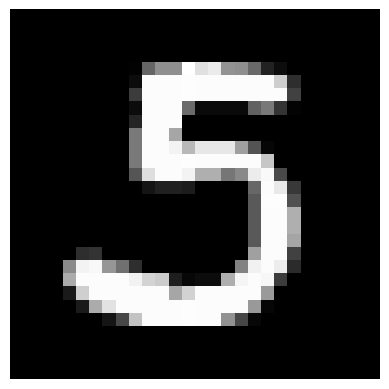

3 0


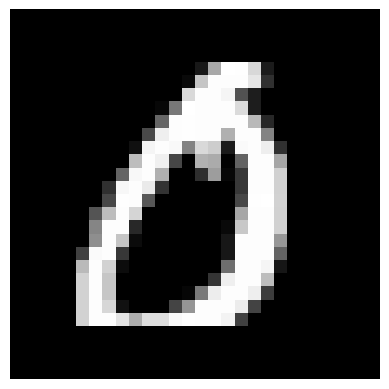

3 5


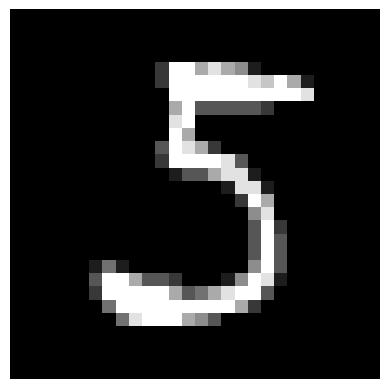

3 2


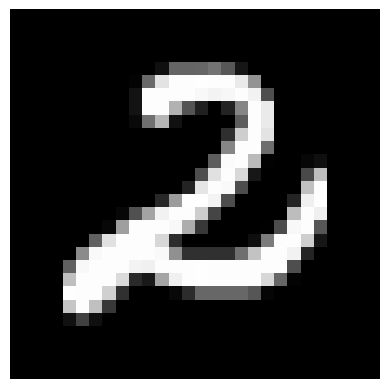

3 7


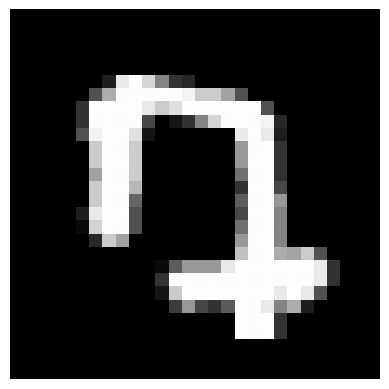

0 4


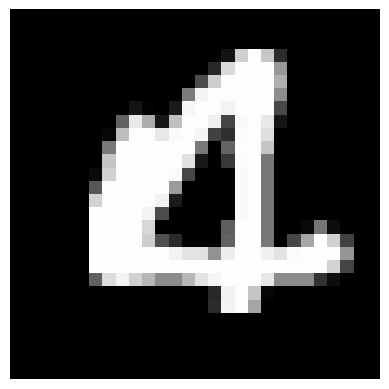

6 5


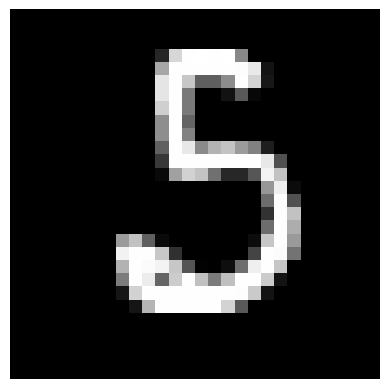

0 3


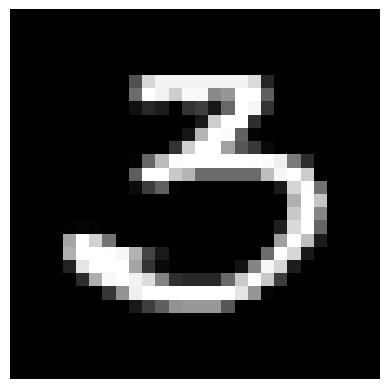

3 5


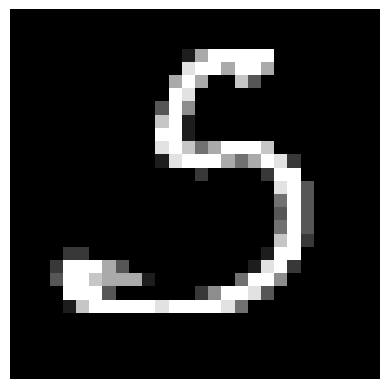

5 6


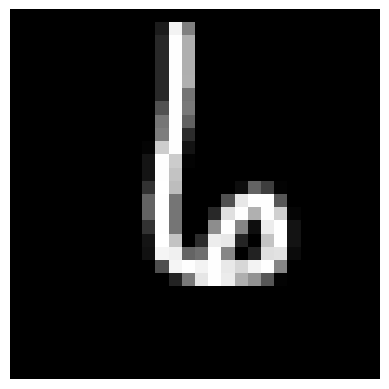

4 9


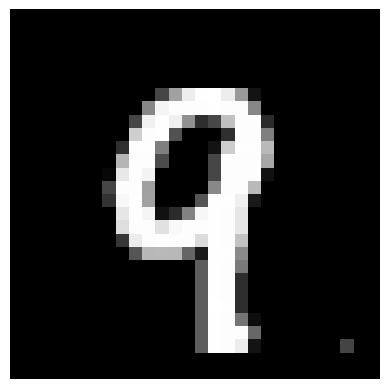

1 2


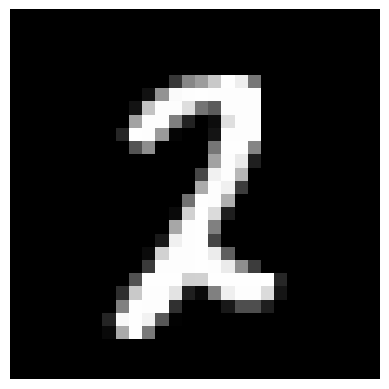

3 5


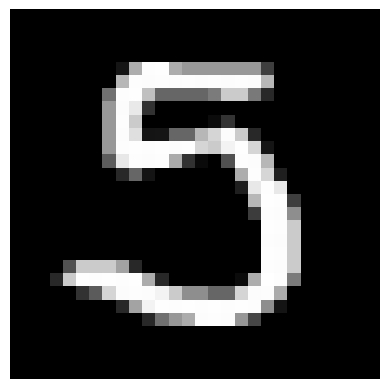

9 4


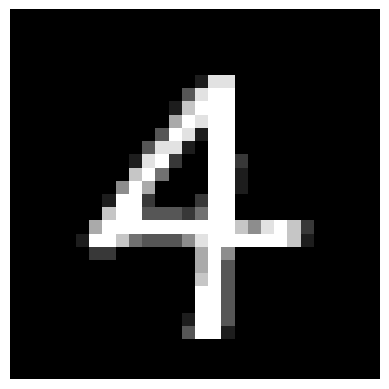

5 3


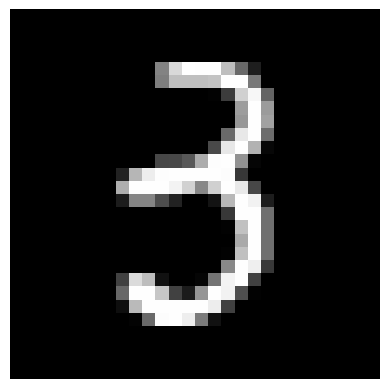

9 4


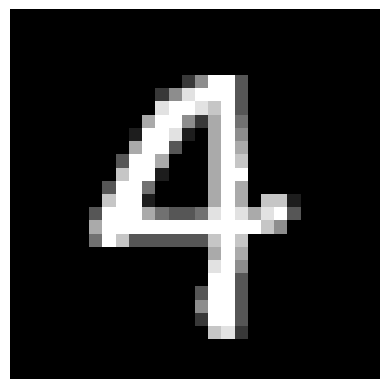

9 4


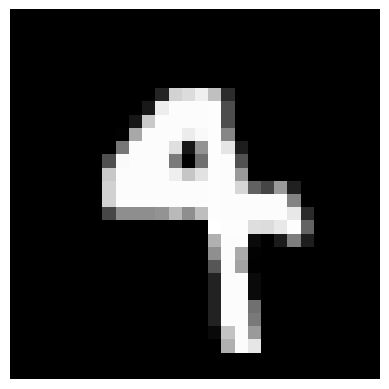

3 5


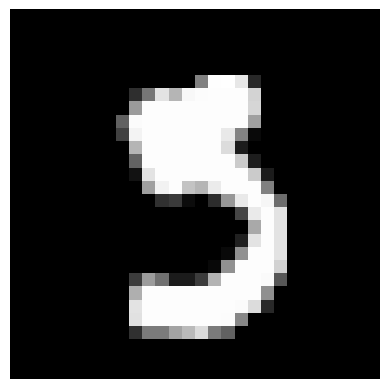

4 6


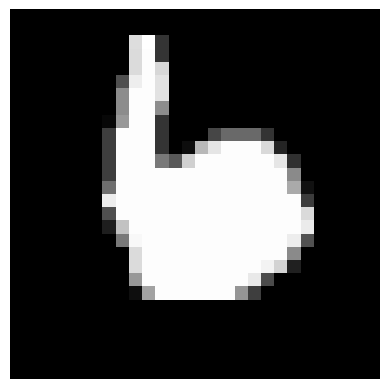

4 6


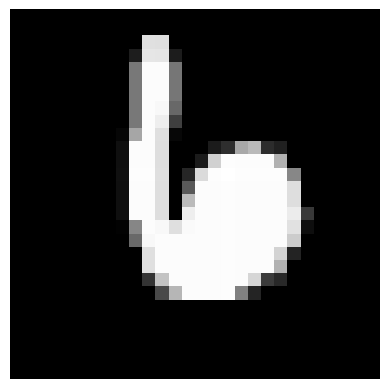

9 7


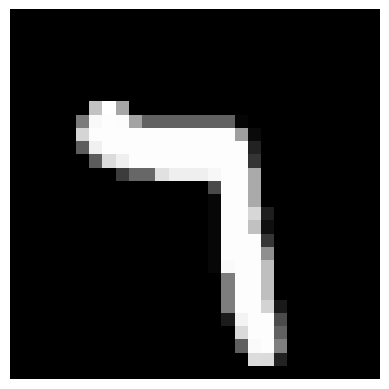

8 3


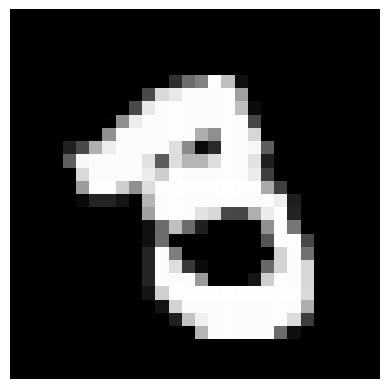

5 3


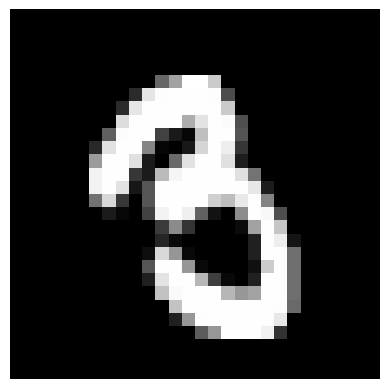

5 4


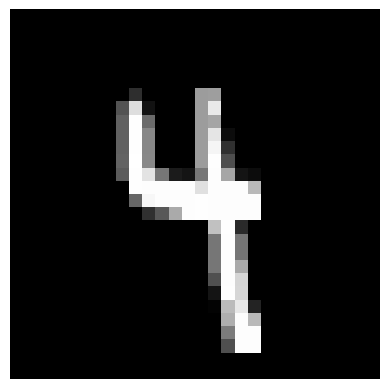

2 0


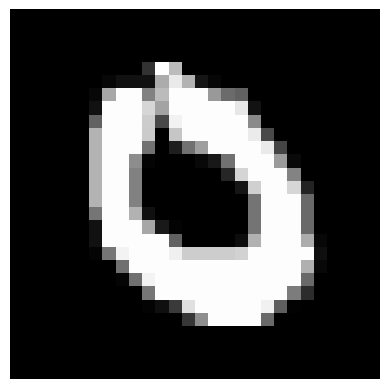

4 7


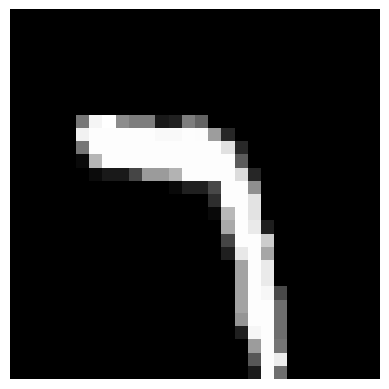

4 9


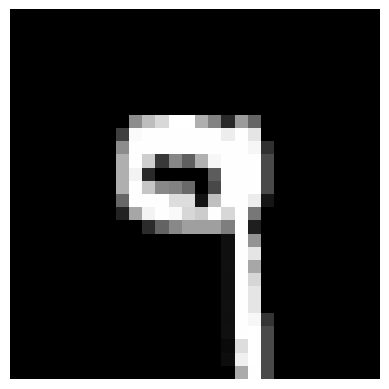

1 7


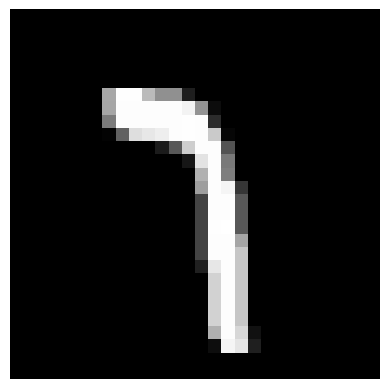

5 7


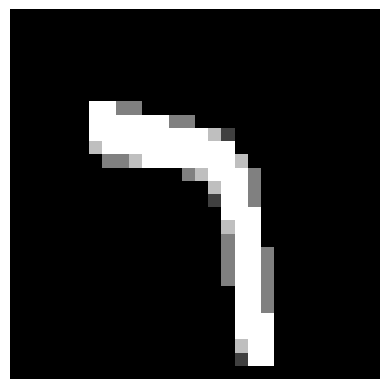

9 4


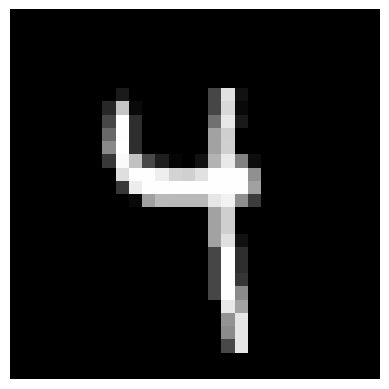

1 4


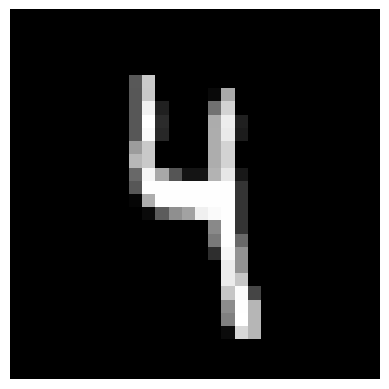

5 3


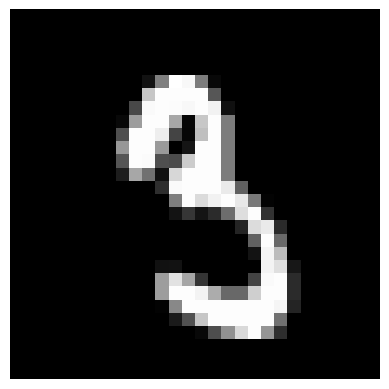

3 8


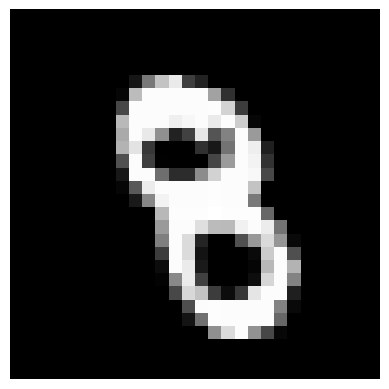

5 7


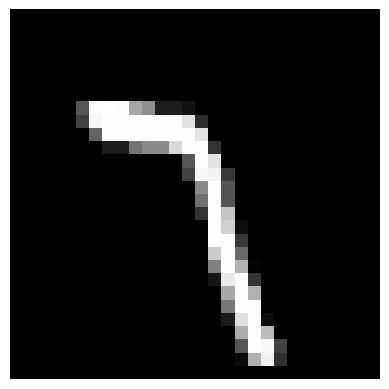

5 6


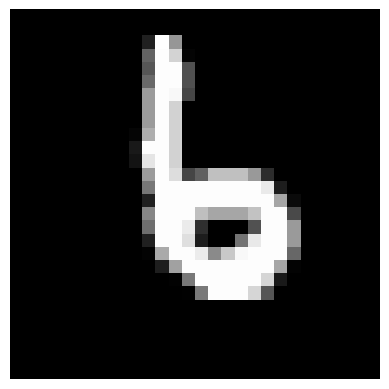

8 3


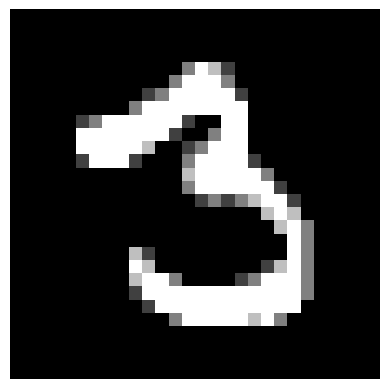

5 3


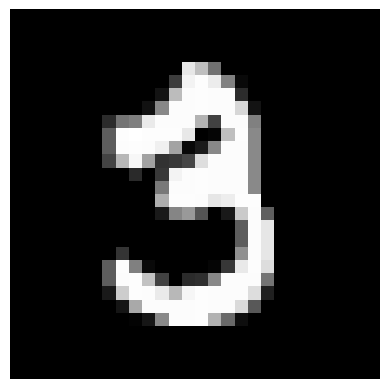

5 2


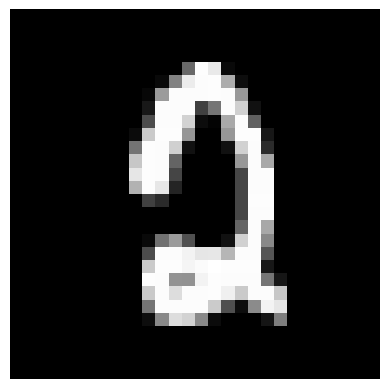

9 4


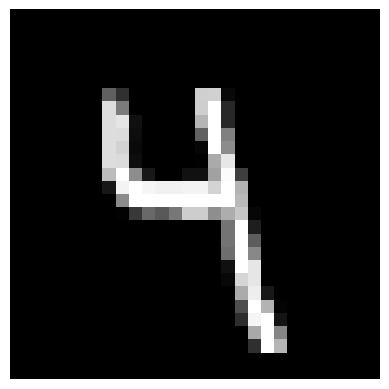

3 5


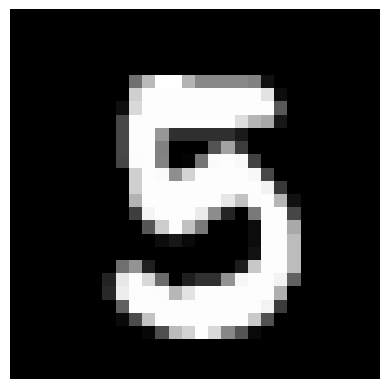

3 8


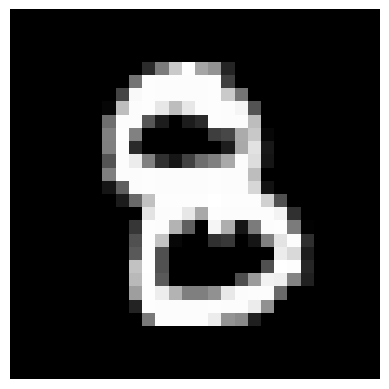

8 3


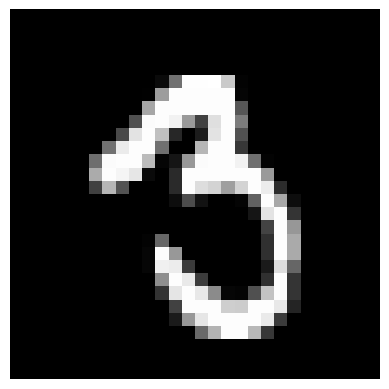

5 9


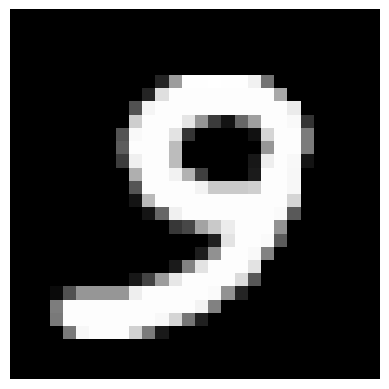

8 1


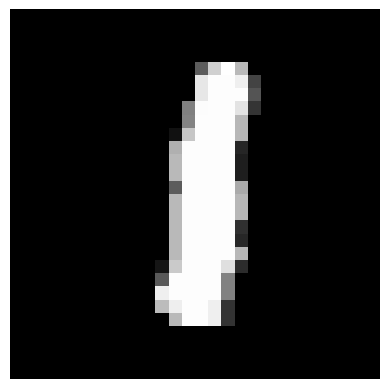

5 3


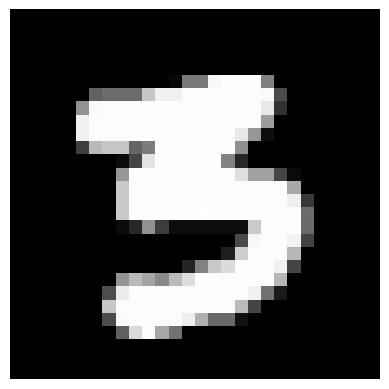

5 9


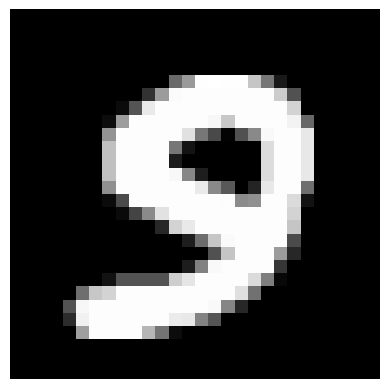

8 5


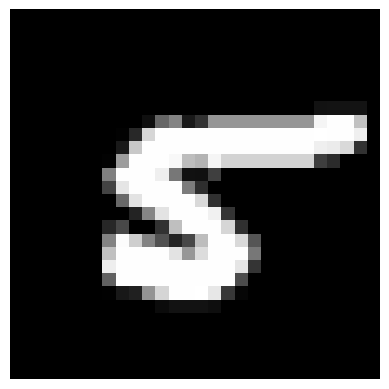

3 9


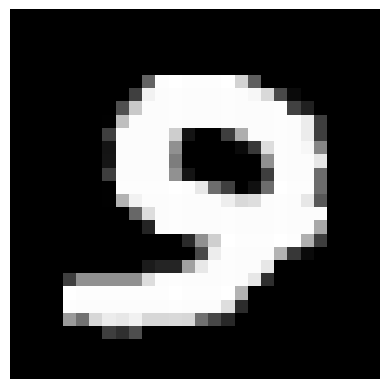

8 1


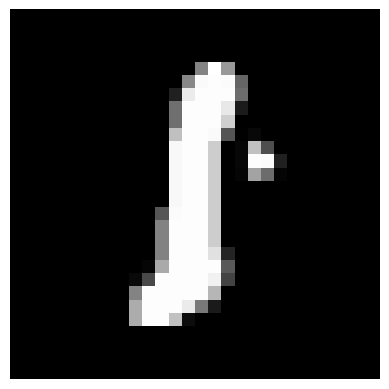

6 2


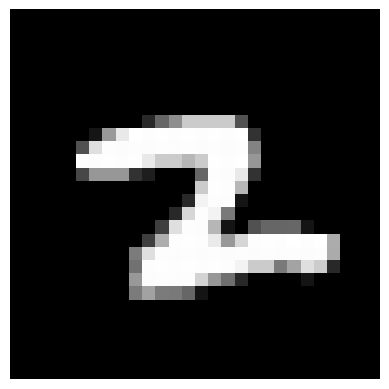

8 9


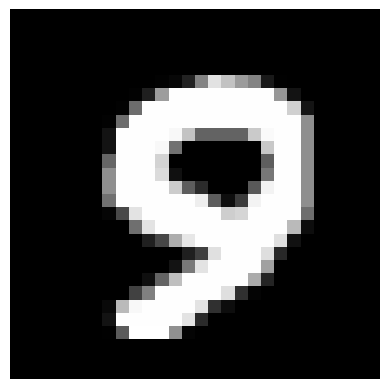

8 9


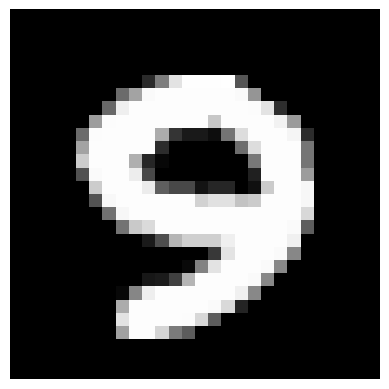

8 9


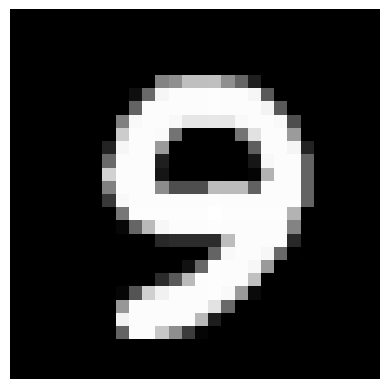

2 8


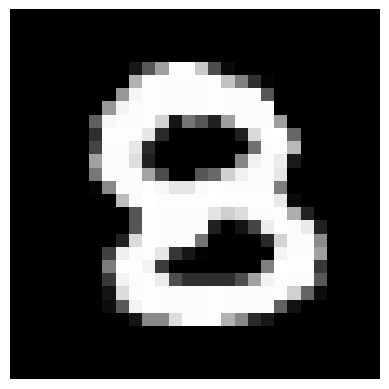

5 9


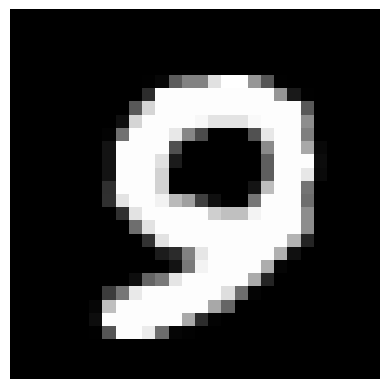

2 3


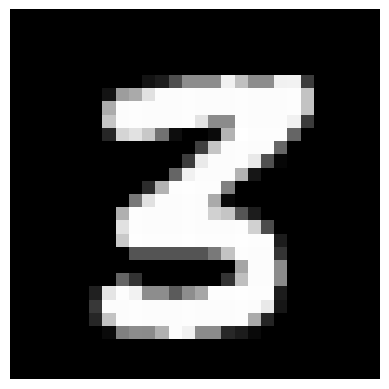

3 9


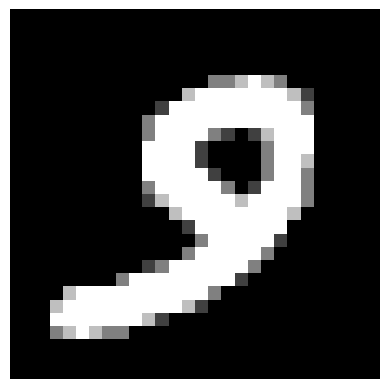

3 9


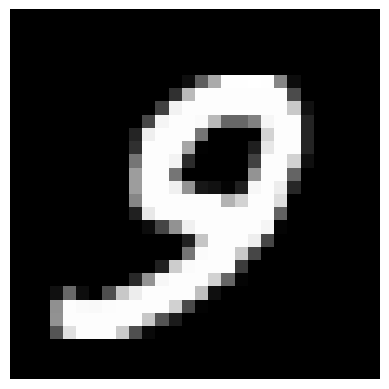

0 9


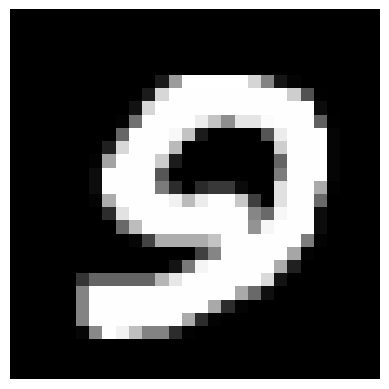

5 9


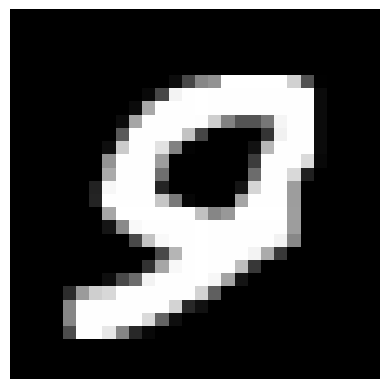

2 3


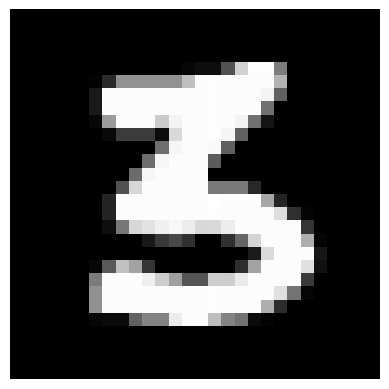

2 6


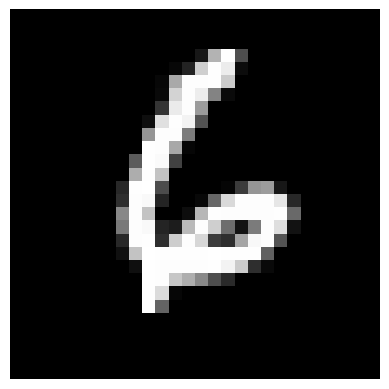

3 8


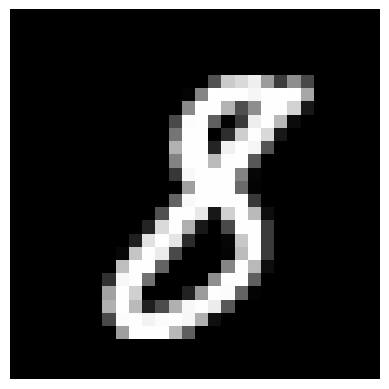

5 2


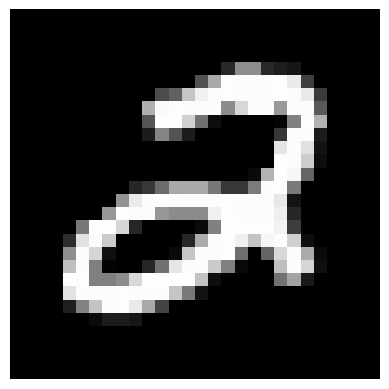

6 5


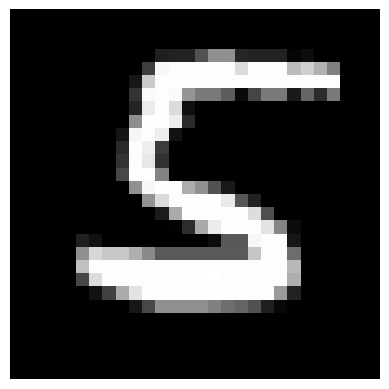

3 8


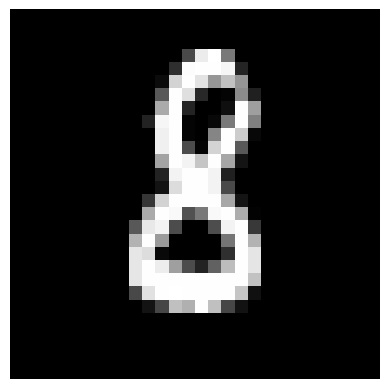

6 5


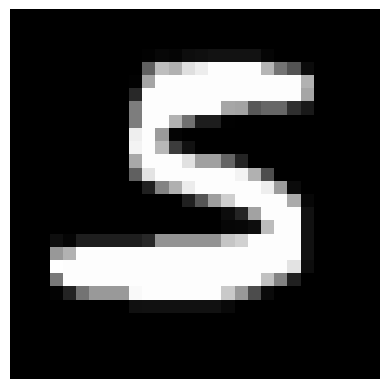

6 2


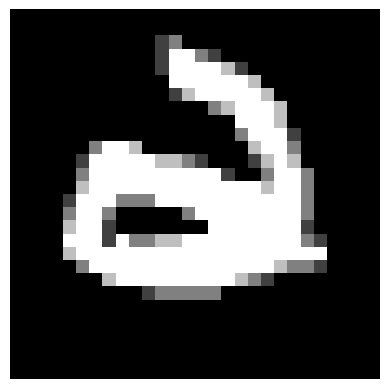

7 9


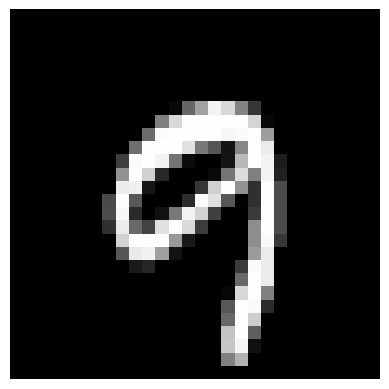

2 3


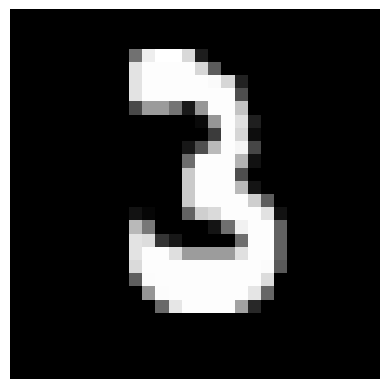

6 0


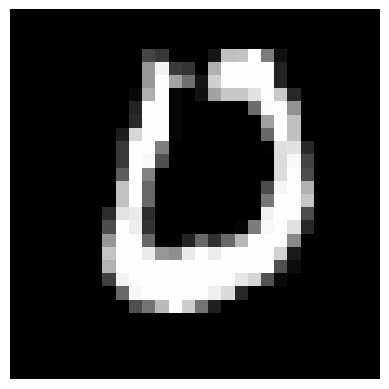

8 3


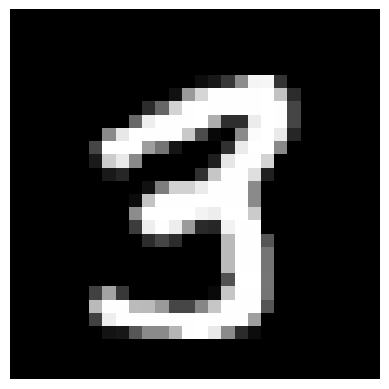

7 9


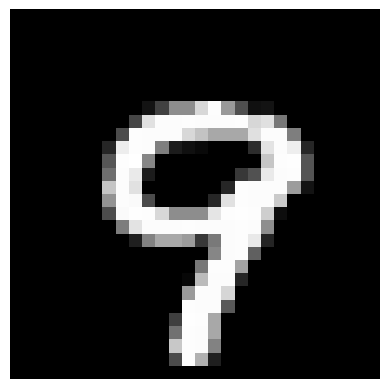

9 7


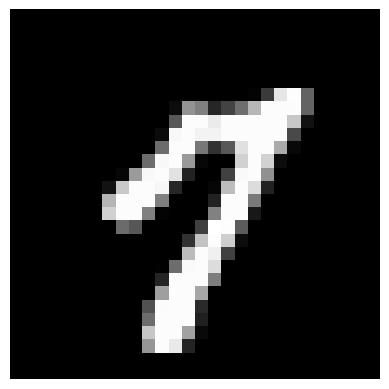

0 2


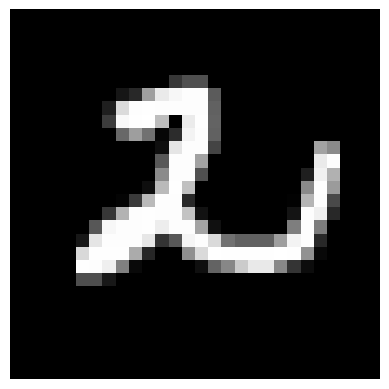

0 9


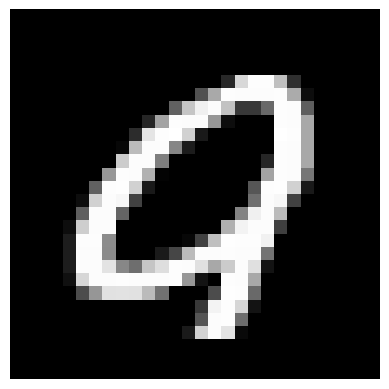

5 3


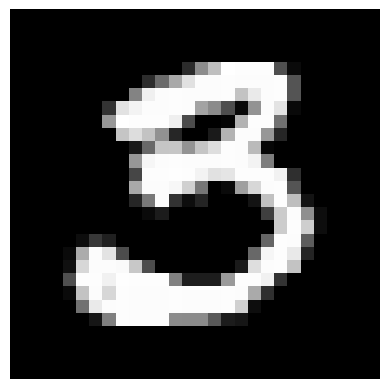

0 3


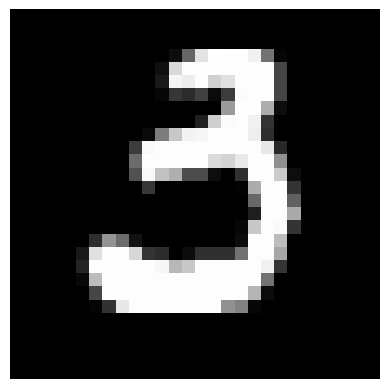

2 1


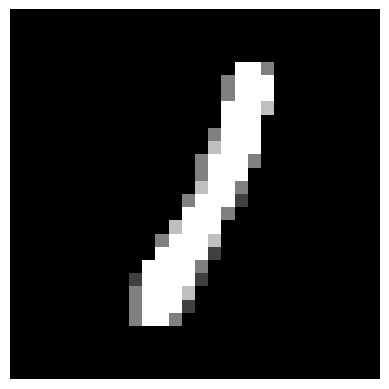

4 5


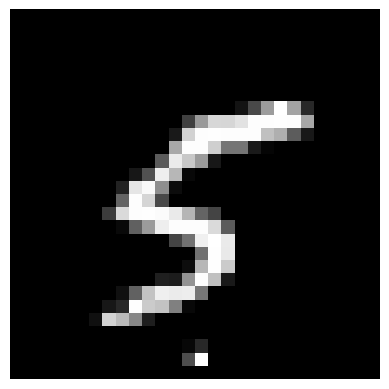

9 3


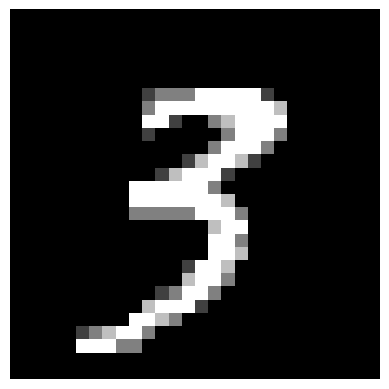

7 3


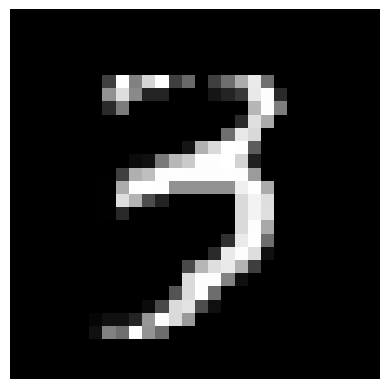

9 4


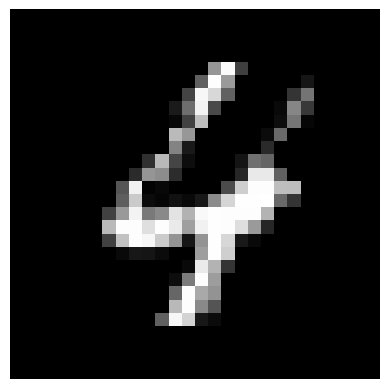

9 8


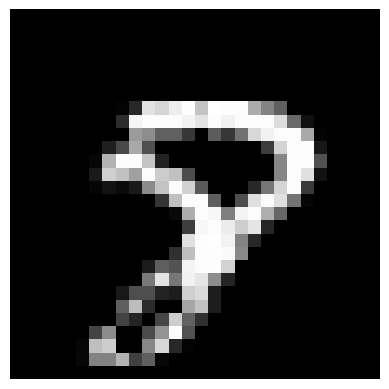

7 1


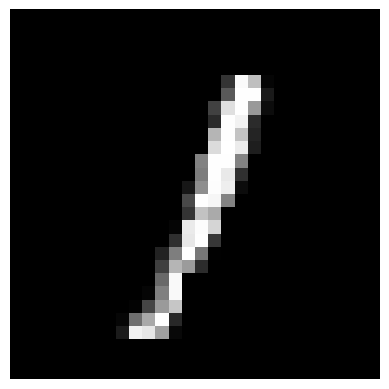

2 6


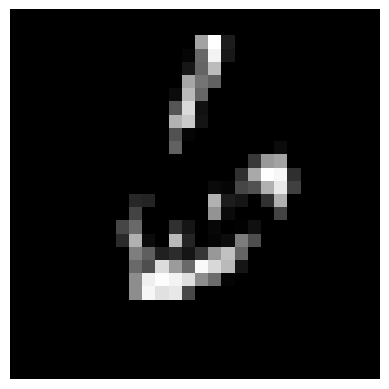

3 9


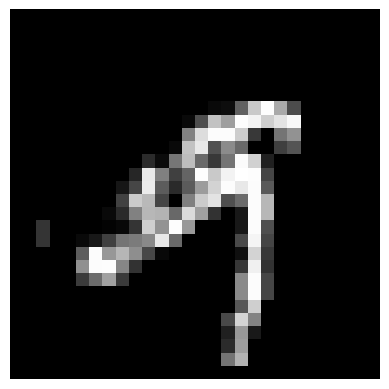

3 7


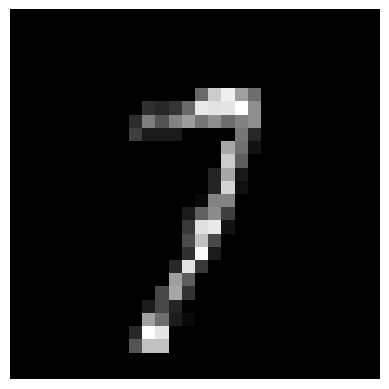

4 3


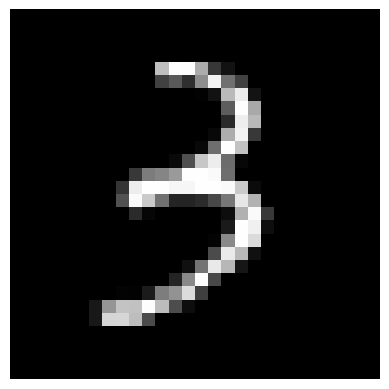

7 3


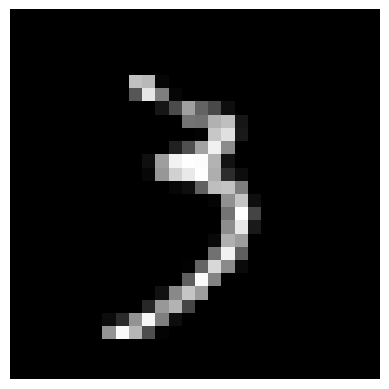

4 9


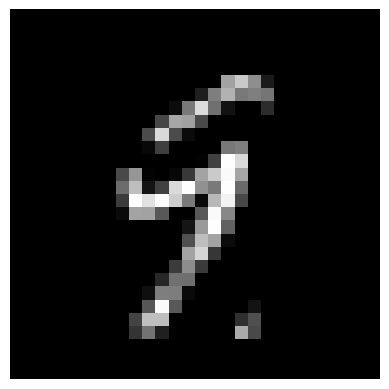

9 3


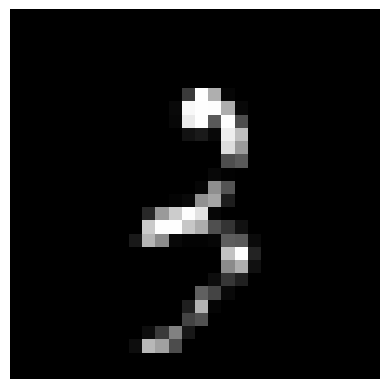

7 9


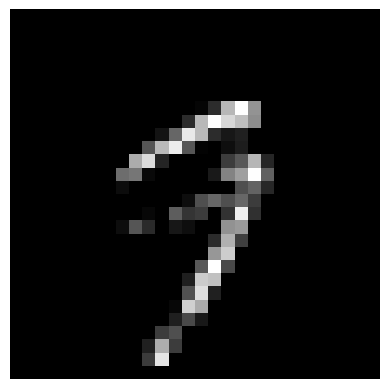

9 1


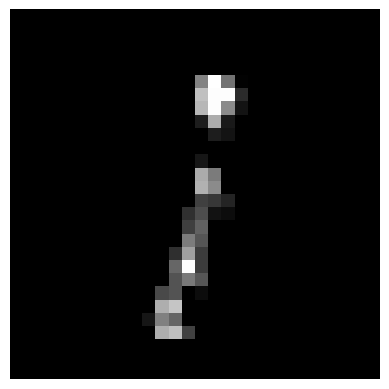

4 2


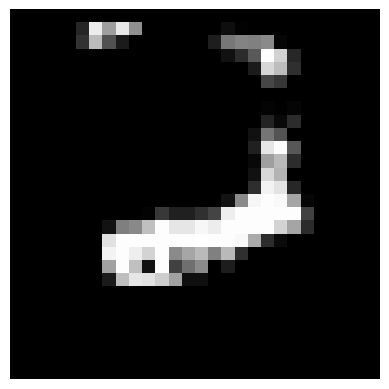

4 7


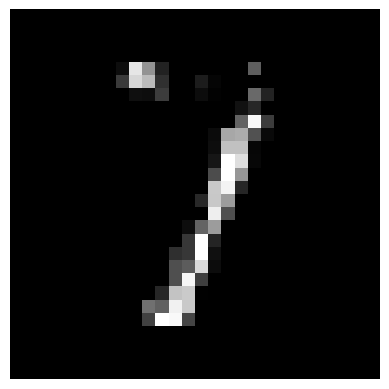

2 6


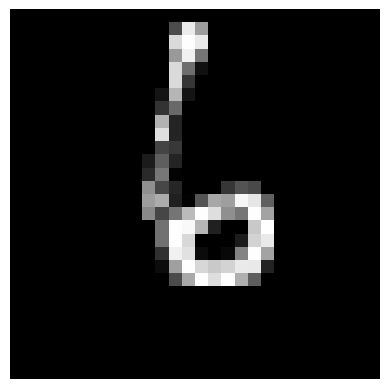

7 0


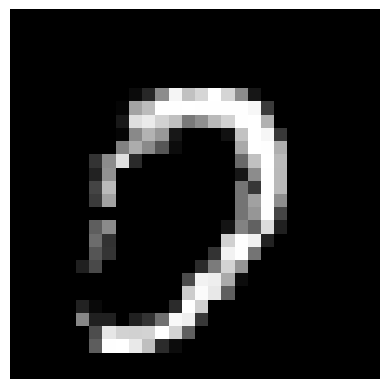

3 5


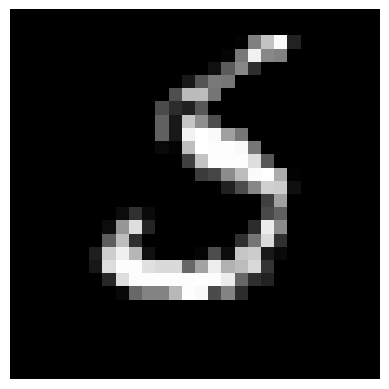

7 8


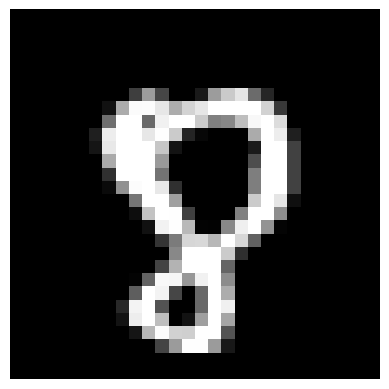

7 5


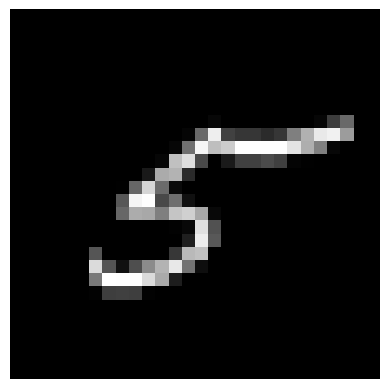

7 6


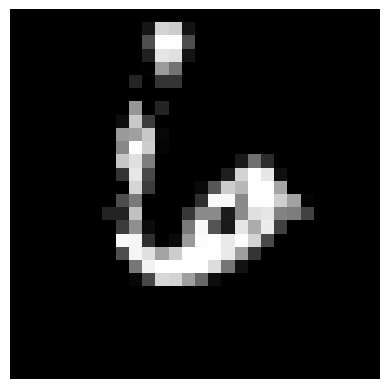

0 2


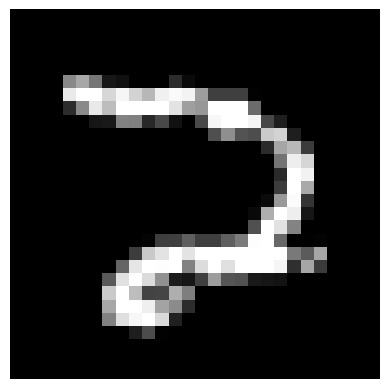

9 8


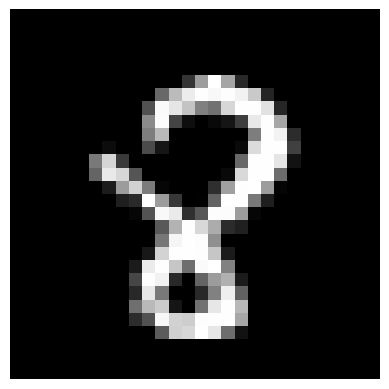

3 1


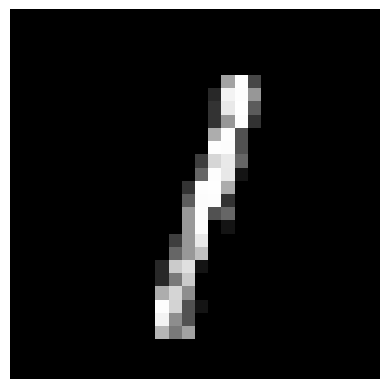

7 8


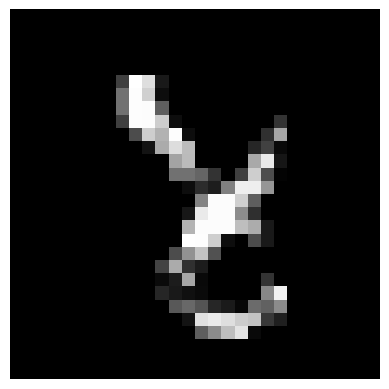

5 9


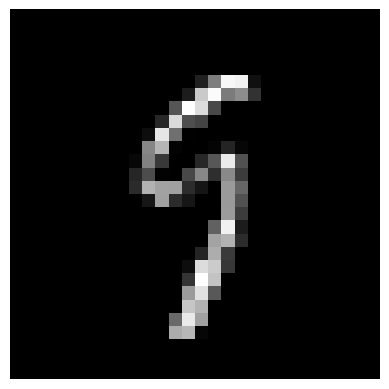

5 8


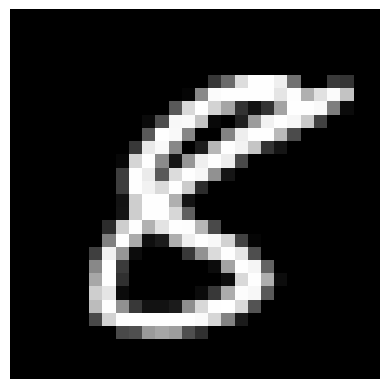

5 0


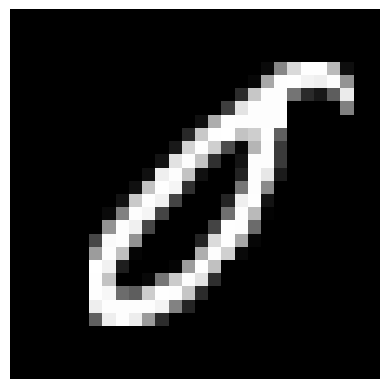

9 7


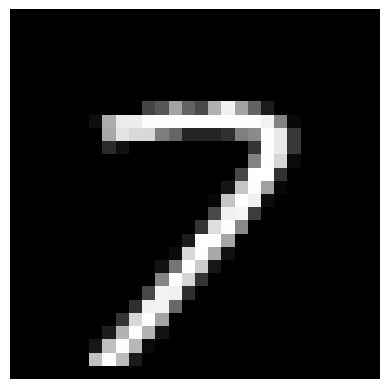

5 0


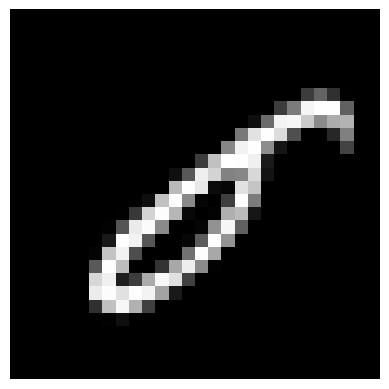

5 8


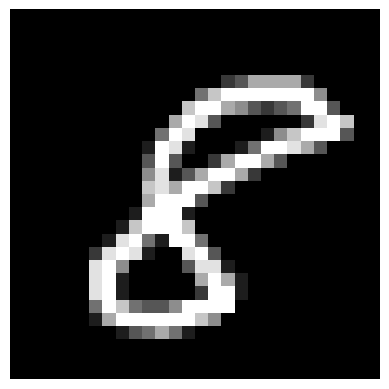

9 7


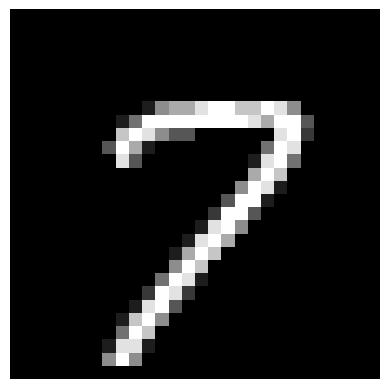

8 1


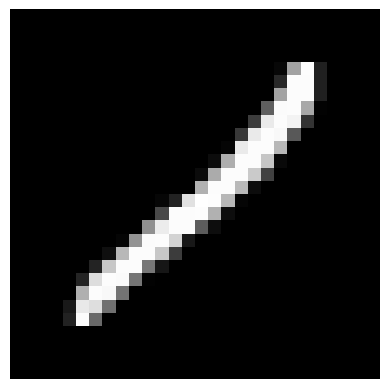

9 5


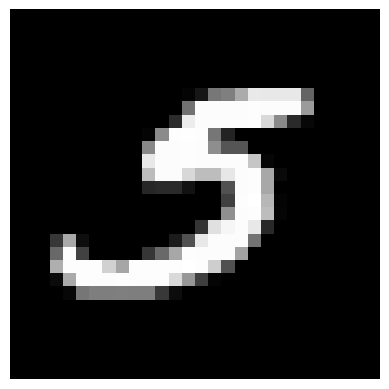

1 2


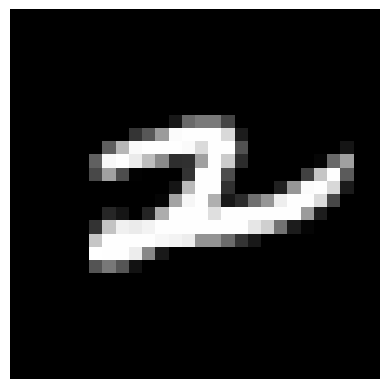

8 7


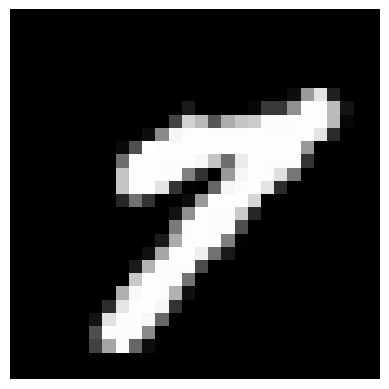

0 9


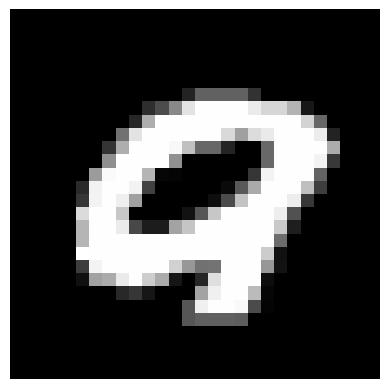

9 7


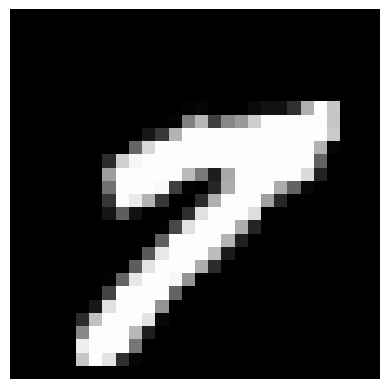

2 1


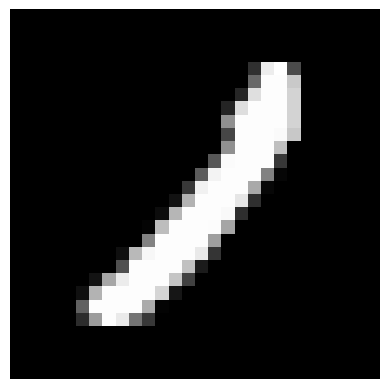

8 2


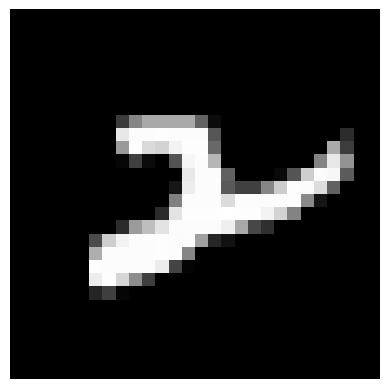

4 5


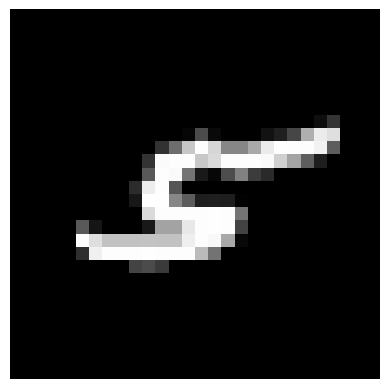

8 9


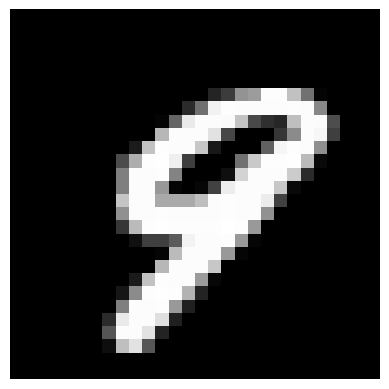

6 4


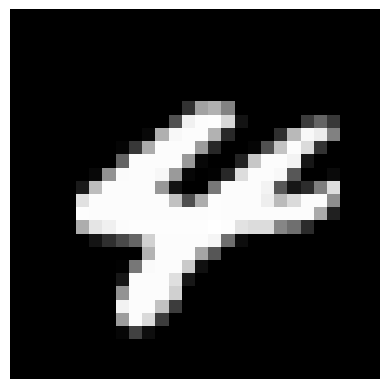

6 4


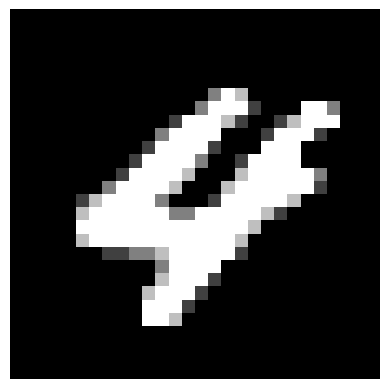

2 7


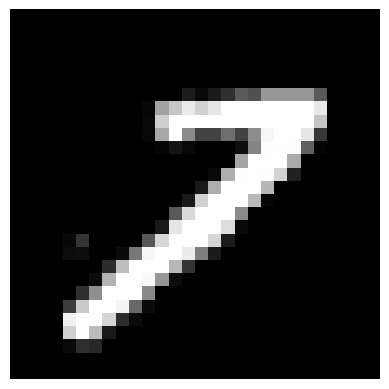

1 5


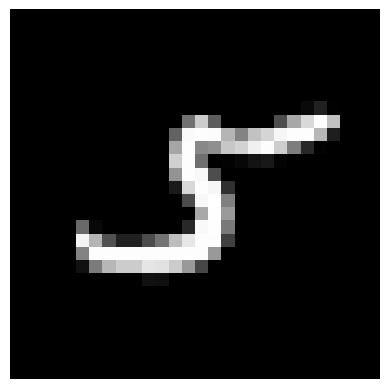

2 1


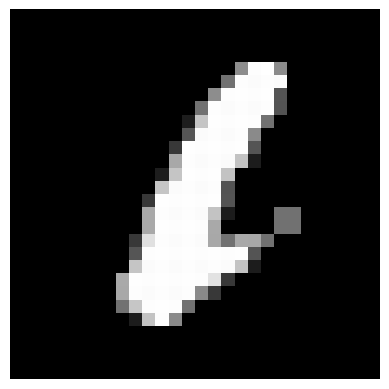

4 2


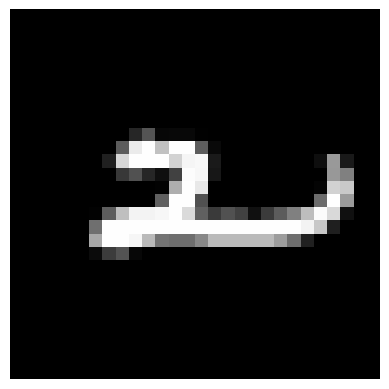

8 9


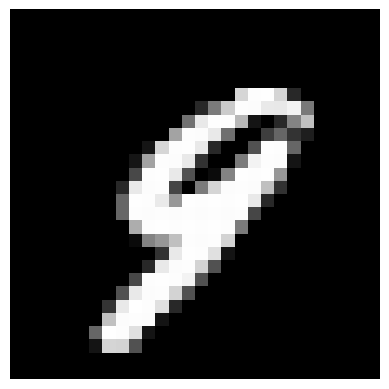

7 2


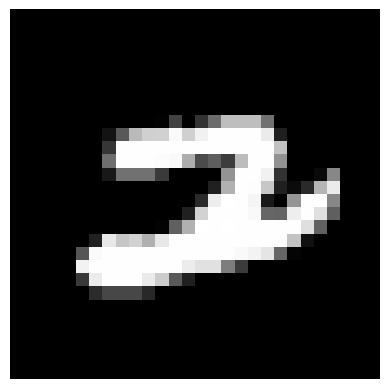

4 6


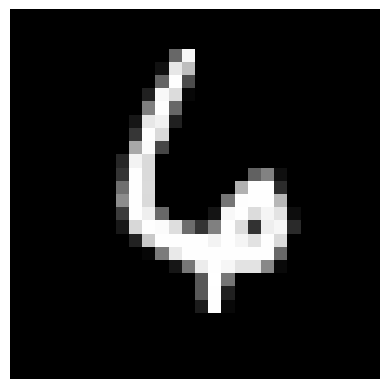

9 4


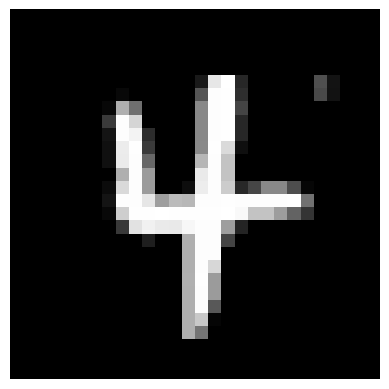

5 3


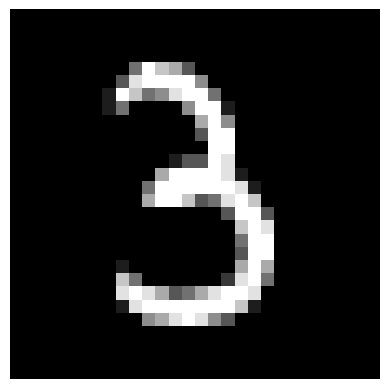

0 4


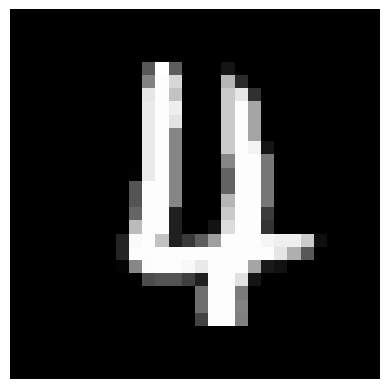

8 5


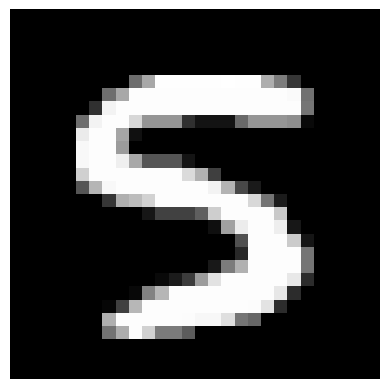

6 2


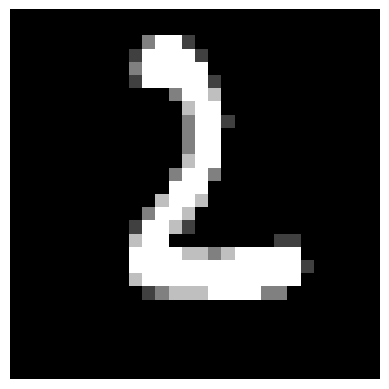

5 8


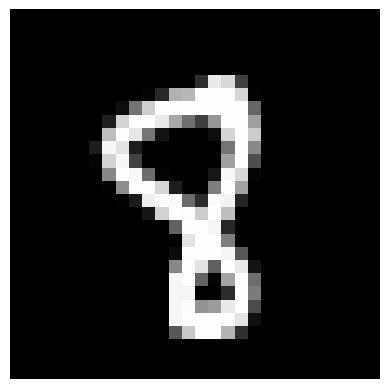

6 2


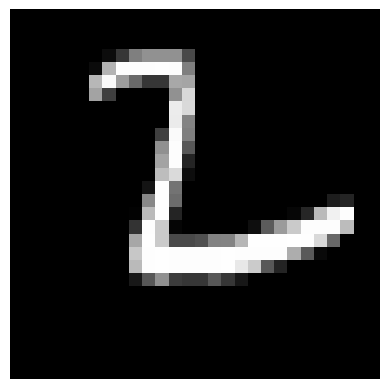

7 8


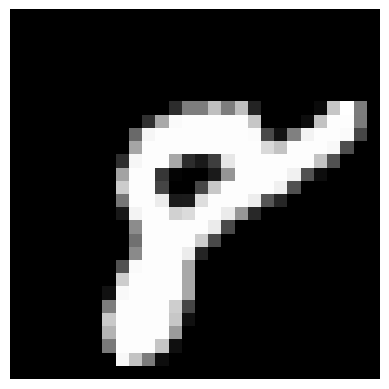

8 5


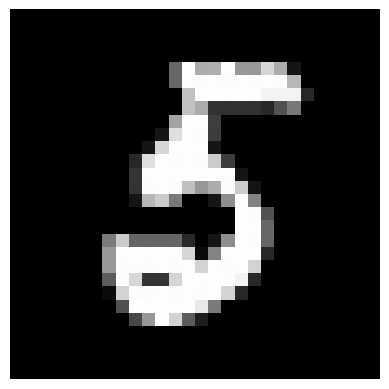

9 4


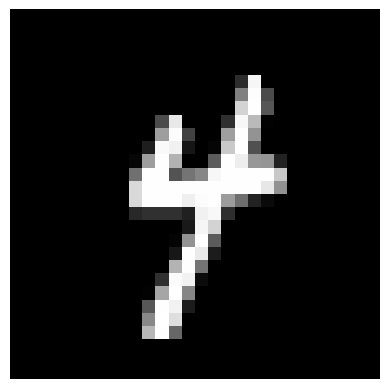

3 5


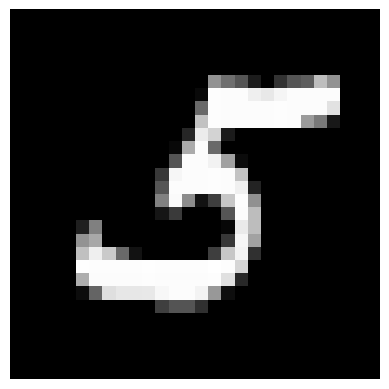

5 8


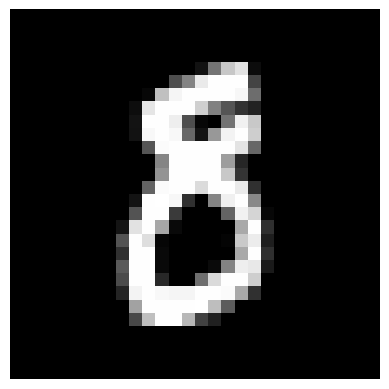

7 9


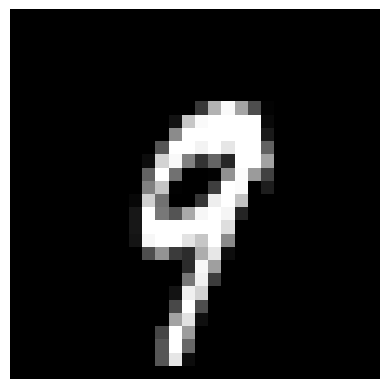

5 0


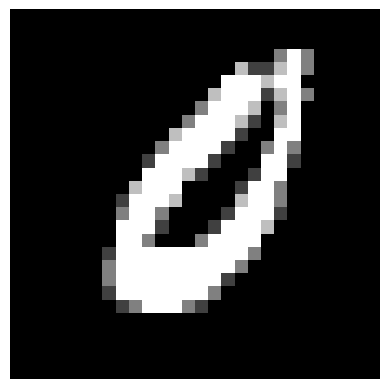

8 1


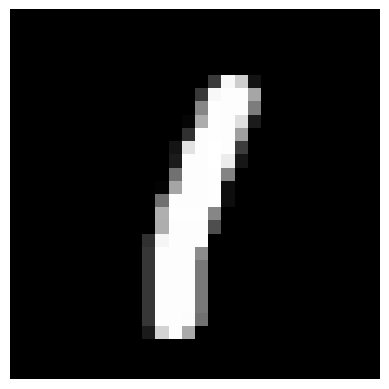

7 2


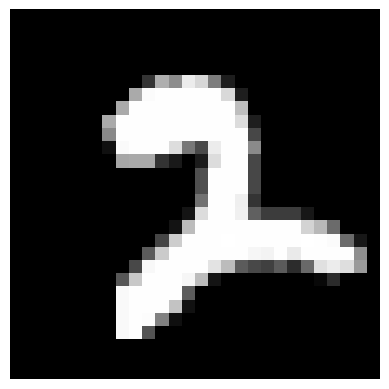

7 9


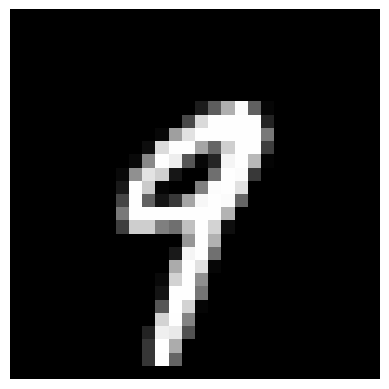

8 3


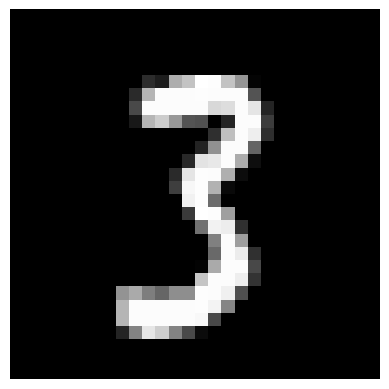

9 8


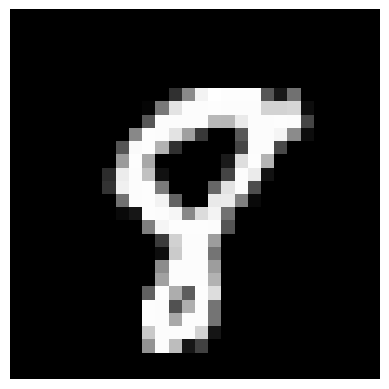

3 9


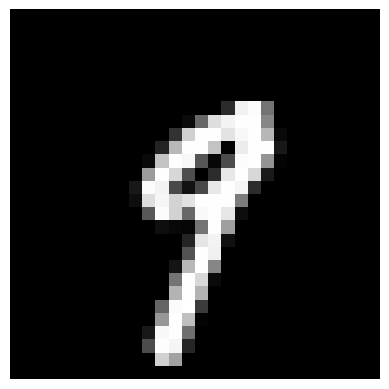

7 8


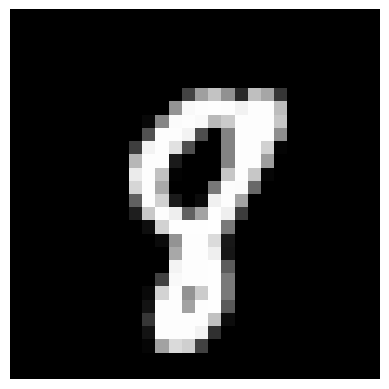

9 3


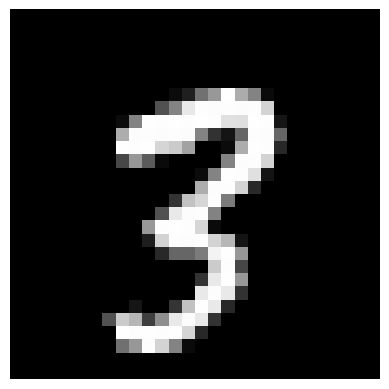

7 5


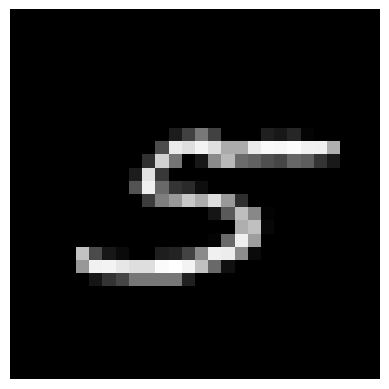

3 8


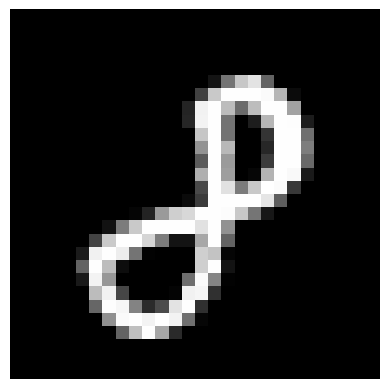

9 8


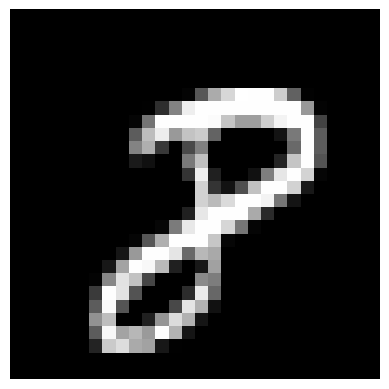

9 2


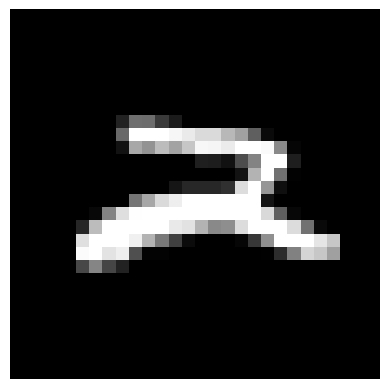

3 8


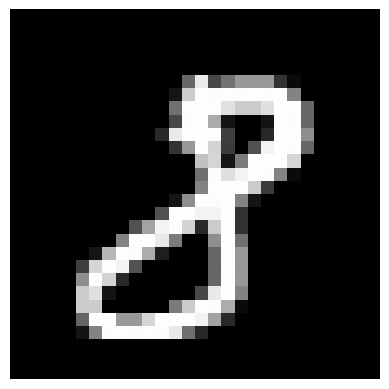

8 5


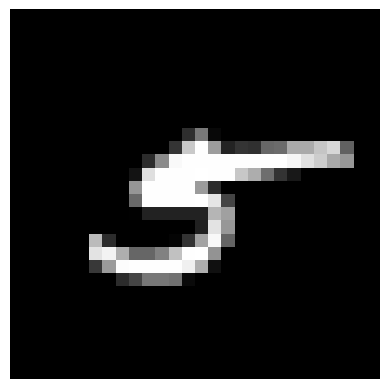

2 1


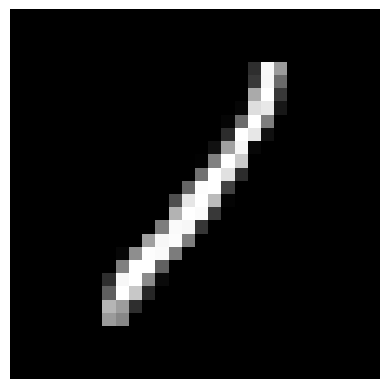

4 2


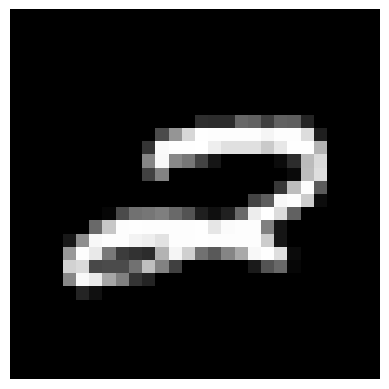

8 1


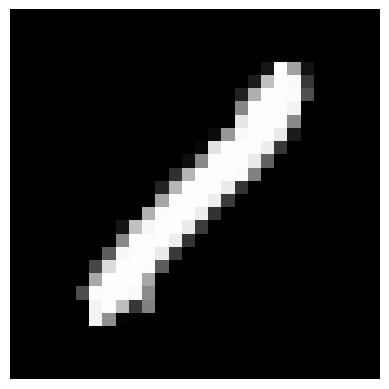

3 8


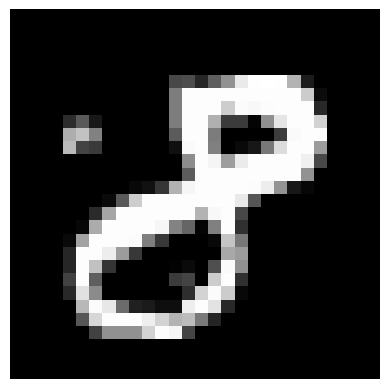

8 5


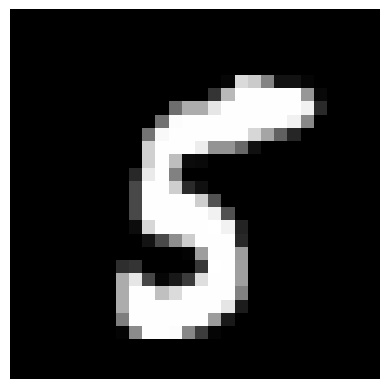

2 8


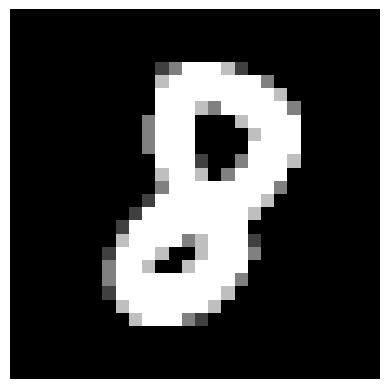

8 3


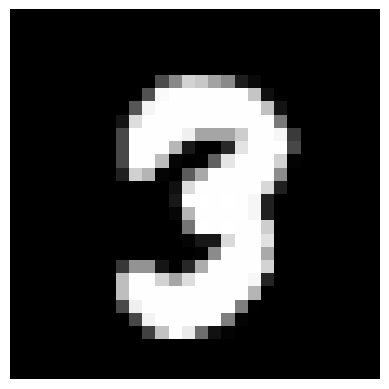

9 4


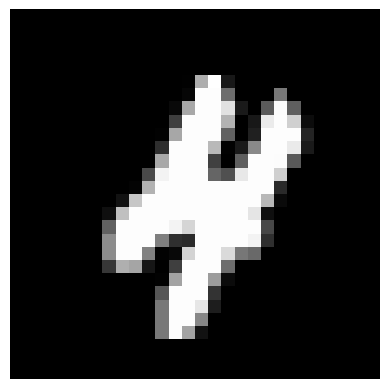

8 3


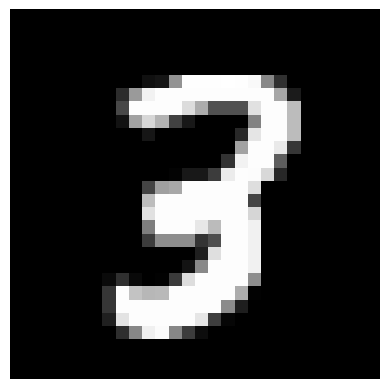

3 8


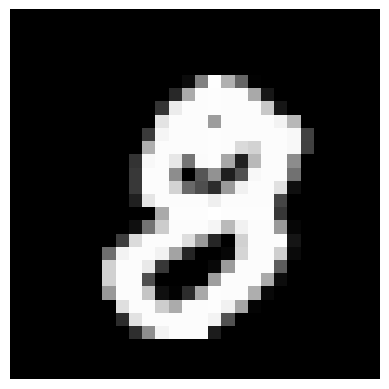

4 9


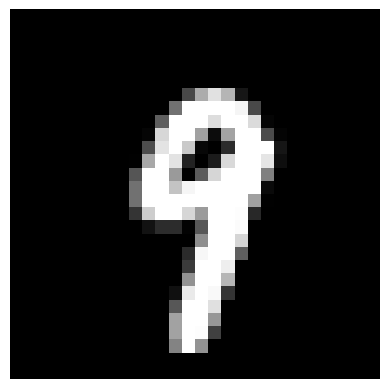

9 4


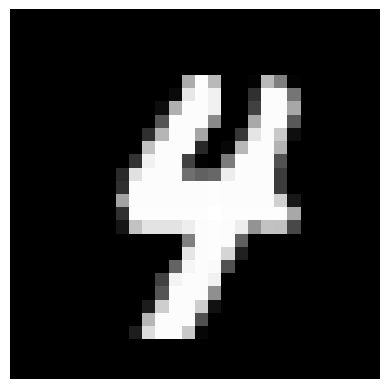

9 4


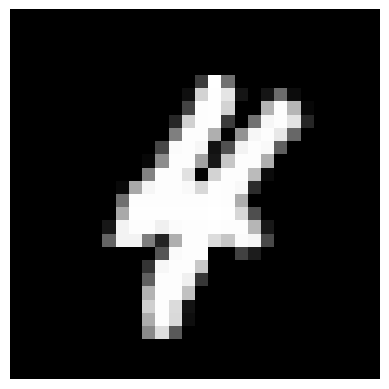

1 4


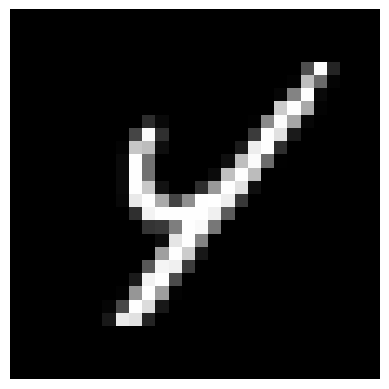

5 0


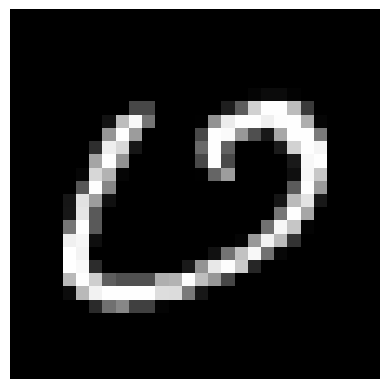

3 2


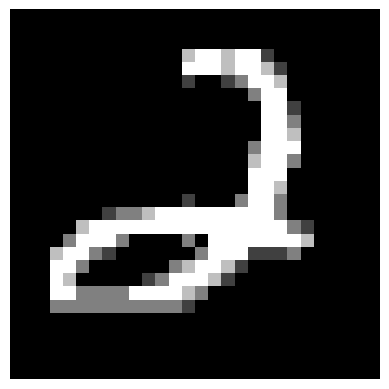

9 7


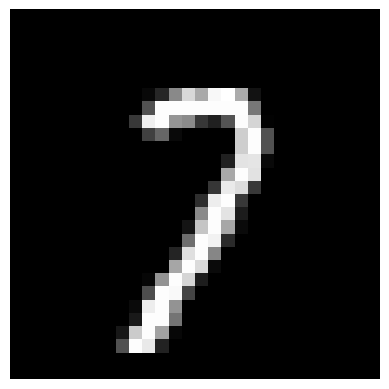

9 4


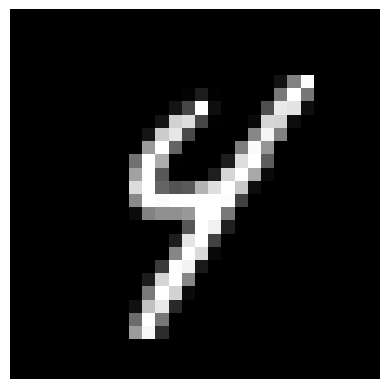

1 7


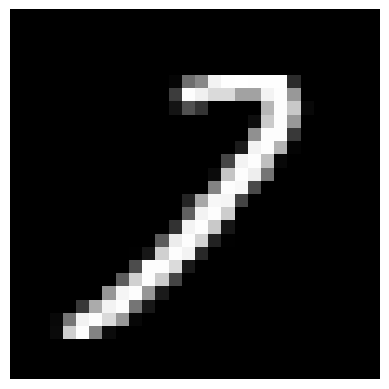

8 4


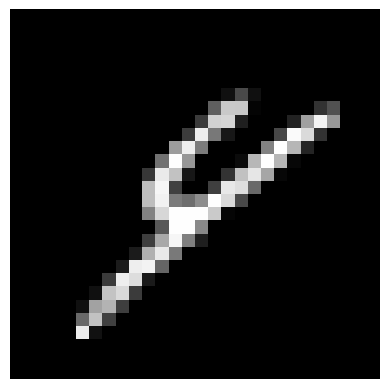

4 6


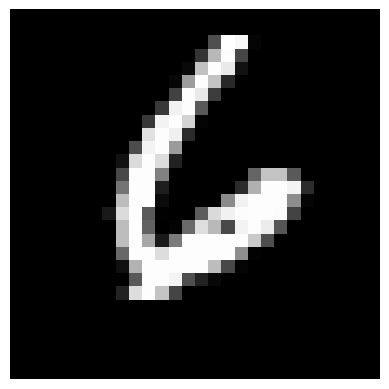

4 8


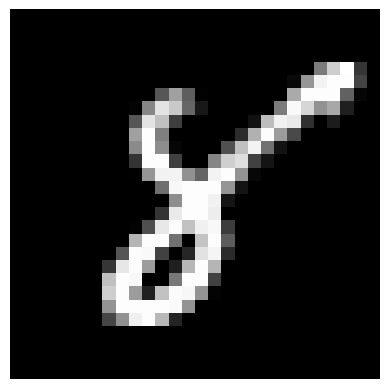

6 5


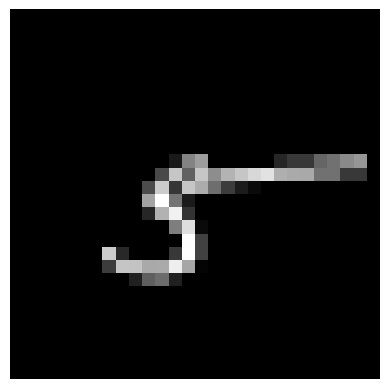

4 5


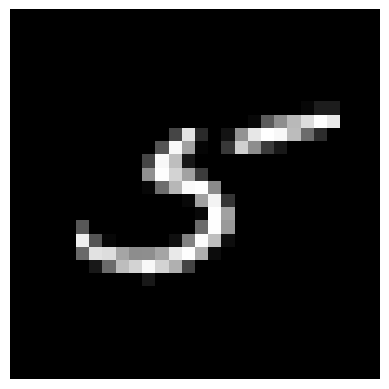

3 8


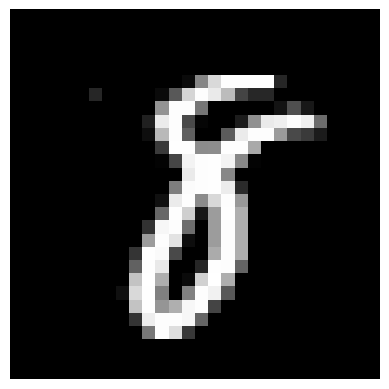

5 9


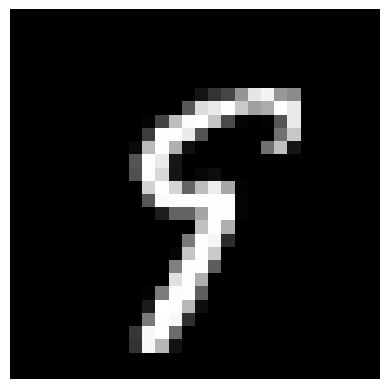

9 2


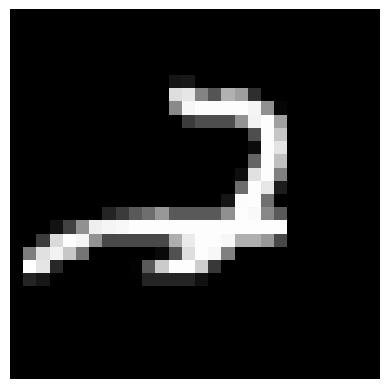

8 4


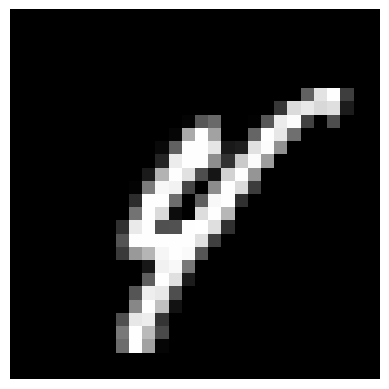

2 3


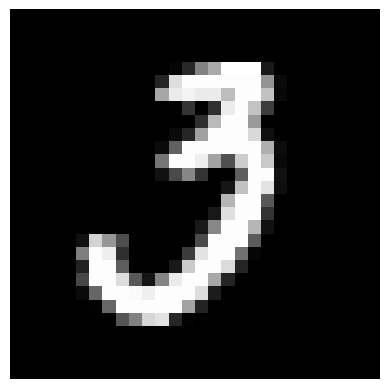

4 9


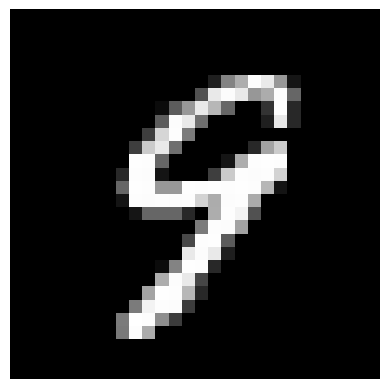

3 5


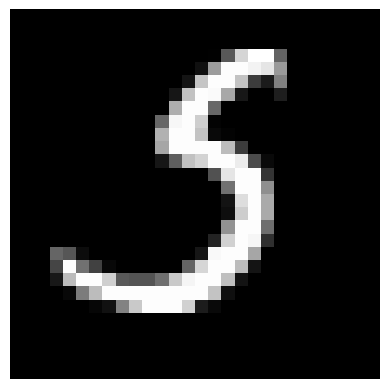

3 5


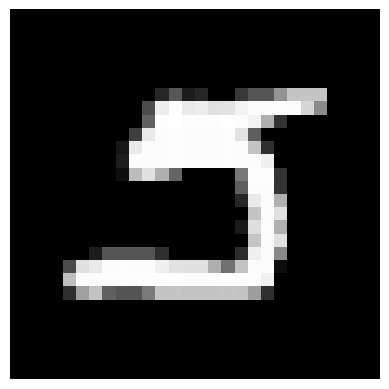

8 2


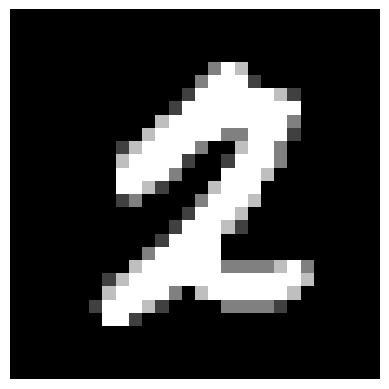

4 5


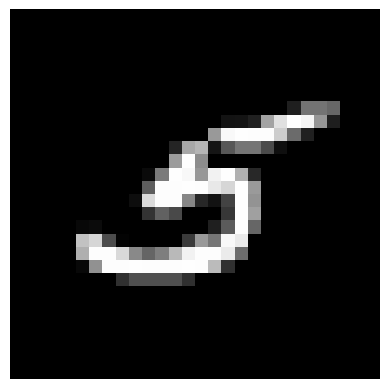

8 5


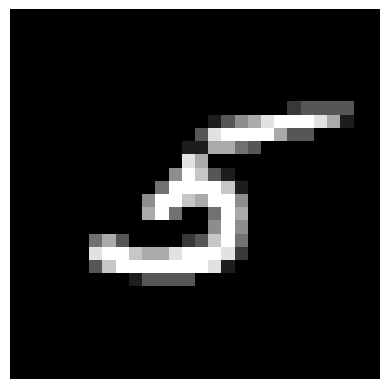

9 8


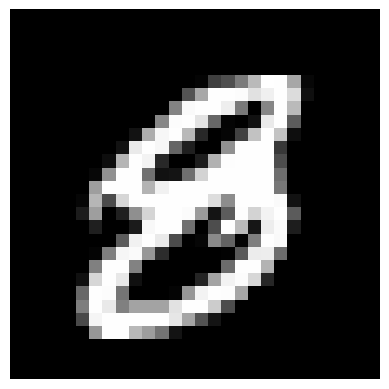

4 7


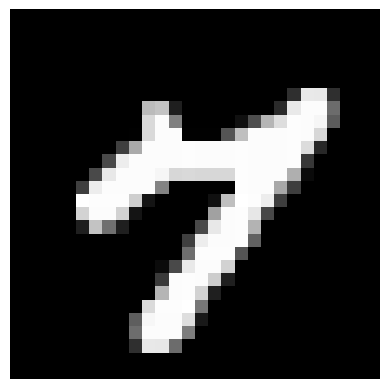

5 8


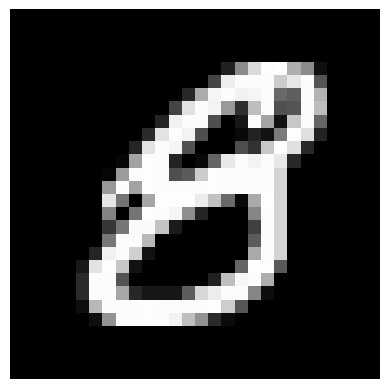

5 3


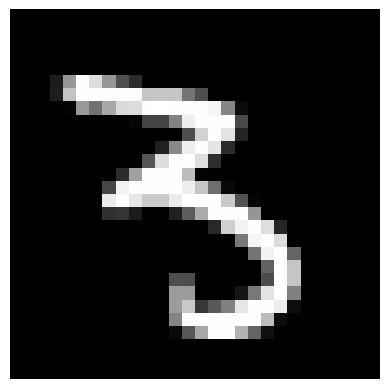

3 2


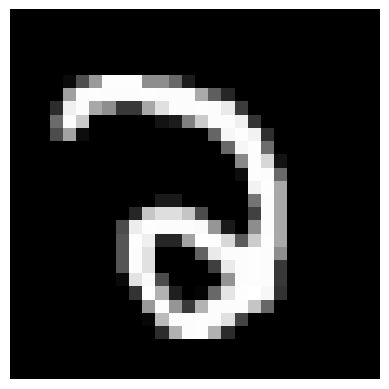

3 2


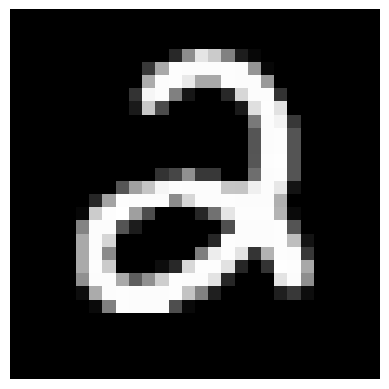

3 2


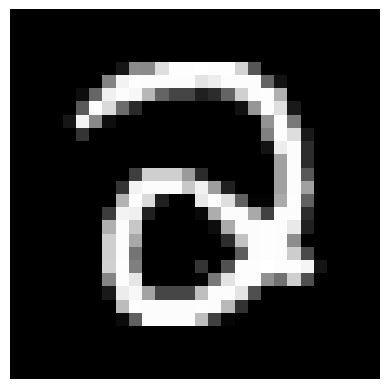

6 5


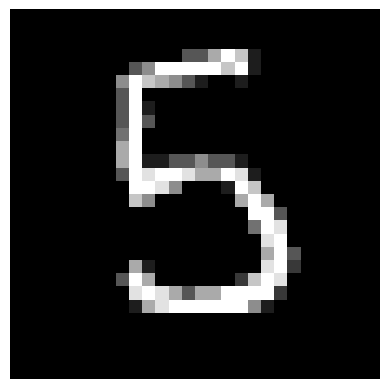

5 3


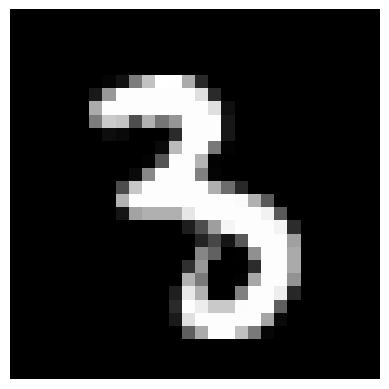

2 0


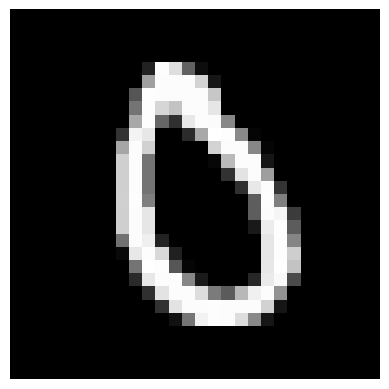

3 2


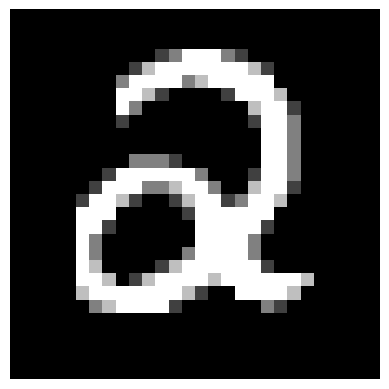

5 7


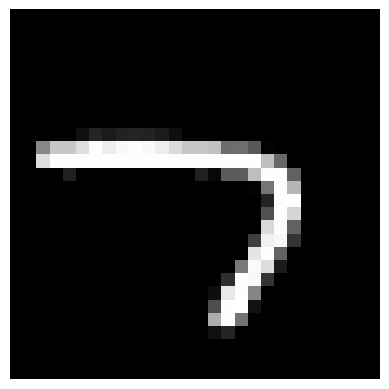

5 8


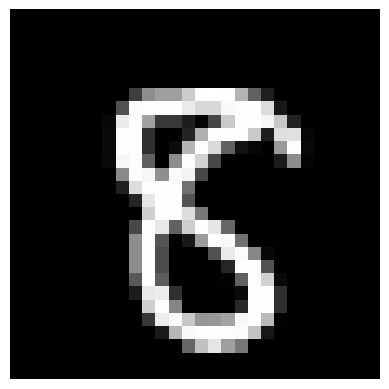

5 8


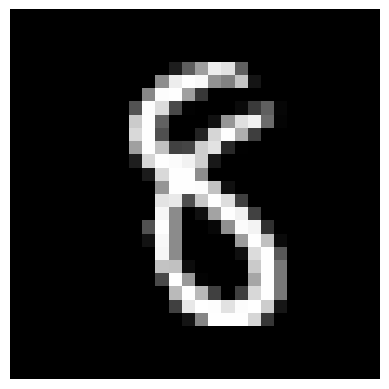

6 2


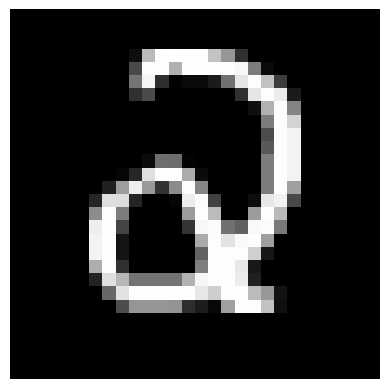

7 9


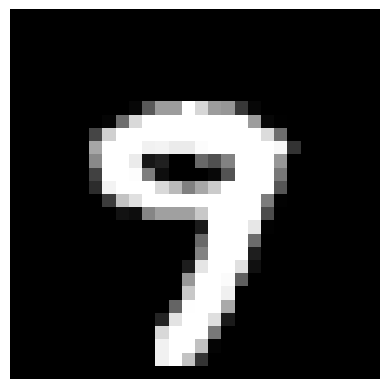

2 3


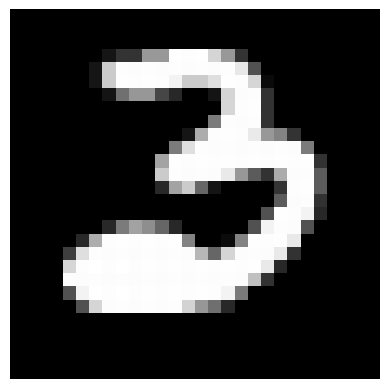

2 5


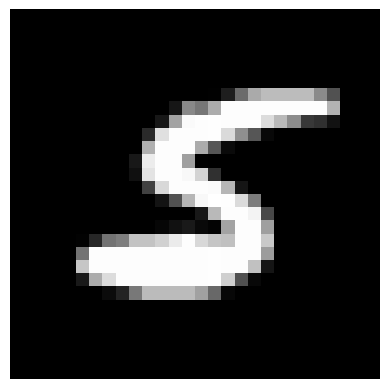

8 1


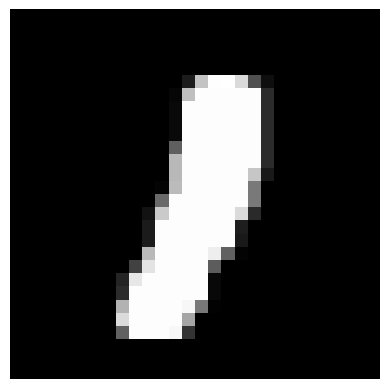

8 5


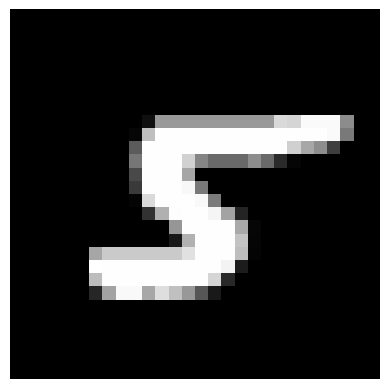

2 3


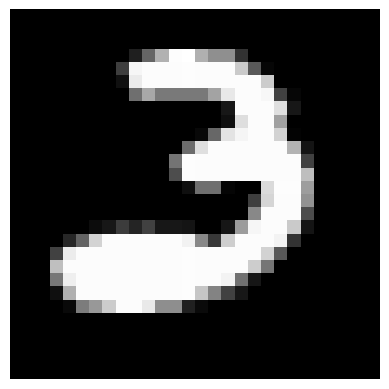

2 1


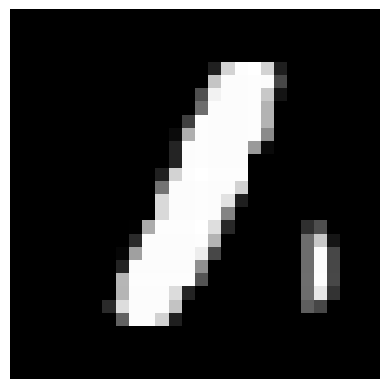

8 5


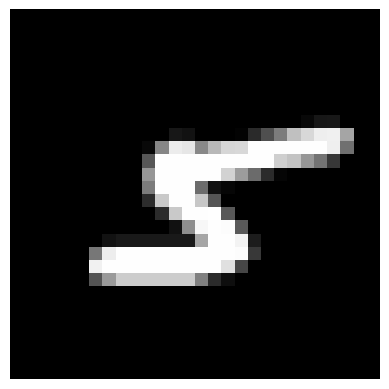

8 1


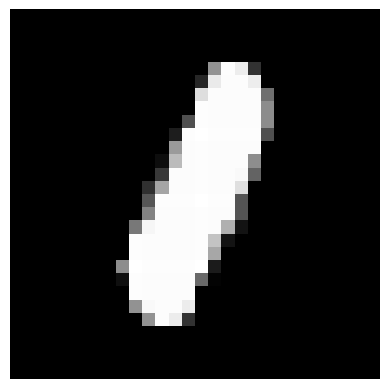

8 5


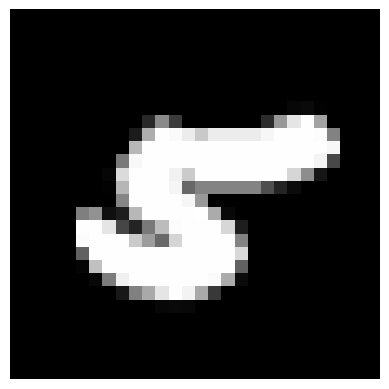

8 1


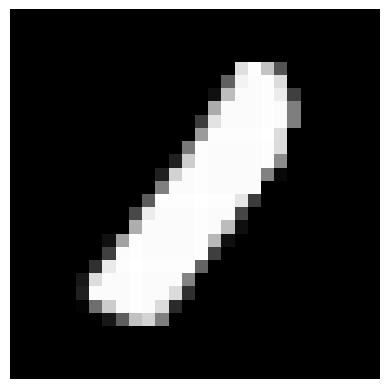

7 3


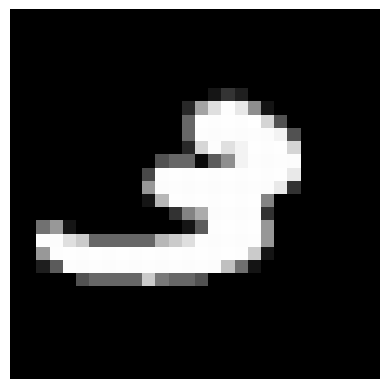

8 5


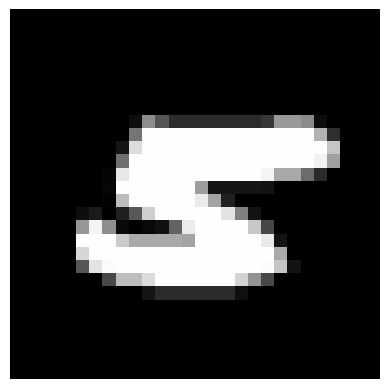

0 6


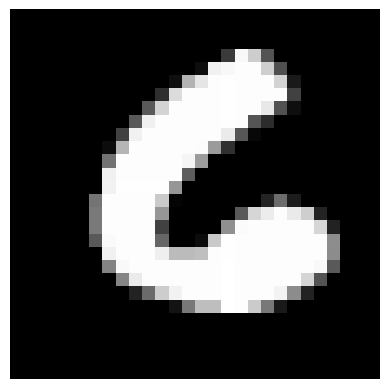

8 1


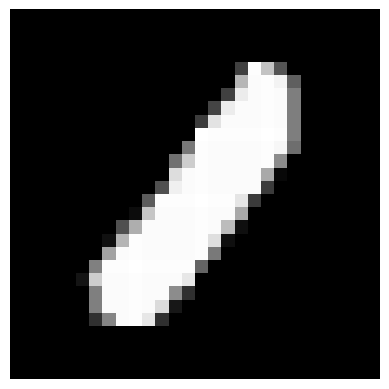

9 2


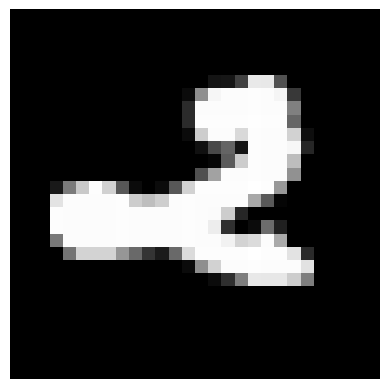

8 5


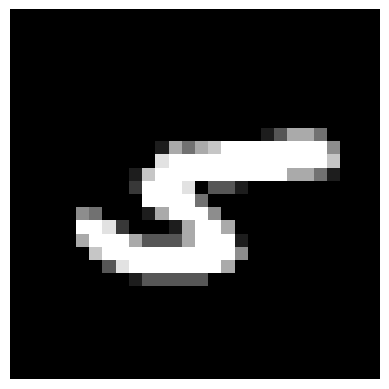

9 5


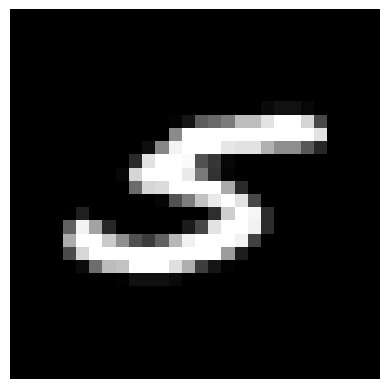

4 2


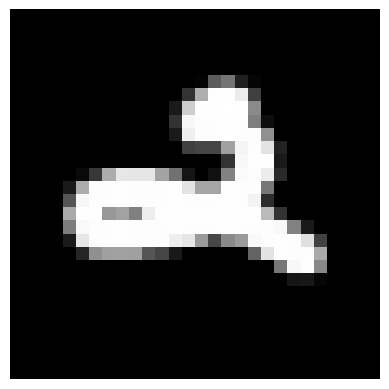

4 5


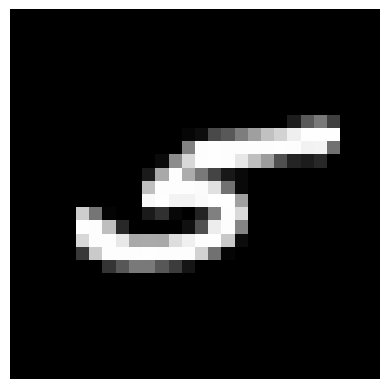

8 1


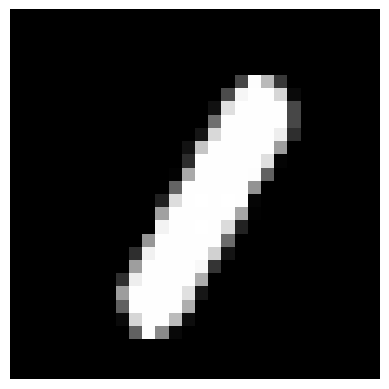

8 1


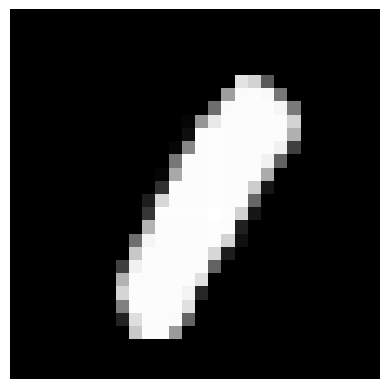

8 1


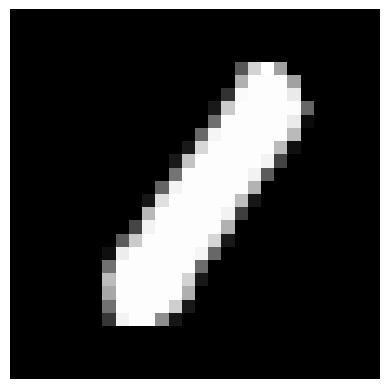

2 3


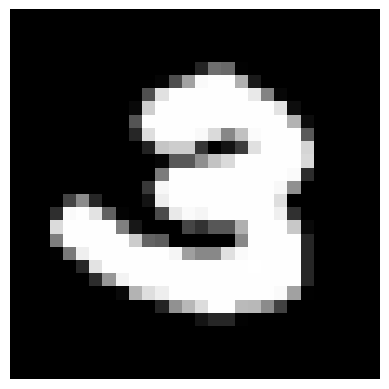

9 2


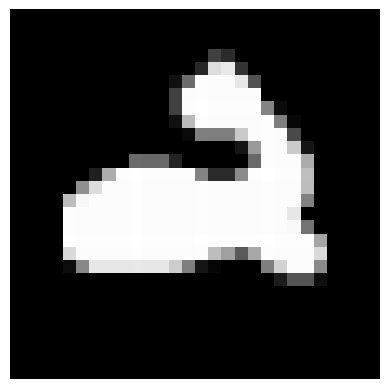

1 5


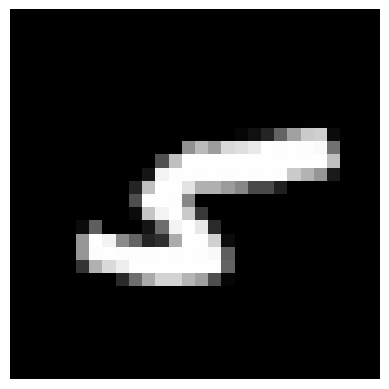

1 8


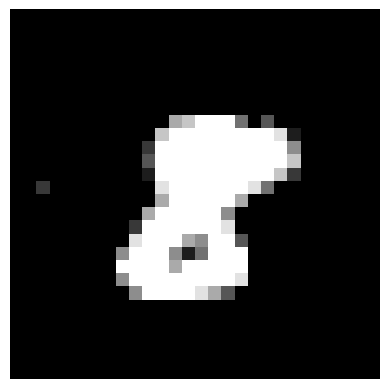

8 1


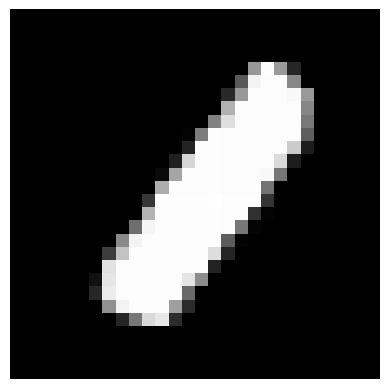

8 1


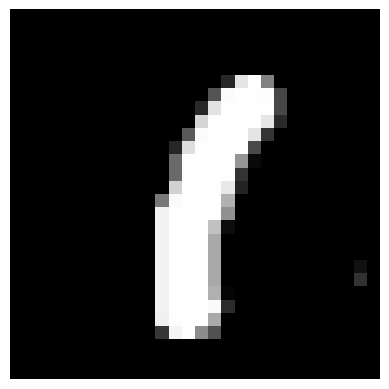

6 2


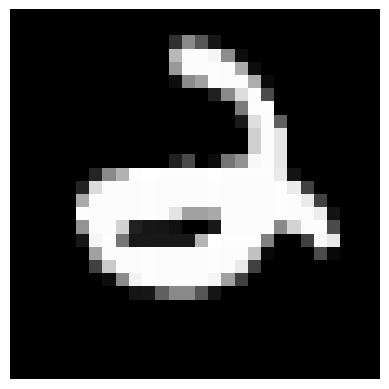

2 3


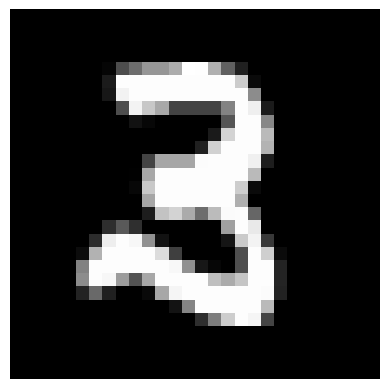

8 1


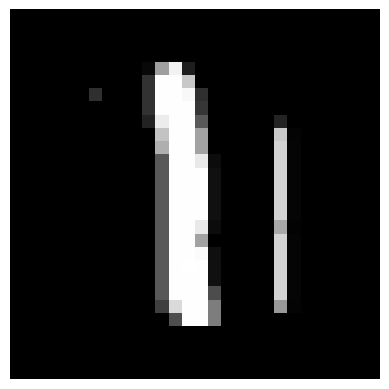

8 4


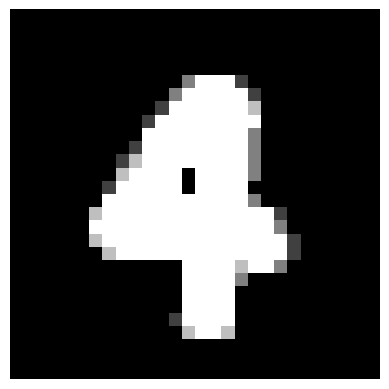

8 6


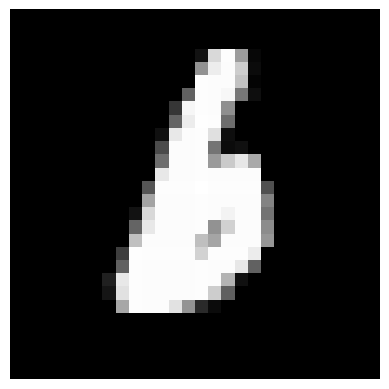

6 4


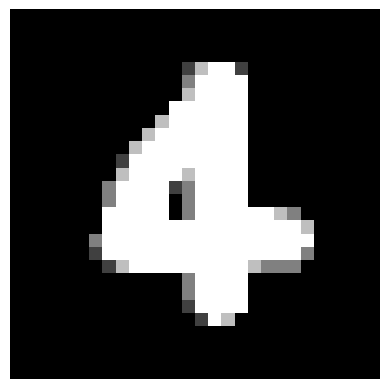

3 1


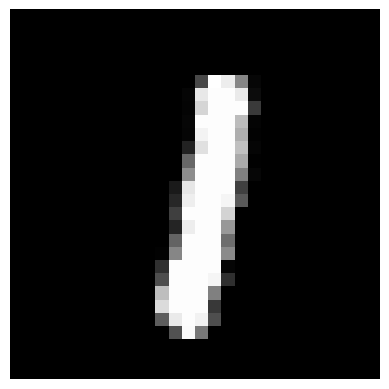

3 2


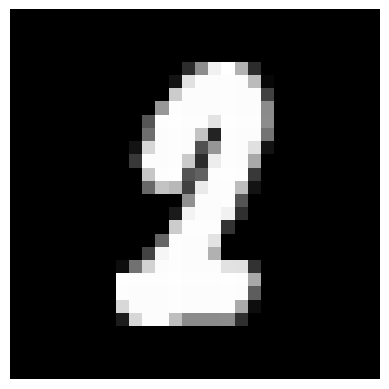

8 4


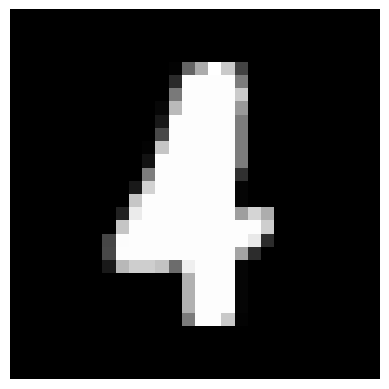

9 4


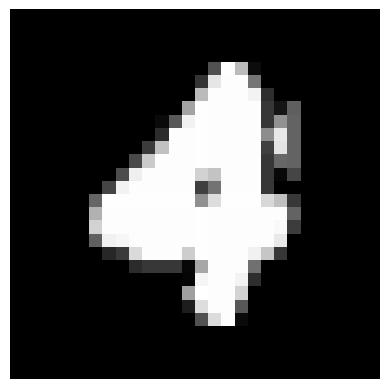

4 2


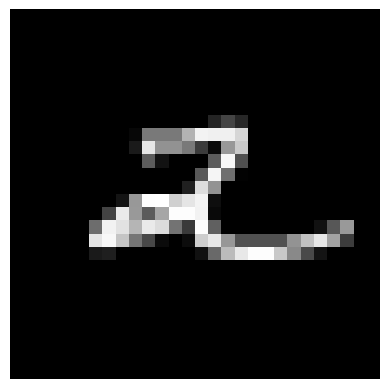

7 9


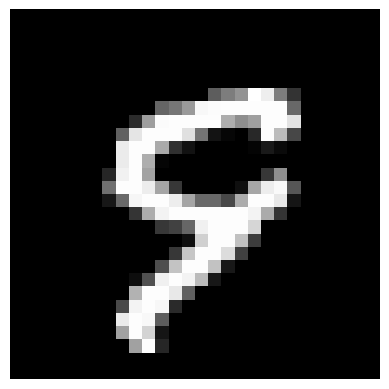

5 0


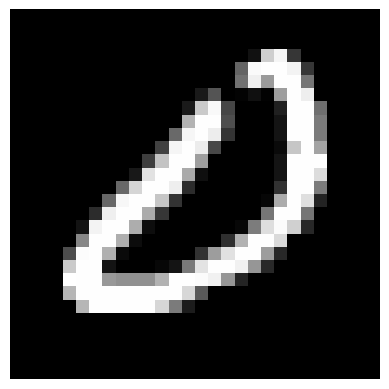

2 6


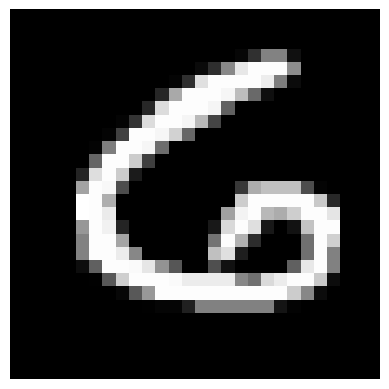

9 7


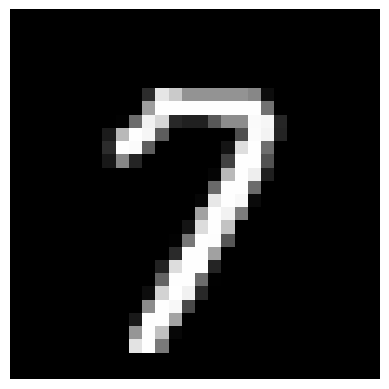

5 8


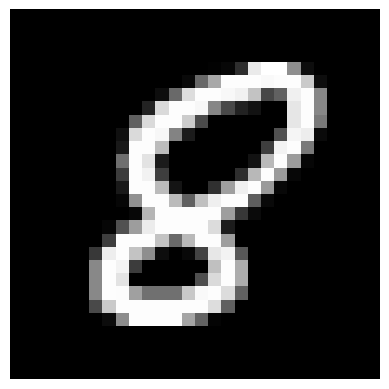

8 3


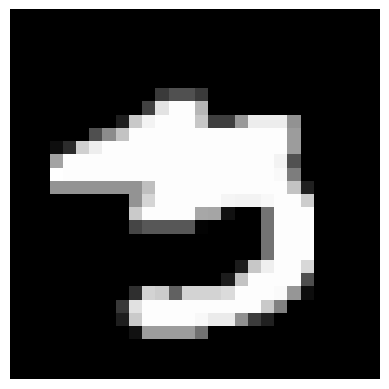

9 4


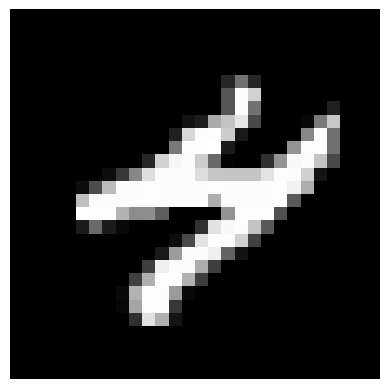

6 8


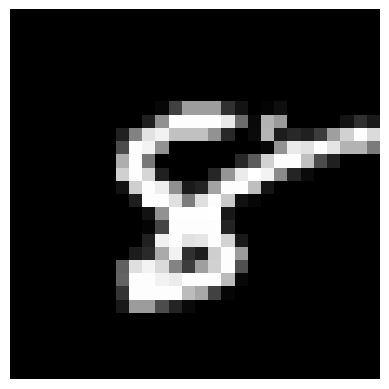

9 2


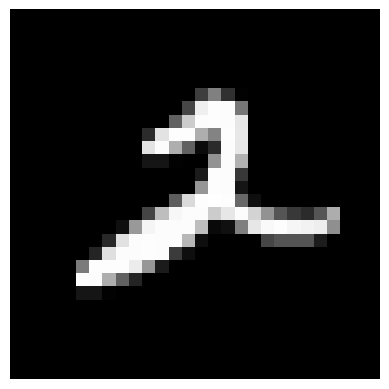

8 3


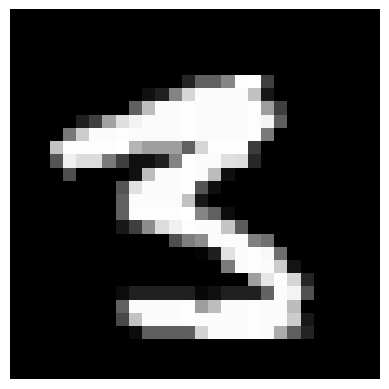

7 0


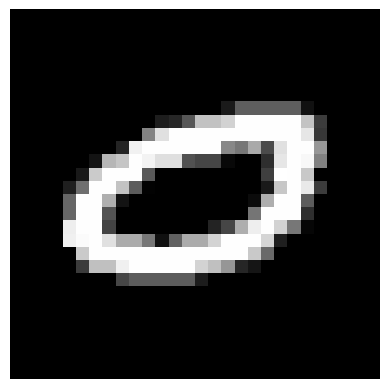

8 3


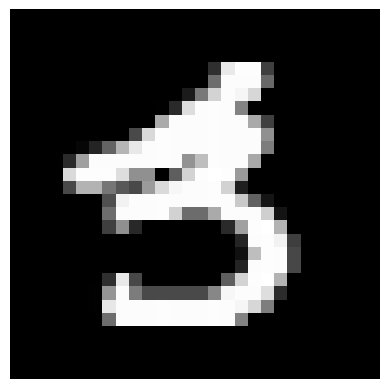

4 0


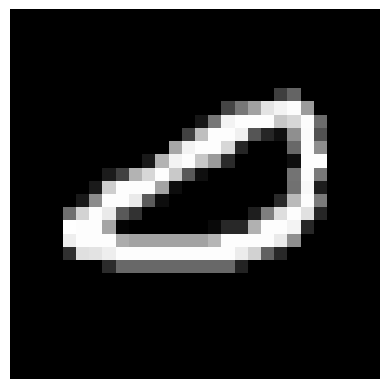

0 2


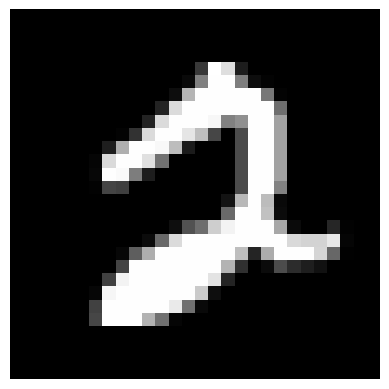

8 3


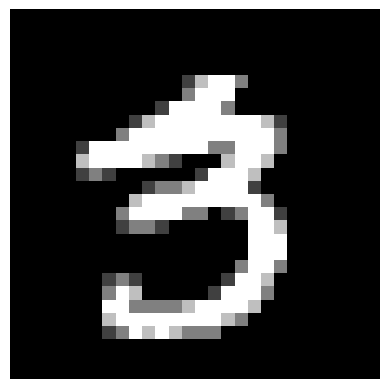

4 9


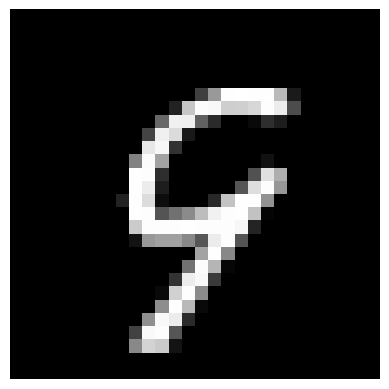

5 8


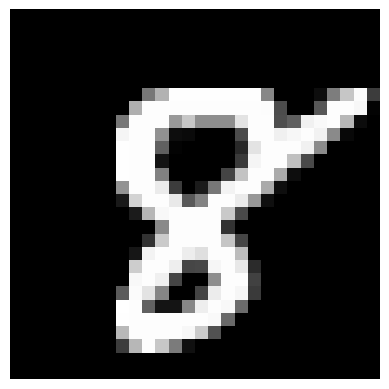

2 8


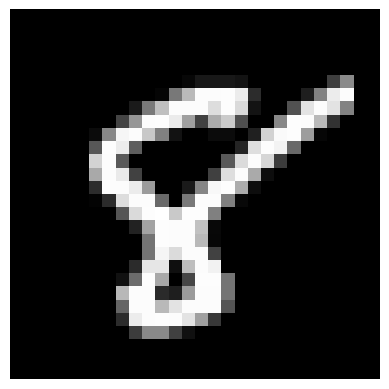

5 3


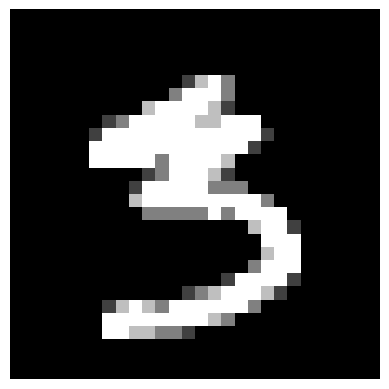

4 6


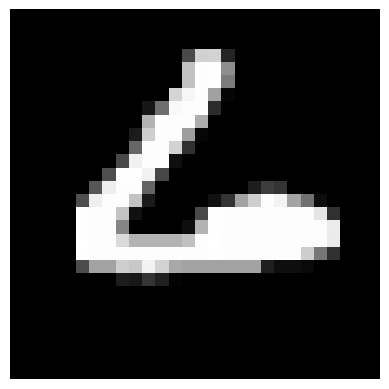

7 9


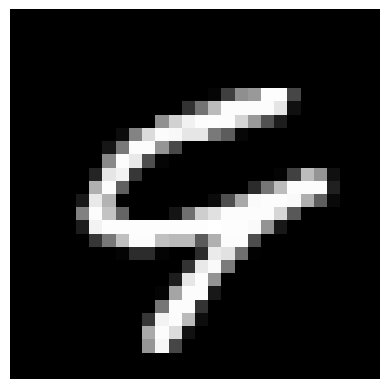

6 0


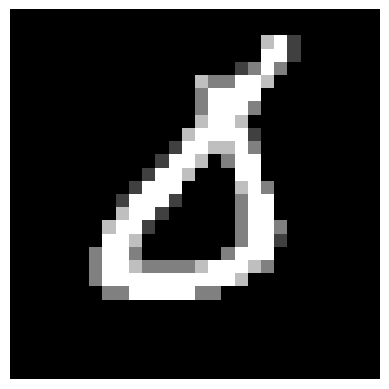

7 9


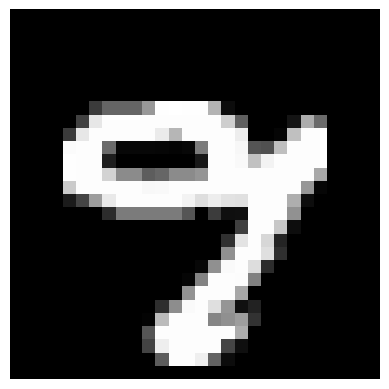

6 8


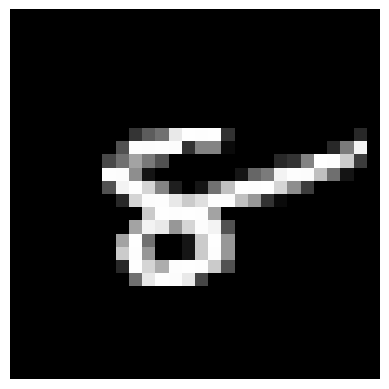

0 3


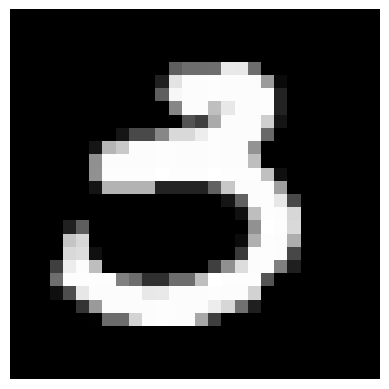

9 1


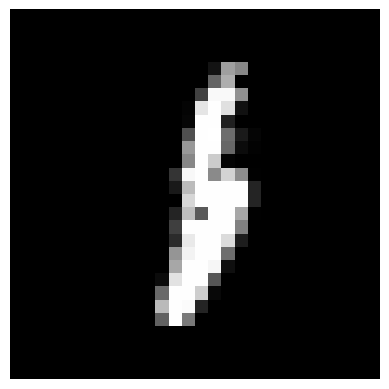

2 1


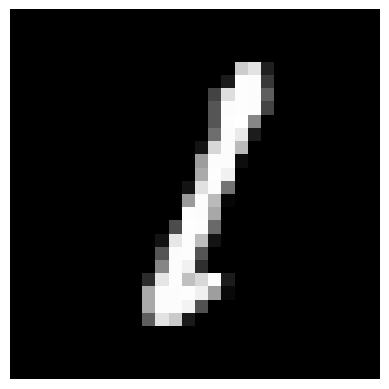

0 3


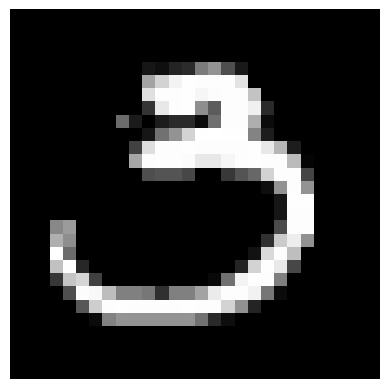

9 4


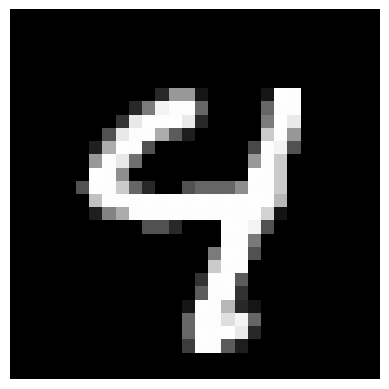

6 8


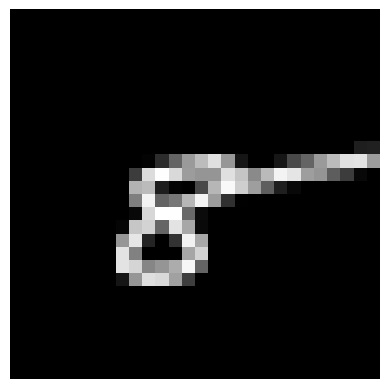

6 8


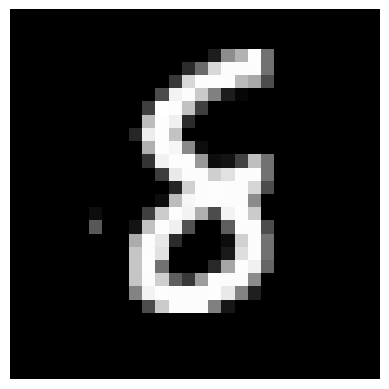

8 4


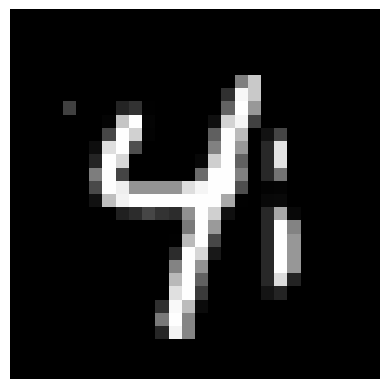

9 4


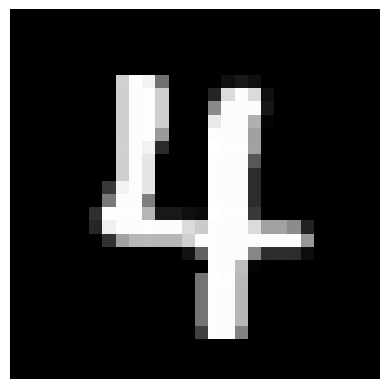

7 9


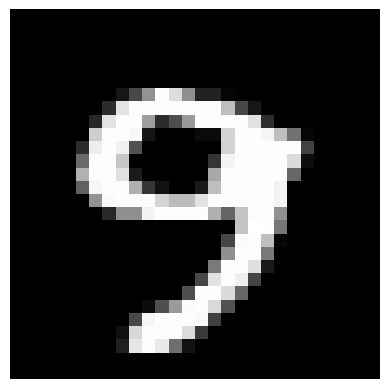

5 8


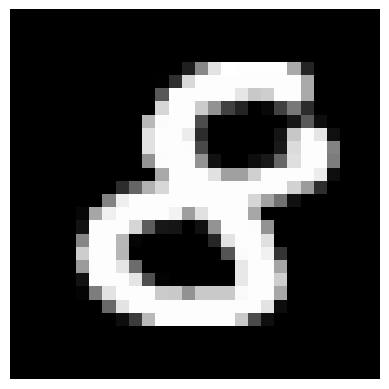

9 4


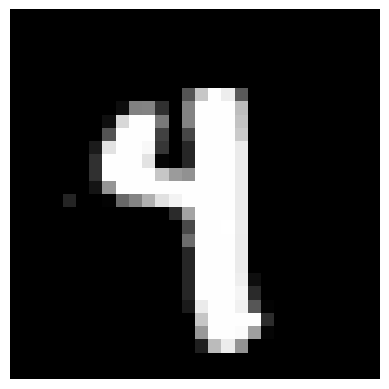

6 8


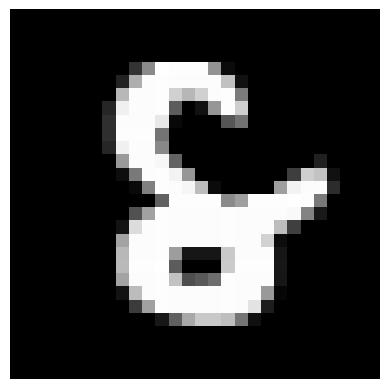

5 9


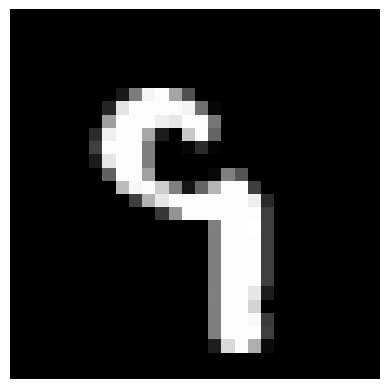

3 5


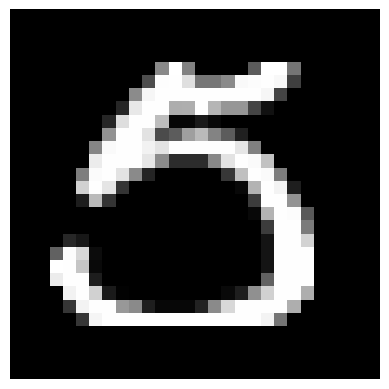

3 2


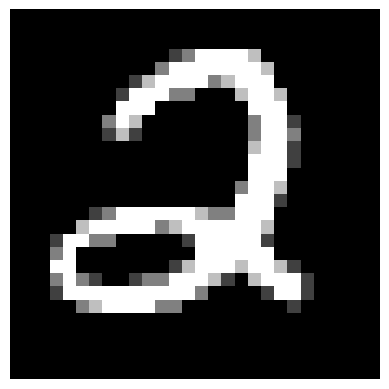

9 4


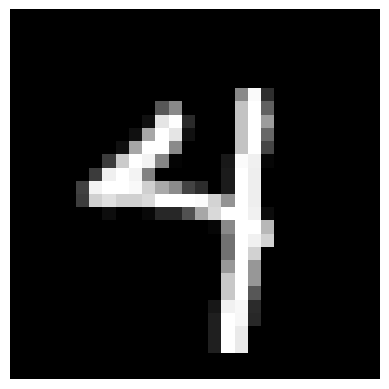

0 6


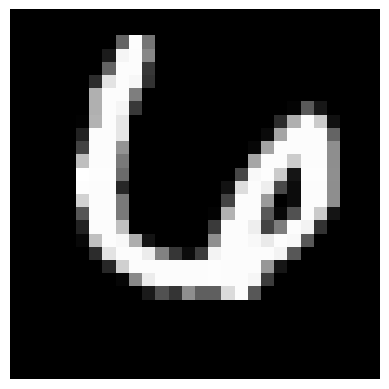

3 2


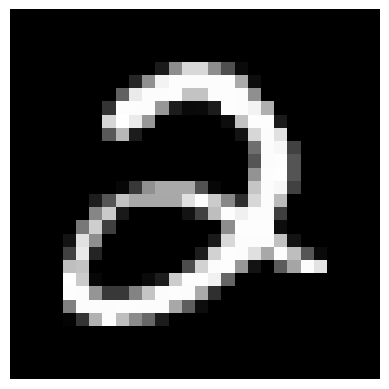

0 9


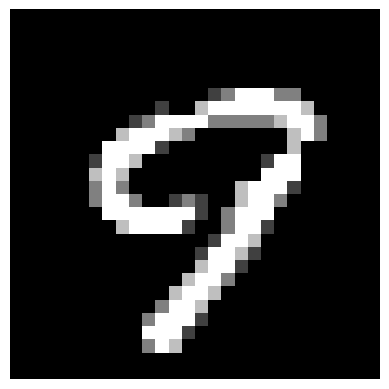

8 1


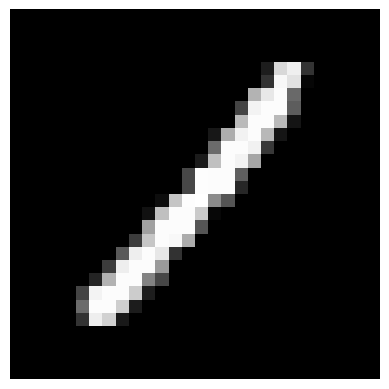

5 0


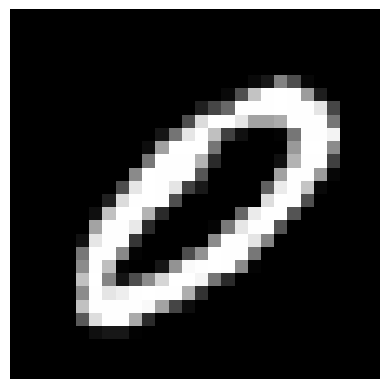

2 7


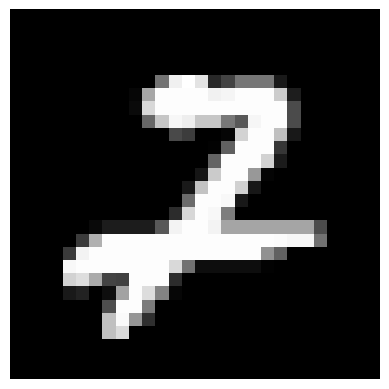

8 2


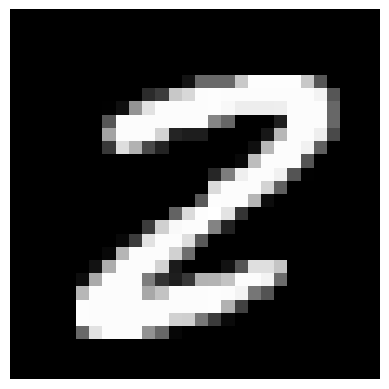

0 5


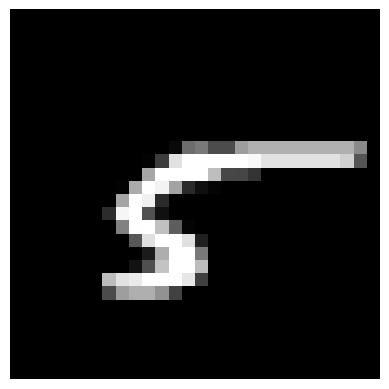

2 7


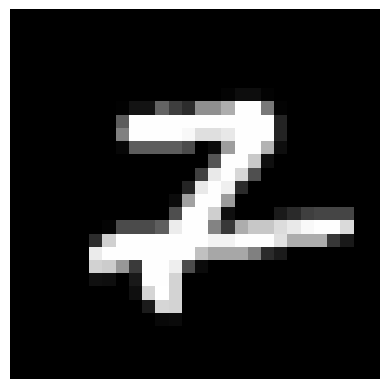

5 0


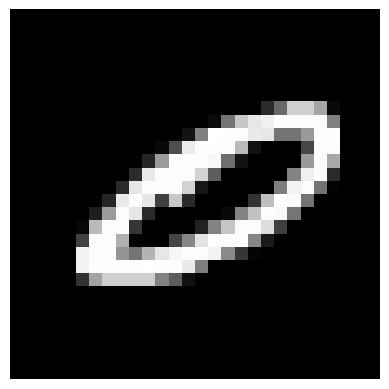

8 1


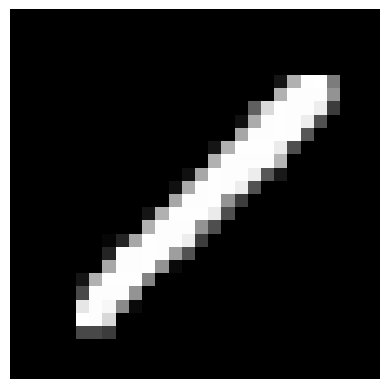

2 7


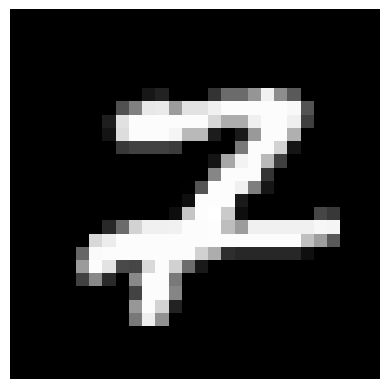

2 7


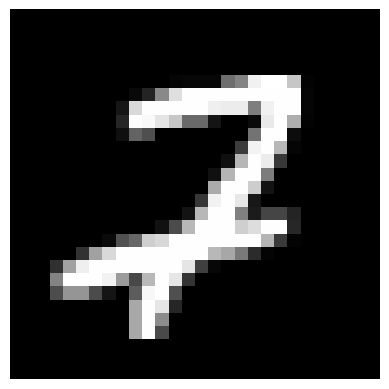

2 7


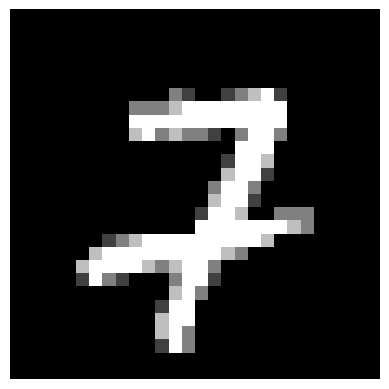

2 7


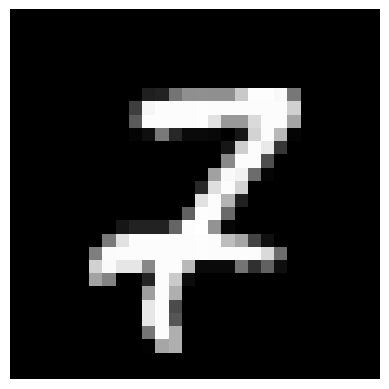

9 7


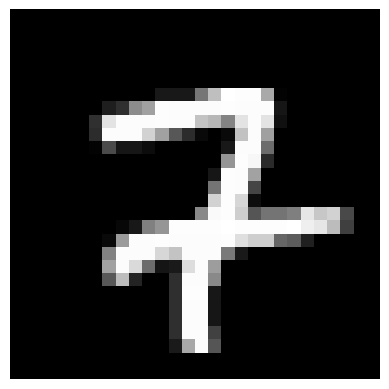

2 7


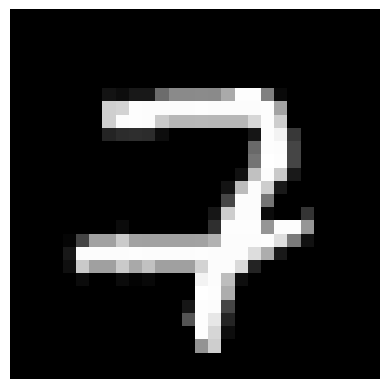

8 2


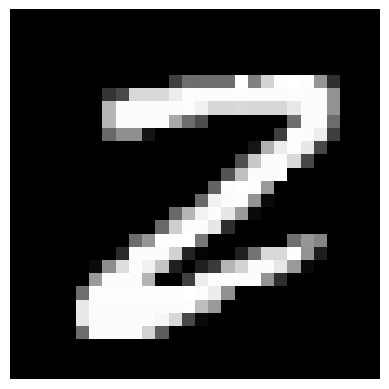

8 1


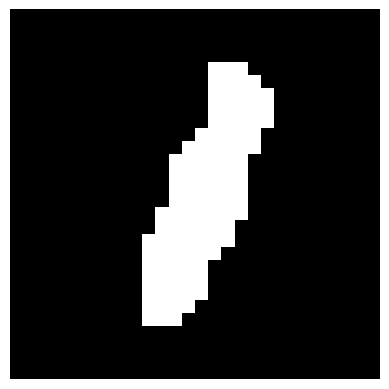

7 9


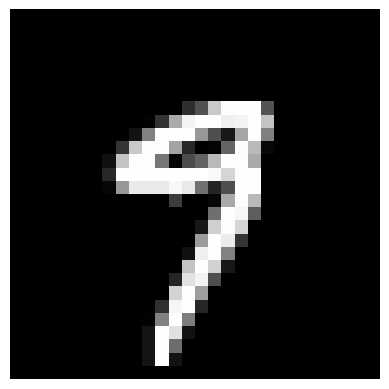

8 1


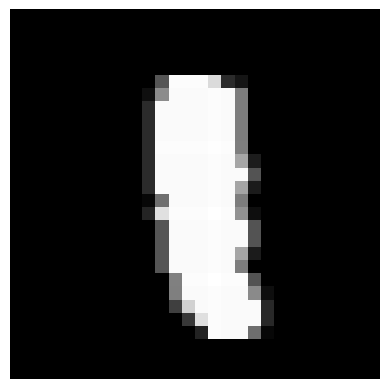

5 4


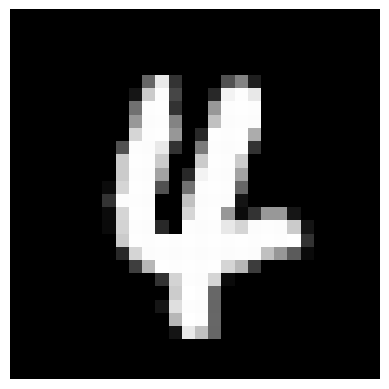

2 8


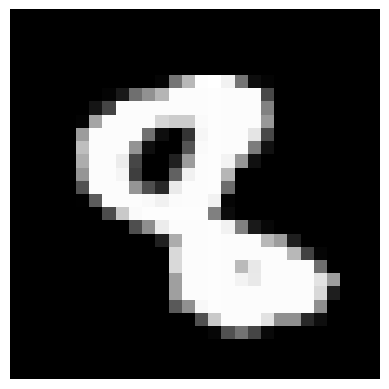

8 5


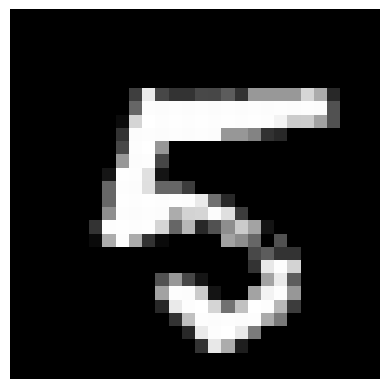

7 4


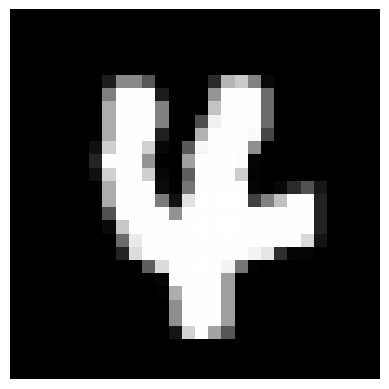

5 8


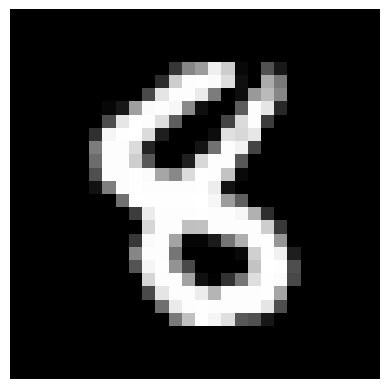

4 9


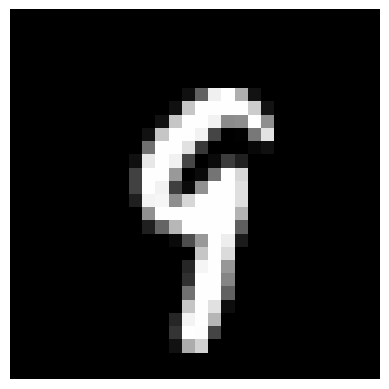

5 8


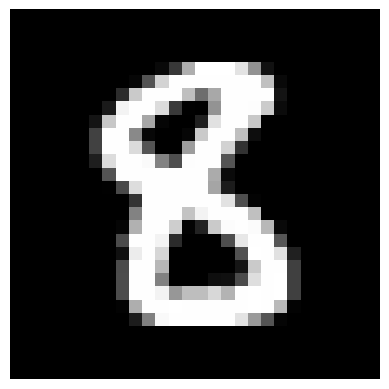

8 3


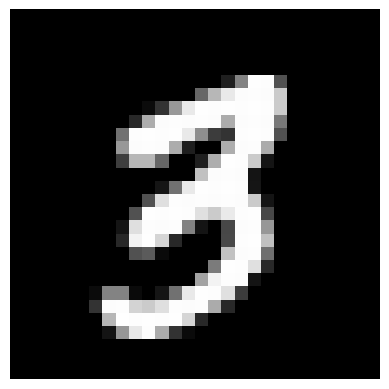

2 1


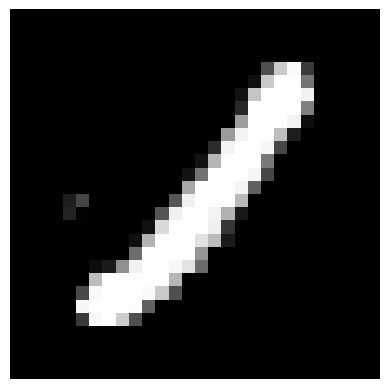

7 9


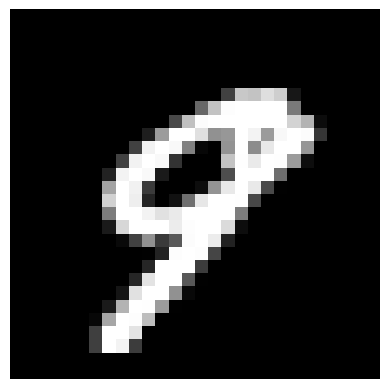

5 8


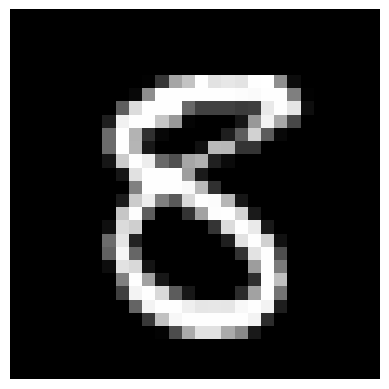

1 3


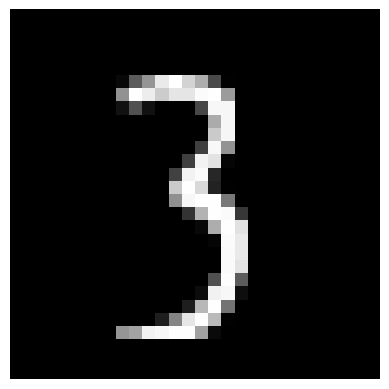

5 0


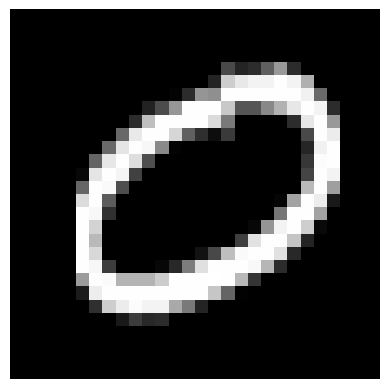

3 2


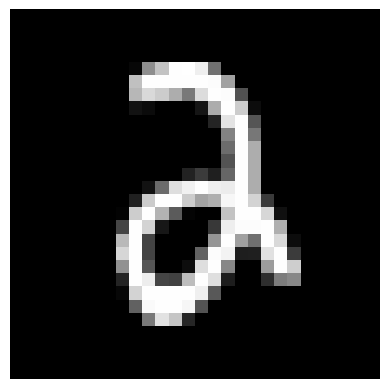

3 2


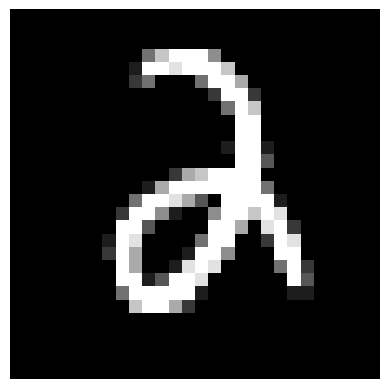

5 0


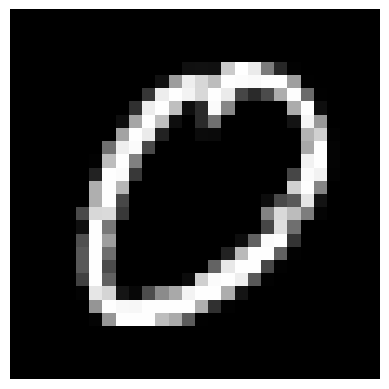

5 8


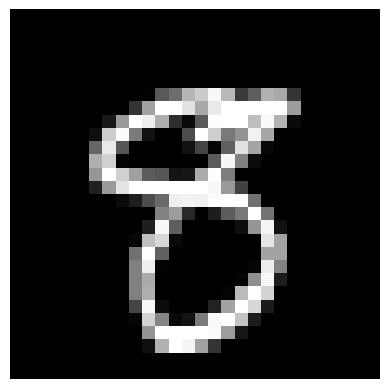

5 0


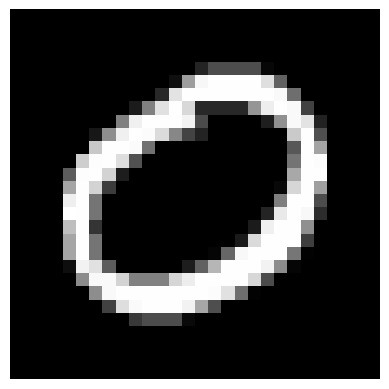

3 8


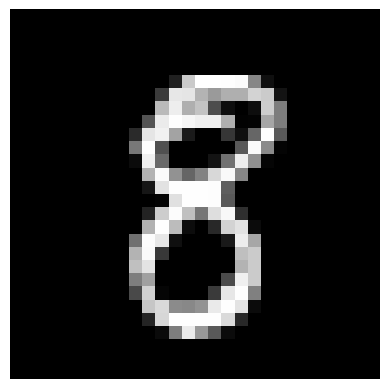

3 8


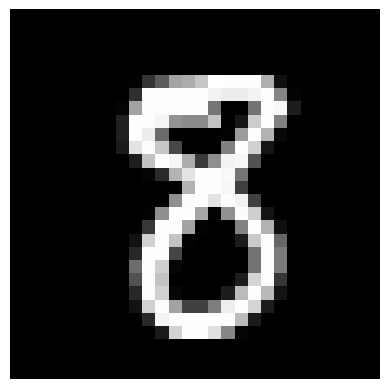

2 8


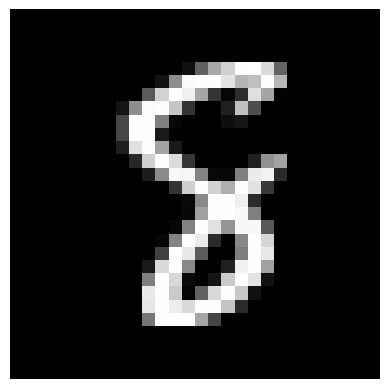

3 5


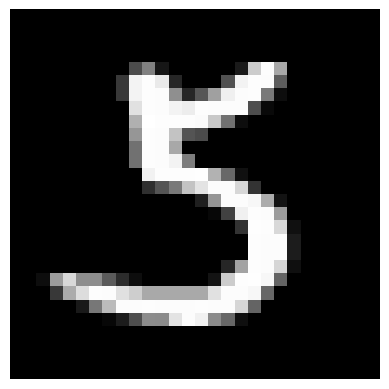

8 5


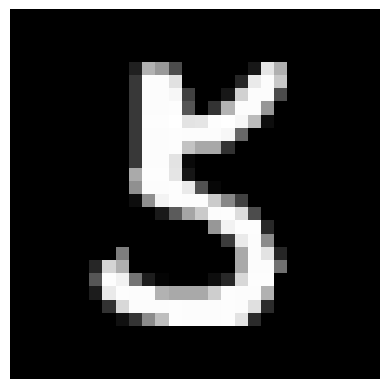

2 5


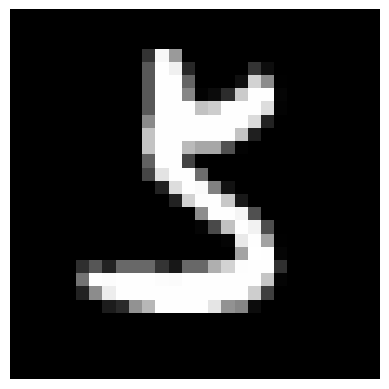

4 6


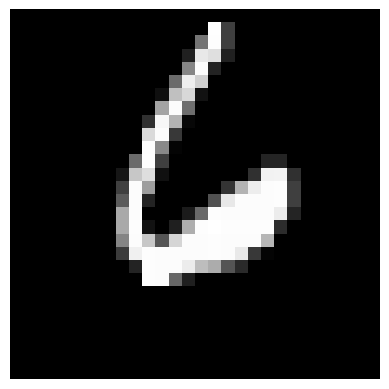

4 2


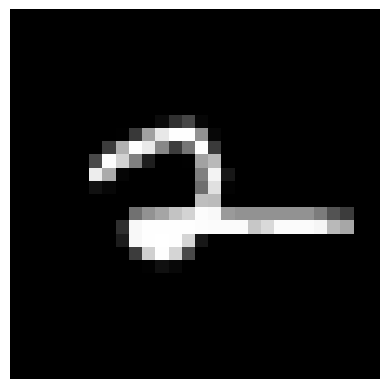

7 2


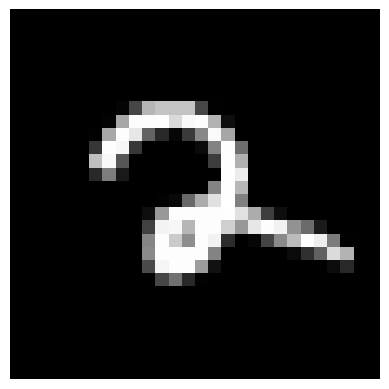

3 5


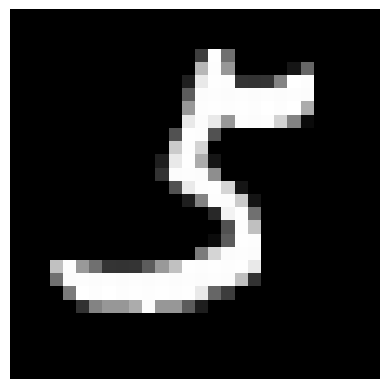

4 9


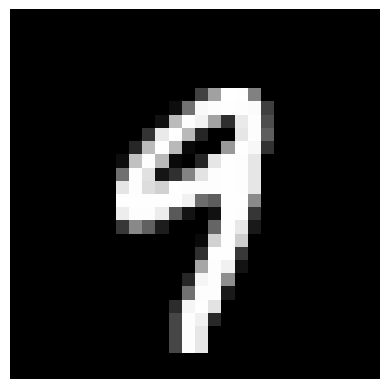

3 2


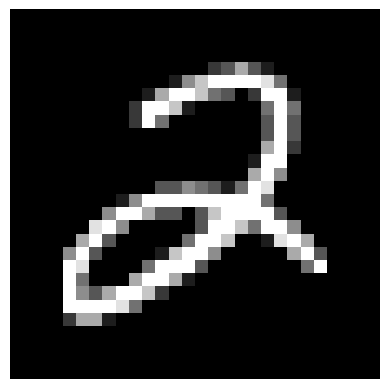

3 5


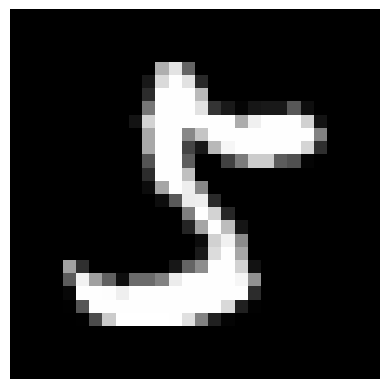

4 9


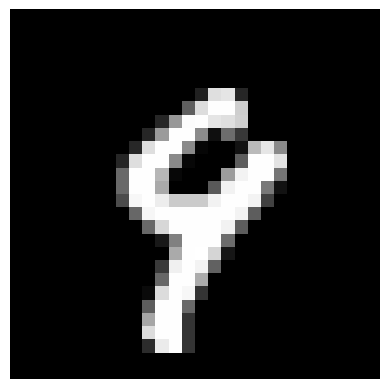

3 2


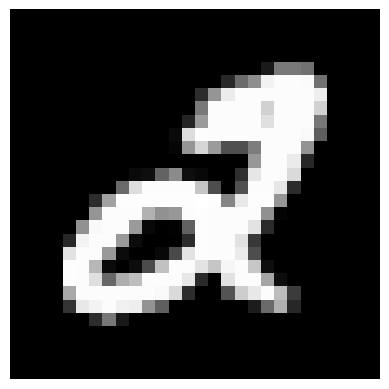

7 9


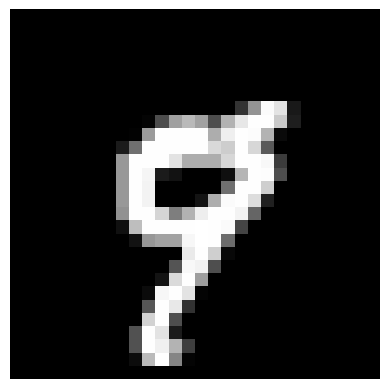

2 1


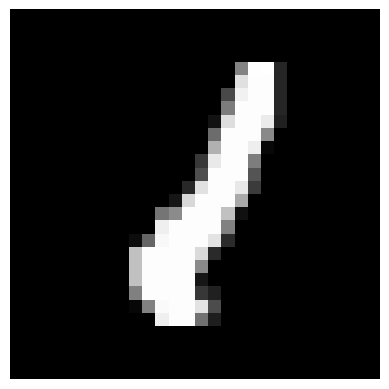

2 7


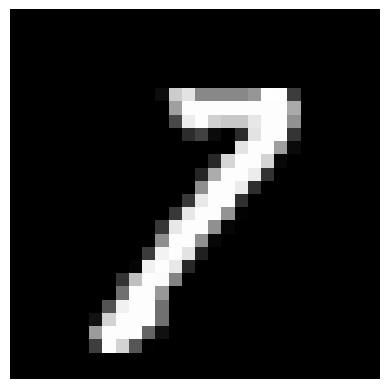

8 9


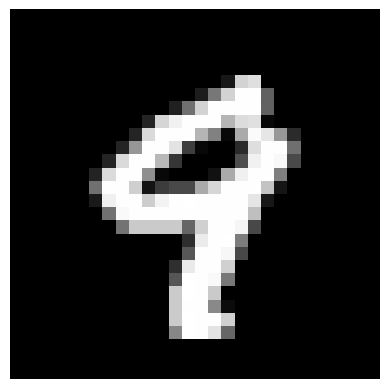

4 9


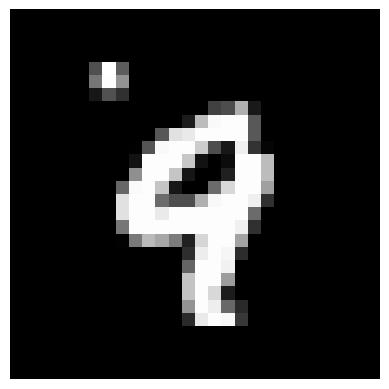

6 2


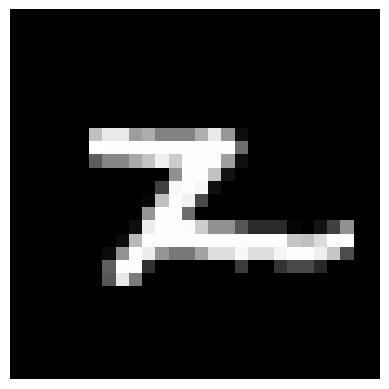

2 1


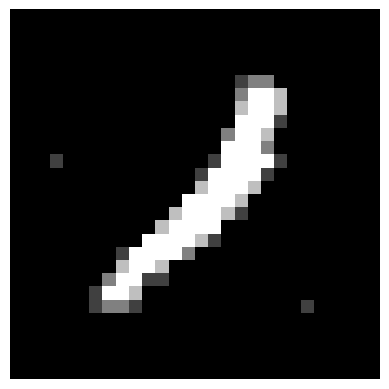

5 3


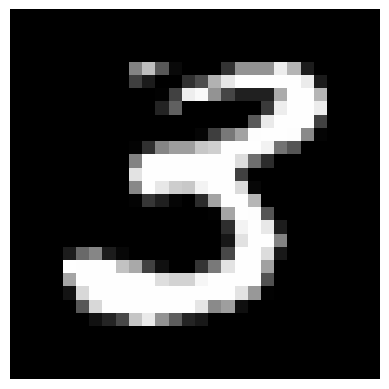

8 3


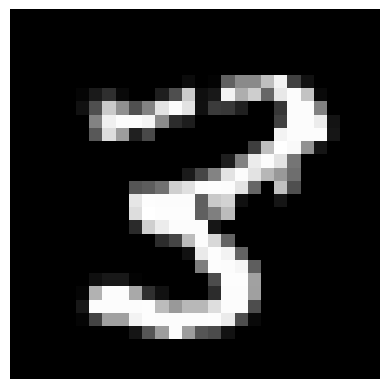

3 0


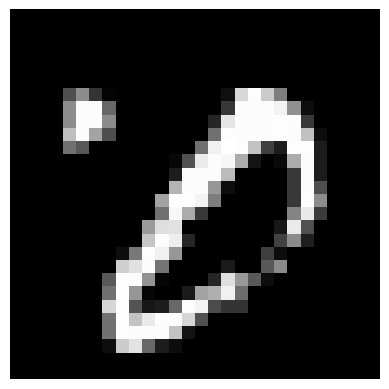

0 3


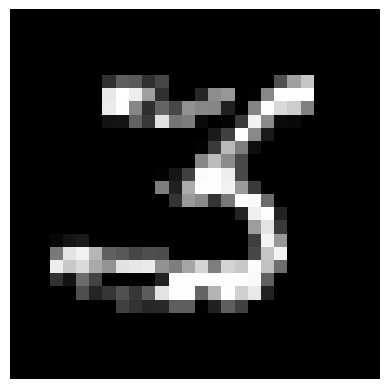

7 1


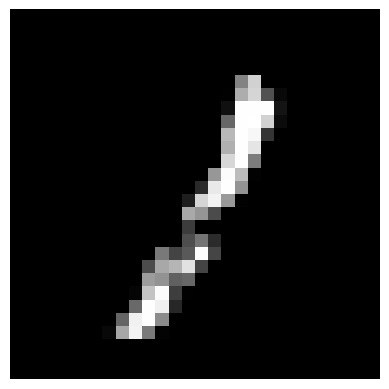

2 3


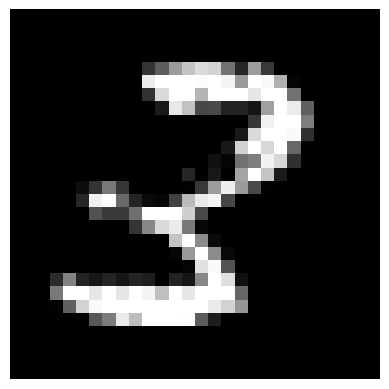

7 2


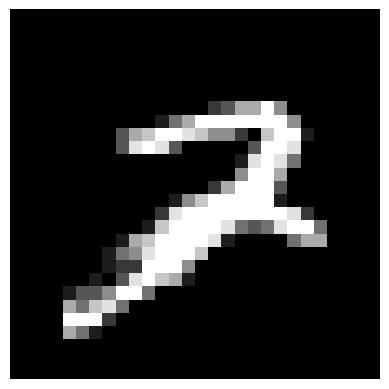

5 0


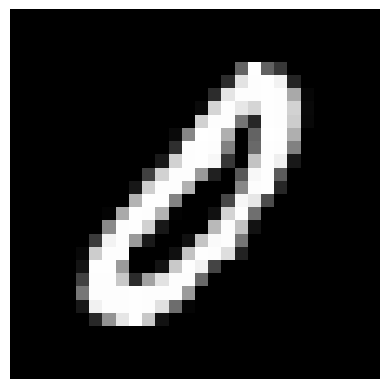

5 0


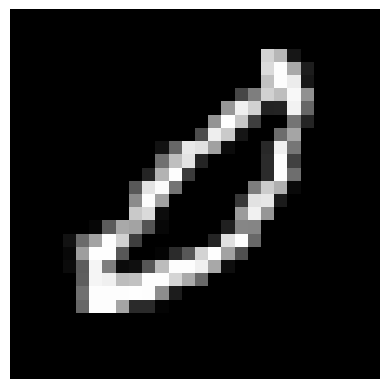

0 7


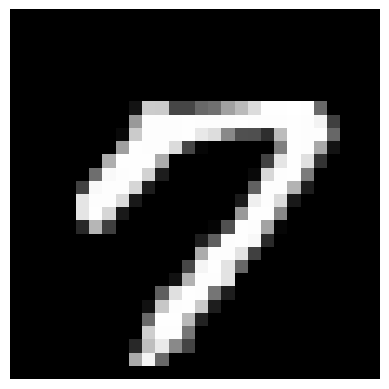

0 2


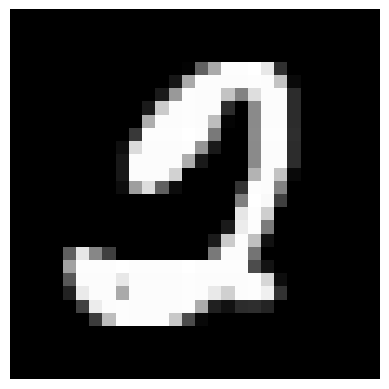

0 5


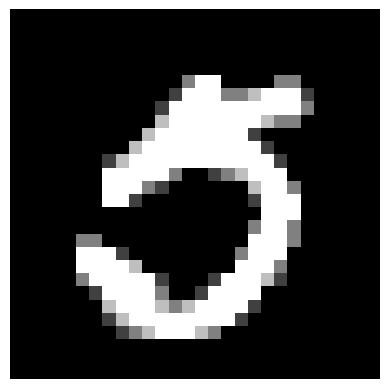

0 2


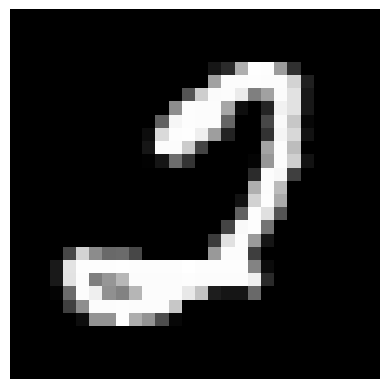

8 4


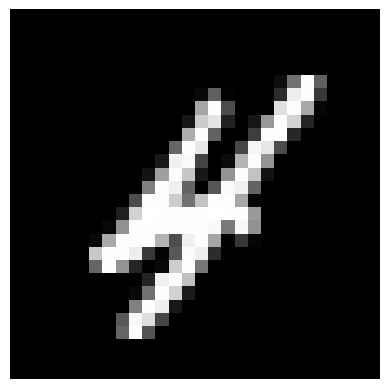

6 5


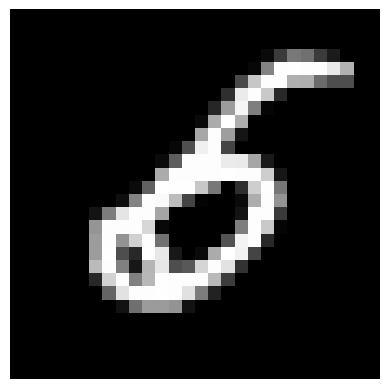

9 7


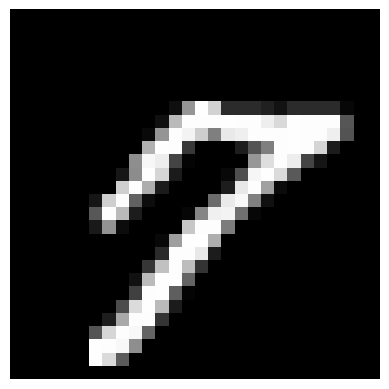

5 8


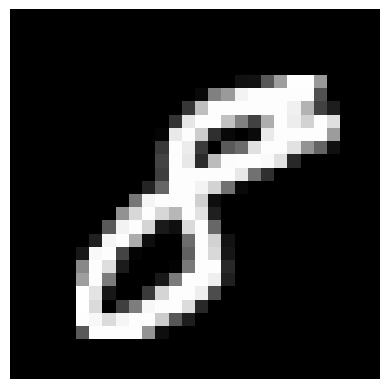

5 9


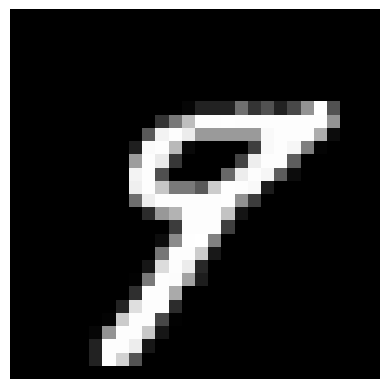

9 4


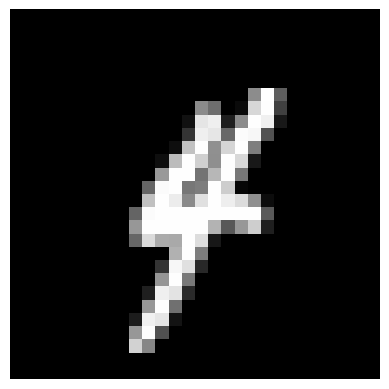

8 9


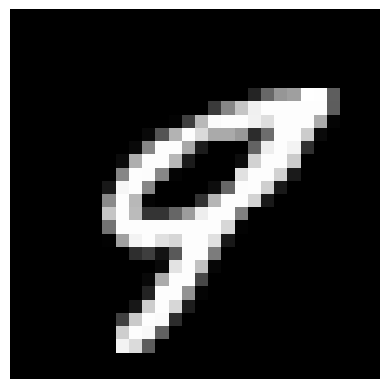

7 9


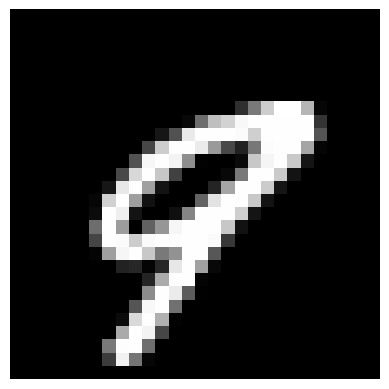

1 8


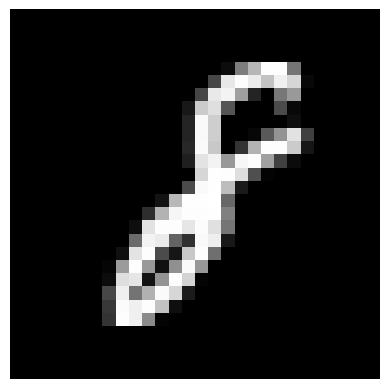

2 4


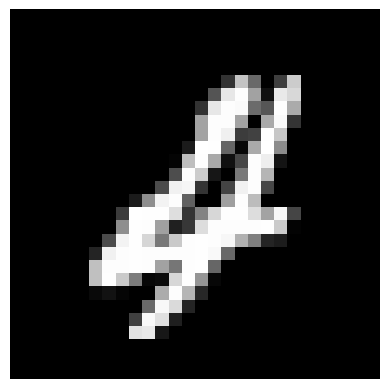

0 2


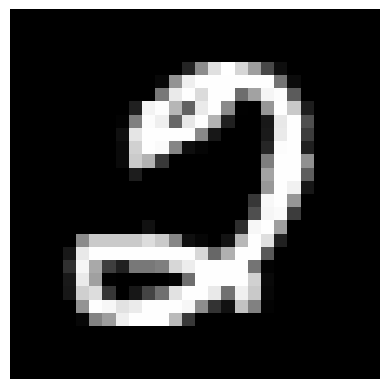

0 2


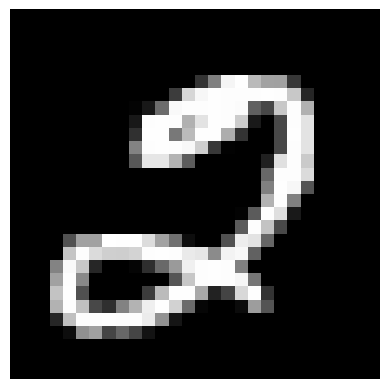

8 4


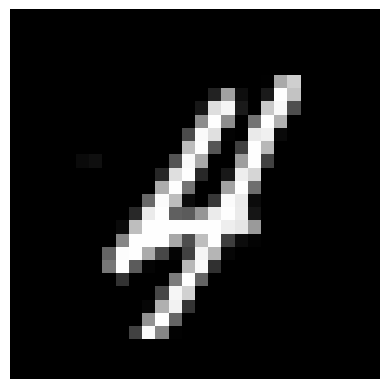

7 9


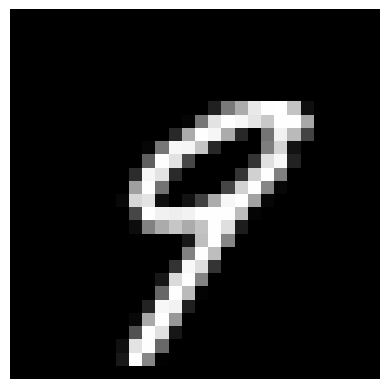

0 2


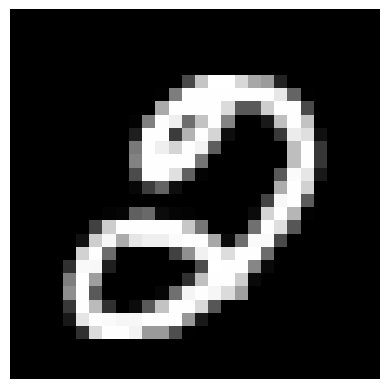

0 5


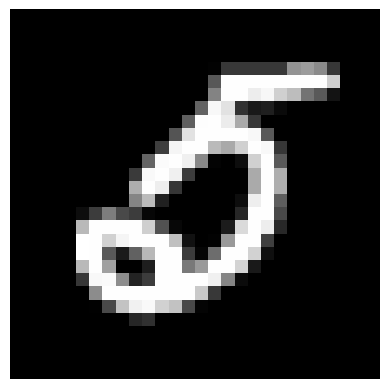

9 7


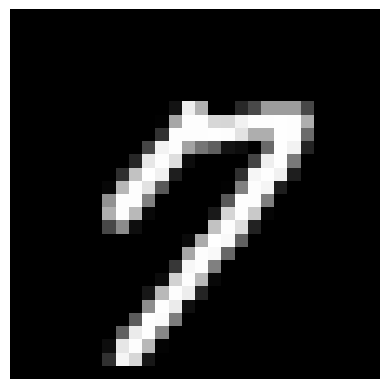

9 7


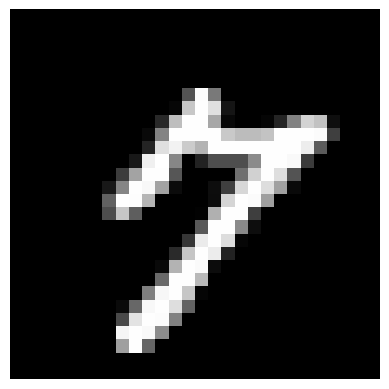

0 5


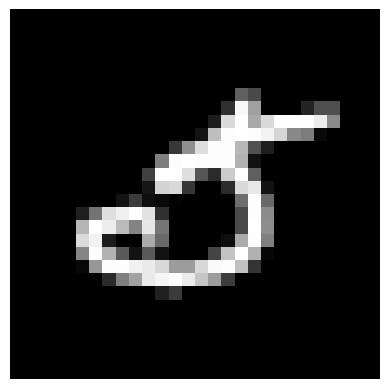

5 2


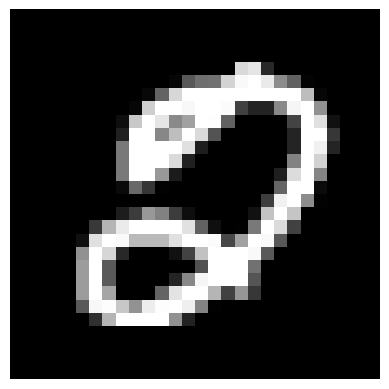

1 8


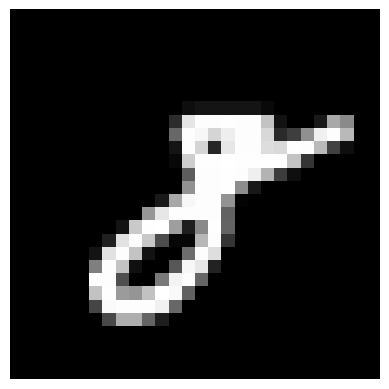

9 7


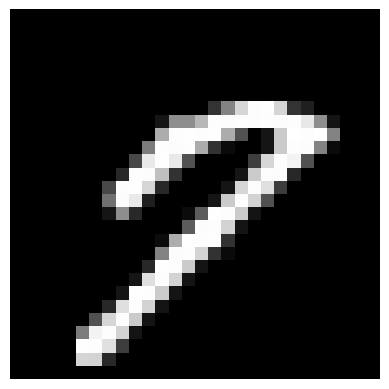

5 4


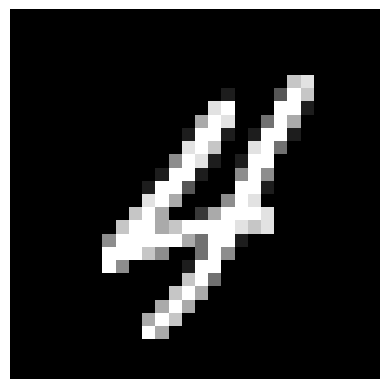

8 4


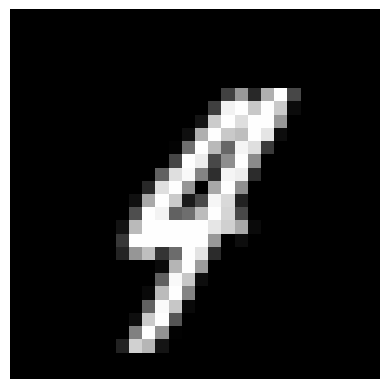

4 9


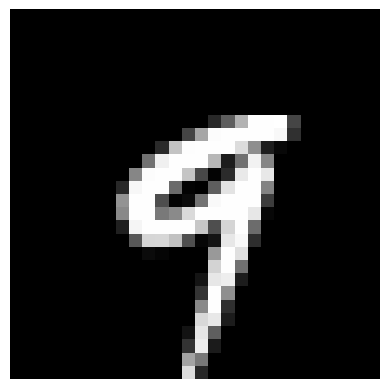

8 2


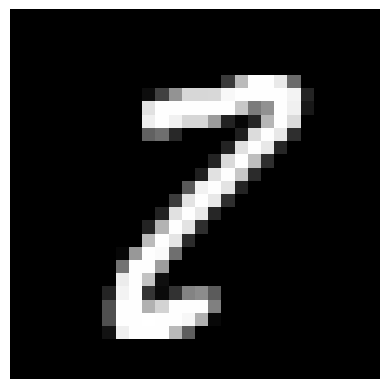

8 5


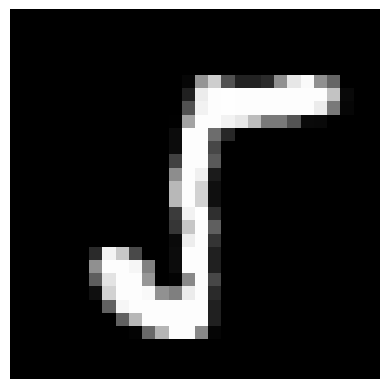

8 5


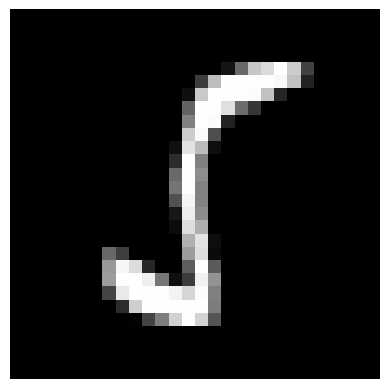

9 2


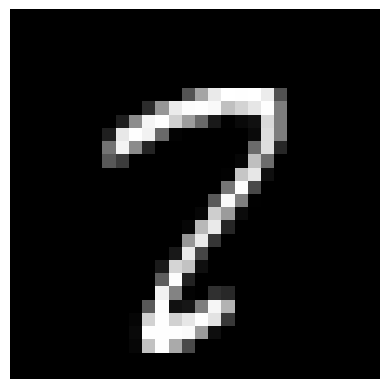

5 2


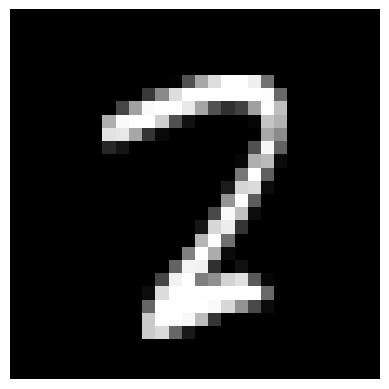

8 2


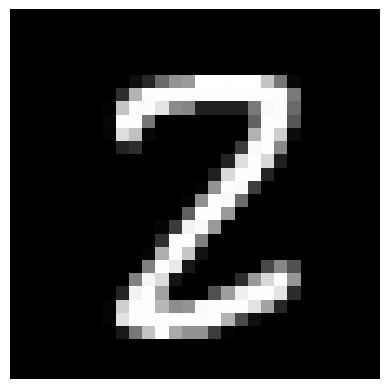

1 8


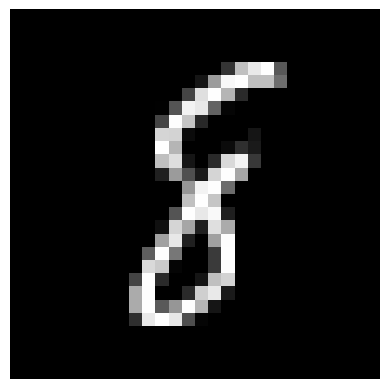

1 6


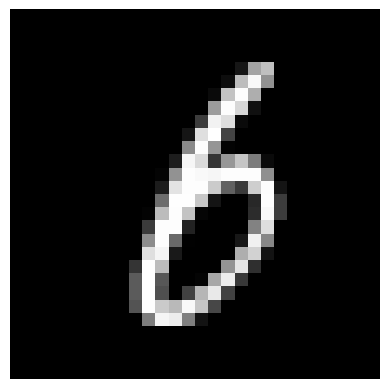

5 0


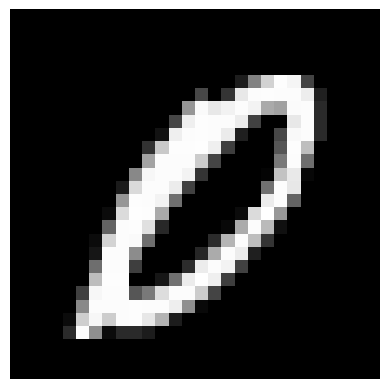

8 2


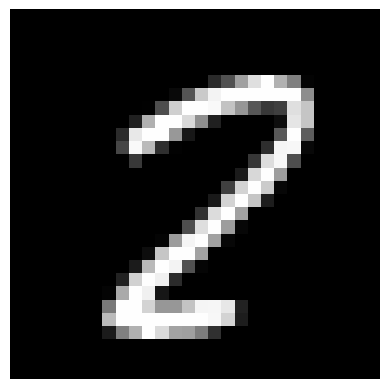

7 2


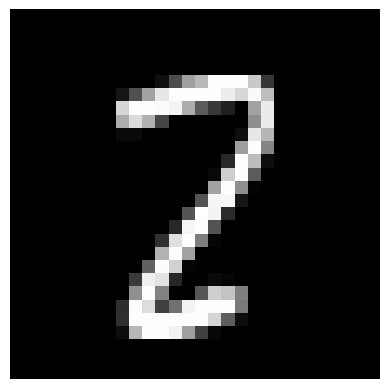

6 5


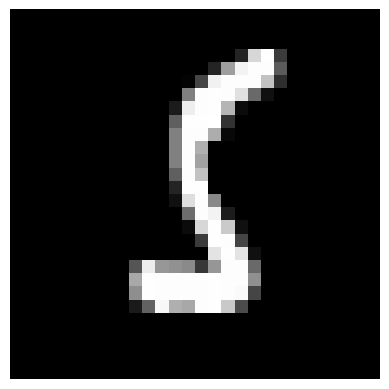

0 6


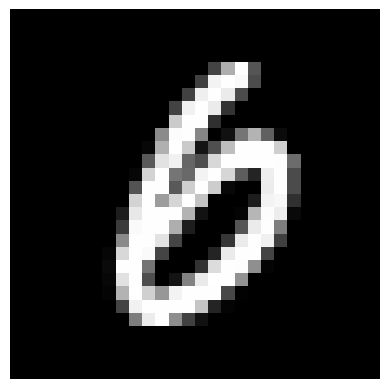

8 3


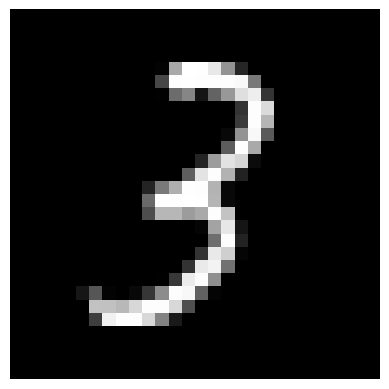

4 9


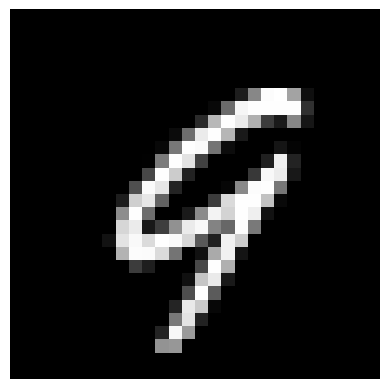

6 8


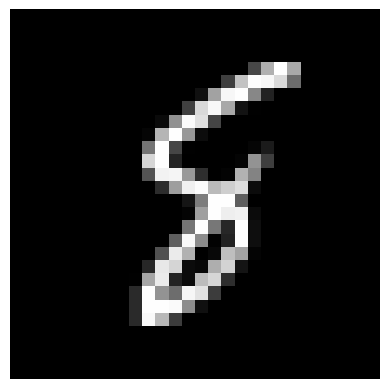

5 2


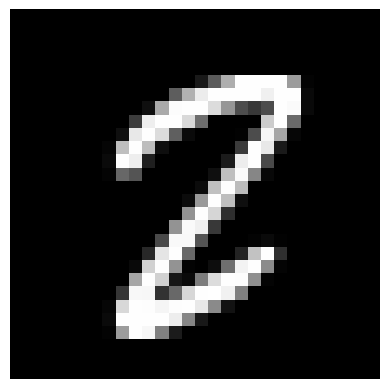

4 2


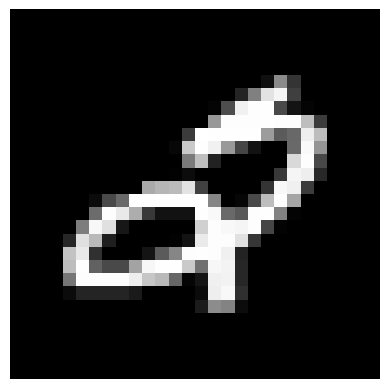

7 3


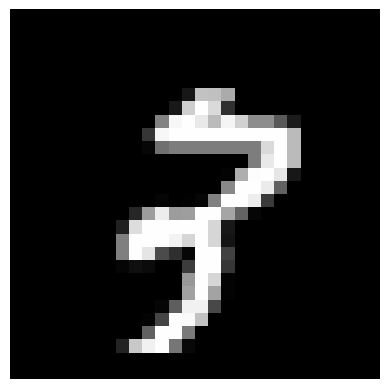

6 4


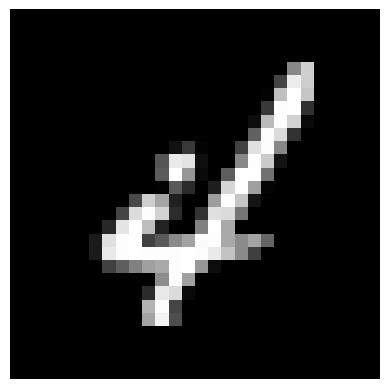

9 7


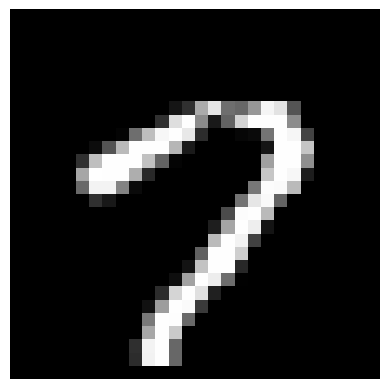

2 6


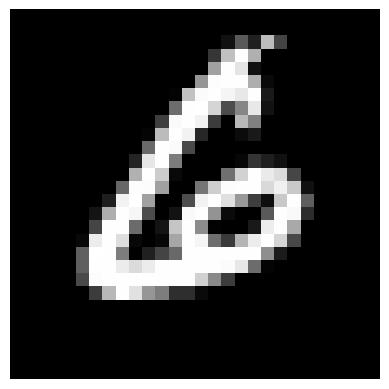

5 4


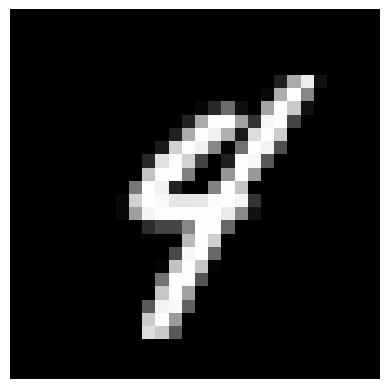

2 3


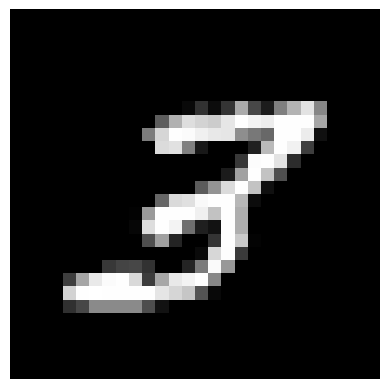

2 8


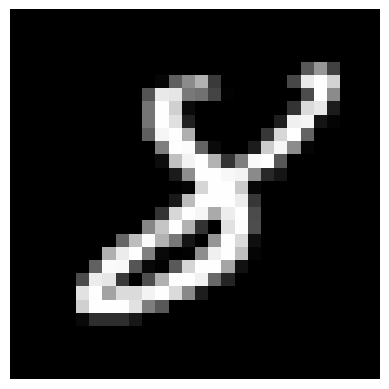

6 5


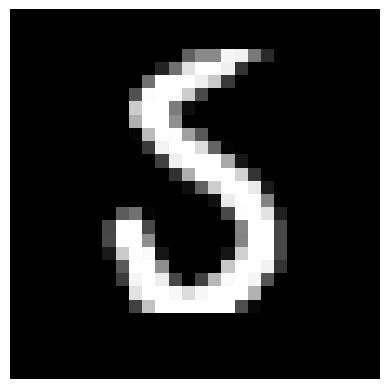

5 3


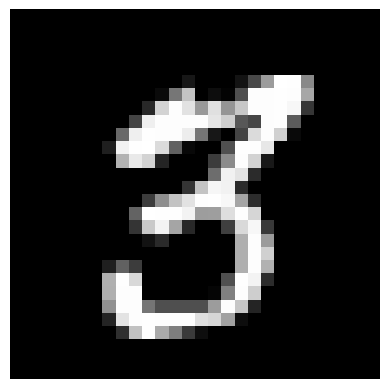

9 3


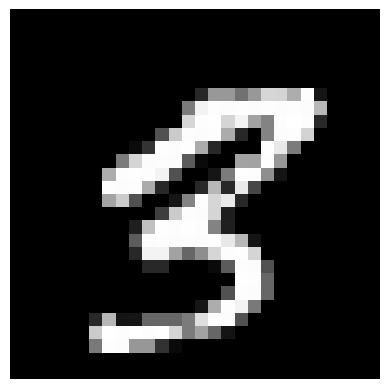

0 2


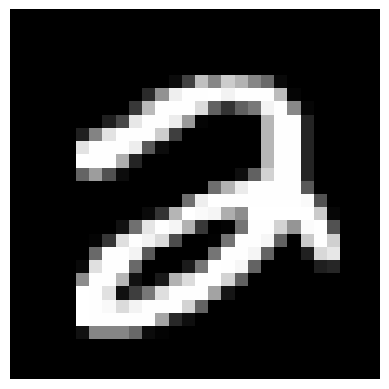

3 5


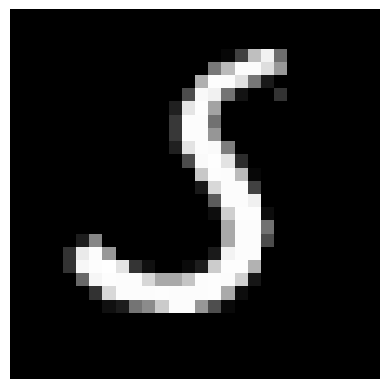

2 3


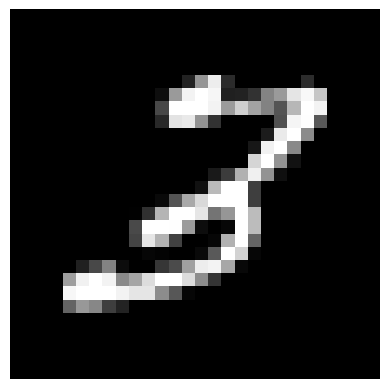

9 5


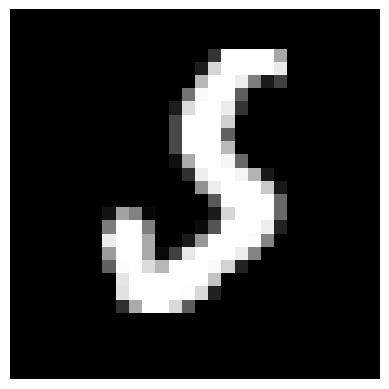

In [31]:
for x, y in zip(x_test, y_test):
    y_pred = np.argmax(np.dot(W, x))
    if y_pred != y:
        print(y_pred, y)
        plt.imshow(x[:-1].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.show()